In [10]:
import os
import h5py
import json
# import keras
import random 
import imageio
import pickle
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
# import tensorflow as tf
from sklearn import tree
# from keras import backend as K
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

import lime
import lime.lime_tabular
import shap
shap.initjs()

In [2]:
Data = pd.read_csv('DsDnsPrScTch.csv') 

c:\users\redline pc\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
Data["Teacher First Project Posted Date"]=pd.to_datetime(Data["Teacher First Project Posted Date"])
Data["Project Fully Funded Date"]=pd.to_datetime(Data["Project Fully Funded Date"])
Data["Project Expiration Date"]=pd.to_datetime(Data["Project Expiration Date"])
Data["Project Posted Date"]=pd.to_datetime(Data["Project Posted Date"])
Data["Donation Received Date"]=pd.to_datetime(Data["Donation Received Date"])
Data["Number of dates since posted"]=Data.loc[:,"Donation Received Date"]-Data.loc[:,"Project Posted Date"]

In [4]:
Data.drop("Unnamed: 0", inplace=True, axis=1)
Data.drop("Unnamed: 0.1", inplace=True, axis=1)

In [5]:
Data.dtypes

Project ID                                         object
Donation ID                                        object
Donor ID                                           object
Donation Included Optional Donation                object
Donation Amount                                   float64
Donor Cart Sequence                                 int64
Donation Received Date                     datetime64[ns]
Donor City                                         object
Donor State                                        object
Donor Is Teacher                                   object
Donor Zip                                          object
School ID                                          object
Teacher ID                                         object
Teacher Project Posted Sequence                     int64
Project Type                                       object
Project Title                                      object
Project Essay                                      object
Project Short 

In [6]:
Data

Project ID                       Donation ID  \
0        000009891526c0ade7180f8423792063  688729120858666221208529ee3fc18e   
1        000009891526c0ade7180f8423792063  dcf1071da3aa3561f91ac689d1f73dee   
2        000009891526c0ade7180f8423792063  18a234b9d1e538c431761d521ea7799d   
3        000009891526c0ade7180f8423792063  38d2744bf9138b0b57ed581c76c0e2da   
4        000009891526c0ade7180f8423792063  5a032791e31167a70206bfb86fb60035   
...                                   ...                               ...   
4608075  ff99214bc69524705da9021642e45f05  b897a5adbc0ac110427c1c0ffd86100a   
4608076  ffa591e39f454bffba9a2790644c1243  c66be02367f2ab9692c6e6825fe652a4   
4608077  ffc900e2fa30b12b79005f4f775d9c69  463b28fa94486e5f65f01bd576d39efd   
4608078  ffc900e2fa30b12b79005f4f775d9c69  1ebfe26a389f69d7c0a17f0dca08eb22   
4608079  ffd5a0c4aa4422f2b165183f3d2ced79  eed961c9de95b4df3e8dc574dc4ec09c   

                                 Donor ID Donation Included Optional Donation  \
0        1f4b5b6e68445c6c4a0509b3aca93f38                                  No   
1        4aaab6d244bf3599682239ed5591af8a                                 Yes   
2        0b0765dc9c759adc48a07688ba25e94e                                 Yes   
3        377944ad61f72d800b25ec1862aec363                                 Yes   
4        6d5b22d39e68c656071a842732c63a0c                                 Yes   
...                                   ...                                 ...   
4608075  95042f796daecb9a38e0954089c72c1c                                 Yes   
4608076  b02a1a8b2338bcecee59339e24ace04e                                 Yes   
4608077  e951d18261d7e82771f500d490a37d56                                 Yes   
4608078  e2ecad91df94a3a58f8af0a83cce7849                                 Yes   
4608079  10d445cd441106d28c0c33d5672b51a4                                 Yes   

         Donation Amount  Donor Cart Sequence Donation Received Date  \
0                 178.37                   11    2016-08-23 13:15:57   
1                  25.00                    2    2016-06-06 20:05:23   
2                  20.00                    3    2016-06-06 14:08:46   
3                  25.00                    1    2016-05-15 10:23:04   
4                  25.00                    2    2016-05-17 01:23:38   
...                  ...                  ...                    ...   
4608075            20.00                    2    2014-08-01 22:48:38   
4608076            50.00                    1    2014-10-27 12:24:50   
4608077             5.00                    1    2014-10-24 15:36:32   
4608078            10.00                    1    2014-10-22 17:07:06   
4608079          2016.61                    1    2015-01-14 17:25:47   

             Donor City Donor State Donor Is Teacher  ... School Metro Type  \
0           West Jordan        Utah               No  ...          suburban   
1              Riverton        Utah              Yes  ...          suburban   
2              Riverton        Utah               No  ...          suburban   
3               Phoenix     Arizona               No  ...          suburban   
4        Salt Lake City        Utah              Yes  ...          suburban   
...                 ...         ...              ...  ...               ...   
4608075             NaN    Missouri              Yes  ...             rural   
4608076      Blairstown  New Jersey               No  ...             urban   
4608077             NaN       other               No  ...             rural   
4608078             NaN       other               No  ...             rural   
4608079          Denver    Colorado               No  ...             rural   

        School Percentage Free Lunch  School State  School Zip    School City  \
0                               23.0          Utah     84065.0       Riverton   
1                               23.0          Utah     84065.0       Riverton   
2                               23.0          Utah  

In [7]:
# from pandas import DataFrame
# import seaborn as sn
# t=Data.columns
# t=t[::-1]
# df = DataFrame(Data[t],columns=t)

# fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
# corrMatrix = df.corr()
# sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 10},ax=ax)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


count    743945.000000
mean          0.462287
std           0.332363
min           0.000030
25%           0.138487
50%           0.480108
75%           0.742170
max           2.550013
Name: Raised funds to project cost ratio, dtype: float64


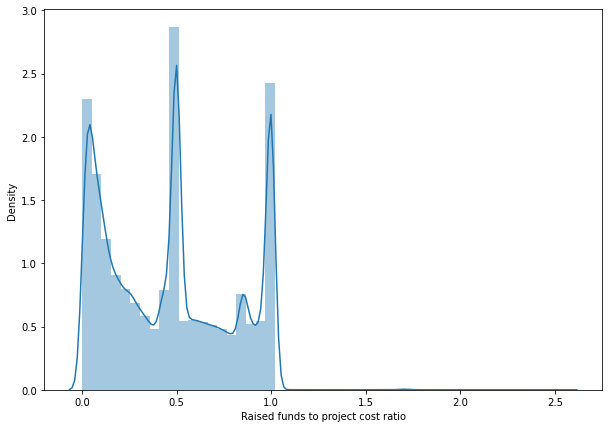

In [11]:
T=pd.Timedelta('30 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost",
         "Project Posted Date","Project Expiration Date","Donation Received Date","Project Short Description_polarity",
        "Project Short Description_subjectivity","Project Essay_polarity","Project Essay_subjectivity",
         "Project Need Statement_polarity","Project Need Statement_subjectivity"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Raised funds to project cost ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()
Grouped_data_Final = sub_Data.groupby(["Project ID"]).max()
Grouped_data_Final["Raised funds to project cost ratio"]=Grouped_data["Raised funds to project cost ratio"]

f, axes = plt.subplots(1, 1,figsize=(10,7))

y="Raised funds to project cost ratio"
q1 = Grouped_data_Final[y].quantile(0)
q3 = Grouped_data_Final[y].quantile(1)
mask = Grouped_data_Final[y].between(q1, q3, inclusive=True)
iqr = Grouped_data_Final.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y )
print(iqr.describe())


In [12]:
Grouped_data_Final[y]

Project ID
000009891526c0ade7180f8423792063    0.207673
00000ce845c00cbf0686c992fc369df4    0.683031
00002d44003ed46b066607c5455a999a    0.399810
00002eb25d60a09c318efbd0797bffb5    0.107870
0000300773fe015f870914b42528541b    1.000000
                                      ...   
ffff8bee61b72c484b10e43aa9e35bc9    0.524360
ffff98098650c5e07fa7f40030fbe9e2    0.332200
ffff9bb21699f79266cc7cbc208890a0    0.256458
ffffd8f0fbfa10b99efe90a5ee13c5df    0.500000
fffffcc42d1bf7ab742a4fa2d820f9f0    0.481306
Name: Raised funds to project cost ratio, Length: 743945, dtype: float64

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


count    870802.000000
mean          0.555950
std           0.337268
min           0.000026
25%           0.255094
50%           0.500019
75%           0.889879
max           2.550013
Name: Raised funds to project cost ratio, dtype: float64


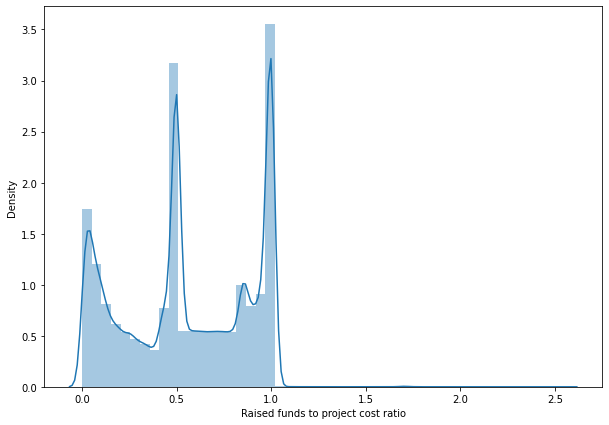

In [13]:
T=pd.Timedelta('120 days')
sub_var=["Number of dates since posted","Project ID","Donation Amount","Project Cost",
         "Project Posted Date","Project Expiration Date","Donation Received Date","Project Short Description_polarity",
        "Project Short Description_subjectivity","Project Essay_polarity","Project Essay_subjectivity",
         "Project Need Statement_polarity","Project Need Statement_subjectivity"]
sub_Data =Data.loc[:,sub_var]
sub_Data=sub_Data[sub_Data["Number of dates since posted"] < T]
sub_Data["Raised funds to project cost ratio"]=sub_Data["Donation Amount"]/sub_Data["Project Cost"]
Grouped_data=sub_Data.groupby(["Project ID"]).sum()
Grouped_data_Final = sub_Data.groupby(["Project ID"]).max()
Grouped_data_Final["Raised funds to project cost ratio"]=Grouped_data["Raised funds to project cost ratio"]

f, axes = plt.subplots(1, 1,figsize=(10,7))

y="Raised funds to project cost ratio"
q1 = Grouped_data_Final[y].quantile(0)
q3 = Grouped_data_Final[y].quantile(1)
mask = Grouped_data_Final[y].between(q1, q3, inclusive=True)
iqr = Grouped_data_Final.loc[mask, y]
sns.distplot(iqr, ax=axes,axlabel=y )
print(iqr.describe())

G120=Grouped_data_Final

In [14]:
#===============================================================================================
#                                  Model Training Funstion
#===============================================================================================

def Train_Model(Classifier, Model_variables_con,Model_variables_cat,Data,
                Time_period_indays=7,K=100,Fund_Ratio_treshold=0.05):
    # Time_period should be in days 
    # K is the Top-K value

    #=================================== Initiate the List Variables ================================
    
    Time_points = []
    Output=dict()
    Output["Overall_Training_Accuracy"], Output["Overall_Training_Precision"], Output["Overall_Training_Recall"] = list(),list(),list()
    Output["Overall_Testing_Accuracy"], Output["Overall_Testing_Precision"], Output["Overall_Testing_Recall"] = list(),list(),list()
    Output["Top_K_Accuracy"], Output["Top_K_Precision"], Output["Top_K_Recall"] = list(),list(),list()
    Output["Data_size_Testing"]=list()
    Output["Ones_Testing"]=list()
    Output["TP_Testing"] = list()
    #=================================== Initiate the Columns ======================================
    
    print("Initiatnig the Columns")
    Main_Variables = list(set(["Project ID","Project Posted Date","Project Expiration Date","Donation Received Date",
         "Project Cost","Donation Amount","Number of dates since posted"]+Model_variables_cat+Model_variables_con))
    Model_variables = Model_variables_con.copy()
    print("Variables considered in model training")
    for i in Main_Variables: print(">",i,i in Data.columns) # print all variables considered.
    print()
    Data["Number of dates since posted"]=Data.loc[:,"Donation Received Date"]-Data.loc[:,"Project Posted Date"]
    sub_Data = Data.loc[:,Main_Variables]
    

    #================================= One-Hot-Encoding Columns to remove ==========================
    
    print("One-Hot-Encoding removing columns identification")
    Sub_Variables_to_remove=dict()
    for i in Model_variables_cat:
        sub_variables = Data[i].unique()
        Model_variables+=sorted([i+"_"+str(j) for j in Data[i].unique()])
        Model_variables.remove(i+"_"+str(sub_variables[0]))
        Sub_Variables_to_remove[i]=sub_variables[0]
        
    
    #=================================== Initiate Time Variables ====================================
    
    print("Initiate Time Variables")
    MaxT = pd.Timestamp("2018-05-01 00:00:00")  #max(Data["Project Posted Date"])
    MinT = pd.Timestamp("2013-01-01 00:00:00")  #min(Data["Project Posted Date"])
    Time_period = timedelta(days=Time_period_indays)  
    T_current = MinT- Time_period +timedelta(days=120) 
    sub_Data["Number of dates since posted"] = sub_Data["Number of dates since posted"]/ np.timedelta64(1, 'D')
    
    
    #=================================== Loop over time frams =======================================
    
    print("Time iteration is starting\n")
    while (T_current<MaxT-Time_period):
        
        T_current = T_current+ Time_period
        Time_points+=[T_current]
        T_Train_start = T_current-timedelta(days=120)  # Start of the data frame
        T_Train_end = T_current-Time_period  #End of the data frame
        print("As of Date:",T_current,"\n"+"="*85)
        
    #====================================== Extract the frams ======================================= 
    
        # Extracts projects posted before the Current(As of) date
        Data_in_TimeWindow = sub_Data[sub_Data["Project Posted Date"] < pd.to_datetime(T_current)]  
        
        # Extracts projects posted after the start date of the Time window
        Data_in_TimeWindow = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] > pd.to_datetime(T_Train_start)]
        
        #Time period to be consided for the donations since posted (30days, as default)
        Data_in_TimeWindow = Data_in_TimeWindow[Data_in_TimeWindow["Number of dates since posted"]< Time_period_indays]
        
        #Express the donation amount as a ratio of to the Project cost
        Data_in_TimeWindow["Fund_Ratio"]=Data_in_TimeWindow["Donation Amount"]/Data_in_TimeWindow["Project Cost"]
        
        
    #=========================== Do One-Hot_Encoding for Categorical Variables ======================
    
        for var in Model_variables_cat:
            try:
                Sub_Dummied_Data=pd.get_dummies(Data_in_TimeWindow[var])  #create dummpy variables with one hot encoding 
                Sub_Dummied_Data_columns=sorted(Sub_Dummied_Data.columns)  #extract the column names of dummpy variables
                Sub_Dummied_Data_columns.remove(Sub_Variables_to_remove[var]) #remove a pre defined column from dummpy variables
                Data_in_TimeWindow=Data_in_TimeWindow.drop([var], axis=1) #remove main variable from the dataset
                #copy the columns to the main data set 
                for col in Sub_Dummied_Data_columns : Data_in_TimeWindow[var+"_"+col] = Sub_Dummied_Data[col]
            except:
                print("Variable missing after onehot encoding")
                
        #Add the columns which have not been one-hot-encoded
        for i in Model_variables:
            if i not in Data_in_TimeWindow.columns:  Data_in_TimeWindow[i]=0
    
    
    #============================================ Imputing ==========================================
        Data_in_TimeWindow.fillna(Data_in_TimeWindow.median(), inplace=True)
                
    
    #=================================== Training set Creation =====================================
    
        #extract the training set from the timewindow
        Train_Data = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] < pd.to_datetime(T_Train_end)]
        
        #Group by Project ID
        Train_Data_CR=Train_Data.groupby(["Project ID"]).sum() 
        Train_Data_Final=Train_Data.groupby(["Project ID"]).max()
        Train_Data_Final["Fund_Ratio"]=Train_Data_CR["Fund_Ratio"]
        Train_Data_Final["Donation Amount"]=Train_Data_CR["Donation Amount"]
        
        # Define Fund_Ratio_Treshold
        Fund_Ratio_Treshold = Fund_Ratio_treshold
        Fund_Ratio_Treshold = Train_Data_Final["Fund_Ratio"].median()
        
        # Genarate the Label for the dataset 
        Train_Data_Final['Label'] = Train_Data_Final.apply(lambda x : 1  if x['Fund_Ratio'] < 
                                                           Fund_Ratio_Treshold  else 0, axis=1)
        
        X_train = Train_Data_Final.loc[:,Model_variables]
        Y_train = np.array(Train_Data_Final.loc[:,["Label"]])[:,0]
        
        
    #==================================== Testing set Creation =====================================
    
        #extract the training set from the timewindow
        Test_Data = Data_in_TimeWindow[Data_in_TimeWindow["Project Posted Date"] >= pd.to_datetime(T_Train_end)]
        
        #Group by Project ID
        Test_Data_CR=Test_Data.groupby(["Project ID"]).sum() 
        Test_Data_Final=Test_Data.groupby(["Project ID"]).max()
        Test_Data_Final["Fund_Ratio"]=Test_Data_CR["Fund_Ratio"]
        Test_Data_Final["Donation Amount"]=Test_Data_CR["Donation Amount"]
        
        # Genarate the Label for the dataset 
        Test_Data_Final['Label'] = Test_Data_Final.apply(lambda x : 1  if x['Fund_Ratio'] < 
                                                         Fund_Ratio_Treshold  else 0, axis=1)
        X_test = Test_Data_Final.loc[:,Model_variables]
        Y_test = np.array(Test_Data_Final.loc[:,["Label"]])[:,0]
        
        
    #===================================== Model Training =========================================
    
        Classifier.fit(X_train, Y_train)
        
        # Predict on training 
        Train_Data_Final["Y_pred_prob"] = Classifier.predict_proba(X_train)[:,1]
        Train_Data_Final["Y_pred"]= Classifier.predict(X_train)
        # Predict on testing 
        Test_Data_Final["Y_pred_prob"] = Classifier.predict_proba(X_test)[:,1]
        Test_Data_Final["Y_pred"] = Classifier.predict(X_test)

        
    #====================================== Evaluation Trainign  ============================================
    
        Training_CM= confusion_matrix(Y_train,Train_Data_Final["Y_pred"])
        Training_TN, Training_FP ,Training_FN, Training_TP =  Training_CM.ravel()
        
        Training_Accuracy=(Training_TP+Training_TN)/(Training_TN+ Training_FP +Training_FN+ Training_TP)
        Training_Precision=Training_TP/(Training_TP+Training_FP)
        Training_Recall=Training_TP/(Training_TP+Training_FN)
        
        print(Classifier.__class__.__name__,' Testing Accuracy = ',Training_Accuracy)
        print("\tTraining_TP:",Training_TP,"\tTraining_FP:",Training_FP,
              "\n\tTraining_TN:",Training_TN,"\tTraining_FN:",Training_FN ,end="\n"*2)
        
        
    #====================================== Evaluation Testign  ============================================   
    
        Testing_CM= confusion_matrix(Y_test,Test_Data_Final["Y_pred"])
        Testing_TN, Testing_FP ,Testing_FN, Testing_TP =  Testing_CM.ravel()
        
        Testing_Accuracy=(Testing_TP+Testing_TN)/(Testing_TN+ Testing_FP +Testing_FN+ Testing_TP)
        Testing_Precision=Testing_TP/(Testing_TP+Testing_FP)
        Testing_Recall=Testing_TP/(Testing_TP+Testing_FN)
        
        print(Classifier.__class__.__name__,' Testing Accuracy = ',Testing_Accuracy)
        print("\tTesting_TP:",Testing_TP,"\tTesting_FP:",Testing_FP,
              "\n\tTesting_TN:",Testing_TN,"\tTesting_FN:",Testing_FN ,end="\n"*2)
        
    #====================================== Evaluation Top K  ============================================        
        
        Test_Data_Final=Test_Data_Final.sort_values(by=['Y_pred_prob'], ascending=False,ignore_index=True)
        Test_Data_Final["Y_pred"]=0
        
        for index_i in range(K): Test_Data_Final.loc[index_i,"Y_pred"]=1
        Top_K=Test_Data_Final
        
        Y_test_Top_K =  Top_K.loc[:,["Label"]] 
        Y_pred_Top_K =  Top_K.loc[:,["Y_pred"]]
        
        Testing_Top_K_CM= confusion_matrix(Y_test_Top_K,Y_pred_Top_K)
        if len(Testing_Top_K_CM.ravel())==4:
            Testing_Top_K_TN, Testing_Top_K_FP ,Testing_Top_K_FN, Testing_Top_K_TP =  Testing_Top_K_CM.ravel()
        else:
            Testing_Top_K_TN, Testing_Top_K_FP ,Testing_Top_K_FN, Testing_Top_K_TP=0,0,0,K
        
        Testing_Top_K_Accuracy=(Testing_Top_K_TP+Testing_Top_K_TN)/(Testing_Top_K_TN
                                                                        + Testing_Top_K_FP +Testing_Top_K_FN+ Testing_Top_K_TP)
        Testing_Top_K_Precision=Testing_Top_K_TP/(Testing_Top_K_TP+Testing_Top_K_FP)
        Testing_Top_K_Recall=Testing_Top_K_TP/(Testing_Top_K_TP+Testing_Top_K_FN)
        
        print(Classifier.__class__.__name__,' Testing Accuracy = ',Testing_Top_K_Accuracy)
        print("\tTesting_Top_K_TP:",Testing_Top_K_TP,"\tTesting_Top_K_FP:",Testing_Top_K_FP,
              "\n\tTesting_Top_K_TN:",Testing_Top_K_TN,"\tTesting_Top_K_FN:",Testing_Top_K_FN ,end="\n"*2)
        
     #====================================== save computed values  ============================================       
        Output["Overall_Training_Accuracy"] += [Training_Accuracy]
        Output["Overall_Training_Precision"] += [Training_Precision]
        Output["Overall_Training_Recall"] += [Training_Recall ]
        
        Output["Overall_Testing_Accuracy"] += [Testing_Accuracy]
        Output["Overall_Testing_Precision"] += [Testing_Precision]
        Output["Overall_Testing_Recall"] += [Testing_Recall]
        
        Output["Top_K_Accuracy"] += [Testing_Top_K_Accuracy] 
        Output["Top_K_Precision"] += [Testing_Top_K_Precision]  
        Output["Top_K_Recall"] += [Testing_Top_K_Recall] 
        
        Output["Data_size_Testing"]+= [Testing_TN+ Testing_FP +Testing_FN+ Testing_TP]
        Output["Ones_Testing"]+=[ Testing_FN+ Testing_TP]
        Output["TP_Testing"]+=[ Testing_TP]
    
    Output["Classifier"]=Classifier
    Output["Model_variables"]=Model_variables
    Output["Time_points"]=Time_points
    return Output,Test_Data_Final,Train_Data_Final
        

In [15]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(random_state=1,learning_rate=0.001,iterations=250,task_type="GPU",devices='0:1')

Model_variables_con= ["Project Cost","Number of dates since posted","School Percentage Free Lunch",
                      "Project Short Description_polarity","Project Short Description_subjectivity",
                      "Project Essay_polarity","Project Essay_subjectivity","Project Need Statement_polarity"]
Model_variables_cat= ["School Metro Type","Teacher Prefix","Project Grade Level Category","Project Type",
                      "School State", "Project Resource Category"]

Output,Test_Data_Final,Train_Data_Final= Train_Model(clf, Model_variables_con,Model_variables_cat,
                                    Data,Time_period_indays=7,K=100)

Initiatnig the Columns
Variables considered in model training
> Teacher Prefix True
> Project Short Description_subjectivity True
> Number of dates since posted True
> School State True
> Project Expiration Date True
> Project Grade Level Category True
> Project Type True
> School Percentage Free Lunch True
> Project Posted Date True
> School Metro Type True
> Project ID True
> Donation Amount True
> Project Short Description_polarity True
> Project Cost True
> Project Resource Category True
> Donation Received Date True
> Project Need Statement_polarity True
> Project Essay_subjectivity True
> Project Essay_polarity True

One-Hot-Encoding removing columns identification
Initiate Time Variables
Time iteration is starting

As of Date: 2013-05-01 00:00:00 


DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930824	total: 18.9ms	remaining: 4.71s
1:	learn: 0.6930144	total: 27.3ms	remaining: 3.39s
2:	learn: 0.6929477	total: 35.7ms	remaining: 2.94s
3:	learn: 0.6928873	total: 44ms	remaining: 2.71s
4:	learn: 0.6928256	total: 52.3ms	remaining: 2.56s
5:	learn: 0.6927628	total: 60.7ms	remaining: 2.47s
6:	learn: 0.6926985	total: 69.2ms	remaining: 2.4s
7:	learn: 0.6926364	total: 77.4ms	remaining: 2.34s
8:	learn: 0.6925748	total: 85.7ms	remaining: 2.29s
9:	learn: 0.6925087	total: 93.9ms	remaining: 2.25s
10:	learn: 0.6924422	total: 102ms	remaining: 2.22s
11:	learn: 0.6923754	total: 111ms	remaining: 2.19s
12:	learn: 0.6923138	total: 119ms	remaining: 2.17s
13:	learn: 0.6922513	total: 127ms	remaining: 2.14s
14:	learn: 0.6921847	total: 136ms	remaining: 2.12s
15:	learn: 0.6921189	total: 144ms	remaining: 2.1s
16:	learn: 0.6920531	total: 152ms	remaining: 2.09s
17:	learn: 0.6919919	total: 161ms	remaining: 2.07s
18:	learn: 0.6919269	total: 169ms	remaining: 2.05s
19:	learn: 0.6918623	total: 177ms	r

182:	learn: 0.6829469	total: 1.55s	remaining: 566ms
183:	learn: 0.6829024	total: 1.55s	remaining: 558ms
184:	learn: 0.6828542	total: 1.56s	remaining: 550ms
185:	learn: 0.6828106	total: 1.57s	remaining: 541ms
186:	learn: 0.6827633	total: 1.58s	remaining: 533ms
187:	learn: 0.6827165	total: 1.59s	remaining: 524ms
188:	learn: 0.6826729	total: 1.6s	remaining: 516ms
189:	learn: 0.6826252	total: 1.61s	remaining: 507ms
190:	learn: 0.6825762	total: 1.61s	remaining: 499ms
191:	learn: 0.6825307	total: 1.62s	remaining: 490ms
192:	learn: 0.6824834	total: 1.63s	remaining: 482ms
193:	learn: 0.6824350	total: 1.64s	remaining: 473ms
194:	learn: 0.6823884	total: 1.65s	remaining: 465ms
195:	learn: 0.6823426	total: 1.66s	remaining: 456ms
196:	learn: 0.6822992	total: 1.66s	remaining: 448ms
197:	learn: 0.6822526	total: 1.67s	remaining: 439ms
198:	learn: 0.6822076	total: 1.68s	remaining: 431ms
199:	learn: 0.6821621	total: 1.69s	remaining: 422ms
200:	learn: 0.6821164	total: 1.7s	remaining: 414ms
201:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930848	total: 8.97ms	remaining: 2.23s
1:	learn: 0.6930173	total: 17.4ms	remaining: 2.15s
2:	learn: 0.6929513	total: 25.7ms	remaining: 2.11s
3:	learn: 0.6928869	total: 34ms	remaining: 2.09s
4:	learn: 0.6928235	total: 42.4ms	remaining: 2.08s
5:	learn: 0.6927614	total: 50.7ms	remaining: 2.06s
6:	learn: 0.6926986	total: 58.2ms	remaining: 2.02s
7:	learn: 0.6926357	total: 66.5ms	remaining: 2.01s
8:	learn: 0.6925723	total: 74.8ms	remaining: 2s
9:	learn: 0.6925048	total: 83.2ms	remaining: 2s
10:	learn: 0.6924380	total: 91.5ms	remaining: 1.99s
11:	learn: 0.6923716	total: 99.8ms	remaining: 1.98s
12:	learn: 0.6923095	total: 108ms	remaining: 1.97s
13:	learn: 0.6922493	total: 117ms	remaining: 1.96s
14:	learn: 0.6921856	total: 125ms	remaining: 1.96s
15:	learn: 0.6921198	total: 133ms	remaining: 1.95s
16:	learn: 0.6920558	total: 142ms	remaining: 1.94s
17:	learn: 0.6919915	total: 150ms	remaining: 1.93s
18:	learn: 0.6919265	total: 158ms	remaining: 1.92s
19:	learn: 0.6918613	total: 167ms	rem

180:	learn: 0.6830687	total: 1.52s	remaining: 579ms
181:	learn: 0.6830194	total: 1.53s	remaining: 571ms
182:	learn: 0.6829704	total: 1.54s	remaining: 563ms
183:	learn: 0.6829246	total: 1.54s	remaining: 554ms
184:	learn: 0.6828797	total: 1.55s	remaining: 546ms
185:	learn: 0.6828340	total: 1.56s	remaining: 537ms
186:	learn: 0.6827856	total: 1.57s	remaining: 529ms
187:	learn: 0.6827391	total: 1.58s	remaining: 521ms
188:	learn: 0.6826966	total: 1.59s	remaining: 512ms
189:	learn: 0.6826516	total: 1.59s	remaining: 504ms
190:	learn: 0.6826049	total: 1.6s	remaining: 495ms
191:	learn: 0.6825566	total: 1.61s	remaining: 487ms
192:	learn: 0.6825100	total: 1.62s	remaining: 479ms
193:	learn: 0.6824623	total: 1.63s	remaining: 470ms
194:	learn: 0.6824185	total: 1.64s	remaining: 462ms
195:	learn: 0.6823727	total: 1.65s	remaining: 453ms
196:	learn: 0.6823301	total: 1.65s	remaining: 445ms
197:	learn: 0.6822830	total: 1.66s	remaining: 437ms
198:	learn: 0.6822353	total: 1.67s	remaining: 428ms
199:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930866	total: 9.1ms	remaining: 2.27s
1:	learn: 0.6930223	total: 17.4ms	remaining: 2.16s
2:	learn: 0.6929582	total: 25.7ms	remaining: 2.12s
3:	learn: 0.6928971	total: 34.1ms	remaining: 2.1s
4:	learn: 0.6928373	total: 42.4ms	remaining: 2.08s
5:	learn: 0.6927780	total: 50.8ms	remaining: 2.07s
6:	learn: 0.6927163	total: 59.2ms	remaining: 2.05s
7:	learn: 0.6926547	total: 67.5ms	remaining: 2.04s
8:	learn: 0.6925950	total: 75.9ms	remaining: 2.03s
9:	learn: 0.6925311	total: 84.2ms	remaining: 2.02s
10:	learn: 0.6924679	total: 92.5ms	remaining: 2.01s
11:	learn: 0.6924065	total: 101ms	remaining: 2s
12:	learn: 0.6923433	total: 109ms	remaining: 1.99s
13:	learn: 0.6922795	total: 118ms	remaining: 1.98s
14:	learn: 0.6922182	total: 126ms	remaining: 1.98s
15:	learn: 0.6921554	total: 135ms	remaining: 1.97s
16:	learn: 0.6920923	total: 143ms	remaining: 1.96s
17:	learn: 0.6920318	total: 152ms	remaining: 1.95s
18:	learn: 0.6919699	total: 160ms	remaining: 1.95s
19:	learn: 0.6919105	total: 169ms	r

168:	learn: 0.6839619	total: 1.5s	remaining: 719ms
169:	learn: 0.6839161	total: 1.51s	remaining: 710ms
170:	learn: 0.6838702	total: 1.52s	remaining: 701ms
171:	learn: 0.6838253	total: 1.53s	remaining: 692ms
172:	learn: 0.6837803	total: 1.54s	remaining: 684ms
173:	learn: 0.6837331	total: 1.54s	remaining: 675ms
174:	learn: 0.6836874	total: 1.56s	remaining: 667ms
175:	learn: 0.6836424	total: 1.57s	remaining: 659ms
176:	learn: 0.6835979	total: 1.58s	remaining: 651ms
177:	learn: 0.6835510	total: 1.59s	remaining: 642ms
178:	learn: 0.6835032	total: 1.6s	remaining: 634ms
179:	learn: 0.6834610	total: 1.61s	remaining: 625ms
180:	learn: 0.6834146	total: 1.62s	remaining: 617ms
181:	learn: 0.6833717	total: 1.63s	remaining: 608ms
182:	learn: 0.6833242	total: 1.64s	remaining: 599ms
183:	learn: 0.6832799	total: 1.65s	remaining: 591ms
184:	learn: 0.6832392	total: 1.66s	remaining: 582ms
185:	learn: 0.6831933	total: 1.67s	remaining: 573ms
186:	learn: 0.6831486	total: 1.68s	remaining: 565ms
187:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930949	total: 8.96ms	remaining: 2.23s
1:	learn: 0.6930351	total: 17.3ms	remaining: 2.14s
2:	learn: 0.6929764	total: 25.6ms	remaining: 2.11s
3:	learn: 0.6929210	total: 33.8ms	remaining: 2.08s
4:	learn: 0.6928620	total: 42.1ms	remaining: 2.06s
5:	learn: 0.6928028	total: 50.4ms	remaining: 2.05s
6:	learn: 0.6927491	total: 58.6ms	remaining: 2.04s
7:	learn: 0.6926952	total: 67ms	remaining: 2.03s
8:	learn: 0.6926408	total: 75.2ms	remaining: 2.01s
9:	learn: 0.6925838	total: 83.5ms	remaining: 2s
10:	learn: 0.6925281	total: 91.7ms	remaining: 1.99s
11:	learn: 0.6924731	total: 100ms	remaining: 1.98s
12:	learn: 0.6924184	total: 108ms	remaining: 1.98s
13:	learn: 0.6923621	total: 117ms	remaining: 1.97s
14:	learn: 0.6923055	total: 125ms	remaining: 1.96s
15:	learn: 0.6922524	total: 133ms	remaining: 1.95s
16:	learn: 0.6921975	total: 142ms	remaining: 1.94s
17:	learn: 0.6921448	total: 150ms	remaining: 1.93s
18:	learn: 0.6920887	total: 158ms	remaining: 1.92s
19:	learn: 0.6920343	total: 167ms	r

179:	learn: 0.6843295	total: 1.51s	remaining: 588ms
180:	learn: 0.6842881	total: 1.52s	remaining: 580ms
181:	learn: 0.6842494	total: 1.53s	remaining: 572ms
182:	learn: 0.6842072	total: 1.54s	remaining: 564ms
183:	learn: 0.6841671	total: 1.55s	remaining: 555ms
184:	learn: 0.6841276	total: 1.56s	remaining: 547ms
185:	learn: 0.6840868	total: 1.56s	remaining: 538ms
186:	learn: 0.6840502	total: 1.57s	remaining: 530ms
187:	learn: 0.6840105	total: 1.58s	remaining: 522ms
188:	learn: 0.6839720	total: 1.59s	remaining: 513ms
189:	learn: 0.6839300	total: 1.6s	remaining: 505ms
190:	learn: 0.6838893	total: 1.61s	remaining: 497ms
191:	learn: 0.6838471	total: 1.62s	remaining: 489ms
192:	learn: 0.6838071	total: 1.63s	remaining: 480ms
193:	learn: 0.6837651	total: 1.63s	remaining: 472ms
194:	learn: 0.6837230	total: 1.64s	remaining: 463ms
195:	learn: 0.6836809	total: 1.65s	remaining: 455ms
196:	learn: 0.6836412	total: 1.66s	remaining: 447ms
197:	learn: 0.6835987	total: 1.67s	remaining: 438ms
198:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930987	total: 10.2ms	remaining: 2.54s
1:	learn: 0.6930467	total: 20ms	remaining: 2.48s
2:	learn: 0.6929931	total: 29.7ms	remaining: 2.45s
3:	learn: 0.6929416	total: 39.5ms	remaining: 2.43s
4:	learn: 0.6928908	total: 49.2ms	remaining: 2.41s
5:	learn: 0.6928397	total: 58.4ms	remaining: 2.37s
6:	learn: 0.6927911	total: 66.6ms	remaining: 2.31s
7:	learn: 0.6927398	total: 74.8ms	remaining: 2.26s
8:	learn: 0.6926891	total: 83ms	remaining: 2.22s
9:	learn: 0.6926380	total: 91.3ms	remaining: 2.19s
10:	learn: 0.6925849	total: 99.5ms	remaining: 2.16s
11:	learn: 0.6925341	total: 108ms	remaining: 2.14s
12:	learn: 0.6924845	total: 116ms	remaining: 2.12s
13:	learn: 0.6924341	total: 124ms	remaining: 2.1s
14:	learn: 0.6923821	total: 133ms	remaining: 2.08s
15:	learn: 0.6923331	total: 141ms	remaining: 2.06s
16:	learn: 0.6922845	total: 149ms	remaining: 2.04s
17:	learn: 0.6922333	total: 157ms	remaining: 2.03s
18:	learn: 0.6921819	total: 166ms	remaining: 2.02s
19:	learn: 0.6921313	total: 174ms	r

177:	learn: 0.6851681	total: 1.51s	remaining: 612ms
178:	learn: 0.6851316	total: 1.52s	remaining: 604ms
179:	learn: 0.6850942	total: 1.53s	remaining: 596ms
180:	learn: 0.6850558	total: 1.54s	remaining: 587ms
181:	learn: 0.6850186	total: 1.55s	remaining: 579ms
182:	learn: 0.6849800	total: 1.56s	remaining: 570ms
183:	learn: 0.6849406	total: 1.56s	remaining: 562ms
184:	learn: 0.6849019	total: 1.57s	remaining: 553ms
185:	learn: 0.6848641	total: 1.58s	remaining: 544ms
186:	learn: 0.6848300	total: 1.59s	remaining: 536ms
187:	learn: 0.6847913	total: 1.6s	remaining: 527ms
188:	learn: 0.6847553	total: 1.61s	remaining: 519ms
189:	learn: 0.6847174	total: 1.61s	remaining: 510ms
190:	learn: 0.6846795	total: 1.62s	remaining: 502ms
191:	learn: 0.6846400	total: 1.63s	remaining: 493ms
192:	learn: 0.6846038	total: 1.64s	remaining: 484ms
193:	learn: 0.6845643	total: 1.65s	remaining: 476ms
194:	learn: 0.6845255	total: 1.66s	remaining: 467ms
195:	learn: 0.6844896	total: 1.66s	remaining: 459ms
196:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6931004	total: 9.3ms	remaining: 2.32s
1:	learn: 0.6930450	total: 17.7ms	remaining: 2.19s
2:	learn: 0.6929911	total: 25.9ms	remaining: 2.13s
3:	learn: 0.6929390	total: 34.3ms	remaining: 2.11s
4:	learn: 0.6928840	total: 42.6ms	remaining: 2.08s
5:	learn: 0.6928331	total: 50.9ms	remaining: 2.07s
6:	learn: 0.6927824	total: 59.1ms	remaining: 2.05s
7:	learn: 0.6927315	total: 67.4ms	remaining: 2.04s
8:	learn: 0.6926812	total: 75.6ms	remaining: 2.02s
9:	learn: 0.6926295	total: 83.9ms	remaining: 2.01s
10:	learn: 0.6925796	total: 92.1ms	remaining: 2s
11:	learn: 0.6925276	total: 103ms	remaining: 2.04s
12:	learn: 0.6924768	total: 111ms	remaining: 2.02s
13:	learn: 0.6924272	total: 120ms	remaining: 2.02s
14:	learn: 0.6923757	total: 128ms	remaining: 2.01s
15:	learn: 0.6923311	total: 137ms	remaining: 2s
16:	learn: 0.6922816	total: 145ms	remaining: 1.99s
17:	learn: 0.6922312	total: 153ms	remaining: 1.97s
18:	learn: 0.6921795	total: 162ms	remaining: 1.96s
19:	learn: 0.6921232	total: 170ms	rem

179:	learn: 0.6850734	total: 1.53s	remaining: 594ms
180:	learn: 0.6850337	total: 1.54s	remaining: 586ms
181:	learn: 0.6849953	total: 1.54s	remaining: 578ms
182:	learn: 0.6849558	total: 1.55s	remaining: 569ms
183:	learn: 0.6849149	total: 1.56s	remaining: 561ms
184:	learn: 0.6848786	total: 1.57s	remaining: 552ms
185:	learn: 0.6848407	total: 1.58s	remaining: 544ms
186:	learn: 0.6848041	total: 1.59s	remaining: 535ms
187:	learn: 0.6847655	total: 1.6s	remaining: 527ms
188:	learn: 0.6847261	total: 1.6s	remaining: 518ms
189:	learn: 0.6846890	total: 1.61s	remaining: 509ms
190:	learn: 0.6846511	total: 1.62s	remaining: 501ms
191:	learn: 0.6846112	total: 1.63s	remaining: 492ms
192:	learn: 0.6845734	total: 1.64s	remaining: 484ms
193:	learn: 0.6845344	total: 1.65s	remaining: 475ms
194:	learn: 0.6844935	total: 1.66s	remaining: 467ms
195:	learn: 0.6844574	total: 1.66s	remaining: 458ms
196:	learn: 0.6844231	total: 1.67s	remaining: 450ms
197:	learn: 0.6843873	total: 1.68s	remaining: 441ms
198:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930936	total: 8.95ms	remaining: 2.23s
1:	learn: 0.6930391	total: 17.3ms	remaining: 2.14s
2:	learn: 0.6929838	total: 25.6ms	remaining: 2.1s
3:	learn: 0.6929288	total: 33.9ms	remaining: 2.08s
4:	learn: 0.6928750	total: 42.2ms	remaining: 2.07s
5:	learn: 0.6928243	total: 50.5ms	remaining: 2.05s
6:	learn: 0.6927738	total: 58.8ms	remaining: 2.04s
7:	learn: 0.6927297	total: 67.1ms	remaining: 2.03s
8:	learn: 0.6926810	total: 75.4ms	remaining: 2.02s
9:	learn: 0.6926265	total: 83.7ms	remaining: 2.01s
10:	learn: 0.6925757	total: 91.9ms	remaining: 2s
11:	learn: 0.6925240	total: 100ms	remaining: 1.99s
12:	learn: 0.6924761	total: 109ms	remaining: 1.98s
13:	learn: 0.6924256	total: 117ms	remaining: 1.97s
14:	learn: 0.6923743	total: 125ms	remaining: 1.96s
15:	learn: 0.6923270	total: 133ms	remaining: 1.95s
16:	learn: 0.6922772	total: 142ms	remaining: 1.94s
17:	learn: 0.6922274	total: 150ms	remaining: 1.93s
18:	learn: 0.6921756	total: 158ms	remaining: 1.92s
19:	learn: 0.6921200	total: 166ms	

172:	learn: 0.6852815	total: 1.53s	remaining: 682ms
173:	learn: 0.6852410	total: 1.54s	remaining: 673ms
174:	learn: 0.6852015	total: 1.55s	remaining: 664ms
175:	learn: 0.6851618	total: 1.56s	remaining: 656ms
176:	learn: 0.6851242	total: 1.57s	remaining: 647ms
177:	learn: 0.6850810	total: 1.58s	remaining: 638ms
178:	learn: 0.6850413	total: 1.58s	remaining: 629ms
179:	learn: 0.6850045	total: 1.59s	remaining: 621ms
180:	learn: 0.6849659	total: 1.6s	remaining: 612ms
181:	learn: 0.6849283	total: 1.61s	remaining: 603ms
182:	learn: 0.6848875	total: 1.62s	remaining: 594ms
183:	learn: 0.6848465	total: 1.63s	remaining: 585ms
184:	learn: 0.6848069	total: 1.64s	remaining: 576ms
185:	learn: 0.6847658	total: 1.65s	remaining: 567ms
186:	learn: 0.6847244	total: 1.66s	remaining: 558ms
187:	learn: 0.6846862	total: 1.67s	remaining: 549ms
188:	learn: 0.6846503	total: 1.67s	remaining: 541ms
189:	learn: 0.6846125	total: 1.68s	remaining: 532ms
190:	learn: 0.6845731	total: 1.69s	remaining: 523ms
191:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930859	total: 9.4ms	remaining: 2.34s
1:	learn: 0.6930198	total: 17.9ms	remaining: 2.21s
2:	learn: 0.6929558	total: 26.2ms	remaining: 2.16s
3:	learn: 0.6928892	total: 34.5ms	remaining: 2.12s
4:	learn: 0.6928256	total: 42.8ms	remaining: 2.1s
5:	learn: 0.6927604	total: 51.2ms	remaining: 2.08s
6:	learn: 0.6926974	total: 59.4ms	remaining: 2.06s
7:	learn: 0.6926375	total: 67.7ms	remaining: 2.05s
8:	learn: 0.6925760	total: 76.1ms	remaining: 2.04s
9:	learn: 0.6925107	total: 84.4ms	remaining: 2.02s
10:	learn: 0.6924462	total: 92.7ms	remaining: 2.02s
11:	learn: 0.6923819	total: 101ms	remaining: 2s
12:	learn: 0.6923187	total: 109ms	remaining: 1.99s
13:	learn: 0.6922540	total: 118ms	remaining: 1.98s
14:	learn: 0.6921890	total: 126ms	remaining: 1.97s
15:	learn: 0.6921295	total: 134ms	remaining: 1.97s
16:	learn: 0.6920688	total: 143ms	remaining: 1.96s
17:	learn: 0.6920095	total: 151ms	remaining: 1.94s
18:	learn: 0.6919466	total: 159ms	remaining: 1.94s
19:	learn: 0.6918873	total: 168ms	r

165:	learn: 0.6839044	total: 1.5s	remaining: 759ms
166:	learn: 0.6838567	total: 1.51s	remaining: 751ms
167:	learn: 0.6838137	total: 1.52s	remaining: 742ms
168:	learn: 0.6837656	total: 1.53s	remaining: 734ms
169:	learn: 0.6837168	total: 1.54s	remaining: 725ms
170:	learn: 0.6836651	total: 1.55s	remaining: 717ms
171:	learn: 0.6836155	total: 1.56s	remaining: 707ms
172:	learn: 0.6835679	total: 1.57s	remaining: 698ms
173:	learn: 0.6835170	total: 1.58s	remaining: 689ms
174:	learn: 0.6834714	total: 1.59s	remaining: 680ms
175:	learn: 0.6834254	total: 1.59s	remaining: 670ms
176:	learn: 0.6833816	total: 1.6s	remaining: 662ms
177:	learn: 0.6833358	total: 1.61s	remaining: 653ms
178:	learn: 0.6832873	total: 1.62s	remaining: 644ms
179:	learn: 0.6832442	total: 1.63s	remaining: 634ms
180:	learn: 0.6831987	total: 1.64s	remaining: 625ms
181:	learn: 0.6831539	total: 1.65s	remaining: 616ms
182:	learn: 0.6831033	total: 1.66s	remaining: 607ms
183:	learn: 0.6830518	total: 1.67s	remaining: 598ms
184:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930806	total: 9.01ms	remaining: 2.24s
1:	learn: 0.6930114	total: 17.9ms	remaining: 2.22s
2:	learn: 0.6929406	total: 27ms	remaining: 2.22s
3:	learn: 0.6928725	total: 35.4ms	remaining: 2.18s
4:	learn: 0.6928065	total: 44.4ms	remaining: 2.18s
5:	learn: 0.6927437	total: 53.2ms	remaining: 2.16s
6:	learn: 0.6926754	total: 61.6ms	remaining: 2.14s
7:	learn: 0.6926071	total: 70.6ms	remaining: 2.13s
8:	learn: 0.6925405	total: 79.4ms	remaining: 2.13s
9:	learn: 0.6924741	total: 88.2ms	remaining: 2.12s
10:	learn: 0.6924070	total: 97.1ms	remaining: 2.11s
11:	learn: 0.6923373	total: 106ms	remaining: 2.1s
12:	learn: 0.6922703	total: 114ms	remaining: 2.08s
13:	learn: 0.6922018	total: 123ms	remaining: 2.07s
14:	learn: 0.6921320	total: 132ms	remaining: 2.07s
15:	learn: 0.6920707	total: 143ms	remaining: 2.08s
16:	learn: 0.6920051	total: 155ms	remaining: 2.12s
17:	learn: 0.6919399	total: 164ms	remaining: 2.11s
18:	learn: 0.6918711	total: 173ms	remaining: 2.1s
19:	learn: 0.6918049	total: 181ms	

165:	learn: 0.6833735	total: 1.51s	remaining: 765ms
166:	learn: 0.6833227	total: 1.52s	remaining: 756ms
167:	learn: 0.6832727	total: 1.53s	remaining: 747ms
168:	learn: 0.6832187	total: 1.54s	remaining: 738ms
169:	learn: 0.6831691	total: 1.55s	remaining: 729ms
170:	learn: 0.6831192	total: 1.56s	remaining: 719ms
171:	learn: 0.6830692	total: 1.56s	remaining: 710ms
172:	learn: 0.6830166	total: 1.57s	remaining: 701ms
173:	learn: 0.6829662	total: 1.58s	remaining: 691ms
174:	learn: 0.6829163	total: 1.59s	remaining: 682ms
175:	learn: 0.6828669	total: 1.6s	remaining: 673ms
176:	learn: 0.6828182	total: 1.61s	remaining: 663ms
177:	learn: 0.6827675	total: 1.62s	remaining: 654ms
178:	learn: 0.6827156	total: 1.63s	remaining: 645ms
179:	learn: 0.6826707	total: 1.64s	remaining: 636ms
180:	learn: 0.6826220	total: 1.65s	remaining: 627ms
181:	learn: 0.6825712	total: 1.65s	remaining: 618ms
182:	learn: 0.6825226	total: 1.66s	remaining: 609ms
183:	learn: 0.6824732	total: 1.67s	remaining: 600ms
184:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930814	total: 10.5ms	remaining: 2.62s
1:	learn: 0.6930120	total: 19.7ms	remaining: 2.44s
2:	learn: 0.6929423	total: 28.6ms	remaining: 2.36s
3:	learn: 0.6928733	total: 37.1ms	remaining: 2.28s
4:	learn: 0.6928031	total: 45.4ms	remaining: 2.22s
5:	learn: 0.6927406	total: 54.2ms	remaining: 2.2s
6:	learn: 0.6926728	total: 63.6ms	remaining: 2.21s
7:	learn: 0.6926115	total: 71.8ms	remaining: 2.17s
8:	learn: 0.6925442	total: 80.2ms	remaining: 2.15s
9:	learn: 0.6924771	total: 89.2ms	remaining: 2.14s
10:	learn: 0.6924130	total: 98.1ms	remaining: 2.13s
11:	learn: 0.6923460	total: 107ms	remaining: 2.12s
12:	learn: 0.6922797	total: 116ms	remaining: 2.12s
13:	learn: 0.6922111	total: 125ms	remaining: 2.1s
14:	learn: 0.6921431	total: 133ms	remaining: 2.08s
15:	learn: 0.6920744	total: 142ms	remaining: 2.07s
16:	learn: 0.6920068	total: 150ms	remaining: 2.06s
17:	learn: 0.6919398	total: 159ms	remaining: 2.05s
18:	learn: 0.6918736	total: 167ms	remaining: 2.03s
19:	learn: 0.6918081	total: 176m

171:	learn: 0.6831084	total: 1.52s	remaining: 690ms
172:	learn: 0.6830583	total: 1.53s	remaining: 681ms
173:	learn: 0.6830074	total: 1.54s	remaining: 673ms
174:	learn: 0.6829575	total: 1.55s	remaining: 664ms
175:	learn: 0.6829075	total: 1.56s	remaining: 655ms
176:	learn: 0.6828590	total: 1.57s	remaining: 646ms
177:	learn: 0.6828098	total: 1.57s	remaining: 637ms
178:	learn: 0.6827575	total: 1.58s	remaining: 629ms
179:	learn: 0.6827078	total: 1.59s	remaining: 620ms
180:	learn: 0.6826554	total: 1.6s	remaining: 611ms
181:	learn: 0.6826051	total: 1.61s	remaining: 602ms
182:	learn: 0.6825546	total: 1.62s	remaining: 593ms
183:	learn: 0.6825045	total: 1.63s	remaining: 585ms
184:	learn: 0.6824572	total: 1.64s	remaining: 576ms
185:	learn: 0.6824071	total: 1.65s	remaining: 567ms
186:	learn: 0.6823638	total: 1.66s	remaining: 559ms
187:	learn: 0.6823168	total: 1.67s	remaining: 550ms
188:	learn: 0.6822718	total: 1.68s	remaining: 541ms
189:	learn: 0.6822236	total: 1.69s	remaining: 533ms
190:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930831	total: 8.98ms	remaining: 2.24s
1:	learn: 0.6930168	total: 17.3ms	remaining: 2.15s
2:	learn: 0.6929511	total: 25.6ms	remaining: 2.11s
3:	learn: 0.6928887	total: 34ms	remaining: 2.09s
4:	learn: 0.6928258	total: 42.3ms	remaining: 2.07s
5:	learn: 0.6927644	total: 50.6ms	remaining: 2.06s
6:	learn: 0.6926998	total: 58.9ms	remaining: 2.04s
7:	learn: 0.6926388	total: 67.1ms	remaining: 2.03s
8:	learn: 0.6925763	total: 75.4ms	remaining: 2.02s
9:	learn: 0.6925132	total: 83.7ms	remaining: 2.01s
10:	learn: 0.6924489	total: 92.1ms	remaining: 2s
11:	learn: 0.6923863	total: 100ms	remaining: 1.99s
12:	learn: 0.6923235	total: 109ms	remaining: 1.98s
13:	learn: 0.6922626	total: 117ms	remaining: 1.97s
14:	learn: 0.6922005	total: 125ms	remaining: 1.96s
15:	learn: 0.6921304	total: 134ms	remaining: 1.96s
16:	learn: 0.6920631	total: 142ms	remaining: 1.95s
17:	learn: 0.6920029	total: 150ms	remaining: 1.94s
18:	learn: 0.6919380	total: 159ms	remaining: 1.93s
19:	learn: 0.6918758	total: 167ms	r

178:	learn: 0.6831070	total: 1.51s	remaining: 600ms
179:	learn: 0.6830572	total: 1.52s	remaining: 592ms
180:	learn: 0.6830039	total: 1.53s	remaining: 584ms
181:	learn: 0.6829554	total: 1.54s	remaining: 576ms
182:	learn: 0.6829082	total: 1.55s	remaining: 567ms
183:	learn: 0.6828589	total: 1.56s	remaining: 559ms
184:	learn: 0.6828084	total: 1.57s	remaining: 551ms
185:	learn: 0.6827616	total: 1.57s	remaining: 542ms
186:	learn: 0.6827154	total: 1.58s	remaining: 534ms
187:	learn: 0.6826651	total: 1.59s	remaining: 526ms
188:	learn: 0.6826210	total: 1.6s	remaining: 518ms
189:	learn: 0.6825753	total: 1.61s	remaining: 509ms
190:	learn: 0.6825246	total: 1.62s	remaining: 501ms
191:	learn: 0.6824767	total: 1.63s	remaining: 493ms
192:	learn: 0.6824266	total: 1.64s	remaining: 485ms
193:	learn: 0.6823799	total: 1.65s	remaining: 476ms
194:	learn: 0.6823352	total: 1.66s	remaining: 468ms
195:	learn: 0.6822894	total: 1.67s	remaining: 460ms
196:	learn: 0.6822397	total: 1.68s	remaining: 451ms
197:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930851	total: 9.96ms	remaining: 2.48s
1:	learn: 0.6930219	total: 18.9ms	remaining: 2.34s
2:	learn: 0.6929556	total: 27.6ms	remaining: 2.27s
3:	learn: 0.6928925	total: 37.2ms	remaining: 2.29s
4:	learn: 0.6928293	total: 46.8ms	remaining: 2.29s
5:	learn: 0.6927677	total: 55.5ms	remaining: 2.25s
6:	learn: 0.6927038	total: 65.2ms	remaining: 2.26s
7:	learn: 0.6926426	total: 74.9ms	remaining: 2.27s
8:	learn: 0.6925752	total: 83.4ms	remaining: 2.23s
9:	learn: 0.6925159	total: 92.9ms	remaining: 2.23s
10:	learn: 0.6924515	total: 102ms	remaining: 2.22s
11:	learn: 0.6923936	total: 112ms	remaining: 2.21s
12:	learn: 0.6923312	total: 120ms	remaining: 2.19s
13:	learn: 0.6922676	total: 129ms	remaining: 2.18s
14:	learn: 0.6922020	total: 138ms	remaining: 2.17s
15:	learn: 0.6921389	total: 147ms	remaining: 2.15s
16:	learn: 0.6920744	total: 156ms	remaining: 2.14s
17:	learn: 0.6920091	total: 166ms	remaining: 2.14s
18:	learn: 0.6919477	total: 174ms	remaining: 2.12s
19:	learn: 0.6918878	total: 184

170:	learn: 0.6836664	total: 1.52s	remaining: 703ms
171:	learn: 0.6836211	total: 1.53s	remaining: 694ms
172:	learn: 0.6835737	total: 1.54s	remaining: 685ms
173:	learn: 0.6835258	total: 1.55s	remaining: 676ms
174:	learn: 0.6834779	total: 1.56s	remaining: 667ms
175:	learn: 0.6834329	total: 1.56s	remaining: 658ms
176:	learn: 0.6833853	total: 1.57s	remaining: 650ms
177:	learn: 0.6833395	total: 1.58s	remaining: 641ms
178:	learn: 0.6832915	total: 1.59s	remaining: 632ms
179:	learn: 0.6832477	total: 1.6s	remaining: 624ms
180:	learn: 0.6831966	total: 1.61s	remaining: 615ms
181:	learn: 0.6831492	total: 1.62s	remaining: 606ms
182:	learn: 0.6831044	total: 1.63s	remaining: 597ms
183:	learn: 0.6830549	total: 1.64s	remaining: 588ms
184:	learn: 0.6830081	total: 1.65s	remaining: 579ms
185:	learn: 0.6829626	total: 1.66s	remaining: 570ms
186:	learn: 0.6829202	total: 1.67s	remaining: 561ms
187:	learn: 0.6828760	total: 1.67s	remaining: 552ms
188:	learn: 0.6828292	total: 1.68s	remaining: 543ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930841	total: 9ms	remaining: 2.24s
1:	learn: 0.6930171	total: 17.4ms	remaining: 2.15s
2:	learn: 0.6929488	total: 25.6ms	remaining: 2.11s
3:	learn: 0.6928863	total: 34ms	remaining: 2.09s
4:	learn: 0.6928202	total: 42.3ms	remaining: 2.07s
5:	learn: 0.6927580	total: 50.7ms	remaining: 2.06s
6:	learn: 0.6926927	total: 59ms	remaining: 2.05s
7:	learn: 0.6926259	total: 67.3ms	remaining: 2.04s
8:	learn: 0.6925634	total: 75.6ms	remaining: 2.02s
9:	learn: 0.6925038	total: 83.9ms	remaining: 2.01s
10:	learn: 0.6924395	total: 92.3ms	remaining: 2s
11:	learn: 0.6923826	total: 101ms	remaining: 2s
12:	learn: 0.6923150	total: 109ms	remaining: 1.99s
13:	learn: 0.6922498	total: 117ms	remaining: 1.98s
14:	learn: 0.6921820	total: 126ms	remaining: 1.97s
15:	learn: 0.6921145	total: 134ms	remaining: 1.96s
16:	learn: 0.6920461	total: 142ms	remaining: 1.95s
17:	learn: 0.6919775	total: 150ms	remaining: 1.94s
18:	learn: 0.6919160	total: 159ms	remaining: 1.93s
19:	learn: 0.6918561	total: 167ms	remaining

170:	learn: 0.6834818	total: 1.49s	remaining: 689ms
171:	learn: 0.6834359	total: 1.5s	remaining: 681ms
172:	learn: 0.6833844	total: 1.51s	remaining: 672ms
173:	learn: 0.6833333	total: 1.52s	remaining: 663ms
174:	learn: 0.6832820	total: 1.53s	remaining: 654ms
175:	learn: 0.6832357	total: 1.53s	remaining: 645ms
176:	learn: 0.6831917	total: 1.54s	remaining: 636ms
177:	learn: 0.6831470	total: 1.55s	remaining: 628ms
178:	learn: 0.6830954	total: 1.56s	remaining: 619ms
179:	learn: 0.6830438	total: 1.57s	remaining: 610ms
180:	learn: 0.6829923	total: 1.58s	remaining: 601ms
181:	learn: 0.6829489	total: 1.58s	remaining: 592ms
182:	learn: 0.6829009	total: 1.59s	remaining: 583ms
183:	learn: 0.6828514	total: 1.6s	remaining: 575ms
184:	learn: 0.6828024	total: 1.61s	remaining: 566ms
185:	learn: 0.6827558	total: 1.62s	remaining: 557ms
186:	learn: 0.6827071	total: 1.63s	remaining: 548ms
187:	learn: 0.6826579	total: 1.64s	remaining: 539ms
188:	learn: 0.6826071	total: 1.64s	remaining: 530ms
189:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930856	total: 8.95ms	remaining: 2.23s
1:	learn: 0.6930241	total: 17.3ms	remaining: 2.15s
2:	learn: 0.6929559	total: 25.6ms	remaining: 2.11s
3:	learn: 0.6928933	total: 33.9ms	remaining: 2.09s
4:	learn: 0.6928282	total: 42.3ms	remaining: 2.07s
5:	learn: 0.6927649	total: 50.7ms	remaining: 2.06s
6:	learn: 0.6926961	total: 60.3ms	remaining: 2.09s
7:	learn: 0.6926329	total: 69.1ms	remaining: 2.09s
8:	learn: 0.6925677	total: 77.5ms	remaining: 2.08s
9:	learn: 0.6925035	total: 85.8ms	remaining: 2.06s
10:	learn: 0.6924363	total: 94.1ms	remaining: 2.04s
11:	learn: 0.6923801	total: 102ms	remaining: 2.03s
12:	learn: 0.6923169	total: 111ms	remaining: 2.02s
13:	learn: 0.6922504	total: 119ms	remaining: 2.01s
14:	learn: 0.6921842	total: 127ms	remaining: 2s
15:	learn: 0.6921145	total: 136ms	remaining: 1.99s
16:	learn: 0.6920442	total: 144ms	remaining: 1.97s
17:	learn: 0.6919789	total: 152ms	remaining: 1.96s
18:	learn: 0.6919186	total: 161ms	remaining: 1.95s
19:	learn: 0.6918592	total: 169ms

180:	learn: 0.6829548	total: 1.54s	remaining: 586ms
181:	learn: 0.6829094	total: 1.55s	remaining: 578ms
182:	learn: 0.6828589	total: 1.55s	remaining: 569ms
183:	learn: 0.6828081	total: 1.56s	remaining: 561ms
184:	learn: 0.6827610	total: 1.57s	remaining: 552ms
185:	learn: 0.6827150	total: 1.58s	remaining: 544ms
186:	learn: 0.6826703	total: 1.59s	remaining: 535ms
187:	learn: 0.6826201	total: 1.6s	remaining: 527ms
188:	learn: 0.6825694	total: 1.6s	remaining: 518ms
189:	learn: 0.6825202	total: 1.61s	remaining: 510ms
190:	learn: 0.6824715	total: 1.62s	remaining: 501ms
191:	learn: 0.6824266	total: 1.63s	remaining: 493ms
192:	learn: 0.6823758	total: 1.64s	remaining: 485ms
193:	learn: 0.6823263	total: 1.65s	remaining: 476ms
194:	learn: 0.6822767	total: 1.66s	remaining: 467ms
195:	learn: 0.6822299	total: 1.66s	remaining: 459ms
196:	learn: 0.6821870	total: 1.67s	remaining: 450ms
197:	learn: 0.6821382	total: 1.68s	remaining: 442ms
198:	learn: 0.6820894	total: 1.69s	remaining: 433ms
199:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930829	total: 7.88ms	remaining: 1.96s
1:	learn: 0.6930206	total: 16.2ms	remaining: 2.01s
2:	learn: 0.6929547	total: 24.6ms	remaining: 2.02s
3:	learn: 0.6928891	total: 32.8ms	remaining: 2.02s
4:	learn: 0.6928278	total: 41.1ms	remaining: 2.02s
5:	learn: 0.6927655	total: 49.5ms	remaining: 2.01s
6:	learn: 0.6927013	total: 57.8ms	remaining: 2s
7:	learn: 0.6926400	total: 66.1ms	remaining: 2s
8:	learn: 0.6925711	total: 74.4ms	remaining: 1.99s
9:	learn: 0.6925078	total: 82.7ms	remaining: 1.98s
10:	learn: 0.6924403	total: 91ms	remaining: 1.98s
11:	learn: 0.6923736	total: 99.4ms	remaining: 1.97s
12:	learn: 0.6923109	total: 108ms	remaining: 1.97s
13:	learn: 0.6922408	total: 116ms	remaining: 1.96s
14:	learn: 0.6921708	total: 124ms	remaining: 1.95s
15:	learn: 0.6921083	total: 133ms	remaining: 1.95s
16:	learn: 0.6920399	total: 142ms	remaining: 1.94s
17:	learn: 0.6919784	total: 151ms	remaining: 1.94s
18:	learn: 0.6919154	total: 159ms	remaining: 1.94s
19:	learn: 0.6918578	total: 167ms	rem

178:	learn: 0.6829316	total: 1.57s	remaining: 621ms
179:	learn: 0.6828786	total: 1.57s	remaining: 613ms
180:	learn: 0.6828260	total: 1.58s	remaining: 604ms
181:	learn: 0.6827823	total: 1.59s	remaining: 595ms
182:	learn: 0.6827335	total: 1.6s	remaining: 587ms
183:	learn: 0.6826814	total: 1.61s	remaining: 578ms
184:	learn: 0.6826291	total: 1.62s	remaining: 570ms
185:	learn: 0.6825798	total: 1.63s	remaining: 562ms
186:	learn: 0.6825310	total: 1.64s	remaining: 553ms
187:	learn: 0.6824817	total: 1.65s	remaining: 544ms
188:	learn: 0.6824326	total: 1.66s	remaining: 536ms
189:	learn: 0.6823794	total: 1.67s	remaining: 527ms
190:	learn: 0.6823291	total: 1.68s	remaining: 518ms
191:	learn: 0.6822811	total: 1.69s	remaining: 510ms
192:	learn: 0.6822282	total: 1.7s	remaining: 501ms
193:	learn: 0.6821808	total: 1.7s	remaining: 492ms
194:	learn: 0.6821324	total: 1.71s	remaining: 483ms
195:	learn: 0.6820866	total: 1.72s	remaining: 474ms
196:	learn: 0.6820347	total: 1.73s	remaining: 465ms
197:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930732	total: 10.5ms	remaining: 2.62s
1:	learn: 0.6930016	total: 20.4ms	remaining: 2.52s
2:	learn: 0.6929299	total: 30.3ms	remaining: 2.49s
3:	learn: 0.6928593	total: 40.1ms	remaining: 2.46s
4:	learn: 0.6927876	total: 49.9ms	remaining: 2.44s
5:	learn: 0.6927169	total: 59.8ms	remaining: 2.43s
6:	learn: 0.6926450	total: 69.7ms	remaining: 2.42s
7:	learn: 0.6925769	total: 79.4ms	remaining: 2.4s
8:	learn: 0.6925048	total: 89.3ms	remaining: 2.39s
9:	learn: 0.6924411	total: 99.3ms	remaining: 2.38s
10:	learn: 0.6923703	total: 109ms	remaining: 2.37s
11:	learn: 0.6922999	total: 119ms	remaining: 2.36s
12:	learn: 0.6922293	total: 129ms	remaining: 2.35s
13:	learn: 0.6921605	total: 139ms	remaining: 2.34s
14:	learn: 0.6920915	total: 147ms	remaining: 2.3s
15:	learn: 0.6920191	total: 155ms	remaining: 2.27s
16:	learn: 0.6919482	total: 164ms	remaining: 2.24s
17:	learn: 0.6918856	total: 172ms	remaining: 2.22s
18:	learn: 0.6918150	total: 180ms	remaining: 2.19s
19:	learn: 0.6917527	total: 189ms

177:	learn: 0.6823125	total: 1.52s	remaining: 616ms
178:	learn: 0.6822591	total: 1.53s	remaining: 607ms
179:	learn: 0.6822049	total: 1.54s	remaining: 599ms
180:	learn: 0.6821475	total: 1.55s	remaining: 590ms
181:	learn: 0.6821029	total: 1.56s	remaining: 582ms
182:	learn: 0.6820485	total: 1.56s	remaining: 573ms
183:	learn: 0.6819942	total: 1.57s	remaining: 565ms
184:	learn: 0.6819428	total: 1.58s	remaining: 556ms
185:	learn: 0.6818917	total: 1.59s	remaining: 547ms
186:	learn: 0.6818414	total: 1.6s	remaining: 539ms
187:	learn: 0.6817895	total: 1.61s	remaining: 530ms
188:	learn: 0.6817413	total: 1.61s	remaining: 521ms
189:	learn: 0.6816906	total: 1.62s	remaining: 513ms
190:	learn: 0.6816379	total: 1.63s	remaining: 504ms
191:	learn: 0.6815864	total: 1.64s	remaining: 496ms
192:	learn: 0.6815360	total: 1.65s	remaining: 487ms
193:	learn: 0.6814843	total: 1.66s	remaining: 478ms
194:	learn: 0.6814331	total: 1.67s	remaining: 470ms
195:	learn: 0.6813817	total: 1.67s	remaining: 461ms
196:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930693	total: 8.96ms	remaining: 2.23s
1:	learn: 0.6929916	total: 17.3ms	remaining: 2.15s
2:	learn: 0.6929204	total: 25.7ms	remaining: 2.11s
3:	learn: 0.6928468	total: 33.9ms	remaining: 2.08s
4:	learn: 0.6927739	total: 42.1ms	remaining: 2.06s
5:	learn: 0.6927029	total: 50.3ms	remaining: 2.05s
6:	learn: 0.6926308	total: 58.7ms	remaining: 2.04s
7:	learn: 0.6925620	total: 67ms	remaining: 2.03s
8:	learn: 0.6924826	total: 75.3ms	remaining: 2.02s
9:	learn: 0.6924114	total: 83.6ms	remaining: 2s
10:	learn: 0.6923396	total: 91.8ms	remaining: 2s
11:	learn: 0.6922682	total: 100ms	remaining: 1.99s
12:	learn: 0.6921975	total: 108ms	remaining: 1.98s
13:	learn: 0.6921170	total: 117ms	remaining: 1.97s
14:	learn: 0.6920458	total: 125ms	remaining: 1.96s
15:	learn: 0.6919708	total: 133ms	remaining: 1.95s
16:	learn: 0.6918993	total: 142ms	remaining: 1.94s
17:	learn: 0.6918238	total: 150ms	remaining: 1.93s
18:	learn: 0.6917513	total: 158ms	remaining: 1.93s
19:	learn: 0.6916800	total: 167ms	rema

175:	learn: 0.6819324	total: 1.53s	remaining: 645ms
176:	learn: 0.6818791	total: 1.54s	remaining: 637ms
177:	learn: 0.6818322	total: 1.55s	remaining: 629ms
178:	learn: 0.6817788	total: 1.56s	remaining: 621ms
179:	learn: 0.6817263	total: 1.57s	remaining: 612ms
180:	learn: 0.6816660	total: 1.58s	remaining: 604ms
181:	learn: 0.6816191	total: 1.59s	remaining: 595ms
182:	learn: 0.6815602	total: 1.6s	remaining: 586ms
183:	learn: 0.6815049	total: 1.61s	remaining: 578ms
184:	learn: 0.6814527	total: 1.62s	remaining: 570ms
185:	learn: 0.6814003	total: 1.63s	remaining: 561ms
186:	learn: 0.6813473	total: 1.64s	remaining: 552ms
187:	learn: 0.6812913	total: 1.65s	remaining: 544ms
188:	learn: 0.6812422	total: 1.66s	remaining: 535ms
189:	learn: 0.6811916	total: 1.67s	remaining: 526ms
190:	learn: 0.6811361	total: 1.68s	remaining: 518ms
191:	learn: 0.6810831	total: 1.68s	remaining: 509ms
192:	learn: 0.6810295	total: 1.69s	remaining: 500ms
193:	learn: 0.6809737	total: 1.7s	remaining: 492ms
194:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930704	total: 9.51ms	remaining: 2.37s
1:	learn: 0.6929867	total: 18ms	remaining: 2.24s
2:	learn: 0.6929117	total: 27.1ms	remaining: 2.23s
3:	learn: 0.6928370	total: 36ms	remaining: 2.21s
4:	learn: 0.6927626	total: 44.4ms	remaining: 2.17s
5:	learn: 0.6926892	total: 53.5ms	remaining: 2.18s
6:	learn: 0.6926126	total: 62.4ms	remaining: 2.17s
7:	learn: 0.6925405	total: 70.8ms	remaining: 2.14s
8:	learn: 0.6924539	total: 79.8ms	remaining: 2.14s
9:	learn: 0.6923808	total: 89.2ms	remaining: 2.14s
10:	learn: 0.6923072	total: 97.7ms	remaining: 2.12s
11:	learn: 0.6922309	total: 107ms	remaining: 2.13s
12:	learn: 0.6921573	total: 116ms	remaining: 2.12s
13:	learn: 0.6920733	total: 125ms	remaining: 2.11s
14:	learn: 0.6919898	total: 135ms	remaining: 2.11s
15:	learn: 0.6919102	total: 144ms	remaining: 2.11s
16:	learn: 0.6918369	total: 153ms	remaining: 2.1s
17:	learn: 0.6917731	total: 162ms	remaining: 2.08s
18:	learn: 0.6916943	total: 171ms	remaining: 2.08s
19:	learn: 0.6916254	total: 180ms	r

167:	learn: 0.6819261	total: 1.52s	remaining: 745ms
168:	learn: 0.6818751	total: 1.53s	remaining: 736ms
169:	learn: 0.6818159	total: 1.54s	remaining: 727ms
170:	learn: 0.6817535	total: 1.55s	remaining: 718ms
171:	learn: 0.6817024	total: 1.56s	remaining: 709ms
172:	learn: 0.6816475	total: 1.57s	remaining: 699ms
173:	learn: 0.6815854	total: 1.58s	remaining: 690ms
174:	learn: 0.6815236	total: 1.59s	remaining: 681ms
175:	learn: 0.6814700	total: 1.6s	remaining: 672ms
176:	learn: 0.6814161	total: 1.6s	remaining: 662ms
177:	learn: 0.6813624	total: 1.61s	remaining: 653ms
178:	learn: 0.6813080	total: 1.62s	remaining: 644ms
179:	learn: 0.6812539	total: 1.63s	remaining: 635ms
180:	learn: 0.6811963	total: 1.64s	remaining: 626ms
181:	learn: 0.6811379	total: 1.65s	remaining: 616ms
182:	learn: 0.6810802	total: 1.66s	remaining: 607ms
183:	learn: 0.6810216	total: 1.67s	remaining: 598ms
184:	learn: 0.6809670	total: 1.68s	remaining: 589ms
185:	learn: 0.6809156	total: 1.68s	remaining: 579ms
186:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930599	total: 10.3ms	remaining: 2.56s
1:	learn: 0.6929764	total: 19.7ms	remaining: 2.44s
2:	learn: 0.6928991	total: 28ms	remaining: 2.31s
3:	learn: 0.6928213	total: 36.9ms	remaining: 2.27s
4:	learn: 0.6927438	total: 45.4ms	remaining: 2.22s
5:	learn: 0.6926696	total: 53.8ms	remaining: 2.19s
6:	learn: 0.6925947	total: 62.2ms	remaining: 2.16s
7:	learn: 0.6925242	total: 70.5ms	remaining: 2.13s
8:	learn: 0.6924363	total: 78.8ms	remaining: 2.11s
9:	learn: 0.6923589	total: 87.2ms	remaining: 2.09s
10:	learn: 0.6922826	total: 95.5ms	remaining: 2.07s
11:	learn: 0.6922109	total: 104ms	remaining: 2.06s
12:	learn: 0.6921346	total: 112ms	remaining: 2.04s
13:	learn: 0.6920476	total: 121ms	remaining: 2.04s
14:	learn: 0.6919698	total: 130ms	remaining: 2.03s
15:	learn: 0.6918856	total: 138ms	remaining: 2.02s
16:	learn: 0.6918116	total: 146ms	remaining: 2s
17:	learn: 0.6917271	total: 155ms	remaining: 1.99s
18:	learn: 0.6916432	total: 163ms	remaining: 1.98s
19:	learn: 0.6915680	total: 171ms	r

172:	learn: 0.6813104	total: 1.53s	remaining: 681ms
173:	learn: 0.6812507	total: 1.54s	remaining: 672ms
174:	learn: 0.6811896	total: 1.55s	remaining: 663ms
175:	learn: 0.6811379	total: 1.56s	remaining: 655ms
176:	learn: 0.6810846	total: 1.57s	remaining: 646ms
177:	learn: 0.6810321	total: 1.58s	remaining: 638ms
178:	learn: 0.6809702	total: 1.59s	remaining: 629ms
179:	learn: 0.6809096	total: 1.6s	remaining: 621ms
180:	learn: 0.6808471	total: 1.61s	remaining: 613ms
181:	learn: 0.6807978	total: 1.62s	remaining: 605ms
182:	learn: 0.6807400	total: 1.63s	remaining: 596ms
183:	learn: 0.6806839	total: 1.64s	remaining: 587ms
184:	learn: 0.6806296	total: 1.65s	remaining: 579ms
185:	learn: 0.6805757	total: 1.66s	remaining: 570ms
186:	learn: 0.6805296	total: 1.67s	remaining: 561ms
187:	learn: 0.6804708	total: 1.68s	remaining: 553ms
188:	learn: 0.6804208	total: 1.69s	remaining: 544ms
189:	learn: 0.6803614	total: 1.7s	remaining: 536ms
190:	learn: 0.6803026	total: 1.71s	remaining: 527ms
191:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930718	total: 10.5ms	remaining: 2.61s
1:	learn: 0.6929928	total: 20.3ms	remaining: 2.52s
2:	learn: 0.6929078	total: 30.2ms	remaining: 2.48s
3:	learn: 0.6928295	total: 40.1ms	remaining: 2.46s
4:	learn: 0.6927437	total: 49.8ms	remaining: 2.44s
5:	learn: 0.6926641	total: 59.7ms	remaining: 2.43s
6:	learn: 0.6925792	total: 69.4ms	remaining: 2.41s
7:	learn: 0.6925027	total: 79.3ms	remaining: 2.4s
8:	learn: 0.6924185	total: 89ms	remaining: 2.38s
9:	learn: 0.6923438	total: 98.8ms	remaining: 2.37s
10:	learn: 0.6922685	total: 108ms	remaining: 2.35s
11:	learn: 0.6921921	total: 117ms	remaining: 2.31s
12:	learn: 0.6921149	total: 125ms	remaining: 2.28s
13:	learn: 0.6920313	total: 133ms	remaining: 2.25s
14:	learn: 0.6919500	total: 142ms	remaining: 2.22s
15:	learn: 0.6918666	total: 150ms	remaining: 2.2s
16:	learn: 0.6917792	total: 158ms	remaining: 2.17s
17:	learn: 0.6917068	total: 167ms	remaining: 2.15s
18:	learn: 0.6916262	total: 175ms	remaining: 2.13s
19:	learn: 0.6915462	total: 183ms	r

177:	learn: 0.6807486	total: 1.51s	remaining: 610ms
178:	learn: 0.6806932	total: 1.52s	remaining: 602ms
179:	learn: 0.6806365	total: 1.53s	remaining: 594ms
180:	learn: 0.6805738	total: 1.53s	remaining: 585ms
181:	learn: 0.6805239	total: 1.54s	remaining: 577ms
182:	learn: 0.6804654	total: 1.55s	remaining: 568ms
183:	learn: 0.6804077	total: 1.56s	remaining: 560ms
184:	learn: 0.6803512	total: 1.57s	remaining: 551ms
185:	learn: 0.6802889	total: 1.58s	remaining: 543ms
186:	learn: 0.6802309	total: 1.58s	remaining: 534ms
187:	learn: 0.6801744	total: 1.59s	remaining: 525ms
188:	learn: 0.6801163	total: 1.6s	remaining: 517ms
189:	learn: 0.6800582	total: 1.61s	remaining: 508ms
190:	learn: 0.6799976	total: 1.62s	remaining: 500ms
191:	learn: 0.6799417	total: 1.63s	remaining: 491ms
192:	learn: 0.6798824	total: 1.64s	remaining: 483ms
193:	learn: 0.6798267	total: 1.64s	remaining: 474ms
194:	learn: 0.6797678	total: 1.65s	remaining: 466ms
195:	learn: 0.6797134	total: 1.66s	remaining: 457ms
196:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930705	total: 9.03ms	remaining: 2.25s
1:	learn: 0.6929909	total: 17.4ms	remaining: 2.15s
2:	learn: 0.6929117	total: 25.8ms	remaining: 2.12s
3:	learn: 0.6928333	total: 34.2ms	remaining: 2.1s
4:	learn: 0.6927475	total: 42.5ms	remaining: 2.08s
5:	learn: 0.6926698	total: 50.9ms	remaining: 2.07s
6:	learn: 0.6925837	total: 59.2ms	remaining: 2.06s
7:	learn: 0.6925112	total: 67.6ms	remaining: 2.04s
8:	learn: 0.6924258	total: 75.9ms	remaining: 2.03s
9:	learn: 0.6923488	total: 84.3ms	remaining: 2.02s
10:	learn: 0.6922709	total: 92.6ms	remaining: 2.01s
11:	learn: 0.6921861	total: 101ms	remaining: 2s
12:	learn: 0.6921091	total: 109ms	remaining: 1.99s
13:	learn: 0.6920263	total: 118ms	remaining: 1.99s
14:	learn: 0.6919452	total: 126ms	remaining: 1.98s
15:	learn: 0.6918615	total: 134ms	remaining: 1.96s
16:	learn: 0.6917750	total: 141ms	remaining: 1.94s
17:	learn: 0.6916885	total: 150ms	remaining: 1.93s
18:	learn: 0.6916126	total: 158ms	remaining: 1.92s
19:	learn: 0.6915335	total: 166ms	

177:	learn: 0.6806946	total: 1.5s	remaining: 608ms
178:	learn: 0.6806336	total: 1.51s	remaining: 600ms
179:	learn: 0.6805772	total: 1.52s	remaining: 591ms
180:	learn: 0.6805166	total: 1.53s	remaining: 583ms
181:	learn: 0.6804555	total: 1.54s	remaining: 574ms
182:	learn: 0.6803976	total: 1.54s	remaining: 566ms
183:	learn: 0.6803369	total: 1.55s	remaining: 558ms
184:	learn: 0.6802807	total: 1.56s	remaining: 549ms
185:	learn: 0.6802198	total: 1.57s	remaining: 541ms
186:	learn: 0.6801582	total: 1.58s	remaining: 532ms
187:	learn: 0.6801013	total: 1.59s	remaining: 524ms
188:	learn: 0.6800533	total: 1.6s	remaining: 515ms
189:	learn: 0.6799953	total: 1.6s	remaining: 507ms
190:	learn: 0.6799399	total: 1.61s	remaining: 498ms
191:	learn: 0.6798805	total: 1.62s	remaining: 490ms
192:	learn: 0.6798217	total: 1.63s	remaining: 481ms
193:	learn: 0.6797708	total: 1.64s	remaining: 473ms
194:	learn: 0.6797155	total: 1.65s	remaining: 465ms
195:	learn: 0.6796601	total: 1.66s	remaining: 456ms
196:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930621	total: 9.53ms	remaining: 2.37s
1:	learn: 0.6929836	total: 18.5ms	remaining: 2.29s
2:	learn: 0.6929076	total: 27.4ms	remaining: 2.26s
3:	learn: 0.6928289	total: 36.3ms	remaining: 2.23s
4:	learn: 0.6927503	total: 45.2ms	remaining: 2.21s
5:	learn: 0.6926725	total: 54.1ms	remaining: 2.2s
6:	learn: 0.6925933	total: 62.9ms	remaining: 2.19s
7:	learn: 0.6925120	total: 71.9ms	remaining: 2.17s
8:	learn: 0.6924291	total: 80.8ms	remaining: 2.16s
9:	learn: 0.6923478	total: 89.6ms	remaining: 2.15s
10:	learn: 0.6922842	total: 98.5ms	remaining: 2.14s
11:	learn: 0.6922053	total: 107ms	remaining: 2.13s
12:	learn: 0.6921258	total: 116ms	remaining: 2.12s
13:	learn: 0.6920423	total: 125ms	remaining: 2.11s
14:	learn: 0.6919637	total: 134ms	remaining: 2.1s
15:	learn: 0.6918813	total: 143ms	remaining: 2.09s
16:	learn: 0.6917989	total: 152ms	remaining: 2.08s
17:	learn: 0.6917170	total: 160ms	remaining: 2.06s
18:	learn: 0.6916367	total: 169ms	remaining: 2.05s
19:	learn: 0.6915643	total: 178m

169:	learn: 0.6813481	total: 1.52s	remaining: 714ms
170:	learn: 0.6812862	total: 1.53s	remaining: 705ms
171:	learn: 0.6812296	total: 1.53s	remaining: 696ms
172:	learn: 0.6811751	total: 1.54s	remaining: 687ms
173:	learn: 0.6811117	total: 1.55s	remaining: 678ms
174:	learn: 0.6810492	total: 1.56s	remaining: 669ms
175:	learn: 0.6809910	total: 1.57s	remaining: 660ms
176:	learn: 0.6809381	total: 1.58s	remaining: 651ms
177:	learn: 0.6808810	total: 1.58s	remaining: 641ms
178:	learn: 0.6808252	total: 1.59s	remaining: 632ms
179:	learn: 0.6807652	total: 1.6s	remaining: 623ms
180:	learn: 0.6807055	total: 1.61s	remaining: 614ms
181:	learn: 0.6806529	total: 1.62s	remaining: 605ms
182:	learn: 0.6805933	total: 1.63s	remaining: 596ms
183:	learn: 0.6805345	total: 1.64s	remaining: 587ms
184:	learn: 0.6804797	total: 1.64s	remaining: 578ms
185:	learn: 0.6804213	total: 1.65s	remaining: 569ms
186:	learn: 0.6803654	total: 1.66s	remaining: 560ms
187:	learn: 0.6803062	total: 1.67s	remaining: 550ms
188:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930667	total: 9.1ms	remaining: 2.27s
1:	learn: 0.6929872	total: 17.6ms	remaining: 2.18s
2:	learn: 0.6929104	total: 26ms	remaining: 2.14s
3:	learn: 0.6928324	total: 34.4ms	remaining: 2.12s
4:	learn: 0.6927515	total: 42.9ms	remaining: 2.1s
5:	learn: 0.6926708	total: 51.3ms	remaining: 2.09s
6:	learn: 0.6925880	total: 59.8ms	remaining: 2.07s
7:	learn: 0.6925172	total: 68.1ms	remaining: 2.06s
8:	learn: 0.6924359	total: 76.3ms	remaining: 2.04s
9:	learn: 0.6923613	total: 84.6ms	remaining: 2.03s
10:	learn: 0.6922819	total: 93.1ms	remaining: 2.02s
11:	learn: 0.6922026	total: 102ms	remaining: 2.01s
12:	learn: 0.6921214	total: 110ms	remaining: 2s
13:	learn: 0.6920410	total: 118ms	remaining: 1.99s
14:	learn: 0.6919658	total: 128ms	remaining: 2s
15:	learn: 0.6918844	total: 137ms	remaining: 2.01s
16:	learn: 0.6918058	total: 147ms	remaining: 2.01s
17:	learn: 0.6917325	total: 155ms	remaining: 2s
18:	learn: 0.6916536	total: 165ms	remaining: 2s
19:	learn: 0.6915831	total: 175ms	remaining: 2

181:	learn: 0.6809304	total: 1.56s	remaining: 582ms
182:	learn: 0.6808748	total: 1.57s	remaining: 574ms
183:	learn: 0.6808159	total: 1.58s	remaining: 565ms
184:	learn: 0.6807553	total: 1.58s	remaining: 557ms
185:	learn: 0.6806966	total: 1.59s	remaining: 548ms
186:	learn: 0.6806443	total: 1.6s	remaining: 539ms
187:	learn: 0.6805849	total: 1.61s	remaining: 531ms
188:	learn: 0.6805267	total: 1.62s	remaining: 522ms
189:	learn: 0.6804696	total: 1.63s	remaining: 514ms
190:	learn: 0.6804160	total: 1.63s	remaining: 505ms
191:	learn: 0.6803586	total: 1.64s	remaining: 496ms
192:	learn: 0.6803009	total: 1.65s	remaining: 488ms
193:	learn: 0.6802405	total: 1.66s	remaining: 479ms
194:	learn: 0.6801861	total: 1.67s	remaining: 470ms
195:	learn: 0.6801324	total: 1.68s	remaining: 462ms
196:	learn: 0.6800771	total: 1.68s	remaining: 453ms
197:	learn: 0.6800216	total: 1.69s	remaining: 445ms
198:	learn: 0.6799647	total: 1.7s	remaining: 436ms
199:	learn: 0.6799073	total: 1.71s	remaining: 427ms
200:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930679	total: 9.55ms	remaining: 2.38s
1:	learn: 0.6929951	total: 18.5ms	remaining: 2.29s
2:	learn: 0.6929163	total: 27.4ms	remaining: 2.25s
3:	learn: 0.6928405	total: 36.2ms	remaining: 2.23s
4:	learn: 0.6927629	total: 45.1ms	remaining: 2.21s
5:	learn: 0.6926891	total: 54ms	remaining: 2.19s
6:	learn: 0.6926113	total: 62.9ms	remaining: 2.18s
7:	learn: 0.6925478	total: 71.8ms	remaining: 2.17s
8:	learn: 0.6924771	total: 80.7ms	remaining: 2.16s
9:	learn: 0.6924024	total: 89.6ms	remaining: 2.15s
10:	learn: 0.6923337	total: 98.5ms	remaining: 2.14s
11:	learn: 0.6922611	total: 107ms	remaining: 2.13s
12:	learn: 0.6921842	total: 116ms	remaining: 2.12s
13:	learn: 0.6921064	total: 125ms	remaining: 2.11s
14:	learn: 0.6920362	total: 134ms	remaining: 2.1s
15:	learn: 0.6919615	total: 143ms	remaining: 2.09s
16:	learn: 0.6918894	total: 152ms	remaining: 2.08s
17:	learn: 0.6918158	total: 161ms	remaining: 2.07s
18:	learn: 0.6917442	total: 170ms	remaining: 2.07s
19:	learn: 0.6916722	total: 179ms

180:	learn: 0.6816443	total: 1.53s	remaining: 585ms
181:	learn: 0.6815932	total: 1.54s	remaining: 577ms
182:	learn: 0.6815358	total: 1.55s	remaining: 569ms
183:	learn: 0.6814820	total: 1.56s	remaining: 560ms
184:	learn: 0.6814275	total: 1.57s	remaining: 552ms
185:	learn: 0.6813722	total: 1.58s	remaining: 543ms
186:	learn: 0.6813227	total: 1.59s	remaining: 535ms
187:	learn: 0.6812713	total: 1.59s	remaining: 526ms
188:	learn: 0.6812197	total: 1.6s	remaining: 518ms
189:	learn: 0.6811633	total: 1.61s	remaining: 509ms
190:	learn: 0.6811139	total: 1.62s	remaining: 501ms
191:	learn: 0.6810604	total: 1.63s	remaining: 492ms
192:	learn: 0.6810087	total: 1.64s	remaining: 484ms
193:	learn: 0.6809556	total: 1.65s	remaining: 475ms
194:	learn: 0.6808997	total: 1.65s	remaining: 467ms
195:	learn: 0.6808511	total: 1.66s	remaining: 458ms
196:	learn: 0.6808001	total: 1.67s	remaining: 449ms
197:	learn: 0.6807463	total: 1.68s	remaining: 441ms
198:	learn: 0.6806897	total: 1.69s	remaining: 432ms
199:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930724	total: 9.61ms	remaining: 2.39s
1:	learn: 0.6930040	total: 18.7ms	remaining: 2.32s
2:	learn: 0.6929337	total: 27.7ms	remaining: 2.28s
3:	learn: 0.6928651	total: 36.7ms	remaining: 2.25s
4:	learn: 0.6927951	total: 45.7ms	remaining: 2.24s
5:	learn: 0.6927279	total: 54.8ms	remaining: 2.23s
6:	learn: 0.6926539	total: 63.8ms	remaining: 2.21s
7:	learn: 0.6925838	total: 72.8ms	remaining: 2.2s
8:	learn: 0.6925170	total: 81.7ms	remaining: 2.19s
9:	learn: 0.6924476	total: 90.6ms	remaining: 2.17s
10:	learn: 0.6923786	total: 99.5ms	remaining: 2.16s
11:	learn: 0.6923096	total: 108ms	remaining: 2.15s
12:	learn: 0.6922374	total: 117ms	remaining: 2.14s
13:	learn: 0.6921644	total: 126ms	remaining: 2.13s
14:	learn: 0.6920982	total: 135ms	remaining: 2.12s
15:	learn: 0.6920274	total: 144ms	remaining: 2.1s
16:	learn: 0.6919583	total: 153ms	remaining: 2.1s
17:	learn: 0.6918933	total: 162ms	remaining: 2.08s
18:	learn: 0.6918230	total: 171ms	remaining: 2.07s
19:	learn: 0.6917581	total: 180ms

173:	learn: 0.6826974	total: 1.51s	remaining: 660ms
174:	learn: 0.6826454	total: 1.52s	remaining: 651ms
175:	learn: 0.6825943	total: 1.53s	remaining: 643ms
176:	learn: 0.6825432	total: 1.54s	remaining: 634ms
177:	learn: 0.6824983	total: 1.54s	remaining: 625ms
178:	learn: 0.6824463	total: 1.55s	remaining: 616ms
179:	learn: 0.6823970	total: 1.56s	remaining: 607ms
180:	learn: 0.6823465	total: 1.57s	remaining: 599ms
181:	learn: 0.6822985	total: 1.58s	remaining: 590ms
182:	learn: 0.6822478	total: 1.59s	remaining: 581ms
183:	learn: 0.6822008	total: 1.59s	remaining: 572ms
184:	learn: 0.6821501	total: 1.6s	remaining: 564ms
185:	learn: 0.6820994	total: 1.61s	remaining: 555ms
186:	learn: 0.6820551	total: 1.62s	remaining: 546ms
187:	learn: 0.6820058	total: 1.63s	remaining: 537ms
188:	learn: 0.6819573	total: 1.64s	remaining: 528ms
189:	learn: 0.6819082	total: 1.65s	remaining: 520ms
190:	learn: 0.6818595	total: 1.65s	remaining: 511ms
191:	learn: 0.6818100	total: 1.66s	remaining: 502ms
192:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930723	total: 10.2ms	remaining: 2.54s
1:	learn: 0.6930055	total: 20.3ms	remaining: 2.52s
2:	learn: 0.6929344	total: 30.6ms	remaining: 2.52s
3:	learn: 0.6928653	total: 40.9ms	remaining: 2.51s
4:	learn: 0.6927945	total: 49.9ms	remaining: 2.44s
5:	learn: 0.6927248	total: 59.9ms	remaining: 2.43s
6:	learn: 0.6926513	total: 70.1ms	remaining: 2.43s
7:	learn: 0.6925840	total: 80.4ms	remaining: 2.43s
8:	learn: 0.6925172	total: 89.4ms	remaining: 2.4s
9:	learn: 0.6924484	total: 99.5ms	remaining: 2.39s
10:	learn: 0.6923789	total: 110ms	remaining: 2.38s
11:	learn: 0.6923097	total: 120ms	remaining: 2.37s
12:	learn: 0.6922388	total: 129ms	remaining: 2.34s
13:	learn: 0.6921677	total: 137ms	remaining: 2.31s
14:	learn: 0.6921008	total: 146ms	remaining: 2.29s
15:	learn: 0.6920296	total: 155ms	remaining: 2.27s
16:	learn: 0.6919585	total: 164ms	remaining: 2.25s
17:	learn: 0.6918934	total: 173ms	remaining: 2.23s
18:	learn: 0.6918238	total: 182ms	remaining: 2.21s
19:	learn: 0.6917551	total: 191m

178:	learn: 0.6824093	total: 1.55s	remaining: 615ms
179:	learn: 0.6823598	total: 1.56s	remaining: 606ms
180:	learn: 0.6823051	total: 1.57s	remaining: 597ms
181:	learn: 0.6822585	total: 1.57s	remaining: 589ms
182:	learn: 0.6822076	total: 1.58s	remaining: 580ms
183:	learn: 0.6821598	total: 1.59s	remaining: 571ms
184:	learn: 0.6821131	total: 1.6s	remaining: 563ms
185:	learn: 0.6820665	total: 1.61s	remaining: 554ms
186:	learn: 0.6820187	total: 1.62s	remaining: 545ms
187:	learn: 0.6819688	total: 1.63s	remaining: 537ms
188:	learn: 0.6819209	total: 1.64s	remaining: 528ms
189:	learn: 0.6818713	total: 1.64s	remaining: 519ms
190:	learn: 0.6818217	total: 1.65s	remaining: 511ms
191:	learn: 0.6817725	total: 1.66s	remaining: 502ms
192:	learn: 0.6817255	total: 1.67s	remaining: 493ms
193:	learn: 0.6816761	total: 1.68s	remaining: 485ms
194:	learn: 0.6816272	total: 1.69s	remaining: 476ms
195:	learn: 0.6815803	total: 1.7s	remaining: 467ms
196:	learn: 0.6815308	total: 1.7s	remaining: 459ms
197:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930738	total: 9.77ms	remaining: 2.43s
1:	learn: 0.6930033	total: 18.6ms	remaining: 2.31s
2:	learn: 0.6929342	total: 27.6ms	remaining: 2.27s
3:	learn: 0.6928640	total: 36.4ms	remaining: 2.24s
4:	learn: 0.6927988	total: 45.3ms	remaining: 2.22s
5:	learn: 0.6927291	total: 54.2ms	remaining: 2.2s
6:	learn: 0.6926590	total: 63ms	remaining: 2.19s
7:	learn: 0.6925893	total: 71.9ms	remaining: 2.17s
8:	learn: 0.6925228	total: 80.8ms	remaining: 2.16s
9:	learn: 0.6924536	total: 89.7ms	remaining: 2.15s
10:	learn: 0.6923872	total: 98.6ms	remaining: 2.14s
11:	learn: 0.6923183	total: 107ms	remaining: 2.13s
12:	learn: 0.6922462	total: 116ms	remaining: 2.12s
13:	learn: 0.6921737	total: 125ms	remaining: 2.11s
14:	learn: 0.6921085	total: 134ms	remaining: 2.1s
15:	learn: 0.6920381	total: 143ms	remaining: 2.09s
16:	learn: 0.6919721	total: 153ms	remaining: 2.09s
17:	learn: 0.6919072	total: 162ms	remaining: 2.09s
18:	learn: 0.6918372	total: 171ms	remaining: 2.08s
19:	learn: 0.6917694	total: 181ms	

176:	learn: 0.6825702	total: 1.55s	remaining: 640ms
177:	learn: 0.6825210	total: 1.56s	remaining: 632ms
178:	learn: 0.6824689	total: 1.57s	remaining: 623ms
179:	learn: 0.6824229	total: 1.58s	remaining: 614ms
180:	learn: 0.6823692	total: 1.59s	remaining: 605ms
181:	learn: 0.6823200	total: 1.59s	remaining: 596ms
182:	learn: 0.6822688	total: 1.6s	remaining: 587ms
183:	learn: 0.6822184	total: 1.61s	remaining: 578ms
184:	learn: 0.6821705	total: 1.62s	remaining: 569ms
185:	learn: 0.6821190	total: 1.63s	remaining: 561ms
186:	learn: 0.6820683	total: 1.64s	remaining: 552ms
187:	learn: 0.6820166	total: 1.65s	remaining: 543ms
188:	learn: 0.6819676	total: 1.65s	remaining: 534ms
189:	learn: 0.6819179	total: 1.66s	remaining: 525ms
190:	learn: 0.6818683	total: 1.67s	remaining: 516ms
191:	learn: 0.6818190	total: 1.68s	remaining: 507ms
192:	learn: 0.6817693	total: 1.69s	remaining: 499ms
193:	learn: 0.6817198	total: 1.7s	remaining: 490ms
194:	learn: 0.6816708	total: 1.71s	remaining: 481ms
195:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930738	total: 10.6ms	remaining: 2.65s
1:	learn: 0.6930035	total: 21.6ms	remaining: 2.68s
2:	learn: 0.6929361	total: 31.8ms	remaining: 2.62s
3:	learn: 0.6928668	total: 41.1ms	remaining: 2.53s
4:	learn: 0.6928004	total: 49.6ms	remaining: 2.43s
5:	learn: 0.6927307	total: 59.3ms	remaining: 2.41s
6:	learn: 0.6926623	total: 69ms	remaining: 2.39s
7:	learn: 0.6925980	total: 78.7ms	remaining: 2.38s
8:	learn: 0.6925278	total: 87.1ms	remaining: 2.33s
9:	learn: 0.6924626	total: 96.8ms	remaining: 2.32s
10:	learn: 0.6923933	total: 106ms	remaining: 2.31s
11:	learn: 0.6923212	total: 115ms	remaining: 2.27s
12:	learn: 0.6922485	total: 124ms	remaining: 2.26s
13:	learn: 0.6921768	total: 134ms	remaining: 2.26s
14:	learn: 0.6921083	total: 144ms	remaining: 2.25s
15:	learn: 0.6920415	total: 152ms	remaining: 2.23s
16:	learn: 0.6919745	total: 162ms	remaining: 2.22s
17:	learn: 0.6919106	total: 172ms	remaining: 2.21s
18:	learn: 0.6918416	total: 180ms	remaining: 2.19s
19:	learn: 0.6917744	total: 190ms

170:	learn: 0.6829268	total: 1.51s	remaining: 696ms
171:	learn: 0.6828800	total: 1.52s	remaining: 688ms
172:	learn: 0.6828294	total: 1.52s	remaining: 679ms
173:	learn: 0.6827783	total: 1.53s	remaining: 670ms
174:	learn: 0.6827290	total: 1.54s	remaining: 661ms
175:	learn: 0.6826803	total: 1.55s	remaining: 652ms
176:	learn: 0.6826295	total: 1.56s	remaining: 643ms
177:	learn: 0.6825859	total: 1.57s	remaining: 634ms
178:	learn: 0.6825341	total: 1.57s	remaining: 625ms
179:	learn: 0.6824870	total: 1.58s	remaining: 616ms
180:	learn: 0.6824385	total: 1.59s	remaining: 607ms
181:	learn: 0.6823905	total: 1.6s	remaining: 598ms
182:	learn: 0.6823394	total: 1.61s	remaining: 589ms
183:	learn: 0.6822880	total: 1.62s	remaining: 580ms
184:	learn: 0.6822349	total: 1.63s	remaining: 571ms
185:	learn: 0.6821842	total: 1.63s	remaining: 562ms
186:	learn: 0.6821372	total: 1.64s	remaining: 553ms
187:	learn: 0.6820878	total: 1.65s	remaining: 544ms
188:	learn: 0.6820416	total: 1.66s	remaining: 535ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930811	total: 9.52ms	remaining: 2.37s
1:	learn: 0.6930101	total: 18.4ms	remaining: 2.28s
2:	learn: 0.6929415	total: 27.3ms	remaining: 2.24s
3:	learn: 0.6928717	total: 36.1ms	remaining: 2.22s
4:	learn: 0.6928046	total: 45ms	remaining: 2.21s
5:	learn: 0.6927341	total: 53.9ms	remaining: 2.19s
6:	learn: 0.6926660	total: 62.7ms	remaining: 2.18s
7:	learn: 0.6926012	total: 71.6ms	remaining: 2.17s
8:	learn: 0.6925294	total: 80.5ms	remaining: 2.16s
9:	learn: 0.6924624	total: 89.4ms	remaining: 2.14s
10:	learn: 0.6923952	total: 98.3ms	remaining: 2.14s
11:	learn: 0.6923261	total: 107ms	remaining: 2.13s
12:	learn: 0.6922529	total: 116ms	remaining: 2.12s
13:	learn: 0.6921791	total: 125ms	remaining: 2.11s
14:	learn: 0.6921143	total: 134ms	remaining: 2.1s
15:	learn: 0.6920457	total: 143ms	remaining: 2.09s
16:	learn: 0.6919776	total: 152ms	remaining: 2.08s
17:	learn: 0.6919111	total: 161ms	remaining: 2.07s
18:	learn: 0.6918454	total: 170ms	remaining: 2.06s
19:	learn: 0.6917760	total: 179ms

169:	learn: 0.6828037	total: 1.51s	remaining: 713ms
170:	learn: 0.6827507	total: 1.52s	remaining: 704ms
171:	learn: 0.6827010	total: 1.53s	remaining: 696ms
172:	learn: 0.6826517	total: 1.54s	remaining: 687ms
173:	learn: 0.6826001	total: 1.55s	remaining: 678ms
174:	learn: 0.6825453	total: 1.56s	remaining: 669ms
175:	learn: 0.6824968	total: 1.57s	remaining: 660ms
176:	learn: 0.6824488	total: 1.58s	remaining: 651ms
177:	learn: 0.6824030	total: 1.59s	remaining: 642ms
178:	learn: 0.6823491	total: 1.59s	remaining: 633ms
179:	learn: 0.6822934	total: 1.6s	remaining: 624ms
180:	learn: 0.6822382	total: 1.61s	remaining: 615ms
181:	learn: 0.6821895	total: 1.62s	remaining: 606ms
182:	learn: 0.6821376	total: 1.63s	remaining: 597ms
183:	learn: 0.6820860	total: 1.64s	remaining: 588ms
184:	learn: 0.6820364	total: 1.65s	remaining: 579ms
185:	learn: 0.6819850	total: 1.66s	remaining: 570ms
186:	learn: 0.6819373	total: 1.67s	remaining: 562ms
187:	learn: 0.6818872	total: 1.68s	remaining: 553ms
188:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930789	total: 8.94ms	remaining: 2.23s
1:	learn: 0.6930085	total: 17.2ms	remaining: 2.13s
2:	learn: 0.6929397	total: 25.5ms	remaining: 2.1s
3:	learn: 0.6928704	total: 33.8ms	remaining: 2.08s
4:	learn: 0.6928017	total: 42.2ms	remaining: 2.06s
5:	learn: 0.6927332	total: 50.5ms	remaining: 2.05s
6:	learn: 0.6926653	total: 58.8ms	remaining: 2.04s
7:	learn: 0.6925996	total: 67.1ms	remaining: 2.03s
8:	learn: 0.6925307	total: 75.4ms	remaining: 2.02s
9:	learn: 0.6924625	total: 83.7ms	remaining: 2.01s
10:	learn: 0.6923949	total: 92ms	remaining: 2s
11:	learn: 0.6923268	total: 100ms	remaining: 1.99s
12:	learn: 0.6922597	total: 109ms	remaining: 1.98s
13:	learn: 0.6921939	total: 117ms	remaining: 1.97s
14:	learn: 0.6921282	total: 125ms	remaining: 1.96s
15:	learn: 0.6920594	total: 134ms	remaining: 1.95s
16:	learn: 0.6919904	total: 143ms	remaining: 1.95s
17:	learn: 0.6919230	total: 151ms	remaining: 1.95s
18:	learn: 0.6918530	total: 160ms	remaining: 1.94s
19:	learn: 0.6917866	total: 168ms	re

178:	learn: 0.6823909	total: 1.54s	remaining: 611ms
179:	learn: 0.6823423	total: 1.55s	remaining: 603ms
180:	learn: 0.6822910	total: 1.56s	remaining: 594ms
181:	learn: 0.6822448	total: 1.57s	remaining: 586ms
182:	learn: 0.6821927	total: 1.58s	remaining: 577ms
183:	learn: 0.6821423	total: 1.58s	remaining: 569ms
184:	learn: 0.6820929	total: 1.59s	remaining: 560ms
185:	learn: 0.6820438	total: 1.6s	remaining: 552ms
186:	learn: 0.6819952	total: 1.61s	remaining: 543ms
187:	learn: 0.6819453	total: 1.62s	remaining: 535ms
188:	learn: 0.6818982	total: 1.63s	remaining: 526ms
189:	learn: 0.6818474	total: 1.64s	remaining: 518ms
190:	learn: 0.6817976	total: 1.65s	remaining: 509ms
191:	learn: 0.6817470	total: 1.66s	remaining: 501ms
192:	learn: 0.6816965	total: 1.67s	remaining: 492ms
193:	learn: 0.6816453	total: 1.67s	remaining: 483ms
194:	learn: 0.6815916	total: 1.68s	remaining: 475ms
195:	learn: 0.6815426	total: 1.69s	remaining: 466ms
196:	learn: 0.6814935	total: 1.7s	remaining: 458ms
197:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930705	total: 9ms	remaining: 2.24s
1:	learn: 0.6929942	total: 18.3ms	remaining: 2.26s
2:	learn: 0.6929195	total: 26.5ms	remaining: 2.18s
3:	learn: 0.6928416	total: 34.8ms	remaining: 2.14s
4:	learn: 0.6927640	total: 43ms	remaining: 2.11s
5:	learn: 0.6926888	total: 51.4ms	remaining: 2.09s
6:	learn: 0.6926061	total: 59.7ms	remaining: 2.07s
7:	learn: 0.6925230	total: 68.9ms	remaining: 2.08s
8:	learn: 0.6924416	total: 78.4ms	remaining: 2.1s
9:	learn: 0.6923669	total: 87.8ms	remaining: 2.11s
10:	learn: 0.6922911	total: 98.3ms	remaining: 2.14s
11:	learn: 0.6922165	total: 107ms	remaining: 2.13s
12:	learn: 0.6921427	total: 117ms	remaining: 2.13s
13:	learn: 0.6920664	total: 127ms	remaining: 2.13s
14:	learn: 0.6919824	total: 135ms	remaining: 2.12s
15:	learn: 0.6919063	total: 145ms	remaining: 2.12s
16:	learn: 0.6918240	total: 154ms	remaining: 2.12s
17:	learn: 0.6917455	total: 163ms	remaining: 2.1s
18:	learn: 0.6916700	total: 172ms	remaining: 2.09s
19:	learn: 0.6915928	total: 182ms	rem

167:	learn: 0.6815788	total: 1.52s	remaining: 742ms
168:	learn: 0.6815156	total: 1.53s	remaining: 733ms
169:	learn: 0.6814524	total: 1.54s	remaining: 724ms
170:	learn: 0.6813966	total: 1.55s	remaining: 715ms
171:	learn: 0.6813375	total: 1.56s	remaining: 706ms
172:	learn: 0.6812805	total: 1.57s	remaining: 697ms
173:	learn: 0.6812177	total: 1.57s	remaining: 688ms
174:	learn: 0.6811607	total: 1.58s	remaining: 679ms
175:	learn: 0.6810988	total: 1.59s	remaining: 670ms
176:	learn: 0.6810399	total: 1.6s	remaining: 661ms
177:	learn: 0.6809835	total: 1.61s	remaining: 652ms
178:	learn: 0.6809186	total: 1.62s	remaining: 643ms
179:	learn: 0.6808636	total: 1.63s	remaining: 634ms
180:	learn: 0.6808018	total: 1.64s	remaining: 625ms
181:	learn: 0.6807481	total: 1.65s	remaining: 616ms
182:	learn: 0.6806842	total: 1.66s	remaining: 607ms
183:	learn: 0.6806298	total: 1.67s	remaining: 598ms
184:	learn: 0.6805731	total: 1.68s	remaining: 589ms
185:	learn: 0.6805093	total: 1.69s	remaining: 580ms
186:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930682	total: 10.1ms	remaining: 2.52s
1:	learn: 0.6929871	total: 19.6ms	remaining: 2.42s
2:	learn: 0.6929018	total: 29ms	remaining: 2.39s
3:	learn: 0.6928158	total: 37.7ms	remaining: 2.32s
4:	learn: 0.6927306	total: 47.7ms	remaining: 2.34s
5:	learn: 0.6926457	total: 57.5ms	remaining: 2.34s
6:	learn: 0.6925675	total: 67.4ms	remaining: 2.34s
7:	learn: 0.6924830	total: 75.9ms	remaining: 2.3s
8:	learn: 0.6923983	total: 85.3ms	remaining: 2.28s
9:	learn: 0.6923199	total: 94.8ms	remaining: 2.28s
10:	learn: 0.6922416	total: 104ms	remaining: 2.25s
11:	learn: 0.6921643	total: 114ms	remaining: 2.25s
12:	learn: 0.6920792	total: 123ms	remaining: 2.25s
13:	learn: 0.6920007	total: 133ms	remaining: 2.24s
14:	learn: 0.6919202	total: 141ms	remaining: 2.21s
15:	learn: 0.6918355	total: 151ms	remaining: 2.21s
16:	learn: 0.6917592	total: 160ms	remaining: 2.2s
17:	learn: 0.6916771	total: 169ms	remaining: 2.17s
18:	learn: 0.6915925	total: 179ms	remaining: 2.17s
19:	learn: 0.6915175	total: 188ms	r

164:	learn: 0.6812933	total: 1.54s	remaining: 795ms
165:	learn: 0.6812305	total: 1.55s	remaining: 785ms
166:	learn: 0.6811650	total: 1.56s	remaining: 776ms
167:	learn: 0.6811012	total: 1.57s	remaining: 767ms
168:	learn: 0.6810395	total: 1.58s	remaining: 758ms
169:	learn: 0.6809812	total: 1.59s	remaining: 749ms
170:	learn: 0.6809169	total: 1.6s	remaining: 741ms
171:	learn: 0.6808554	total: 1.61s	remaining: 732ms
172:	learn: 0.6807985	total: 1.62s	remaining: 723ms
173:	learn: 0.6807342	total: 1.64s	remaining: 714ms
174:	learn: 0.6806688	total: 1.64s	remaining: 705ms
175:	learn: 0.6806109	total: 1.65s	remaining: 695ms
176:	learn: 0.6805543	total: 1.66s	remaining: 686ms
177:	learn: 0.6804993	total: 1.67s	remaining: 676ms
178:	learn: 0.6804356	total: 1.68s	remaining: 667ms
179:	learn: 0.6803763	total: 1.69s	remaining: 658ms
180:	learn: 0.6803117	total: 1.7s	remaining: 648ms
181:	learn: 0.6802549	total: 1.71s	remaining: 639ms
182:	learn: 0.6801964	total: 1.72s	remaining: 629ms
183:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930629	total: 9.89ms	remaining: 2.46s
1:	learn: 0.6929819	total: 19ms	remaining: 2.36s
2:	learn: 0.6928951	total: 27.8ms	remaining: 2.29s
3:	learn: 0.6928118	total: 36.9ms	remaining: 2.27s
4:	learn: 0.6927297	total: 46.4ms	remaining: 2.27s
5:	learn: 0.6926498	total: 55.2ms	remaining: 2.25s
6:	learn: 0.6925614	total: 64.3ms	remaining: 2.23s
7:	learn: 0.6924787	total: 73.7ms	remaining: 2.23s
8:	learn: 0.6923920	total: 82.5ms	remaining: 2.21s
9:	learn: 0.6923052	total: 91.6ms	remaining: 2.2s
10:	learn: 0.6922186	total: 101ms	remaining: 2.19s
11:	learn: 0.6921296	total: 110ms	remaining: 2.19s
12:	learn: 0.6920512	total: 119ms	remaining: 2.17s
13:	learn: 0.6919699	total: 128ms	remaining: 2.16s
14:	learn: 0.6918885	total: 138ms	remaining: 2.16s
15:	learn: 0.6918103	total: 147ms	remaining: 2.14s
16:	learn: 0.6917267	total: 156ms	remaining: 2.13s
17:	learn: 0.6916440	total: 165ms	remaining: 2.13s
18:	learn: 0.6915632	total: 174ms	remaining: 2.12s
19:	learn: 0.6914857	total: 183ms	

162:	learn: 0.6813250	total: 1.5s	remaining: 801ms
163:	learn: 0.6812651	total: 1.51s	remaining: 792ms
164:	learn: 0.6812010	total: 1.52s	remaining: 783ms
165:	learn: 0.6811354	total: 1.53s	remaining: 774ms
166:	learn: 0.6810669	total: 1.54s	remaining: 765ms
167:	learn: 0.6810013	total: 1.55s	remaining: 756ms
168:	learn: 0.6809408	total: 1.56s	remaining: 746ms
169:	learn: 0.6808745	total: 1.56s	remaining: 737ms
170:	learn: 0.6808150	total: 1.57s	remaining: 728ms
171:	learn: 0.6807587	total: 1.58s	remaining: 719ms
172:	learn: 0.6806951	total: 1.59s	remaining: 709ms
173:	learn: 0.6806297	total: 1.6s	remaining: 700ms
174:	learn: 0.6805700	total: 1.61s	remaining: 691ms
175:	learn: 0.6805085	total: 1.62s	remaining: 682ms
176:	learn: 0.6804480	total: 1.63s	remaining: 672ms
177:	learn: 0.6803926	total: 1.64s	remaining: 663ms
178:	learn: 0.6803274	total: 1.65s	remaining: 654ms
179:	learn: 0.6802646	total: 1.66s	remaining: 645ms
180:	learn: 0.6802004	total: 1.67s	remaining: 636ms
181:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930591	total: 9.49ms	remaining: 2.36s
1:	learn: 0.6929748	total: 18.5ms	remaining: 2.29s
2:	learn: 0.6928875	total: 28.5ms	remaining: 2.34s
3:	learn: 0.6928027	total: 37.5ms	remaining: 2.3s
4:	learn: 0.6927215	total: 46.4ms	remaining: 2.27s
5:	learn: 0.6926392	total: 55.4ms	remaining: 2.25s
6:	learn: 0.6925581	total: 64.3ms	remaining: 2.23s
7:	learn: 0.6924782	total: 73.3ms	remaining: 2.22s
8:	learn: 0.6923936	total: 82.2ms	remaining: 2.2s
9:	learn: 0.6923101	total: 91ms	remaining: 2.18s
10:	learn: 0.6922273	total: 99.9ms	remaining: 2.17s
11:	learn: 0.6921433	total: 109ms	remaining: 2.16s
12:	learn: 0.6920628	total: 118ms	remaining: 2.15s
13:	learn: 0.6919761	total: 127ms	remaining: 2.13s
14:	learn: 0.6918924	total: 136ms	remaining: 2.13s
15:	learn: 0.6918129	total: 145ms	remaining: 2.12s
16:	learn: 0.6917278	total: 154ms	remaining: 2.11s
17:	learn: 0.6916423	total: 163ms	remaining: 2.1s
18:	learn: 0.6915538	total: 172ms	remaining: 2.09s
19:	learn: 0.6914683	total: 181ms	r

167:	learn: 0.6806833	total: 1.51s	remaining: 739ms
168:	learn: 0.6806175	total: 1.52s	remaining: 730ms
169:	learn: 0.6805500	total: 1.53s	remaining: 722ms
170:	learn: 0.6804881	total: 1.54s	remaining: 713ms
171:	learn: 0.6804277	total: 1.55s	remaining: 704ms
172:	learn: 0.6803645	total: 1.56s	remaining: 696ms
173:	learn: 0.6802993	total: 1.57s	remaining: 687ms
174:	learn: 0.6802398	total: 1.58s	remaining: 678ms
175:	learn: 0.6801777	total: 1.59s	remaining: 670ms
176:	learn: 0.6801173	total: 1.6s	remaining: 661ms
177:	learn: 0.6800588	total: 1.61s	remaining: 652ms
178:	learn: 0.6799991	total: 1.62s	remaining: 643ms
179:	learn: 0.6799356	total: 1.63s	remaining: 634ms
180:	learn: 0.6798768	total: 1.64s	remaining: 626ms
181:	learn: 0.6798144	total: 1.65s	remaining: 617ms
182:	learn: 0.6797556	total: 1.66s	remaining: 608ms
183:	learn: 0.6796943	total: 1.67s	remaining: 599ms
184:	learn: 0.6796287	total: 1.68s	remaining: 590ms
185:	learn: 0.6795687	total: 1.69s	remaining: 581ms
186:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930589	total: 10.1ms	remaining: 2.52s
1:	learn: 0.6929735	total: 19.6ms	remaining: 2.43s
2:	learn: 0.6928827	total: 29.3ms	remaining: 2.41s
3:	learn: 0.6927925	total: 37.8ms	remaining: 2.32s
4:	learn: 0.6927019	total: 47.2ms	remaining: 2.31s
5:	learn: 0.6926134	total: 56.8ms	remaining: 2.31s
6:	learn: 0.6925213	total: 65.3ms	remaining: 2.27s
7:	learn: 0.6924336	total: 75.1ms	remaining: 2.27s
8:	learn: 0.6923442	total: 84.4ms	remaining: 2.26s
9:	learn: 0.6922545	total: 94ms	remaining: 2.25s
10:	learn: 0.6921710	total: 103ms	remaining: 2.23s
11:	learn: 0.6920865	total: 112ms	remaining: 2.23s
12:	learn: 0.6920011	total: 122ms	remaining: 2.22s
13:	learn: 0.6919121	total: 132ms	remaining: 2.23s
14:	learn: 0.6918196	total: 142ms	remaining: 2.22s
15:	learn: 0.6917288	total: 152ms	remaining: 2.22s
16:	learn: 0.6916390	total: 161ms	remaining: 2.2s
17:	learn: 0.6915481	total: 169ms	remaining: 2.18s
18:	learn: 0.6914575	total: 179ms	remaining: 2.17s
19:	learn: 0.6913764	total: 188ms	

177:	learn: 0.6795727	total: 1.72s	remaining: 697ms
178:	learn: 0.6795095	total: 1.73s	remaining: 687ms
179:	learn: 0.6794418	total: 1.74s	remaining: 677ms
180:	learn: 0.6793759	total: 1.75s	remaining: 667ms
181:	learn: 0.6793146	total: 1.76s	remaining: 658ms
182:	learn: 0.6792521	total: 1.77s	remaining: 648ms
183:	learn: 0.6791910	total: 1.78s	remaining: 638ms
184:	learn: 0.6791296	total: 1.79s	remaining: 628ms
185:	learn: 0.6790680	total: 1.8s	remaining: 619ms
186:	learn: 0.6790074	total: 1.81s	remaining: 609ms
187:	learn: 0.6789425	total: 1.82s	remaining: 599ms
188:	learn: 0.6788752	total: 1.83s	remaining: 589ms
189:	learn: 0.6788102	total: 1.83s	remaining: 580ms
190:	learn: 0.6787408	total: 1.84s	remaining: 570ms
191:	learn: 0.6786823	total: 1.85s	remaining: 560ms
192:	learn: 0.6786243	total: 1.86s	remaining: 550ms
193:	learn: 0.6785571	total: 1.87s	remaining: 541ms
194:	learn: 0.6784916	total: 1.88s	remaining: 531ms
195:	learn: 0.6784315	total: 1.89s	remaining: 521ms
196:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930543	total: 8.85ms	remaining: 2.2s
1:	learn: 0.6929683	total: 17.1ms	remaining: 2.12s
2:	learn: 0.6928771	total: 25.4ms	remaining: 2.09s
3:	learn: 0.6927921	total: 33.7ms	remaining: 2.07s
4:	learn: 0.6927039	total: 42ms	remaining: 2.06s
5:	learn: 0.6926071	total: 50.2ms	remaining: 2.04s
6:	learn: 0.6925236	total: 58.5ms	remaining: 2.03s
7:	learn: 0.6924443	total: 66.8ms	remaining: 2.02s
8:	learn: 0.6923501	total: 75ms	remaining: 2.01s
9:	learn: 0.6922644	total: 83.2ms	remaining: 2s
10:	learn: 0.6921791	total: 91.5ms	remaining: 1.99s
11:	learn: 0.6920908	total: 99.8ms	remaining: 1.98s
12:	learn: 0.6920037	total: 108ms	remaining: 1.97s
13:	learn: 0.6919127	total: 116ms	remaining: 1.96s
14:	learn: 0.6918194	total: 125ms	remaining: 1.95s
15:	learn: 0.6917303	total: 133ms	remaining: 1.94s
16:	learn: 0.6916414	total: 141ms	remaining: 1.93s
17:	learn: 0.6915557	total: 149ms	remaining: 1.93s
18:	learn: 0.6914651	total: 158ms	remaining: 1.92s
19:	learn: 0.6913767	total: 166ms	rem

160:	learn: 0.6804526	total: 1.35s	remaining: 745ms
161:	learn: 0.6803867	total: 1.36s	remaining: 737ms
162:	learn: 0.6803180	total: 1.36s	remaining: 728ms
163:	learn: 0.6802527	total: 1.37s	remaining: 720ms
164:	learn: 0.6801893	total: 1.38s	remaining: 712ms
165:	learn: 0.6801207	total: 1.39s	remaining: 703ms
166:	learn: 0.6800510	total: 1.4s	remaining: 695ms
167:	learn: 0.6799831	total: 1.41s	remaining: 687ms
168:	learn: 0.6799178	total: 1.41s	remaining: 678ms
169:	learn: 0.6798456	total: 1.42s	remaining: 670ms
170:	learn: 0.6797776	total: 1.43s	remaining: 661ms
171:	learn: 0.6797088	total: 1.44s	remaining: 653ms
172:	learn: 0.6796395	total: 1.45s	remaining: 645ms
173:	learn: 0.6795678	total: 1.46s	remaining: 636ms
174:	learn: 0.6794943	total: 1.46s	remaining: 628ms
175:	learn: 0.6794313	total: 1.47s	remaining: 619ms
176:	learn: 0.6793598	total: 1.48s	remaining: 611ms
177:	learn: 0.6792946	total: 1.49s	remaining: 603ms
178:	learn: 0.6792197	total: 1.5s	remaining: 594ms
179:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930520	total: 9.12ms	remaining: 2.27s
1:	learn: 0.6929640	total: 17.7ms	remaining: 2.19s
2:	learn: 0.6928706	total: 25.9ms	remaining: 2.13s
3:	learn: 0.6927753	total: 34.3ms	remaining: 2.11s
4:	learn: 0.6926869	total: 42.8ms	remaining: 2.1s
5:	learn: 0.6925988	total: 51.1ms	remaining: 2.08s
6:	learn: 0.6925049	total: 60ms	remaining: 2.08s
7:	learn: 0.6924220	total: 68.4ms	remaining: 2.07s
8:	learn: 0.6923260	total: 77.3ms	remaining: 2.07s
9:	learn: 0.6922387	total: 86.1ms	remaining: 2.07s
10:	learn: 0.6921505	total: 94.5ms	remaining: 2.05s
11:	learn: 0.6920581	total: 103ms	remaining: 2.05s
12:	learn: 0.6919659	total: 112ms	remaining: 2.05s
13:	learn: 0.6918728	total: 121ms	remaining: 2.03s
14:	learn: 0.6917779	total: 129ms	remaining: 2.03s
15:	learn: 0.6916878	total: 138ms	remaining: 2.02s
16:	learn: 0.6915843	total: 147ms	remaining: 2.01s
17:	learn: 0.6914910	total: 156ms	remaining: 2s
18:	learn: 0.6913976	total: 164ms	remaining: 2s
19:	learn: 0.6913043	total: 173ms	remai

177:	learn: 0.6788742	total: 1.51s	remaining: 613ms
178:	learn: 0.6787963	total: 1.52s	remaining: 604ms
179:	learn: 0.6787251	total: 1.53s	remaining: 596ms
180:	learn: 0.6786552	total: 1.54s	remaining: 588ms
181:	learn: 0.6785895	total: 1.55s	remaining: 579ms
182:	learn: 0.6785255	total: 1.56s	remaining: 571ms
183:	learn: 0.6784601	total: 1.57s	remaining: 562ms
184:	learn: 0.6783887	total: 1.57s	remaining: 554ms
185:	learn: 0.6783221	total: 1.58s	remaining: 545ms
186:	learn: 0.6782578	total: 1.59s	remaining: 536ms
187:	learn: 0.6781903	total: 1.6s	remaining: 528ms
188:	learn: 0.6781216	total: 1.61s	remaining: 519ms
189:	learn: 0.6780521	total: 1.62s	remaining: 511ms
190:	learn: 0.6779825	total: 1.63s	remaining: 502ms
191:	learn: 0.6779093	total: 1.63s	remaining: 494ms
192:	learn: 0.6778403	total: 1.64s	remaining: 485ms
193:	learn: 0.6777673	total: 1.65s	remaining: 477ms
194:	learn: 0.6776974	total: 1.66s	remaining: 468ms
195:	learn: 0.6776296	total: 1.67s	remaining: 460ms
196:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930504	total: 9.92ms	remaining: 2.47s
1:	learn: 0.6929619	total: 18.2ms	remaining: 2.26s
2:	learn: 0.6928678	total: 27.4ms	remaining: 2.25s
3:	learn: 0.6927721	total: 36.3ms	remaining: 2.23s
4:	learn: 0.6926741	total: 44.7ms	remaining: 2.19s
5:	learn: 0.6925846	total: 53.5ms	remaining: 2.18s
6:	learn: 0.6924864	total: 62.6ms	remaining: 2.17s
7:	learn: 0.6924001	total: 71ms	remaining: 2.15s
8:	learn: 0.6923022	total: 80ms	remaining: 2.14s
9:	learn: 0.6922059	total: 89ms	remaining: 2.14s
10:	learn: 0.6921095	total: 97.3ms	remaining: 2.11s
11:	learn: 0.6920161	total: 106ms	remaining: 2.11s
12:	learn: 0.6919231	total: 115ms	remaining: 2.1s
13:	learn: 0.6918269	total: 124ms	remaining: 2.08s
14:	learn: 0.6917337	total: 133ms	remaining: 2.08s
15:	learn: 0.6916376	total: 142ms	remaining: 2.07s
16:	learn: 0.6915414	total: 150ms	remaining: 2.06s
17:	learn: 0.6914457	total: 159ms	remaining: 2.05s
18:	learn: 0.6913495	total: 168ms	remaining: 2.04s
19:	learn: 0.6912538	total: 176ms	rem

168:	learn: 0.6792596	total: 1.53s	remaining: 732ms
169:	learn: 0.6791919	total: 1.53s	remaining: 723ms
170:	learn: 0.6791215	total: 1.54s	remaining: 713ms
171:	learn: 0.6790500	total: 1.55s	remaining: 705ms
172:	learn: 0.6789769	total: 1.56s	remaining: 696ms
173:	learn: 0.6789070	total: 1.57s	remaining: 687ms
174:	learn: 0.6788344	total: 1.58s	remaining: 678ms
175:	learn: 0.6787644	total: 1.59s	remaining: 669ms
176:	learn: 0.6786951	total: 1.6s	remaining: 661ms
177:	learn: 0.6786331	total: 1.61s	remaining: 651ms
178:	learn: 0.6785618	total: 1.62s	remaining: 642ms
179:	learn: 0.6784899	total: 1.63s	remaining: 634ms
180:	learn: 0.6784210	total: 1.64s	remaining: 625ms
181:	learn: 0.6783537	total: 1.65s	remaining: 616ms
182:	learn: 0.6782867	total: 1.66s	remaining: 607ms
183:	learn: 0.6782221	total: 1.67s	remaining: 598ms
184:	learn: 0.6781530	total: 1.68s	remaining: 589ms
185:	learn: 0.6780846	total: 1.68s	remaining: 580ms
186:	learn: 0.6780183	total: 1.69s	remaining: 571ms
187:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930477	total: 9.17ms	remaining: 2.28s
1:	learn: 0.6929561	total: 19.4ms	remaining: 2.4s
2:	learn: 0.6928609	total: 27.4ms	remaining: 2.25s
3:	learn: 0.6927643	total: 35.7ms	remaining: 2.2s
4:	learn: 0.6926644	total: 44.2ms	remaining: 2.17s
5:	learn: 0.6925642	total: 52.7ms	remaining: 2.14s
6:	learn: 0.6924651	total: 62.8ms	remaining: 2.18s
7:	learn: 0.6923773	total: 71ms	remaining: 2.15s
8:	learn: 0.6922776	total: 79.3ms	remaining: 2.12s
9:	learn: 0.6921872	total: 87.6ms	remaining: 2.1s
10:	learn: 0.6920879	total: 97.9ms	remaining: 2.13s
11:	learn: 0.6919939	total: 106ms	remaining: 2.11s
12:	learn: 0.6918998	total: 115ms	remaining: 2.09s
13:	learn: 0.6918052	total: 123ms	remaining: 2.07s
14:	learn: 0.6917103	total: 131ms	remaining: 2.06s
15:	learn: 0.6916168	total: 141ms	remaining: 2.06s
16:	learn: 0.6915214	total: 150ms	remaining: 2.05s
17:	learn: 0.6914226	total: 158ms	remaining: 2.04s
18:	learn: 0.6913257	total: 166ms	remaining: 2.02s
19:	learn: 0.6912415	total: 177ms	r

168:	learn: 0.6791119	total: 1.52s	remaining: 727ms
169:	learn: 0.6790358	total: 1.52s	remaining: 718ms
170:	learn: 0.6789610	total: 1.53s	remaining: 709ms
171:	learn: 0.6788902	total: 1.54s	remaining: 699ms
172:	learn: 0.6788195	total: 1.55s	remaining: 690ms
173:	learn: 0.6787487	total: 1.56s	remaining: 682ms
174:	learn: 0.6786737	total: 1.57s	remaining: 672ms
175:	learn: 0.6786004	total: 1.58s	remaining: 663ms
176:	learn: 0.6785321	total: 1.59s	remaining: 654ms
177:	learn: 0.6784645	total: 1.6s	remaining: 646ms
178:	learn: 0.6783911	total: 1.6s	remaining: 636ms
179:	learn: 0.6783169	total: 1.61s	remaining: 627ms
180:	learn: 0.6782476	total: 1.62s	remaining: 618ms
181:	learn: 0.6781768	total: 1.63s	remaining: 609ms
182:	learn: 0.6781075	total: 1.64s	remaining: 600ms
183:	learn: 0.6780375	total: 1.65s	remaining: 591ms
184:	learn: 0.6779709	total: 1.66s	remaining: 582ms
185:	learn: 0.6779008	total: 1.66s	remaining: 573ms
186:	learn: 0.6778345	total: 1.67s	remaining: 564ms
187:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930512	total: 11.3ms	remaining: 2.82s
1:	learn: 0.6929474	total: 20.4ms	remaining: 2.53s
2:	learn: 0.6928480	total: 29.2ms	remaining: 2.41s
3:	learn: 0.6927517	total: 38.1ms	remaining: 2.34s
4:	learn: 0.6926589	total: 49.2ms	remaining: 2.41s
5:	learn: 0.6925671	total: 58.6ms	remaining: 2.38s
6:	learn: 0.6924663	total: 67.6ms	remaining: 2.35s
7:	learn: 0.6923771	total: 76.5ms	remaining: 2.31s
8:	learn: 0.6922762	total: 87.2ms	remaining: 2.33s
9:	learn: 0.6921831	total: 96.6ms	remaining: 2.32s
10:	learn: 0.6920824	total: 106ms	remaining: 2.29s
11:	learn: 0.6919857	total: 115ms	remaining: 2.28s
12:	learn: 0.6918850	total: 126ms	remaining: 2.29s
13:	learn: 0.6917873	total: 134ms	remaining: 2.26s
14:	learn: 0.6916906	total: 143ms	remaining: 2.24s
15:	learn: 0.6915975	total: 153ms	remaining: 2.23s
16:	learn: 0.6915050	total: 164ms	remaining: 2.25s
17:	learn: 0.6914038	total: 173ms	remaining: 2.23s
18:	learn: 0.6913116	total: 182ms	remaining: 2.21s
19:	learn: 0.6912203	total: 191

162:	learn: 0.6792676	total: 1.55s	remaining: 826ms
163:	learn: 0.6791976	total: 1.56s	remaining: 816ms
164:	learn: 0.6791279	total: 1.56s	remaining: 806ms
165:	learn: 0.6790441	total: 1.57s	remaining: 797ms
166:	learn: 0.6789721	total: 1.58s	remaining: 787ms
167:	learn: 0.6788968	total: 1.59s	remaining: 777ms
168:	learn: 0.6788240	total: 1.6s	remaining: 767ms
169:	learn: 0.6787483	total: 1.61s	remaining: 757ms
170:	learn: 0.6786724	total: 1.62s	remaining: 748ms
171:	learn: 0.6786007	total: 1.63s	remaining: 738ms
172:	learn: 0.6785250	total: 1.63s	remaining: 728ms
173:	learn: 0.6784547	total: 1.64s	remaining: 718ms
174:	learn: 0.6783810	total: 1.65s	remaining: 708ms
175:	learn: 0.6782987	total: 1.66s	remaining: 699ms
176:	learn: 0.6782323	total: 1.67s	remaining: 689ms
177:	learn: 0.6781639	total: 1.68s	remaining: 679ms
178:	learn: 0.6780887	total: 1.69s	remaining: 669ms
179:	learn: 0.6780088	total: 1.7s	remaining: 660ms
180:	learn: 0.6779340	total: 1.71s	remaining: 650ms
181:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930456	total: 11ms	remaining: 2.75s
1:	learn: 0.6929425	total: 23.1ms	remaining: 2.86s
2:	learn: 0.6928395	total: 34ms	remaining: 2.8s
3:	learn: 0.6927359	total: 44.4ms	remaining: 2.73s
4:	learn: 0.6926268	total: 56.6ms	remaining: 2.77s
5:	learn: 0.6925211	total: 64.4ms	remaining: 2.62s
6:	learn: 0.6924159	total: 74ms	remaining: 2.57s
7:	learn: 0.6923213	total: 83.3ms	remaining: 2.52s
8:	learn: 0.6922162	total: 91.6ms	remaining: 2.45s
9:	learn: 0.6921180	total: 102ms	remaining: 2.46s
10:	learn: 0.6920104	total: 112ms	remaining: 2.43s
11:	learn: 0.6919098	total: 121ms	remaining: 2.4s
12:	learn: 0.6918075	total: 129ms	remaining: 2.36s
13:	learn: 0.6917032	total: 140ms	remaining: 2.36s
14:	learn: 0.6916019	total: 149ms	remaining: 2.34s
15:	learn: 0.6915017	total: 158ms	remaining: 2.31s
16:	learn: 0.6913982	total: 167ms	remaining: 2.29s
17:	learn: 0.6912940	total: 177ms	remaining: 2.28s
18:	learn: 0.6911923	total: 185ms	remaining: 2.25s
19:	learn: 0.6911042	total: 194ms	remain

163:	learn: 0.6785572	total: 1.5s	remaining: 789ms
164:	learn: 0.6784820	total: 1.51s	remaining: 780ms
165:	learn: 0.6784036	total: 1.52s	remaining: 771ms
166:	learn: 0.6783300	total: 1.53s	remaining: 762ms
167:	learn: 0.6782549	total: 1.54s	remaining: 754ms
168:	learn: 0.6781796	total: 1.55s	remaining: 744ms
169:	learn: 0.6781012	total: 1.56s	remaining: 735ms
170:	learn: 0.6780297	total: 1.57s	remaining: 726ms
171:	learn: 0.6779520	total: 1.58s	remaining: 717ms
172:	learn: 0.6778758	total: 1.59s	remaining: 708ms
173:	learn: 0.6778014	total: 1.6s	remaining: 699ms
174:	learn: 0.6777198	total: 1.61s	remaining: 689ms
175:	learn: 0.6776374	total: 1.62s	remaining: 681ms
176:	learn: 0.6775532	total: 1.63s	remaining: 671ms
177:	learn: 0.6774820	total: 1.64s	remaining: 662ms
178:	learn: 0.6774035	total: 1.65s	remaining: 653ms
179:	learn: 0.6773340	total: 1.66s	remaining: 644ms
180:	learn: 0.6772524	total: 1.67s	remaining: 635ms
181:	learn: 0.6771710	total: 1.68s	remaining: 626ms
182:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930488	total: 8.96ms	remaining: 2.23s
1:	learn: 0.6929464	total: 17.2ms	remaining: 2.13s
2:	learn: 0.6928447	total: 27.1ms	remaining: 2.23s
3:	learn: 0.6927417	total: 35.1ms	remaining: 2.16s
4:	learn: 0.6926378	total: 43.3ms	remaining: 2.12s
5:	learn: 0.6925346	total: 51.6ms	remaining: 2.1s
6:	learn: 0.6924290	total: 59.9ms	remaining: 2.08s
7:	learn: 0.6923352	total: 69.8ms	remaining: 2.11s
8:	learn: 0.6922309	total: 78ms	remaining: 2.09s
9:	learn: 0.6921254	total: 86.3ms	remaining: 2.07s
10:	learn: 0.6920223	total: 94.6ms	remaining: 2.06s
11:	learn: 0.6919213	total: 105ms	remaining: 2.08s
12:	learn: 0.6918178	total: 113ms	remaining: 2.06s
13:	learn: 0.6917042	total: 121ms	remaining: 2.04s
14:	learn: 0.6916034	total: 130ms	remaining: 2.03s
15:	learn: 0.6915035	total: 138ms	remaining: 2.02s
16:	learn: 0.6914006	total: 148ms	remaining: 2.02s
17:	learn: 0.6912990	total: 156ms	remaining: 2.01s
18:	learn: 0.6911953	total: 164ms	remaining: 2s
19:	learn: 0.6910996	total: 173ms	re

170:	learn: 0.6777493	total: 1.55s	remaining: 715ms
171:	learn: 0.6776769	total: 1.56s	remaining: 706ms
172:	learn: 0.6775875	total: 1.56s	remaining: 697ms
173:	learn: 0.6775003	total: 1.58s	remaining: 688ms
174:	learn: 0.6774127	total: 1.58s	remaining: 679ms
175:	learn: 0.6773381	total: 1.59s	remaining: 670ms
176:	learn: 0.6772693	total: 1.6s	remaining: 660ms
177:	learn: 0.6771987	total: 1.61s	remaining: 651ms
178:	learn: 0.6771101	total: 1.62s	remaining: 642ms
179:	learn: 0.6770205	total: 1.63s	remaining: 633ms
180:	learn: 0.6769475	total: 1.64s	remaining: 623ms
181:	learn: 0.6768632	total: 1.64s	remaining: 614ms
182:	learn: 0.6767925	total: 1.65s	remaining: 606ms
183:	learn: 0.6767198	total: 1.66s	remaining: 596ms
184:	learn: 0.6766430	total: 1.67s	remaining: 587ms
185:	learn: 0.6765713	total: 1.68s	remaining: 578ms
186:	learn: 0.6764837	total: 1.69s	remaining: 568ms
187:	learn: 0.6764145	total: 1.7s	remaining: 560ms
188:	learn: 0.6763419	total: 1.71s	remaining: 550ms
189:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930473	total: 10.1ms	remaining: 2.51s
1:	learn: 0.6929523	total: 21.5ms	remaining: 2.67s
2:	learn: 0.6928507	total: 30.6ms	remaining: 2.52s
3:	learn: 0.6927474	total: 40.2ms	remaining: 2.47s
4:	learn: 0.6926498	total: 49.6ms	remaining: 2.43s
5:	learn: 0.6925530	total: 61.2ms	remaining: 2.49s
6:	learn: 0.6924481	total: 70.2ms	remaining: 2.44s
7:	learn: 0.6923536	total: 79.8ms	remaining: 2.42s
8:	learn: 0.6922572	total: 89.5ms	remaining: 2.4s
9:	learn: 0.6921624	total: 101ms	remaining: 2.43s
10:	learn: 0.6920661	total: 110ms	remaining: 2.4s
11:	learn: 0.6919700	total: 120ms	remaining: 2.38s
12:	learn: 0.6918675	total: 130ms	remaining: 2.36s
13:	learn: 0.6917679	total: 141ms	remaining: 2.38s
14:	learn: 0.6916570	total: 150ms	remaining: 2.35s
15:	learn: 0.6915569	total: 160ms	remaining: 2.34s
16:	learn: 0.6914571	total: 169ms	remaining: 2.32s
17:	learn: 0.6913493	total: 177ms	remaining: 2.29s
18:	learn: 0.6912506	total: 187ms	remaining: 2.28s
19:	learn: 0.6911575	total: 196ms	

172:	learn: 0.6777229	total: 1.53s	remaining: 683ms
173:	learn: 0.6776347	total: 1.54s	remaining: 675ms
174:	learn: 0.6775497	total: 1.55s	remaining: 666ms
175:	learn: 0.6774756	total: 1.56s	remaining: 657ms
176:	learn: 0.6774055	total: 1.57s	remaining: 648ms
177:	learn: 0.6773357	total: 1.58s	remaining: 639ms
178:	learn: 0.6772629	total: 1.59s	remaining: 630ms
179:	learn: 0.6771741	total: 1.6s	remaining: 621ms
180:	learn: 0.6771006	total: 1.61s	remaining: 613ms
181:	learn: 0.6770306	total: 1.61s	remaining: 603ms
182:	learn: 0.6769579	total: 1.62s	remaining: 594ms
183:	learn: 0.6768869	total: 1.63s	remaining: 585ms
184:	learn: 0.6768147	total: 1.64s	remaining: 576ms
185:	learn: 0.6767445	total: 1.65s	remaining: 568ms
186:	learn: 0.6766785	total: 1.66s	remaining: 559ms
187:	learn: 0.6766080	total: 1.67s	remaining: 550ms
188:	learn: 0.6765379	total: 1.68s	remaining: 541ms
189:	learn: 0.6764507	total: 1.69s	remaining: 533ms
190:	learn: 0.6763766	total: 1.69s	remaining: 523ms
191:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930345	total: 9.99ms	remaining: 2.49s
1:	learn: 0.6929383	total: 18.4ms	remaining: 2.29s
2:	learn: 0.6928440	total: 29.5ms	remaining: 2.43s
3:	learn: 0.6927303	total: 39ms	remaining: 2.4s
4:	learn: 0.6926368	total: 48.3ms	remaining: 2.37s
5:	learn: 0.6925435	total: 56.9ms	remaining: 2.31s
6:	learn: 0.6924293	total: 67.8ms	remaining: 2.35s
7:	learn: 0.6923346	total: 77.2ms	remaining: 2.33s
8:	learn: 0.6922211	total: 86ms	remaining: 2.3s
9:	learn: 0.6921073	total: 95ms	remaining: 2.28s
10:	learn: 0.6919919	total: 106ms	remaining: 2.3s
11:	learn: 0.6918791	total: 114ms	remaining: 2.26s
12:	learn: 0.6917870	total: 122ms	remaining: 2.23s
13:	learn: 0.6916756	total: 131ms	remaining: 2.21s
14:	learn: 0.6915688	total: 141ms	remaining: 2.21s
15:	learn: 0.6914565	total: 149ms	remaining: 2.18s
16:	learn: 0.6913619	total: 158ms	remaining: 2.16s
17:	learn: 0.6912685	total: 166ms	remaining: 2.14s
18:	learn: 0.6911580	total: 175ms	remaining: 2.13s
19:	learn: 0.6910647	total: 187ms	remain

166:	learn: 0.6782424	total: 1.53s	remaining: 762ms
167:	learn: 0.6781574	total: 1.54s	remaining: 752ms
168:	learn: 0.6780706	total: 1.55s	remaining: 743ms
169:	learn: 0.6779837	total: 1.56s	remaining: 735ms
170:	learn: 0.6778984	total: 1.57s	remaining: 725ms
171:	learn: 0.6778284	total: 1.58s	remaining: 715ms
172:	learn: 0.6777427	total: 1.58s	remaining: 706ms
173:	learn: 0.6776567	total: 1.59s	remaining: 696ms
174:	learn: 0.6775748	total: 1.6s	remaining: 687ms
175:	learn: 0.6774908	total: 1.61s	remaining: 678ms
176:	learn: 0.6774245	total: 1.62s	remaining: 668ms
177:	learn: 0.6773580	total: 1.63s	remaining: 659ms
178:	learn: 0.6772743	total: 1.64s	remaining: 650ms
179:	learn: 0.6772105	total: 1.65s	remaining: 640ms
180:	learn: 0.6771261	total: 1.66s	remaining: 631ms
181:	learn: 0.6770571	total: 1.66s	remaining: 622ms
182:	learn: 0.6769902	total: 1.67s	remaining: 612ms
183:	learn: 0.6769179	total: 1.68s	remaining: 604ms
184:	learn: 0.6768499	total: 1.69s	remaining: 594ms
185:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930371	total: 9.45ms	remaining: 2.35s
1:	learn: 0.6929240	total: 18.2ms	remaining: 2.25s
2:	learn: 0.6928146	total: 28.6ms	remaining: 2.35s
3:	learn: 0.6927033	total: 37.3ms	remaining: 2.29s
4:	learn: 0.6926120	total: 46ms	remaining: 2.25s
5:	learn: 0.6925242	total: 54.9ms	remaining: 2.23s
6:	learn: 0.6924151	total: 65.5ms	remaining: 2.27s
7:	learn: 0.6923221	total: 74.1ms	remaining: 2.24s
8:	learn: 0.6922133	total: 82.9ms	remaining: 2.22s
9:	learn: 0.6921032	total: 91.7ms	remaining: 2.2s
10:	learn: 0.6920125	total: 102ms	remaining: 2.22s
11:	learn: 0.6919022	total: 111ms	remaining: 2.2s
12:	learn: 0.6917950	total: 120ms	remaining: 2.18s
13:	learn: 0.6916882	total: 128ms	remaining: 2.16s
14:	learn: 0.6915791	total: 137ms	remaining: 2.15s
15:	learn: 0.6914772	total: 147ms	remaining: 2.16s
16:	learn: 0.6913754	total: 156ms	remaining: 2.14s
17:	learn: 0.6912710	total: 165ms	remaining: 2.12s
18:	learn: 0.6911686	total: 174ms	remaining: 2.11s
19:	learn: 0.6910669	total: 184ms	r

165:	learn: 0.6784697	total: 1.49s	remaining: 755ms
166:	learn: 0.6783994	total: 1.5s	remaining: 746ms
167:	learn: 0.6783268	total: 1.51s	remaining: 737ms
168:	learn: 0.6782461	total: 1.52s	remaining: 728ms
169:	learn: 0.6781736	total: 1.53s	remaining: 719ms
170:	learn: 0.6781060	total: 1.54s	remaining: 710ms
171:	learn: 0.6780365	total: 1.54s	remaining: 700ms
172:	learn: 0.6779585	total: 1.55s	remaining: 691ms
173:	learn: 0.6778872	total: 1.56s	remaining: 682ms
174:	learn: 0.6778113	total: 1.57s	remaining: 673ms
175:	learn: 0.6777339	total: 1.58s	remaining: 664ms
176:	learn: 0.6776655	total: 1.59s	remaining: 655ms
177:	learn: 0.6775992	total: 1.6s	remaining: 646ms
178:	learn: 0.6775294	total: 1.61s	remaining: 637ms
179:	learn: 0.6774593	total: 1.61s	remaining: 628ms
180:	learn: 0.6773895	total: 1.62s	remaining: 619ms
181:	learn: 0.6773121	total: 1.63s	remaining: 609ms
182:	learn: 0.6772379	total: 1.64s	remaining: 600ms
183:	learn: 0.6771615	total: 1.65s	remaining: 592ms
184:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930366	total: 9.02ms	remaining: 2.25s
1:	learn: 0.6929295	total: 17.3ms	remaining: 2.15s
2:	learn: 0.6928201	total: 27ms	remaining: 2.22s
3:	learn: 0.6927076	total: 35.3ms	remaining: 2.17s
4:	learn: 0.6925988	total: 43.5ms	remaining: 2.13s
5:	learn: 0.6924891	total: 51.9ms	remaining: 2.11s
6:	learn: 0.6923799	total: 62ms	remaining: 2.15s
7:	learn: 0.6922702	total: 70ms	remaining: 2.12s
8:	learn: 0.6921614	total: 78.2ms	remaining: 2.1s
9:	learn: 0.6920529	total: 86.6ms	remaining: 2.08s
10:	learn: 0.6919448	total: 94.8ms	remaining: 2.06s
11:	learn: 0.6918372	total: 105ms	remaining: 2.08s
12:	learn: 0.6917293	total: 113ms	remaining: 2.06s
13:	learn: 0.6916227	total: 121ms	remaining: 2.04s
14:	learn: 0.6915133	total: 130ms	remaining: 2.03s
15:	learn: 0.6914106	total: 140ms	remaining: 2.05s
16:	learn: 0.6913084	total: 148ms	remaining: 2.03s
17:	learn: 0.6912043	total: 156ms	remaining: 2.01s
18:	learn: 0.6911033	total: 165ms	remaining: 2s
19:	learn: 0.6909969	total: 173ms	remain

175:	learn: 0.6773332	total: 1.53s	remaining: 644ms
176:	learn: 0.6772688	total: 1.54s	remaining: 635ms
177:	learn: 0.6772000	total: 1.55s	remaining: 627ms
178:	learn: 0.6771245	total: 1.56s	remaining: 618ms
179:	learn: 0.6770534	total: 1.57s	remaining: 610ms
180:	learn: 0.6769824	total: 1.58s	remaining: 601ms
181:	learn: 0.6769043	total: 1.58s	remaining: 592ms
182:	learn: 0.6768287	total: 1.59s	remaining: 583ms
183:	learn: 0.6767619	total: 1.6s	remaining: 575ms
184:	learn: 0.6766903	total: 1.61s	remaining: 566ms
185:	learn: 0.6766150	total: 1.62s	remaining: 557ms
186:	learn: 0.6765473	total: 1.63s	remaining: 548ms
187:	learn: 0.6764743	total: 1.64s	remaining: 539ms
188:	learn: 0.6764081	total: 1.65s	remaining: 531ms
189:	learn: 0.6763360	total: 1.65s	remaining: 522ms
190:	learn: 0.6762626	total: 1.66s	remaining: 513ms
191:	learn: 0.6761908	total: 1.67s	remaining: 505ms
192:	learn: 0.6761140	total: 1.68s	remaining: 496ms
193:	learn: 0.6760387	total: 1.69s	remaining: 487ms
194:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930765	total: 10.7ms	remaining: 2.66s
1:	learn: 0.6930015	total: 19.2ms	remaining: 2.38s
2:	learn: 0.6929310	total: 27.7ms	remaining: 2.28s
3:	learn: 0.6928595	total: 35.9ms	remaining: 2.21s
4:	learn: 0.6927882	total: 45.8ms	remaining: 2.24s
5:	learn: 0.6927137	total: 53.8ms	remaining: 2.19s
6:	learn: 0.6926417	total: 62ms	remaining: 2.15s
7:	learn: 0.6925694	total: 70.4ms	remaining: 2.13s
8:	learn: 0.6924987	total: 78.7ms	remaining: 2.11s
9:	learn: 0.6924287	total: 88.4ms	remaining: 2.12s
10:	learn: 0.6923561	total: 96.7ms	remaining: 2.1s
11:	learn: 0.6922868	total: 105ms	remaining: 2.08s
12:	learn: 0.6922166	total: 113ms	remaining: 2.07s
13:	learn: 0.6921483	total: 124ms	remaining: 2.08s
14:	learn: 0.6920794	total: 132ms	remaining: 2.06s
15:	learn: 0.6920085	total: 140ms	remaining: 2.05s
16:	learn: 0.6919382	total: 148ms	remaining: 2.03s
17:	learn: 0.6918687	total: 157ms	remaining: 2.03s
18:	learn: 0.6917977	total: 169ms	remaining: 2.06s
19:	learn: 0.6917275	total: 178ms

171:	learn: 0.6824298	total: 1.51s	remaining: 685ms
172:	learn: 0.6823759	total: 1.52s	remaining: 676ms
173:	learn: 0.6823220	total: 1.53s	remaining: 668ms
174:	learn: 0.6822701	total: 1.54s	remaining: 659ms
175:	learn: 0.6822160	total: 1.55s	remaining: 650ms
176:	learn: 0.6821642	total: 1.55s	remaining: 641ms
177:	learn: 0.6821118	total: 1.56s	remaining: 632ms
178:	learn: 0.6820591	total: 1.57s	remaining: 623ms
179:	learn: 0.6820078	total: 1.58s	remaining: 614ms
180:	learn: 0.6819550	total: 1.59s	remaining: 606ms
181:	learn: 0.6819047	total: 1.6s	remaining: 597ms
182:	learn: 0.6818506	total: 1.61s	remaining: 588ms
183:	learn: 0.6817999	total: 1.61s	remaining: 579ms
184:	learn: 0.6817479	total: 1.62s	remaining: 571ms
185:	learn: 0.6816940	total: 1.63s	remaining: 562ms
186:	learn: 0.6816411	total: 1.64s	remaining: 553ms
187:	learn: 0.6815872	total: 1.65s	remaining: 544ms
188:	learn: 0.6815368	total: 1.66s	remaining: 535ms
189:	learn: 0.6814874	total: 1.67s	remaining: 527ms
190:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930765	total: 9.51ms	remaining: 2.37s
1:	learn: 0.6930019	total: 20.1ms	remaining: 2.49s
2:	learn: 0.6929273	total: 28.9ms	remaining: 2.38s
3:	learn: 0.6928569	total: 37.7ms	remaining: 2.32s
4:	learn: 0.6927851	total: 46.6ms	remaining: 2.28s
5:	learn: 0.6927159	total: 57.3ms	remaining: 2.33s
6:	learn: 0.6926443	total: 66.2ms	remaining: 2.3s
7:	learn: 0.6925707	total: 74.9ms	remaining: 2.27s
8:	learn: 0.6924993	total: 83.9ms	remaining: 2.25s
9:	learn: 0.6924259	total: 94.6ms	remaining: 2.27s
10:	learn: 0.6923540	total: 103ms	remaining: 2.24s
11:	learn: 0.6922847	total: 112ms	remaining: 2.22s
12:	learn: 0.6922163	total: 121ms	remaining: 2.2s
13:	learn: 0.6921436	total: 130ms	remaining: 2.19s
14:	learn: 0.6920759	total: 140ms	remaining: 2.19s
15:	learn: 0.6920031	total: 149ms	remaining: 2.18s
16:	learn: 0.6919310	total: 158ms	remaining: 2.16s
17:	learn: 0.6918620	total: 167ms	remaining: 2.15s
18:	learn: 0.6917921	total: 177ms	remaining: 2.15s
19:	learn: 0.6917223	total: 186ms

169:	learn: 0.6825449	total: 1.52s	remaining: 717ms
170:	learn: 0.6824926	total: 1.53s	remaining: 708ms
171:	learn: 0.6824390	total: 1.54s	remaining: 699ms
172:	learn: 0.6823856	total: 1.55s	remaining: 690ms
173:	learn: 0.6823320	total: 1.56s	remaining: 682ms
174:	learn: 0.6822771	total: 1.57s	remaining: 673ms
175:	learn: 0.6822247	total: 1.58s	remaining: 664ms
176:	learn: 0.6821727	total: 1.59s	remaining: 654ms
177:	learn: 0.6821201	total: 1.6s	remaining: 646ms
178:	learn: 0.6820660	total: 1.61s	remaining: 637ms
179:	learn: 0.6820139	total: 1.61s	remaining: 628ms
180:	learn: 0.6819599	total: 1.62s	remaining: 619ms
181:	learn: 0.6819095	total: 1.63s	remaining: 611ms
182:	learn: 0.6818554	total: 1.64s	remaining: 602ms
183:	learn: 0.6818013	total: 1.65s	remaining: 592ms
184:	learn: 0.6817514	total: 1.66s	remaining: 583ms
185:	learn: 0.6817021	total: 1.67s	remaining: 575ms
186:	learn: 0.6816499	total: 1.68s	remaining: 566ms
187:	learn: 0.6815968	total: 1.69s	remaining: 557ms
188:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930739	total: 10.3ms	remaining: 2.55s
1:	learn: 0.6930003	total: 19.8ms	remaining: 2.46s
2:	learn: 0.6929263	total: 29.3ms	remaining: 2.41s
3:	learn: 0.6928564	total: 40.6ms	remaining: 2.5s
4:	learn: 0.6927886	total: 50ms	remaining: 2.45s
5:	learn: 0.6927235	total: 58.3ms	remaining: 2.37s
6:	learn: 0.6926505	total: 66.6ms	remaining: 2.31s
7:	learn: 0.6925857	total: 76.7ms	remaining: 2.32s
8:	learn: 0.6925158	total: 84.7ms	remaining: 2.27s
9:	learn: 0.6924475	total: 92.9ms	remaining: 2.23s
10:	learn: 0.6923779	total: 101ms	remaining: 2.2s
11:	learn: 0.6923118	total: 109ms	remaining: 2.17s
12:	learn: 0.6922417	total: 119ms	remaining: 2.18s
13:	learn: 0.6921736	total: 128ms	remaining: 2.15s
14:	learn: 0.6921046	total: 136ms	remaining: 2.13s
15:	learn: 0.6920342	total: 144ms	remaining: 2.11s
16:	learn: 0.6919643	total: 155ms	remaining: 2.12s
17:	learn: 0.6918954	total: 163ms	remaining: 2.1s
18:	learn: 0.6918227	total: 171ms	remaining: 2.08s
19:	learn: 0.6917531	total: 179ms	re

173:	learn: 0.6824605	total: 1.53s	remaining: 667ms
174:	learn: 0.6824084	total: 1.54s	remaining: 659ms
175:	learn: 0.6823545	total: 1.55s	remaining: 651ms
176:	learn: 0.6823044	total: 1.55s	remaining: 642ms
177:	learn: 0.6822523	total: 1.56s	remaining: 633ms
178:	learn: 0.6822002	total: 1.57s	remaining: 624ms
179:	learn: 0.6821471	total: 1.58s	remaining: 615ms
180:	learn: 0.6820948	total: 1.59s	remaining: 606ms
181:	learn: 0.6820430	total: 1.6s	remaining: 597ms
182:	learn: 0.6819942	total: 1.61s	remaining: 588ms
183:	learn: 0.6819435	total: 1.62s	remaining: 580ms
184:	learn: 0.6818908	total: 1.63s	remaining: 571ms
185:	learn: 0.6818421	total: 1.63s	remaining: 562ms
186:	learn: 0.6817891	total: 1.64s	remaining: 553ms
187:	learn: 0.6817367	total: 1.65s	remaining: 544ms
188:	learn: 0.6816857	total: 1.66s	remaining: 536ms
189:	learn: 0.6816322	total: 1.67s	remaining: 527ms
190:	learn: 0.6815808	total: 1.68s	remaining: 518ms
191:	learn: 0.6815355	total: 1.69s	remaining: 509ms
192:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930741	total: 9.54ms	remaining: 2.38s
1:	learn: 0.6929999	total: 19.4ms	remaining: 2.41s
2:	learn: 0.6929262	total: 28.4ms	remaining: 2.33s
3:	learn: 0.6928547	total: 37.3ms	remaining: 2.29s
4:	learn: 0.6927822	total: 46.1ms	remaining: 2.26s
5:	learn: 0.6927044	total: 56.8ms	remaining: 2.31s
6:	learn: 0.6926295	total: 65.6ms	remaining: 2.28s
7:	learn: 0.6925564	total: 74.4ms	remaining: 2.25s
8:	learn: 0.6924839	total: 83.4ms	remaining: 2.23s
9:	learn: 0.6924128	total: 94.1ms	remaining: 2.26s
10:	learn: 0.6923411	total: 103ms	remaining: 2.23s
11:	learn: 0.6922705	total: 112ms	remaining: 2.21s
12:	learn: 0.6921991	total: 121ms	remaining: 2.2s
13:	learn: 0.6921243	total: 130ms	remaining: 2.19s
14:	learn: 0.6920547	total: 140ms	remaining: 2.2s
15:	learn: 0.6919856	total: 150ms	remaining: 2.19s
16:	learn: 0.6919111	total: 159ms	remaining: 2.17s
17:	learn: 0.6918400	total: 167ms	remaining: 2.16s
18:	learn: 0.6917663	total: 178ms	remaining: 2.16s
19:	learn: 0.6916965	total: 187ms

167:	learn: 0.6824862	total: 1.52s	remaining: 741ms
168:	learn: 0.6824309	total: 1.53s	remaining: 731ms
169:	learn: 0.6823817	total: 1.53s	remaining: 722ms
170:	learn: 0.6823259	total: 1.54s	remaining: 713ms
171:	learn: 0.6822722	total: 1.55s	remaining: 705ms
172:	learn: 0.6822164	total: 1.56s	remaining: 695ms
173:	learn: 0.6821629	total: 1.57s	remaining: 686ms
174:	learn: 0.6821083	total: 1.58s	remaining: 676ms
175:	learn: 0.6820537	total: 1.59s	remaining: 667ms
176:	learn: 0.6819985	total: 1.6s	remaining: 658ms
177:	learn: 0.6819454	total: 1.6s	remaining: 649ms
178:	learn: 0.6818920	total: 1.61s	remaining: 640ms
179:	learn: 0.6818397	total: 1.62s	remaining: 630ms
180:	learn: 0.6817864	total: 1.63s	remaining: 621ms
181:	learn: 0.6817376	total: 1.64s	remaining: 613ms
182:	learn: 0.6816807	total: 1.65s	remaining: 604ms
183:	learn: 0.6816277	total: 1.66s	remaining: 595ms
184:	learn: 0.6815774	total: 1.67s	remaining: 586ms
185:	learn: 0.6815253	total: 1.68s	remaining: 577ms
186:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930778	total: 10.1ms	remaining: 2.51s
1:	learn: 0.6930033	total: 18.4ms	remaining: 2.28s
2:	learn: 0.6929312	total: 26.7ms	remaining: 2.2s
3:	learn: 0.6928623	total: 36.5ms	remaining: 2.24s
4:	learn: 0.6927887	total: 44.8ms	remaining: 2.2s
5:	learn: 0.6927175	total: 53.1ms	remaining: 2.16s
6:	learn: 0.6926498	total: 61.5ms	remaining: 2.13s
7:	learn: 0.6925761	total: 71.6ms	remaining: 2.17s
8:	learn: 0.6925080	total: 79.8ms	remaining: 2.14s
9:	learn: 0.6924414	total: 88.1ms	remaining: 2.11s
10:	learn: 0.6923747	total: 96.4ms	remaining: 2.09s
11:	learn: 0.6923120	total: 105ms	remaining: 2.07s
12:	learn: 0.6922424	total: 115ms	remaining: 2.09s
13:	learn: 0.6921698	total: 123ms	remaining: 2.07s
14:	learn: 0.6920979	total: 131ms	remaining: 2.06s
15:	learn: 0.6920313	total: 140ms	remaining: 2.04s
16:	learn: 0.6919617	total: 150ms	remaining: 2.05s
17:	learn: 0.6918902	total: 158ms	remaining: 2.03s
18:	learn: 0.6918246	total: 166ms	remaining: 2.02s
19:	learn: 0.6917565	total: 174m

180:	learn: 0.6822763	total: 1.58s	remaining: 602ms
181:	learn: 0.6822292	total: 1.59s	remaining: 594ms
182:	learn: 0.6821821	total: 1.6s	remaining: 585ms
183:	learn: 0.6821295	total: 1.61s	remaining: 576ms
184:	learn: 0.6820799	total: 1.62s	remaining: 568ms
185:	learn: 0.6820299	total: 1.62s	remaining: 559ms
186:	learn: 0.6819835	total: 1.63s	remaining: 550ms
187:	learn: 0.6819331	total: 1.64s	remaining: 541ms
188:	learn: 0.6818844	total: 1.65s	remaining: 533ms
189:	learn: 0.6818318	total: 1.66s	remaining: 524ms
190:	learn: 0.6817826	total: 1.67s	remaining: 515ms
191:	learn: 0.6817299	total: 1.68s	remaining: 506ms
192:	learn: 0.6816804	total: 1.68s	remaining: 498ms
193:	learn: 0.6816316	total: 1.69s	remaining: 489ms
194:	learn: 0.6815833	total: 1.7s	remaining: 480ms
195:	learn: 0.6815349	total: 1.71s	remaining: 471ms
196:	learn: 0.6814827	total: 1.72s	remaining: 463ms
197:	learn: 0.6814308	total: 1.73s	remaining: 454ms
198:	learn: 0.6813838	total: 1.74s	remaining: 445ms
199:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930831	total: 9.38ms	remaining: 2.33s
1:	learn: 0.6930175	total: 18ms	remaining: 2.23s
2:	learn: 0.6929479	total: 28.1ms	remaining: 2.31s
3:	learn: 0.6928812	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6928167	total: 44.1ms	remaining: 2.16s
5:	learn: 0.6927525	total: 52.4ms	remaining: 2.13s
6:	learn: 0.6926921	total: 60.7ms	remaining: 2.11s
7:	learn: 0.6926232	total: 70.8ms	remaining: 2.14s
8:	learn: 0.6925558	total: 78.8ms	remaining: 2.11s
9:	learn: 0.6924939	total: 87ms	remaining: 2.09s
10:	learn: 0.6924301	total: 95.5ms	remaining: 2.07s
11:	learn: 0.6923630	total: 104ms	remaining: 2.06s
12:	learn: 0.6922969	total: 114ms	remaining: 2.07s
13:	learn: 0.6922333	total: 122ms	remaining: 2.05s
14:	learn: 0.6921661	total: 130ms	remaining: 2.04s
15:	learn: 0.6920996	total: 139ms	remaining: 2.03s
16:	learn: 0.6920333	total: 149ms	remaining: 2.04s
17:	learn: 0.6919708	total: 157ms	remaining: 2.02s
18:	learn: 0.6919039	total: 165ms	remaining: 2s
19:	learn: 0.6918410	total: 173ms	rema

175:	learn: 0.6830952	total: 1.54s	remaining: 647ms
176:	learn: 0.6830488	total: 1.55s	remaining: 638ms
177:	learn: 0.6829996	total: 1.56s	remaining: 630ms
178:	learn: 0.6829506	total: 1.56s	remaining: 621ms
179:	learn: 0.6829035	total: 1.57s	remaining: 612ms
180:	learn: 0.6828598	total: 1.58s	remaining: 603ms
181:	learn: 0.6828127	total: 1.59s	remaining: 594ms
182:	learn: 0.6827699	total: 1.6s	remaining: 585ms
183:	learn: 0.6827220	total: 1.61s	remaining: 577ms
184:	learn: 0.6826716	total: 1.62s	remaining: 569ms
185:	learn: 0.6826252	total: 1.63s	remaining: 560ms
186:	learn: 0.6825775	total: 1.64s	remaining: 551ms
187:	learn: 0.6825308	total: 1.65s	remaining: 543ms
188:	learn: 0.6824836	total: 1.66s	remaining: 534ms
189:	learn: 0.6824378	total: 1.66s	remaining: 526ms
190:	learn: 0.6823917	total: 1.67s	remaining: 517ms
191:	learn: 0.6823460	total: 1.68s	remaining: 508ms
192:	learn: 0.6822986	total: 1.69s	remaining: 500ms
193:	learn: 0.6822530	total: 1.7s	remaining: 491ms
194:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930850	total: 10.4ms	remaining: 2.6s
1:	learn: 0.6930146	total: 18.5ms	remaining: 2.3s
2:	learn: 0.6929530	total: 26.8ms	remaining: 2.21s
3:	learn: 0.6928827	total: 35.1ms	remaining: 2.16s
4:	learn: 0.6928160	total: 43.4ms	remaining: 2.12s
5:	learn: 0.6927464	total: 53.1ms	remaining: 2.16s
6:	learn: 0.6926776	total: 61.3ms	remaining: 2.13s
7:	learn: 0.6926153	total: 69.7ms	remaining: 2.11s
8:	learn: 0.6925496	total: 78ms	remaining: 2.09s
9:	learn: 0.6924849	total: 88.3ms	remaining: 2.12s
10:	learn: 0.6924237	total: 96.1ms	remaining: 2.09s
11:	learn: 0.6923581	total: 104ms	remaining: 2.07s
12:	learn: 0.6922992	total: 113ms	remaining: 2.05s
13:	learn: 0.6922415	total: 121ms	remaining: 2.04s
14:	learn: 0.6921792	total: 131ms	remaining: 2.05s
15:	learn: 0.6921145	total: 139ms	remaining: 2.04s
16:	learn: 0.6920490	total: 147ms	remaining: 2.02s
17:	learn: 0.6919881	total: 156ms	remaining: 2.01s
18:	learn: 0.6919303	total: 166ms	remaining: 2.02s
19:	learn: 0.6918718	total: 174ms	

178:	learn: 0.6831213	total: 1.56s	remaining: 621ms
179:	learn: 0.6830762	total: 1.57s	remaining: 612ms
180:	learn: 0.6830244	total: 1.58s	remaining: 603ms
181:	learn: 0.6829781	total: 1.59s	remaining: 595ms
182:	learn: 0.6829351	total: 1.6s	remaining: 586ms
183:	learn: 0.6828860	total: 1.61s	remaining: 577ms
184:	learn: 0.6828376	total: 1.62s	remaining: 568ms
185:	learn: 0.6827921	total: 1.63s	remaining: 560ms
186:	learn: 0.6827455	total: 1.64s	remaining: 551ms
187:	learn: 0.6826999	total: 1.64s	remaining: 542ms
188:	learn: 0.6826550	total: 1.65s	remaining: 533ms
189:	learn: 0.6826094	total: 1.66s	remaining: 524ms
190:	learn: 0.6825673	total: 1.67s	remaining: 516ms
191:	learn: 0.6825247	total: 1.68s	remaining: 507ms
192:	learn: 0.6824803	total: 1.69s	remaining: 498ms
193:	learn: 0.6824352	total: 1.7s	remaining: 490ms
194:	learn: 0.6823847	total: 1.7s	remaining: 481ms
195:	learn: 0.6823391	total: 1.71s	remaining: 472ms
196:	learn: 0.6822966	total: 1.72s	remaining: 463ms
197:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930828	total: 8.9ms	remaining: 2.22s
1:	learn: 0.6930160	total: 19ms	remaining: 2.36s
2:	learn: 0.6929509	total: 27.1ms	remaining: 2.23s
3:	learn: 0.6928876	total: 35.3ms	remaining: 2.17s
4:	learn: 0.6928251	total: 43.8ms	remaining: 2.14s
5:	learn: 0.6927593	total: 54ms	remaining: 2.2s
6:	learn: 0.6927037	total: 61.9ms	remaining: 2.15s
7:	learn: 0.6926421	total: 70.2ms	remaining: 2.12s
8:	learn: 0.6925794	total: 78.4ms	remaining: 2.1s
9:	learn: 0.6925222	total: 86.6ms	remaining: 2.08s
10:	learn: 0.6924632	total: 96.6ms	remaining: 2.1s
11:	learn: 0.6924048	total: 105ms	remaining: 2.08s
12:	learn: 0.6923491	total: 113ms	remaining: 2.06s
13:	learn: 0.6922888	total: 121ms	remaining: 2.04s
14:	learn: 0.6922284	total: 130ms	remaining: 2.03s
15:	learn: 0.6921665	total: 140ms	remaining: 2.04s
16:	learn: 0.6921040	total: 148ms	remaining: 2.03s
17:	learn: 0.6920415	total: 156ms	remaining: 2.01s
18:	learn: 0.6919787	total: 164ms	remaining: 2s
19:	learn: 0.6919226	total: 175ms	remaini

178:	learn: 0.6835433	total: 1.56s	remaining: 619ms
179:	learn: 0.6834963	total: 1.57s	remaining: 610ms
180:	learn: 0.6834508	total: 1.58s	remaining: 601ms
181:	learn: 0.6834080	total: 1.59s	remaining: 593ms
182:	learn: 0.6833665	total: 1.6s	remaining: 584ms
183:	learn: 0.6833210	total: 1.6s	remaining: 575ms
184:	learn: 0.6832766	total: 1.61s	remaining: 567ms
185:	learn: 0.6832320	total: 1.62s	remaining: 558ms
186:	learn: 0.6831859	total: 1.63s	remaining: 549ms
187:	learn: 0.6831393	total: 1.64s	remaining: 541ms
188:	learn: 0.6830962	total: 1.65s	remaining: 532ms
189:	learn: 0.6830497	total: 1.66s	remaining: 523ms
190:	learn: 0.6830040	total: 1.66s	remaining: 514ms
191:	learn: 0.6829610	total: 1.67s	remaining: 506ms
192:	learn: 0.6829183	total: 1.68s	remaining: 497ms
193:	learn: 0.6828727	total: 1.69s	remaining: 488ms
194:	learn: 0.6828299	total: 1.7s	remaining: 479ms
195:	learn: 0.6827823	total: 1.71s	remaining: 470ms
196:	learn: 0.6827388	total: 1.72s	remaining: 462ms
197:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930834	total: 12.5ms	remaining: 3.1s
1:	learn: 0.6930173	total: 22.1ms	remaining: 2.74s
2:	learn: 0.6929589	total: 31.7ms	remaining: 2.61s
3:	learn: 0.6928932	total: 41.3ms	remaining: 2.54s
4:	learn: 0.6928284	total: 52.7ms	remaining: 2.58s
5:	learn: 0.6927632	total: 62.4ms	remaining: 2.54s
6:	learn: 0.6927009	total: 71.9ms	remaining: 2.5s
7:	learn: 0.6926375	total: 81.5ms	remaining: 2.47s
8:	learn: 0.6925740	total: 92.5ms	remaining: 2.48s
9:	learn: 0.6925110	total: 101ms	remaining: 2.41s
10:	learn: 0.6924473	total: 109ms	remaining: 2.37s
11:	learn: 0.6923825	total: 117ms	remaining: 2.32s
12:	learn: 0.6923209	total: 125ms	remaining: 2.29s
13:	learn: 0.6922596	total: 135ms	remaining: 2.28s
14:	learn: 0.6921975	total: 144ms	remaining: 2.25s
15:	learn: 0.6921336	total: 152ms	remaining: 2.22s
16:	learn: 0.6920711	total: 160ms	remaining: 2.19s
17:	learn: 0.6920117	total: 170ms	remaining: 2.2s
18:	learn: 0.6919506	total: 178ms	remaining: 2.17s
19:	learn: 0.6918886	total: 187ms	r

175:	learn: 0.6836925	total: 1.54s	remaining: 650ms
176:	learn: 0.6836475	total: 1.56s	remaining: 642ms
177:	learn: 0.6836065	total: 1.56s	remaining: 633ms
178:	learn: 0.6835603	total: 1.57s	remaining: 624ms
179:	learn: 0.6835183	total: 1.58s	remaining: 615ms
180:	learn: 0.6834701	total: 1.59s	remaining: 607ms
181:	learn: 0.6834282	total: 1.6s	remaining: 598ms
182:	learn: 0.6833879	total: 1.61s	remaining: 589ms
183:	learn: 0.6833398	total: 1.62s	remaining: 580ms
184:	learn: 0.6832927	total: 1.62s	remaining: 571ms
185:	learn: 0.6832455	total: 1.64s	remaining: 563ms
186:	learn: 0.6832018	total: 1.64s	remaining: 554ms
187:	learn: 0.6831583	total: 1.65s	remaining: 545ms
188:	learn: 0.6831145	total: 1.66s	remaining: 536ms
189:	learn: 0.6830712	total: 1.67s	remaining: 527ms
190:	learn: 0.6830240	total: 1.68s	remaining: 518ms
191:	learn: 0.6829793	total: 1.69s	remaining: 509ms
192:	learn: 0.6829367	total: 1.69s	remaining: 500ms
193:	learn: 0.6828941	total: 1.7s	remaining: 492ms
194:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930840	total: 8.57ms	remaining: 2.13s
1:	learn: 0.6930258	total: 16.9ms	remaining: 2.1s
2:	learn: 0.6929621	total: 25.3ms	remaining: 2.08s
3:	learn: 0.6928987	total: 33.4ms	remaining: 2.06s
4:	learn: 0.6928352	total: 43.5ms	remaining: 2.13s
5:	learn: 0.6927718	total: 51.6ms	remaining: 2.1s
6:	learn: 0.6927090	total: 59.8ms	remaining: 2.08s
7:	learn: 0.6926472	total: 68.2ms	remaining: 2.06s
8:	learn: 0.6925873	total: 78.4ms	remaining: 2.1s
9:	learn: 0.6925262	total: 86ms	remaining: 2.06s
10:	learn: 0.6924688	total: 94.3ms	remaining: 2.05s
11:	learn: 0.6924069	total: 103ms	remaining: 2.04s
12:	learn: 0.6923471	total: 111ms	remaining: 2.02s
13:	learn: 0.6922908	total: 121ms	remaining: 2.04s
14:	learn: 0.6922331	total: 129ms	remaining: 2.02s
15:	learn: 0.6921712	total: 137ms	remaining: 2.01s
16:	learn: 0.6921104	total: 146ms	remaining: 2s
17:	learn: 0.6920508	total: 154ms	remaining: 1.99s
18:	learn: 0.6919913	total: 164ms	remaining: 1.99s
19:	learn: 0.6919302	total: 172ms	rema

177:	learn: 0.6839059	total: 1.55s	remaining: 627ms
178:	learn: 0.6838606	total: 1.56s	remaining: 618ms
179:	learn: 0.6838159	total: 1.57s	remaining: 610ms
180:	learn: 0.6837717	total: 1.58s	remaining: 601ms
181:	learn: 0.6837307	total: 1.59s	remaining: 593ms
182:	learn: 0.6836879	total: 1.59s	remaining: 584ms
183:	learn: 0.6836413	total: 1.6s	remaining: 575ms
184:	learn: 0.6835955	total: 1.61s	remaining: 566ms
185:	learn: 0.6835526	total: 1.62s	remaining: 558ms
186:	learn: 0.6835072	total: 1.63s	remaining: 549ms
187:	learn: 0.6834652	total: 1.64s	remaining: 540ms
188:	learn: 0.6834236	total: 1.65s	remaining: 531ms
189:	learn: 0.6833816	total: 1.65s	remaining: 522ms
190:	learn: 0.6833434	total: 1.66s	remaining: 514ms
191:	learn: 0.6833021	total: 1.67s	remaining: 505ms
192:	learn: 0.6832615	total: 1.68s	remaining: 496ms
193:	learn: 0.6832164	total: 1.69s	remaining: 487ms
194:	learn: 0.6831709	total: 1.7s	remaining: 479ms
195:	learn: 0.6831315	total: 1.71s	remaining: 470ms
196:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930873	total: 8.99ms	remaining: 2.24s
1:	learn: 0.6930274	total: 19ms	remaining: 2.35s
2:	learn: 0.6929683	total: 27.4ms	remaining: 2.25s
3:	learn: 0.6929097	total: 35.6ms	remaining: 2.19s
4:	learn: 0.6928493	total: 44.1ms	remaining: 2.16s
5:	learn: 0.6927931	total: 54.3ms	remaining: 2.21s
6:	learn: 0.6927401	total: 62.1ms	remaining: 2.16s
7:	learn: 0.6926816	total: 70.4ms	remaining: 2.13s
8:	learn: 0.6926239	total: 78.7ms	remaining: 2.11s
9:	learn: 0.6925664	total: 87.1ms	remaining: 2.09s
10:	learn: 0.6925073	total: 97.1ms	remaining: 2.11s
11:	learn: 0.6924496	total: 105ms	remaining: 2.09s
12:	learn: 0.6923920	total: 113ms	remaining: 2.07s
13:	learn: 0.6923346	total: 122ms	remaining: 2.06s
14:	learn: 0.6922781	total: 132ms	remaining: 2.07s
15:	learn: 0.6922184	total: 140ms	remaining: 2.05s
16:	learn: 0.6921623	total: 148ms	remaining: 2.03s
17:	learn: 0.6921059	total: 156ms	remaining: 2.02s
18:	learn: 0.6920498	total: 165ms	remaining: 2s
19:	learn: 0.6919961	total: 175ms	r

178:	learn: 0.6842704	total: 1.57s	remaining: 621ms
179:	learn: 0.6842269	total: 1.57s	remaining: 613ms
180:	learn: 0.6841838	total: 1.58s	remaining: 604ms
181:	learn: 0.6841441	total: 1.59s	remaining: 596ms
182:	learn: 0.6841002	total: 1.6s	remaining: 587ms
183:	learn: 0.6840623	total: 1.61s	remaining: 578ms
184:	learn: 0.6840197	total: 1.62s	remaining: 569ms
185:	learn: 0.6839844	total: 1.63s	remaining: 560ms
186:	learn: 0.6839410	total: 1.64s	remaining: 551ms
187:	learn: 0.6839019	total: 1.65s	remaining: 543ms
188:	learn: 0.6838590	total: 1.65s	remaining: 534ms
189:	learn: 0.6838158	total: 1.66s	remaining: 525ms
190:	learn: 0.6837724	total: 1.67s	remaining: 516ms
191:	learn: 0.6837322	total: 1.68s	remaining: 508ms
192:	learn: 0.6836932	total: 1.69s	remaining: 499ms
193:	learn: 0.6836513	total: 1.7s	remaining: 490ms
194:	learn: 0.6836084	total: 1.71s	remaining: 481ms
195:	learn: 0.6835708	total: 1.72s	remaining: 473ms
196:	learn: 0.6835314	total: 1.72s	remaining: 464ms
197:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930912	total: 9.35ms	remaining: 2.33s
1:	learn: 0.6930338	total: 18.2ms	remaining: 2.26s
2:	learn: 0.6929765	total: 27.1ms	remaining: 2.23s
3:	learn: 0.6929198	total: 37.9ms	remaining: 2.33s
4:	learn: 0.6928630	total: 46.4ms	remaining: 2.27s
5:	learn: 0.6928092	total: 55.4ms	remaining: 2.25s
6:	learn: 0.6927565	total: 64.3ms	remaining: 2.23s
7:	learn: 0.6927032	total: 73.2ms	remaining: 2.21s
8:	learn: 0.6926455	total: 83.5ms	remaining: 2.23s
9:	learn: 0.6925904	total: 92.4ms	remaining: 2.22s
10:	learn: 0.6925351	total: 101ms	remaining: 2.2s
11:	learn: 0.6924785	total: 110ms	remaining: 2.18s
12:	learn: 0.6924226	total: 121ms	remaining: 2.2s
13:	learn: 0.6923677	total: 129ms	remaining: 2.18s
14:	learn: 0.6923132	total: 138ms	remaining: 2.17s
15:	learn: 0.6922558	total: 147ms	remaining: 2.15s
16:	learn: 0.6922003	total: 158ms	remaining: 2.16s
17:	learn: 0.6921451	total: 167ms	remaining: 2.15s
18:	learn: 0.6920906	total: 175ms	remaining: 2.13s
19:	learn: 0.6920389	total: 184ms

166:	learn: 0.6850078	total: 1.5s	remaining: 747ms
167:	learn: 0.6849695	total: 1.51s	remaining: 738ms
168:	learn: 0.6849253	total: 1.52s	remaining: 729ms
169:	learn: 0.6848833	total: 1.53s	remaining: 720ms
170:	learn: 0.6848411	total: 1.54s	remaining: 711ms
171:	learn: 0.6848011	total: 1.55s	remaining: 702ms
172:	learn: 0.6847594	total: 1.56s	remaining: 693ms
173:	learn: 0.6847173	total: 1.57s	remaining: 684ms
174:	learn: 0.6846764	total: 1.57s	remaining: 675ms
175:	learn: 0.6846381	total: 1.58s	remaining: 665ms
176:	learn: 0.6845980	total: 1.59s	remaining: 656ms
177:	learn: 0.6845590	total: 1.6s	remaining: 647ms
178:	learn: 0.6845177	total: 1.61s	remaining: 638ms
179:	learn: 0.6844760	total: 1.62s	remaining: 629ms
180:	learn: 0.6844356	total: 1.63s	remaining: 620ms
181:	learn: 0.6843982	total: 1.63s	remaining: 611ms
182:	learn: 0.6843612	total: 1.65s	remaining: 602ms
183:	learn: 0.6843199	total: 1.65s	remaining: 593ms
184:	learn: 0.6842792	total: 1.66s	remaining: 584ms
185:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930892	total: 8.94ms	remaining: 2.22s
1:	learn: 0.6930320	total: 17.2ms	remaining: 2.14s
2:	learn: 0.6929747	total: 27.3ms	remaining: 2.25s
3:	learn: 0.6929169	total: 35.4ms	remaining: 2.18s
4:	learn: 0.6928608	total: 43.7ms	remaining: 2.14s
5:	learn: 0.6928061	total: 52ms	remaining: 2.11s
6:	learn: 0.6927493	total: 60.4ms	remaining: 2.1s
7:	learn: 0.6926922	total: 70.3ms	remaining: 2.13s
8:	learn: 0.6926338	total: 78.6ms	remaining: 2.1s
9:	learn: 0.6925754	total: 87.8ms	remaining: 2.11s
10:	learn: 0.6925220	total: 98.2ms	remaining: 2.13s
11:	learn: 0.6924657	total: 108ms	remaining: 2.14s
12:	learn: 0.6924072	total: 118ms	remaining: 2.14s
13:	learn: 0.6923509	total: 126ms	remaining: 2.13s
14:	learn: 0.6922969	total: 136ms	remaining: 2.13s
15:	learn: 0.6922399	total: 146ms	remaining: 2.13s
16:	learn: 0.6921835	total: 155ms	remaining: 2.13s
17:	learn: 0.6921274	total: 164ms	remaining: 2.11s
18:	learn: 0.6920737	total: 173ms	remaining: 2.11s
19:	learn: 0.6920210	total: 183ms	

166:	learn: 0.6849876	total: 1.52s	remaining: 755ms
167:	learn: 0.6849466	total: 1.53s	remaining: 746ms
168:	learn: 0.6849026	total: 1.54s	remaining: 738ms
169:	learn: 0.6848610	total: 1.55s	remaining: 728ms
170:	learn: 0.6848189	total: 1.55s	remaining: 719ms
171:	learn: 0.6847762	total: 1.56s	remaining: 709ms
172:	learn: 0.6847344	total: 1.57s	remaining: 701ms
173:	learn: 0.6846927	total: 1.58s	remaining: 691ms
174:	learn: 0.6846501	total: 1.59s	remaining: 682ms
175:	learn: 0.6846123	total: 1.6s	remaining: 672ms
176:	learn: 0.6845730	total: 1.61s	remaining: 663ms
177:	learn: 0.6845334	total: 1.62s	remaining: 654ms
178:	learn: 0.6844923	total: 1.63s	remaining: 645ms
179:	learn: 0.6844509	total: 1.63s	remaining: 635ms
180:	learn: 0.6844099	total: 1.64s	remaining: 626ms
181:	learn: 0.6843721	total: 1.65s	remaining: 617ms
182:	learn: 0.6843297	total: 1.66s	remaining: 608ms
183:	learn: 0.6842878	total: 1.67s	remaining: 599ms
184:	learn: 0.6842473	total: 1.68s	remaining: 589ms
185:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930940	total: 11.2ms	remaining: 2.78s
1:	learn: 0.6930396	total: 21.5ms	remaining: 2.67s
2:	learn: 0.6929854	total: 34.1ms	remaining: 2.81s
3:	learn: 0.6929331	total: 44.5ms	remaining: 2.74s
4:	learn: 0.6928807	total: 55.8ms	remaining: 2.73s
5:	learn: 0.6928303	total: 68.6ms	remaining: 2.79s
6:	learn: 0.6927788	total: 79.1ms	remaining: 2.74s
7:	learn: 0.6927266	total: 89.8ms	remaining: 2.72s
8:	learn: 0.6926722	total: 100ms	remaining: 2.68s
9:	learn: 0.6926203	total: 112ms	remaining: 2.68s
10:	learn: 0.6925692	total: 123ms	remaining: 2.66s
11:	learn: 0.6925160	total: 134ms	remaining: 2.65s
12:	learn: 0.6924621	total: 146ms	remaining: 2.66s
13:	learn: 0.6924103	total: 157ms	remaining: 2.64s
14:	learn: 0.6923619	total: 167ms	remaining: 2.62s
15:	learn: 0.6923087	total: 177ms	remaining: 2.59s
16:	learn: 0.6922579	total: 189ms	remaining: 2.6s
17:	learn: 0.6922075	total: 200ms	remaining: 2.58s
18:	learn: 0.6921561	total: 212ms	remaining: 2.57s
19:	learn: 0.6921089	total: 224ms	

178:	learn: 0.6851230	total: 1.76s	remaining: 700ms
179:	learn: 0.6850838	total: 1.77s	remaining: 690ms
180:	learn: 0.6850463	total: 1.78s	remaining: 680ms
181:	learn: 0.6850117	total: 1.79s	remaining: 670ms
182:	learn: 0.6849747	total: 1.8s	remaining: 660ms
183:	learn: 0.6849356	total: 1.81s	remaining: 650ms
184:	learn: 0.6848993	total: 1.82s	remaining: 640ms
185:	learn: 0.6848591	total: 1.83s	remaining: 630ms
186:	learn: 0.6848213	total: 1.84s	remaining: 620ms
187:	learn: 0.6847853	total: 1.85s	remaining: 610ms
188:	learn: 0.6847481	total: 1.86s	remaining: 600ms
189:	learn: 0.6847092	total: 1.87s	remaining: 590ms
190:	learn: 0.6846725	total: 1.88s	remaining: 580ms
191:	learn: 0.6846364	total: 1.89s	remaining: 570ms
192:	learn: 0.6845970	total: 1.9s	remaining: 561ms
193:	learn: 0.6845593	total: 1.91s	remaining: 550ms
194:	learn: 0.6845245	total: 1.92s	remaining: 541ms
195:	learn: 0.6844861	total: 1.93s	remaining: 531ms
196:	learn: 0.6844508	total: 1.94s	remaining: 521ms
197:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930919	total: 12.2ms	remaining: 3.05s
1:	learn: 0.6930369	total: 22.3ms	remaining: 2.76s
2:	learn: 0.6929811	total: 32.6ms	remaining: 2.69s
3:	learn: 0.6929263	total: 44.7ms	remaining: 2.75s
4:	learn: 0.6928727	total: 54.3ms	remaining: 2.66s
5:	learn: 0.6928163	total: 63.3ms	remaining: 2.57s
6:	learn: 0.6927619	total: 73.2ms	remaining: 2.54s
7:	learn: 0.6927059	total: 85ms	remaining: 2.57s
8:	learn: 0.6926531	total: 94.8ms	remaining: 2.54s
9:	learn: 0.6926046	total: 104ms	remaining: 2.49s
10:	learn: 0.6925490	total: 114ms	remaining: 2.47s
11:	learn: 0.6924952	total: 125ms	remaining: 2.49s
12:	learn: 0.6924410	total: 135ms	remaining: 2.46s
13:	learn: 0.6923866	total: 144ms	remaining: 2.43s
14:	learn: 0.6923360	total: 154ms	remaining: 2.41s
15:	learn: 0.6922820	total: 166ms	remaining: 2.42s
16:	learn: 0.6922282	total: 176ms	remaining: 2.41s
17:	learn: 0.6921744	total: 186ms	remaining: 2.39s
18:	learn: 0.6921210	total: 195ms	remaining: 2.37s
19:	learn: 0.6920693	total: 208ms	

166:	learn: 0.6852030	total: 1.7s	remaining: 847ms
167:	learn: 0.6851616	total: 1.71s	remaining: 836ms
168:	learn: 0.6851202	total: 1.72s	remaining: 826ms
169:	learn: 0.6850802	total: 1.73s	remaining: 816ms
170:	learn: 0.6850399	total: 1.74s	remaining: 805ms
171:	learn: 0.6850005	total: 1.75s	remaining: 794ms
172:	learn: 0.6849599	total: 1.76s	remaining: 785ms
173:	learn: 0.6849207	total: 1.77s	remaining: 774ms
174:	learn: 0.6848803	total: 1.78s	remaining: 763ms
175:	learn: 0.6848414	total: 1.79s	remaining: 752ms
176:	learn: 0.6848005	total: 1.8s	remaining: 743ms
177:	learn: 0.6847590	total: 1.81s	remaining: 732ms
178:	learn: 0.6847166	total: 1.82s	remaining: 721ms
179:	learn: 0.6846774	total: 1.83s	remaining: 711ms
180:	learn: 0.6846364	total: 1.84s	remaining: 701ms
181:	learn: 0.6845978	total: 1.84s	remaining: 690ms
182:	learn: 0.6845594	total: 1.85s	remaining: 679ms
183:	learn: 0.6845193	total: 1.86s	remaining: 668ms
184:	learn: 0.6844787	total: 1.87s	remaining: 658ms
185:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930987	total: 8.96ms	remaining: 2.23s
1:	learn: 0.6930470	total: 17.3ms	remaining: 2.14s
2:	learn: 0.6929963	total: 27.4ms	remaining: 2.26s
3:	learn: 0.6929450	total: 35.6ms	remaining: 2.19s
4:	learn: 0.6928934	total: 43.9ms	remaining: 2.15s
5:	learn: 0.6928456	total: 52.2ms	remaining: 2.12s
6:	learn: 0.6927989	total: 60.6ms	remaining: 2.1s
7:	learn: 0.6927494	total: 70.3ms	remaining: 2.13s
8:	learn: 0.6926981	total: 78.6ms	remaining: 2.1s
9:	learn: 0.6926525	total: 86.9ms	remaining: 2.08s
10:	learn: 0.6926017	total: 95.3ms	remaining: 2.07s
11:	learn: 0.6925524	total: 105ms	remaining: 2.09s
12:	learn: 0.6925055	total: 113ms	remaining: 2.06s
13:	learn: 0.6924584	total: 122ms	remaining: 2.05s
14:	learn: 0.6924121	total: 130ms	remaining: 2.03s
15:	learn: 0.6923637	total: 138ms	remaining: 2.02s
16:	learn: 0.6923156	total: 148ms	remaining: 2.03s
17:	learn: 0.6922689	total: 156ms	remaining: 2.02s
18:	learn: 0.6922201	total: 165ms	remaining: 2s
19:	learn: 0.6921732	total: 173ms	r

174:	learn: 0.6856698	total: 1.53s	remaining: 657ms
175:	learn: 0.6856332	total: 1.54s	remaining: 648ms
176:	learn: 0.6855998	total: 1.55s	remaining: 639ms
177:	learn: 0.6855638	total: 1.56s	remaining: 631ms
178:	learn: 0.6855251	total: 1.57s	remaining: 622ms
179:	learn: 0.6854903	total: 1.58s	remaining: 613ms
180:	learn: 0.6854553	total: 1.58s	remaining: 604ms
181:	learn: 0.6854178	total: 1.59s	remaining: 596ms
182:	learn: 0.6853823	total: 1.6s	remaining: 587ms
183:	learn: 0.6853461	total: 1.61s	remaining: 578ms
184:	learn: 0.6853108	total: 1.62s	remaining: 570ms
185:	learn: 0.6852734	total: 1.63s	remaining: 561ms
186:	learn: 0.6852372	total: 1.64s	remaining: 552ms
187:	learn: 0.6852032	total: 1.65s	remaining: 544ms
188:	learn: 0.6851671	total: 1.66s	remaining: 535ms
189:	learn: 0.6851316	total: 1.66s	remaining: 526ms
190:	learn: 0.6850940	total: 1.67s	remaining: 517ms
191:	learn: 0.6850567	total: 1.68s	remaining: 509ms
192:	learn: 0.6850192	total: 1.69s	remaining: 500ms
193:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930961	total: 9ms	remaining: 2.24s
1:	learn: 0.6930424	total: 19.3ms	remaining: 2.39s
2:	learn: 0.6929888	total: 27.1ms	remaining: 2.23s
3:	learn: 0.6929366	total: 35.4ms	remaining: 2.18s
4:	learn: 0.6928829	total: 43.8ms	remaining: 2.14s
5:	learn: 0.6928312	total: 52ms	remaining: 2.11s
6:	learn: 0.6927798	total: 61.9ms	remaining: 2.15s
7:	learn: 0.6927282	total: 70.1ms	remaining: 2.12s
8:	learn: 0.6926737	total: 78.4ms	remaining: 2.1s
9:	learn: 0.6926203	total: 86.7ms	remaining: 2.08s
10:	learn: 0.6925680	total: 95.4ms	remaining: 2.07s
11:	learn: 0.6925144	total: 105ms	remaining: 2.08s
12:	learn: 0.6924641	total: 113ms	remaining: 2.06s
13:	learn: 0.6924132	total: 121ms	remaining: 2.05s
14:	learn: 0.6923605	total: 130ms	remaining: 2.03s
15:	learn: 0.6923093	total: 140ms	remaining: 2.05s
16:	learn: 0.6922596	total: 148ms	remaining: 2.03s
17:	learn: 0.6922088	total: 156ms	remaining: 2.01s
18:	learn: 0.6921571	total: 164ms	remaining: 2s
19:	learn: 0.6921084	total: 173ms	remai

161:	learn: 0.6857155	total: 1.49s	remaining: 810ms
162:	learn: 0.6856745	total: 1.5s	remaining: 801ms
163:	learn: 0.6856363	total: 1.51s	remaining: 792ms
164:	learn: 0.6855963	total: 1.52s	remaining: 783ms
165:	learn: 0.6855611	total: 1.53s	remaining: 774ms
166:	learn: 0.6855227	total: 1.54s	remaining: 764ms
167:	learn: 0.6854871	total: 1.55s	remaining: 755ms
168:	learn: 0.6854471	total: 1.56s	remaining: 747ms
169:	learn: 0.6854089	total: 1.57s	remaining: 738ms
170:	learn: 0.6853687	total: 1.58s	remaining: 729ms
171:	learn: 0.6853304	total: 1.59s	remaining: 720ms
172:	learn: 0.6852900	total: 1.6s	remaining: 711ms
173:	learn: 0.6852499	total: 1.61s	remaining: 702ms
174:	learn: 0.6852125	total: 1.61s	remaining: 692ms
175:	learn: 0.6851724	total: 1.63s	remaining: 683ms
176:	learn: 0.6851317	total: 1.64s	remaining: 675ms
177:	learn: 0.6850908	total: 1.64s	remaining: 665ms
178:	learn: 0.6850509	total: 1.65s	remaining: 655ms
179:	learn: 0.6850105	total: 1.66s	remaining: 646ms
180:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930973	total: 9.05ms	remaining: 2.25s
1:	learn: 0.6930430	total: 17.4ms	remaining: 2.16s
2:	learn: 0.6929882	total: 27.9ms	remaining: 2.3s
3:	learn: 0.6929346	total: 36.6ms	remaining: 2.25s
4:	learn: 0.6928808	total: 45.3ms	remaining: 2.22s
5:	learn: 0.6928279	total: 54.1ms	remaining: 2.2s
6:	learn: 0.6927748	total: 64.3ms	remaining: 2.23s
7:	learn: 0.6927260	total: 72.5ms	remaining: 2.19s
8:	learn: 0.6926754	total: 80.8ms	remaining: 2.16s
9:	learn: 0.6926215	total: 89.1ms	remaining: 2.14s
10:	learn: 0.6925734	total: 97.8ms	remaining: 2.13s
11:	learn: 0.6925245	total: 108ms	remaining: 2.13s
12:	learn: 0.6924758	total: 116ms	remaining: 2.12s
13:	learn: 0.6924271	total: 124ms	remaining: 2.09s
14:	learn: 0.6923768	total: 133ms	remaining: 2.08s
15:	learn: 0.6923273	total: 143ms	remaining: 2.09s
16:	learn: 0.6922750	total: 151ms	remaining: 2.08s
17:	learn: 0.6922245	total: 160ms	remaining: 2.06s
18:	learn: 0.6921718	total: 168ms	remaining: 2.05s
19:	learn: 0.6921189	total: 177m

168:	learn: 0.6853756	total: 1.5s	remaining: 721ms
169:	learn: 0.6853389	total: 1.51s	remaining: 712ms
170:	learn: 0.6852988	total: 1.52s	remaining: 704ms
171:	learn: 0.6852580	total: 1.53s	remaining: 695ms
172:	learn: 0.6852161	total: 1.54s	remaining: 686ms
173:	learn: 0.6851754	total: 1.55s	remaining: 677ms
174:	learn: 0.6851383	total: 1.56s	remaining: 669ms
175:	learn: 0.6850990	total: 1.57s	remaining: 660ms
176:	learn: 0.6850605	total: 1.58s	remaining: 651ms
177:	learn: 0.6850205	total: 1.59s	remaining: 642ms
178:	learn: 0.6849823	total: 1.59s	remaining: 633ms
179:	learn: 0.6849420	total: 1.6s	remaining: 624ms
180:	learn: 0.6849024	total: 1.61s	remaining: 615ms
181:	learn: 0.6848631	total: 1.62s	remaining: 606ms
182:	learn: 0.6848280	total: 1.63s	remaining: 597ms
183:	learn: 0.6847888	total: 1.64s	remaining: 588ms
184:	learn: 0.6847514	total: 1.65s	remaining: 579ms
185:	learn: 0.6847148	total: 1.66s	remaining: 570ms
186:	learn: 0.6846753	total: 1.66s	remaining: 561ms
187:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930996	total: 12.7ms	remaining: 3.16s
1:	learn: 0.6930504	total: 22ms	remaining: 2.73s
2:	learn: 0.6929979	total: 31.5ms	remaining: 2.6s
3:	learn: 0.6929481	total: 41.2ms	remaining: 2.53s
4:	learn: 0.6928957	total: 52.5ms	remaining: 2.57s
5:	learn: 0.6928454	total: 61.8ms	remaining: 2.51s
6:	learn: 0.6927957	total: 71.3ms	remaining: 2.48s
7:	learn: 0.6927442	total: 81ms	remaining: 2.45s
8:	learn: 0.6926953	total: 92ms	remaining: 2.46s
9:	learn: 0.6926427	total: 99.9ms	remaining: 2.4s
10:	learn: 0.6925900	total: 108ms	remaining: 2.35s
11:	learn: 0.6925372	total: 116ms	remaining: 2.31s
12:	learn: 0.6924868	total: 125ms	remaining: 2.27s
13:	learn: 0.6924370	total: 135ms	remaining: 2.27s
14:	learn: 0.6923881	total: 143ms	remaining: 2.23s
15:	learn: 0.6923361	total: 151ms	remaining: 2.21s
16:	learn: 0.6922856	total: 159ms	remaining: 2.18s
17:	learn: 0.6922359	total: 170ms	remaining: 2.19s
18:	learn: 0.6921867	total: 177ms	remaining: 2.16s
19:	learn: 0.6921345	total: 186ms	remai

168:	learn: 0.6855595	total: 1.52s	remaining: 730ms
169:	learn: 0.6855217	total: 1.53s	remaining: 722ms
170:	learn: 0.6854822	total: 1.54s	remaining: 713ms
171:	learn: 0.6854415	total: 1.55s	remaining: 705ms
172:	learn: 0.6854005	total: 1.56s	remaining: 696ms
173:	learn: 0.6853603	total: 1.57s	remaining: 686ms
174:	learn: 0.6853230	total: 1.58s	remaining: 677ms
175:	learn: 0.6852842	total: 1.59s	remaining: 669ms
176:	learn: 0.6852483	total: 1.6s	remaining: 660ms
177:	learn: 0.6852083	total: 1.61s	remaining: 651ms
178:	learn: 0.6851703	total: 1.62s	remaining: 642ms
179:	learn: 0.6851311	total: 1.63s	remaining: 633ms
180:	learn: 0.6850933	total: 1.64s	remaining: 624ms
181:	learn: 0.6850546	total: 1.64s	remaining: 614ms
182:	learn: 0.6850153	total: 1.65s	remaining: 605ms
183:	learn: 0.6849766	total: 1.66s	remaining: 596ms
184:	learn: 0.6849385	total: 1.67s	remaining: 587ms
185:	learn: 0.6848995	total: 1.68s	remaining: 578ms
186:	learn: 0.6848607	total: 1.69s	remaining: 569ms
187:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6931024	total: 9.44ms	remaining: 2.35s
1:	learn: 0.6930569	total: 18.1ms	remaining: 2.25s
2:	learn: 0.6930095	total: 28.6ms	remaining: 2.36s
3:	learn: 0.6929650	total: 37.4ms	remaining: 2.3s
4:	learn: 0.6929202	total: 46.2ms	remaining: 2.26s
5:	learn: 0.6928763	total: 54.8ms	remaining: 2.23s
6:	learn: 0.6928309	total: 64.8ms	remaining: 2.25s
7:	learn: 0.6927881	total: 73ms	remaining: 2.21s
8:	learn: 0.6927439	total: 81.2ms	remaining: 2.17s
9:	learn: 0.6926986	total: 89.6ms	remaining: 2.15s
10:	learn: 0.6926548	total: 97.7ms	remaining: 2.12s
11:	learn: 0.6926101	total: 108ms	remaining: 2.13s
12:	learn: 0.6925655	total: 116ms	remaining: 2.11s
13:	learn: 0.6925223	total: 124ms	remaining: 2.09s
14:	learn: 0.6924786	total: 132ms	remaining: 2.08s
15:	learn: 0.6924378	total: 143ms	remaining: 2.08s
16:	learn: 0.6923947	total: 150ms	remaining: 2.06s
17:	learn: 0.6923529	total: 159ms	remaining: 2.05s
18:	learn: 0.6923083	total: 167ms	remaining: 2.03s
19:	learn: 0.6922642	total: 176ms

169:	learn: 0.6864880	total: 1.5s	remaining: 706ms
170:	learn: 0.6864542	total: 1.51s	remaining: 697ms
171:	learn: 0.6864208	total: 1.52s	remaining: 688ms
172:	learn: 0.6863869	total: 1.53s	remaining: 680ms
173:	learn: 0.6863515	total: 1.53s	remaining: 671ms
174:	learn: 0.6863173	total: 1.54s	remaining: 662ms
175:	learn: 0.6862828	total: 1.55s	remaining: 653ms
176:	learn: 0.6862482	total: 1.56s	remaining: 644ms
177:	learn: 0.6862128	total: 1.57s	remaining: 635ms
178:	learn: 0.6861783	total: 1.58s	remaining: 626ms
179:	learn: 0.6861449	total: 1.59s	remaining: 617ms
180:	learn: 0.6861102	total: 1.59s	remaining: 608ms
181:	learn: 0.6860795	total: 1.6s	remaining: 600ms
182:	learn: 0.6860461	total: 1.61s	remaining: 591ms
183:	learn: 0.6860125	total: 1.62s	remaining: 582ms
184:	learn: 0.6859784	total: 1.63s	remaining: 573ms
185:	learn: 0.6859452	total: 1.64s	remaining: 565ms
186:	learn: 0.6859099	total: 1.65s	remaining: 555ms
187:	learn: 0.6858763	total: 1.66s	remaining: 547ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6931020	total: 10.9ms	remaining: 2.7s
1:	learn: 0.6930555	total: 19ms	remaining: 2.35s
2:	learn: 0.6930088	total: 27.2ms	remaining: 2.23s
3:	learn: 0.6929643	total: 35.5ms	remaining: 2.18s
4:	learn: 0.6929215	total: 43.8ms	remaining: 2.14s
5:	learn: 0.6928751	total: 53.8ms	remaining: 2.19s
6:	learn: 0.6928303	total: 62.1ms	remaining: 2.16s
7:	learn: 0.6927857	total: 70.4ms	remaining: 2.13s
8:	learn: 0.6927396	total: 78.8ms	remaining: 2.11s
9:	learn: 0.6926932	total: 88.8ms	remaining: 2.13s
10:	learn: 0.6926464	total: 96.9ms	remaining: 2.1s
11:	learn: 0.6926008	total: 105ms	remaining: 2.09s
12:	learn: 0.6925549	total: 114ms	remaining: 2.07s
13:	learn: 0.6925129	total: 122ms	remaining: 2.05s
14:	learn: 0.6924670	total: 132ms	remaining: 2.07s
15:	learn: 0.6924216	total: 142ms	remaining: 2.07s
16:	learn: 0.6923796	total: 150ms	remaining: 2.06s
17:	learn: 0.6923365	total: 160ms	remaining: 2.06s
18:	learn: 0.6922899	total: 171ms	remaining: 2.07s
19:	learn: 0.6922452	total: 179ms	

176:	learn: 0.6861400	total: 1.71s	remaining: 704ms
177:	learn: 0.6861068	total: 1.72s	remaining: 694ms
178:	learn: 0.6860705	total: 1.73s	remaining: 685ms
179:	learn: 0.6860369	total: 1.73s	remaining: 674ms
180:	learn: 0.6860018	total: 1.75s	remaining: 665ms
181:	learn: 0.6859678	total: 1.75s	remaining: 655ms
182:	learn: 0.6859332	total: 1.76s	remaining: 646ms
183:	learn: 0.6858983	total: 1.77s	remaining: 636ms
184:	learn: 0.6858648	total: 1.78s	remaining: 627ms
185:	learn: 0.6858316	total: 1.79s	remaining: 617ms
186:	learn: 0.6857965	total: 1.8s	remaining: 607ms
187:	learn: 0.6857617	total: 1.81s	remaining: 597ms
188:	learn: 0.6857275	total: 1.82s	remaining: 588ms
189:	learn: 0.6856942	total: 1.83s	remaining: 578ms
190:	learn: 0.6856603	total: 1.84s	remaining: 568ms
191:	learn: 0.6856270	total: 1.85s	remaining: 559ms
192:	learn: 0.6855948	total: 1.86s	remaining: 549ms
193:	learn: 0.6855602	total: 1.87s	remaining: 540ms
194:	learn: 0.6855288	total: 1.88s	remaining: 530ms
195:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6931028	total: 10.6ms	remaining: 2.64s
1:	learn: 0.6930552	total: 19.4ms	remaining: 2.4s
2:	learn: 0.6930076	total: 27.5ms	remaining: 2.27s
3:	learn: 0.6929655	total: 36.5ms	remaining: 2.24s
4:	learn: 0.6929216	total: 46.7ms	remaining: 2.29s
5:	learn: 0.6928755	total: 54.4ms	remaining: 2.21s
6:	learn: 0.6928331	total: 62.8ms	remaining: 2.18s
7:	learn: 0.6927909	total: 71.1ms	remaining: 2.15s
8:	learn: 0.6927442	total: 79.4ms	remaining: 2.12s
9:	learn: 0.6926988	total: 89.3ms	remaining: 2.14s
10:	learn: 0.6926570	total: 97.4ms	remaining: 2.12s
11:	learn: 0.6926119	total: 106ms	remaining: 2.09s
12:	learn: 0.6925667	total: 114ms	remaining: 2.07s
13:	learn: 0.6925199	total: 122ms	remaining: 2.06s
14:	learn: 0.6924752	total: 132ms	remaining: 2.07s
15:	learn: 0.6924288	total: 140ms	remaining: 2.05s
16:	learn: 0.6923825	total: 149ms	remaining: 2.04s
17:	learn: 0.6923360	total: 157ms	remaining: 2.02s
18:	learn: 0.6922898	total: 167ms	remaining: 2.03s
19:	learn: 0.6922458	total: 175

175:	learn: 0.6861384	total: 1.55s	remaining: 653ms
176:	learn: 0.6861043	total: 1.56s	remaining: 644ms
177:	learn: 0.6860713	total: 1.57s	remaining: 635ms
178:	learn: 0.6860367	total: 1.58s	remaining: 627ms
179:	learn: 0.6860008	total: 1.59s	remaining: 618ms
180:	learn: 0.6859661	total: 1.6s	remaining: 609ms
181:	learn: 0.6859365	total: 1.61s	remaining: 600ms
182:	learn: 0.6859035	total: 1.61s	remaining: 591ms
183:	learn: 0.6858692	total: 1.62s	remaining: 582ms
184:	learn: 0.6858336	total: 1.63s	remaining: 574ms
185:	learn: 0.6858006	total: 1.64s	remaining: 565ms
186:	learn: 0.6857655	total: 1.65s	remaining: 556ms
187:	learn: 0.6857325	total: 1.66s	remaining: 547ms
188:	learn: 0.6856981	total: 1.67s	remaining: 538ms
189:	learn: 0.6856633	total: 1.68s	remaining: 529ms
190:	learn: 0.6856304	total: 1.68s	remaining: 520ms
191:	learn: 0.6855962	total: 1.69s	remaining: 511ms
192:	learn: 0.6855641	total: 1.7s	remaining: 502ms
193:	learn: 0.6855308	total: 1.71s	remaining: 494ms
194:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930983	total: 10.5ms	remaining: 2.61s
1:	learn: 0.6930505	total: 19.4ms	remaining: 2.4s
2:	learn: 0.6930025	total: 27.7ms	remaining: 2.28s
3:	learn: 0.6929549	total: 36.6ms	remaining: 2.25s
4:	learn: 0.6929056	total: 46.6ms	remaining: 2.28s
5:	learn: 0.6928588	total: 54.7ms	remaining: 2.22s
6:	learn: 0.6928120	total: 62.9ms	remaining: 2.19s
7:	learn: 0.6927683	total: 71.3ms	remaining: 2.15s
8:	learn: 0.6927208	total: 79.5ms	remaining: 2.13s
9:	learn: 0.6926751	total: 89.5ms	remaining: 2.15s
10:	learn: 0.6926281	total: 97.8ms	remaining: 2.13s
11:	learn: 0.6925801	total: 106ms	remaining: 2.1s
12:	learn: 0.6925332	total: 114ms	remaining: 2.09s
13:	learn: 0.6924852	total: 125ms	remaining: 2.1s
14:	learn: 0.6924382	total: 133ms	remaining: 2.08s
15:	learn: 0.6923929	total: 141ms	remaining: 2.06s
16:	learn: 0.6923471	total: 149ms	remaining: 2.04s
17:	learn: 0.6923000	total: 157ms	remaining: 2.03s
18:	learn: 0.6922535	total: 168ms	remaining: 2.04s
19:	learn: 0.6922092	total: 176ms

181:	learn: 0.6858308	total: 1.59s	remaining: 594ms
182:	learn: 0.6857974	total: 1.6s	remaining: 585ms
183:	learn: 0.6857618	total: 1.61s	remaining: 576ms
184:	learn: 0.6857297	total: 1.61s	remaining: 567ms
185:	learn: 0.6856976	total: 1.63s	remaining: 559ms
186:	learn: 0.6856648	total: 1.63s	remaining: 550ms
187:	learn: 0.6856334	total: 1.64s	remaining: 541ms
188:	learn: 0.6855987	total: 1.65s	remaining: 532ms
189:	learn: 0.6855635	total: 1.66s	remaining: 524ms
190:	learn: 0.6855292	total: 1.67s	remaining: 515ms
191:	learn: 0.6854942	total: 1.68s	remaining: 506ms
192:	learn: 0.6854626	total: 1.68s	remaining: 497ms
193:	learn: 0.6854278	total: 1.69s	remaining: 489ms
194:	learn: 0.6853950	total: 1.7s	remaining: 480ms
195:	learn: 0.6853625	total: 1.71s	remaining: 472ms
196:	learn: 0.6853294	total: 1.72s	remaining: 463ms
197:	learn: 0.6852958	total: 1.73s	remaining: 454ms
198:	learn: 0.6852643	total: 1.74s	remaining: 445ms
199:	learn: 0.6852290	total: 1.75s	remaining: 437ms
200:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930946	total: 8.92ms	remaining: 2.22s
1:	learn: 0.6930428	total: 18.7ms	remaining: 2.31s
2:	learn: 0.6929898	total: 27ms	remaining: 2.22s
3:	learn: 0.6929398	total: 35.2ms	remaining: 2.16s
4:	learn: 0.6928881	total: 43.6ms	remaining: 2.14s
5:	learn: 0.6928406	total: 53.7ms	remaining: 2.18s
6:	learn: 0.6927894	total: 61.5ms	remaining: 2.14s
7:	learn: 0.6927413	total: 69.7ms	remaining: 2.11s
8:	learn: 0.6926890	total: 78.1ms	remaining: 2.09s
9:	learn: 0.6926382	total: 86.3ms	remaining: 2.07s
10:	learn: 0.6925905	total: 96.4ms	remaining: 2.09s
11:	learn: 0.6925381	total: 105ms	remaining: 2.08s
12:	learn: 0.6924883	total: 113ms	remaining: 2.06s
13:	learn: 0.6924402	total: 121ms	remaining: 2.05s
14:	learn: 0.6923926	total: 132ms	remaining: 2.06s
15:	learn: 0.6923403	total: 139ms	remaining: 2.04s
16:	learn: 0.6922890	total: 148ms	remaining: 2.02s
17:	learn: 0.6922400	total: 156ms	remaining: 2.01s
18:	learn: 0.6921887	total: 165ms	remaining: 2s
19:	learn: 0.6921381	total: 176ms	r

179:	learn: 0.6852478	total: 1.58s	remaining: 615ms
180:	learn: 0.6852089	total: 1.59s	remaining: 606ms
181:	learn: 0.6851736	total: 1.6s	remaining: 598ms
182:	learn: 0.6851357	total: 1.61s	remaining: 589ms
183:	learn: 0.6850976	total: 1.62s	remaining: 580ms
184:	learn: 0.6850629	total: 1.63s	remaining: 571ms
185:	learn: 0.6850259	total: 1.64s	remaining: 563ms
186:	learn: 0.6849885	total: 1.64s	remaining: 554ms
187:	learn: 0.6849534	total: 1.65s	remaining: 545ms
188:	learn: 0.6849162	total: 1.66s	remaining: 536ms
189:	learn: 0.6848794	total: 1.67s	remaining: 527ms
190:	learn: 0.6848417	total: 1.68s	remaining: 518ms
191:	learn: 0.6848044	total: 1.69s	remaining: 509ms
192:	learn: 0.6847679	total: 1.69s	remaining: 500ms
193:	learn: 0.6847313	total: 1.7s	remaining: 492ms
194:	learn: 0.6846957	total: 1.71s	remaining: 483ms
195:	learn: 0.6846589	total: 1.72s	remaining: 474ms
196:	learn: 0.6846222	total: 1.73s	remaining: 465ms
197:	learn: 0.6845861	total: 1.74s	remaining: 456ms
198:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6931019	total: 11.4ms	remaining: 2.83s
1:	learn: 0.6930549	total: 24.6ms	remaining: 3.05s
2:	learn: 0.6930086	total: 33.4ms	remaining: 2.75s
3:	learn: 0.6929651	total: 42.9ms	remaining: 2.64s
4:	learn: 0.6929183	total: 52.4ms	remaining: 2.57s
5:	learn: 0.6928736	total: 63.3ms	remaining: 2.58s
6:	learn: 0.6928274	total: 71.3ms	remaining: 2.48s
7:	learn: 0.6927837	total: 79.7ms	remaining: 2.41s
8:	learn: 0.6927419	total: 88.1ms	remaining: 2.36s
9:	learn: 0.6926975	total: 96.4ms	remaining: 2.31s
10:	learn: 0.6926531	total: 106ms	remaining: 2.31s
11:	learn: 0.6926086	total: 115ms	remaining: 2.27s
12:	learn: 0.6925639	total: 123ms	remaining: 2.24s
13:	learn: 0.6925206	total: 131ms	remaining: 2.21s
14:	learn: 0.6924781	total: 140ms	remaining: 2.19s
15:	learn: 0.6924353	total: 149ms	remaining: 2.18s
16:	learn: 0.6923917	total: 158ms	remaining: 2.16s
17:	learn: 0.6923510	total: 166ms	remaining: 2.14s
18:	learn: 0.6923077	total: 174ms	remaining: 2.12s
19:	learn: 0.6922621	total: 184

170:	learn: 0.6865372	total: 1.54s	remaining: 710ms
171:	learn: 0.6865040	total: 1.54s	remaining: 701ms
172:	learn: 0.6864717	total: 1.55s	remaining: 692ms
173:	learn: 0.6864384	total: 1.56s	remaining: 683ms
174:	learn: 0.6864067	total: 1.57s	remaining: 674ms
175:	learn: 0.6863759	total: 1.58s	remaining: 665ms
176:	learn: 0.6863458	total: 1.59s	remaining: 655ms
177:	learn: 0.6863135	total: 1.6s	remaining: 646ms
178:	learn: 0.6862803	total: 1.61s	remaining: 637ms
179:	learn: 0.6862488	total: 1.61s	remaining: 628ms
180:	learn: 0.6862166	total: 1.62s	remaining: 619ms
181:	learn: 0.6861877	total: 1.63s	remaining: 610ms
182:	learn: 0.6861550	total: 1.64s	remaining: 601ms
183:	learn: 0.6861233	total: 1.65s	remaining: 592ms
184:	learn: 0.6860915	total: 1.66s	remaining: 583ms
185:	learn: 0.6860591	total: 1.67s	remaining: 574ms
186:	learn: 0.6860272	total: 1.68s	remaining: 564ms
187:	learn: 0.6859956	total: 1.69s	remaining: 556ms
188:	learn: 0.6859662	total: 1.69s	remaining: 546ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930969	total: 9.53ms	remaining: 2.37s
1:	learn: 0.6930451	total: 20.2ms	remaining: 2.5s
2:	learn: 0.6929926	total: 28.7ms	remaining: 2.37s
3:	learn: 0.6929426	total: 37.6ms	remaining: 2.31s
4:	learn: 0.6928917	total: 46.4ms	remaining: 2.27s
5:	learn: 0.6928428	total: 55.7ms	remaining: 2.27s
6:	learn: 0.6927924	total: 65.5ms	remaining: 2.27s
7:	learn: 0.6927432	total: 74.4ms	remaining: 2.25s
8:	learn: 0.6926923	total: 83.2ms	remaining: 2.23s
9:	learn: 0.6926426	total: 91.9ms	remaining: 2.21s
10:	learn: 0.6925931	total: 102ms	remaining: 2.22s
11:	learn: 0.6925427	total: 111ms	remaining: 2.2s
12:	learn: 0.6924947	total: 120ms	remaining: 2.19s
13:	learn: 0.6924458	total: 129ms	remaining: 2.17s
14:	learn: 0.6923965	total: 139ms	remaining: 2.18s
15:	learn: 0.6923508	total: 148ms	remaining: 2.16s
16:	learn: 0.6923028	total: 158ms	remaining: 2.16s
17:	learn: 0.6922562	total: 167ms	remaining: 2.15s
18:	learn: 0.6922085	total: 179ms	remaining: 2.17s
19:	learn: 0.6921594	total: 188ms

169:	learn: 0.6858161	total: 1.55s	remaining: 729ms
170:	learn: 0.6857802	total: 1.56s	remaining: 721ms
171:	learn: 0.6857444	total: 1.57s	remaining: 711ms
172:	learn: 0.6857065	total: 1.58s	remaining: 702ms
173:	learn: 0.6856693	total: 1.58s	remaining: 692ms
174:	learn: 0.6856337	total: 1.59s	remaining: 683ms
175:	learn: 0.6855981	total: 1.6s	remaining: 674ms
176:	learn: 0.6855638	total: 1.61s	remaining: 665ms
177:	learn: 0.6855252	total: 1.62s	remaining: 655ms
178:	learn: 0.6854891	total: 1.63s	remaining: 646ms
179:	learn: 0.6854540	total: 1.64s	remaining: 637ms
180:	learn: 0.6854170	total: 1.65s	remaining: 628ms
181:	learn: 0.6853839	total: 1.65s	remaining: 618ms
182:	learn: 0.6853472	total: 1.66s	remaining: 609ms
183:	learn: 0.6853117	total: 1.67s	remaining: 600ms
184:	learn: 0.6852758	total: 1.68s	remaining: 591ms
185:	learn: 0.6852390	total: 1.69s	remaining: 581ms
186:	learn: 0.6852014	total: 1.7s	remaining: 572ms
187:	learn: 0.6851655	total: 1.71s	remaining: 563ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930837	total: 8.87ms	remaining: 2.21s
1:	learn: 0.6930141	total: 17.1ms	remaining: 2.12s
2:	learn: 0.6929436	total: 25.4ms	remaining: 2.09s
3:	learn: 0.6928748	total: 33.7ms	remaining: 2.07s
4:	learn: 0.6928046	total: 43.5ms	remaining: 2.13s
5:	learn: 0.6927358	total: 51.8ms	remaining: 2.1s
6:	learn: 0.6926660	total: 60.1ms	remaining: 2.08s
7:	learn: 0.6925997	total: 68.4ms	remaining: 2.07s
8:	learn: 0.6925364	total: 78.5ms	remaining: 2.1s
9:	learn: 0.6924678	total: 86.6ms	remaining: 2.08s
10:	learn: 0.6923994	total: 94.8ms	remaining: 2.06s
11:	learn: 0.6923321	total: 103ms	remaining: 2.04s
12:	learn: 0.6922630	total: 111ms	remaining: 2.03s
13:	learn: 0.6921974	total: 121ms	remaining: 2.04s
14:	learn: 0.6921298	total: 130ms	remaining: 2.03s
15:	learn: 0.6920661	total: 138ms	remaining: 2.02s
16:	learn: 0.6919992	total: 146ms	remaining: 2s
17:	learn: 0.6919354	total: 157ms	remaining: 2.02s
18:	learn: 0.6918700	total: 165ms	remaining: 2s
19:	learn: 0.6918015	total: 173ms	rema

177:	learn: 0.6828546	total: 1.55s	remaining: 627ms
178:	learn: 0.6828058	total: 1.56s	remaining: 619ms
179:	learn: 0.6827561	total: 1.57s	remaining: 610ms
180:	learn: 0.6827075	total: 1.58s	remaining: 602ms
181:	learn: 0.6826623	total: 1.59s	remaining: 593ms
182:	learn: 0.6826122	total: 1.59s	remaining: 584ms
183:	learn: 0.6825637	total: 1.6s	remaining: 575ms
184:	learn: 0.6825166	total: 1.61s	remaining: 566ms
185:	learn: 0.6824683	total: 1.62s	remaining: 558ms
186:	learn: 0.6824192	total: 1.63s	remaining: 549ms
187:	learn: 0.6823748	total: 1.64s	remaining: 540ms
188:	learn: 0.6823278	total: 1.65s	remaining: 531ms
189:	learn: 0.6822789	total: 1.66s	remaining: 523ms
190:	learn: 0.6822312	total: 1.66s	remaining: 514ms
191:	learn: 0.6821836	total: 1.67s	remaining: 505ms
192:	learn: 0.6821348	total: 1.68s	remaining: 497ms
193:	learn: 0.6820871	total: 1.69s	remaining: 488ms
194:	learn: 0.6820386	total: 1.7s	remaining: 479ms
195:	learn: 0.6819926	total: 1.71s	remaining: 471ms
196:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930791	total: 8.89ms	remaining: 2.21s
1:	learn: 0.6930043	total: 17.5ms	remaining: 2.17s
2:	learn: 0.6929295	total: 27.6ms	remaining: 2.27s
3:	learn: 0.6928575	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6927836	total: 44ms	remaining: 2.16s
5:	learn: 0.6927137	total: 52.4ms	remaining: 2.13s
6:	learn: 0.6926393	total: 62.8ms	remaining: 2.18s
7:	learn: 0.6925661	total: 70.5ms	remaining: 2.13s
8:	learn: 0.6924985	total: 78.8ms	remaining: 2.11s
9:	learn: 0.6924258	total: 87.1ms	remaining: 2.09s
10:	learn: 0.6923517	total: 95.5ms	remaining: 2.07s
11:	learn: 0.6922787	total: 105ms	remaining: 2.09s
12:	learn: 0.6922051	total: 114ms	remaining: 2.07s
13:	learn: 0.6921324	total: 122ms	remaining: 2.05s
14:	learn: 0.6920599	total: 130ms	remaining: 2.04s
15:	learn: 0.6919867	total: 138ms	remaining: 2.02s
16:	learn: 0.6919178	total: 148ms	remaining: 2.03s
17:	learn: 0.6918473	total: 157ms	remaining: 2.02s
18:	learn: 0.6917779	total: 165ms	remaining: 2s
19:	learn: 0.6917102	total: 173ms	re

179:	learn: 0.6820289	total: 1.57s	remaining: 611ms
180:	learn: 0.6819763	total: 1.58s	remaining: 602ms
181:	learn: 0.6819270	total: 1.59s	remaining: 594ms
182:	learn: 0.6818735	total: 1.6s	remaining: 585ms
183:	learn: 0.6818208	total: 1.61s	remaining: 577ms
184:	learn: 0.6817689	total: 1.61s	remaining: 568ms
185:	learn: 0.6817171	total: 1.62s	remaining: 559ms
186:	learn: 0.6816643	total: 1.63s	remaining: 550ms
187:	learn: 0.6816131	total: 1.64s	remaining: 541ms
188:	learn: 0.6815638	total: 1.65s	remaining: 533ms
189:	learn: 0.6815124	total: 1.66s	remaining: 524ms
190:	learn: 0.6814617	total: 1.67s	remaining: 515ms
191:	learn: 0.6814103	total: 1.68s	remaining: 506ms
192:	learn: 0.6813592	total: 1.69s	remaining: 498ms
193:	learn: 0.6813092	total: 1.69s	remaining: 489ms
194:	learn: 0.6812582	total: 1.7s	remaining: 480ms
195:	learn: 0.6812078	total: 1.71s	remaining: 471ms
196:	learn: 0.6811578	total: 1.72s	remaining: 463ms
197:	learn: 0.6811091	total: 1.73s	remaining: 454ms
198:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930700	total: 9.15ms	remaining: 2.28s
1:	learn: 0.6929911	total: 17.8ms	remaining: 2.2s
2:	learn: 0.6929117	total: 28.6ms	remaining: 2.35s
3:	learn: 0.6928347	total: 38.1ms	remaining: 2.34s
4:	learn: 0.6927573	total: 47.4ms	remaining: 2.32s
5:	learn: 0.6926822	total: 60.3ms	remaining: 2.45s
6:	learn: 0.6926046	total: 69.4ms	remaining: 2.41s
7:	learn: 0.6925300	total: 77.7ms	remaining: 2.35s
8:	learn: 0.6924524	total: 86ms	remaining: 2.3s
9:	learn: 0.6923769	total: 94.3ms	remaining: 2.26s
10:	learn: 0.6922991	total: 104ms	remaining: 2.26s
11:	learn: 0.6922227	total: 112ms	remaining: 2.23s
12:	learn: 0.6921456	total: 121ms	remaining: 2.2s
13:	learn: 0.6920688	total: 129ms	remaining: 2.18s
14:	learn: 0.6919924	total: 139ms	remaining: 2.18s
15:	learn: 0.6919158	total: 147ms	remaining: 2.15s
16:	learn: 0.6918397	total: 156ms	remaining: 2.13s
17:	learn: 0.6917634	total: 164ms	remaining: 2.11s
18:	learn: 0.6916877	total: 172ms	remaining: 2.09s
19:	learn: 0.6916126	total: 182ms	re

171:	learn: 0.6817584	total: 1.51s	remaining: 684ms
172:	learn: 0.6817017	total: 1.52s	remaining: 675ms
173:	learn: 0.6816444	total: 1.53s	remaining: 667ms
174:	learn: 0.6815877	total: 1.53s	remaining: 658ms
175:	learn: 0.6815358	total: 1.54s	remaining: 649ms
176:	learn: 0.6814838	total: 1.55s	remaining: 640ms
177:	learn: 0.6814307	total: 1.56s	remaining: 632ms
178:	learn: 0.6813747	total: 1.57s	remaining: 623ms
179:	learn: 0.6813189	total: 1.58s	remaining: 614ms
180:	learn: 0.6812631	total: 1.59s	remaining: 605ms
181:	learn: 0.6812133	total: 1.59s	remaining: 596ms
182:	learn: 0.6811568	total: 1.6s	remaining: 588ms
183:	learn: 0.6811008	total: 1.61s	remaining: 579ms
184:	learn: 0.6810458	total: 1.62s	remaining: 570ms
185:	learn: 0.6809902	total: 1.63s	remaining: 561ms
186:	learn: 0.6809351	total: 1.64s	remaining: 552ms
187:	learn: 0.6808806	total: 1.65s	remaining: 544ms
188:	learn: 0.6808293	total: 1.66s	remaining: 535ms
189:	learn: 0.6807736	total: 1.66s	remaining: 526ms
190:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930679	total: 10.4ms	remaining: 2.59s
1:	learn: 0.6929886	total: 20ms	remaining: 2.48s
2:	learn: 0.6929095	total: 29.5ms	remaining: 2.43s
3:	learn: 0.6928305	total: 40.7ms	remaining: 2.5s
4:	learn: 0.6927505	total: 50.4ms	remaining: 2.47s
5:	learn: 0.6926756	total: 59.9ms	remaining: 2.43s
6:	learn: 0.6926003	total: 69.3ms	remaining: 2.41s
7:	learn: 0.6925260	total: 80.5ms	remaining: 2.43s
8:	learn: 0.6924473	total: 90.1ms	remaining: 2.41s
9:	learn: 0.6923722	total: 99.8ms	remaining: 2.4s
10:	learn: 0.6922933	total: 109ms	remaining: 2.38s
11:	learn: 0.6922146	total: 121ms	remaining: 2.39s
12:	learn: 0.6921361	total: 130ms	remaining: 2.37s
13:	learn: 0.6920585	total: 140ms	remaining: 2.35s
14:	learn: 0.6919808	total: 149ms	remaining: 2.34s
15:	learn: 0.6919018	total: 160ms	remaining: 2.35s
16:	learn: 0.6918234	total: 170ms	remaining: 2.33s
17:	learn: 0.6917460	total: 180ms	remaining: 2.31s
18:	learn: 0.6916698	total: 189ms	remaining: 2.3s
19:	learn: 0.6915959	total: 201ms	re

176:	learn: 0.6812930	total: 1.57s	remaining: 647ms
177:	learn: 0.6812389	total: 1.58s	remaining: 639ms
178:	learn: 0.6811823	total: 1.59s	remaining: 630ms
179:	learn: 0.6811249	total: 1.6s	remaining: 621ms
180:	learn: 0.6810704	total: 1.6s	remaining: 612ms
181:	learn: 0.6810163	total: 1.61s	remaining: 603ms
182:	learn: 0.6809604	total: 1.62s	remaining: 594ms
183:	learn: 0.6809049	total: 1.63s	remaining: 585ms
184:	learn: 0.6808505	total: 1.64s	remaining: 576ms
185:	learn: 0.6807947	total: 1.65s	remaining: 567ms
186:	learn: 0.6807400	total: 1.66s	remaining: 559ms
187:	learn: 0.6806846	total: 1.67s	remaining: 550ms
188:	learn: 0.6806288	total: 1.67s	remaining: 541ms
189:	learn: 0.6805725	total: 1.68s	remaining: 532ms
190:	learn: 0.6805155	total: 1.69s	remaining: 523ms
191:	learn: 0.6804606	total: 1.7s	remaining: 514ms
192:	learn: 0.6804045	total: 1.71s	remaining: 505ms
193:	learn: 0.6803489	total: 1.72s	remaining: 496ms
194:	learn: 0.6802943	total: 1.73s	remaining: 487ms
195:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930650	total: 9.24ms	remaining: 2.3s
1:	learn: 0.6929810	total: 19.3ms	remaining: 2.4s
2:	learn: 0.6928971	total: 27.6ms	remaining: 2.27s
3:	learn: 0.6928151	total: 35.9ms	remaining: 2.21s
4:	learn: 0.6927335	total: 44.3ms	remaining: 2.17s
5:	learn: 0.6926529	total: 52.6ms	remaining: 2.14s
6:	learn: 0.6925740	total: 62.6ms	remaining: 2.17s
7:	learn: 0.6924933	total: 71.1ms	remaining: 2.15s
8:	learn: 0.6924125	total: 79.5ms	remaining: 2.13s
9:	learn: 0.6923296	total: 87.8ms	remaining: 2.11s
10:	learn: 0.6922478	total: 98ms	remaining: 2.13s
11:	learn: 0.6921663	total: 106ms	remaining: 2.1s
12:	learn: 0.6920838	total: 114ms	remaining: 2.08s
13:	learn: 0.6920035	total: 123ms	remaining: 2.08s
14:	learn: 0.6919236	total: 132ms	remaining: 2.07s
15:	learn: 0.6918425	total: 142ms	remaining: 2.08s
16:	learn: 0.6917609	total: 151ms	remaining: 2.06s
17:	learn: 0.6916821	total: 159ms	remaining: 2.05s
18:	learn: 0.6916017	total: 167ms	remaining: 2.03s
19:	learn: 0.6915251	total: 177ms	r

171:	learn: 0.6811663	total: 1.52s	remaining: 691ms
172:	learn: 0.6811069	total: 1.53s	remaining: 682ms
173:	learn: 0.6810481	total: 1.54s	remaining: 673ms
174:	learn: 0.6809919	total: 1.55s	remaining: 664ms
175:	learn: 0.6809341	total: 1.56s	remaining: 656ms
176:	learn: 0.6808777	total: 1.57s	remaining: 647ms
177:	learn: 0.6808221	total: 1.58s	remaining: 638ms
178:	learn: 0.6807638	total: 1.58s	remaining: 629ms
179:	learn: 0.6807050	total: 1.59s	remaining: 620ms
180:	learn: 0.6806482	total: 1.6s	remaining: 611ms
181:	learn: 0.6805916	total: 1.61s	remaining: 602ms
182:	learn: 0.6805341	total: 1.62s	remaining: 593ms
183:	learn: 0.6804770	total: 1.63s	remaining: 584ms
184:	learn: 0.6804200	total: 1.64s	remaining: 576ms
185:	learn: 0.6803628	total: 1.65s	remaining: 567ms
186:	learn: 0.6803086	total: 1.65s	remaining: 558ms
187:	learn: 0.6802510	total: 1.67s	remaining: 549ms
188:	learn: 0.6801925	total: 1.67s	remaining: 540ms
189:	learn: 0.6801352	total: 1.68s	remaining: 531ms
190:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930610	total: 9.03ms	remaining: 2.25s
1:	learn: 0.6929742	total: 19.2ms	remaining: 2.38s
2:	learn: 0.6928866	total: 27.3ms	remaining: 2.25s
3:	learn: 0.6928010	total: 35.7ms	remaining: 2.19s
4:	learn: 0.6927135	total: 44ms	remaining: 2.16s
5:	learn: 0.6926279	total: 52.3ms	remaining: 2.13s
6:	learn: 0.6925445	total: 62.2ms	remaining: 2.16s
7:	learn: 0.6924626	total: 70.5ms	remaining: 2.13s
8:	learn: 0.6923771	total: 78.7ms	remaining: 2.11s
9:	learn: 0.6922898	total: 87.3ms	remaining: 2.09s
10:	learn: 0.6922038	total: 97.9ms	remaining: 2.13s
11:	learn: 0.6921177	total: 106ms	remaining: 2.1s
12:	learn: 0.6920314	total: 114ms	remaining: 2.08s
13:	learn: 0.6919475	total: 123ms	remaining: 2.06s
14:	learn: 0.6918632	total: 131ms	remaining: 2.05s
15:	learn: 0.6917770	total: 141ms	remaining: 2.06s
16:	learn: 0.6916919	total: 149ms	remaining: 2.04s
17:	learn: 0.6916060	total: 157ms	remaining: 2.03s
18:	learn: 0.6915227	total: 166ms	remaining: 2.01s
19:	learn: 0.6914417	total: 176ms

173:	learn: 0.6804219	total: 1.53s	remaining: 668ms
174:	learn: 0.6803595	total: 1.54s	remaining: 659ms
175:	learn: 0.6803012	total: 1.55s	remaining: 651ms
176:	learn: 0.6802431	total: 1.55s	remaining: 642ms
177:	learn: 0.6801840	total: 1.56s	remaining: 633ms
178:	learn: 0.6801224	total: 1.57s	remaining: 624ms
179:	learn: 0.6800602	total: 1.58s	remaining: 615ms
180:	learn: 0.6799981	total: 1.59s	remaining: 607ms
181:	learn: 0.6799396	total: 1.6s	remaining: 598ms
182:	learn: 0.6798785	total: 1.61s	remaining: 589ms
183:	learn: 0.6798168	total: 1.62s	remaining: 580ms
184:	learn: 0.6797563	total: 1.63s	remaining: 572ms
185:	learn: 0.6796960	total: 1.64s	remaining: 563ms
186:	learn: 0.6796348	total: 1.64s	remaining: 554ms
187:	learn: 0.6795745	total: 1.65s	remaining: 545ms
188:	learn: 0.6795138	total: 1.66s	remaining: 536ms
189:	learn: 0.6794532	total: 1.67s	remaining: 527ms
190:	learn: 0.6793934	total: 1.68s	remaining: 519ms
191:	learn: 0.6793333	total: 1.69s	remaining: 510ms
192:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930604	total: 11ms	remaining: 2.73s
1:	learn: 0.6929733	total: 19ms	remaining: 2.35s
2:	learn: 0.6928851	total: 27.4ms	remaining: 2.25s
3:	learn: 0.6928020	total: 35.6ms	remaining: 2.19s
4:	learn: 0.6927144	total: 43.9ms	remaining: 2.15s
5:	learn: 0.6926319	total: 54.2ms	remaining: 2.2s
6:	learn: 0.6925479	total: 62.6ms	remaining: 2.17s
7:	learn: 0.6924626	total: 70.9ms	remaining: 2.14s
8:	learn: 0.6923763	total: 79.3ms	remaining: 2.12s
9:	learn: 0.6922895	total: 89.5ms	remaining: 2.15s
10:	learn: 0.6922030	total: 97.4ms	remaining: 2.12s
11:	learn: 0.6921164	total: 106ms	remaining: 2.1s
12:	learn: 0.6920296	total: 114ms	remaining: 2.08s
13:	learn: 0.6919443	total: 122ms	remaining: 2.06s
14:	learn: 0.6918594	total: 132ms	remaining: 2.07s
15:	learn: 0.6917729	total: 140ms	remaining: 2.05s
16:	learn: 0.6916867	total: 149ms	remaining: 2.04s
17:	learn: 0.6916010	total: 157ms	remaining: 2.02s
18:	learn: 0.6915163	total: 165ms	remaining: 2.01s
19:	learn: 0.6914353	total: 175ms	re

170:	learn: 0.6804953	total: 1.49s	remaining: 690ms
171:	learn: 0.6804359	total: 1.5s	remaining: 681ms
172:	learn: 0.6803725	total: 1.51s	remaining: 673ms
173:	learn: 0.6803084	total: 1.52s	remaining: 664ms
174:	learn: 0.6802457	total: 1.53s	remaining: 655ms
175:	learn: 0.6801887	total: 1.54s	remaining: 647ms
176:	learn: 0.6801308	total: 1.55s	remaining: 638ms
177:	learn: 0.6800713	total: 1.56s	remaining: 629ms
178:	learn: 0.6800101	total: 1.56s	remaining: 620ms
179:	learn: 0.6799471	total: 1.57s	remaining: 612ms
180:	learn: 0.6798856	total: 1.58s	remaining: 603ms
181:	learn: 0.6798258	total: 1.59s	remaining: 595ms
182:	learn: 0.6797645	total: 1.6s	remaining: 585ms
183:	learn: 0.6797023	total: 1.61s	remaining: 577ms
184:	learn: 0.6796406	total: 1.61s	remaining: 568ms
185:	learn: 0.6795795	total: 1.62s	remaining: 559ms
186:	learn: 0.6795207	total: 1.63s	remaining: 551ms
187:	learn: 0.6794600	total: 1.64s	remaining: 542ms
188:	learn: 0.6793980	total: 1.65s	remaining: 533ms
189:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930603	total: 10.4ms	remaining: 2.59s
1:	learn: 0.6929738	total: 18.7ms	remaining: 2.32s
2:	learn: 0.6928850	total: 27ms	remaining: 2.22s
3:	learn: 0.6927987	total: 35.3ms	remaining: 2.17s
4:	learn: 0.6927123	total: 45.5ms	remaining: 2.23s
5:	learn: 0.6926260	total: 53.4ms	remaining: 2.17s
6:	learn: 0.6925432	total: 61.6ms	remaining: 2.14s
7:	learn: 0.6924617	total: 70ms	remaining: 2.12s
8:	learn: 0.6923757	total: 78.2ms	remaining: 2.09s
9:	learn: 0.6922892	total: 88.1ms	remaining: 2.11s
10:	learn: 0.6922023	total: 96.4ms	remaining: 2.09s
11:	learn: 0.6921170	total: 105ms	remaining: 2.08s
12:	learn: 0.6920304	total: 113ms	remaining: 2.06s
13:	learn: 0.6919452	total: 123ms	remaining: 2.08s
14:	learn: 0.6918602	total: 131ms	remaining: 2.05s
15:	learn: 0.6917744	total: 139ms	remaining: 2.04s
16:	learn: 0.6916890	total: 148ms	remaining: 2.03s
17:	learn: 0.6916068	total: 156ms	remaining: 2.01s
18:	learn: 0.6915224	total: 166ms	remaining: 2.02s
19:	learn: 0.6914369	total: 174ms	

177:	learn: 0.6800528	total: 1.55s	remaining: 629ms
178:	learn: 0.6799908	total: 1.56s	remaining: 620ms
179:	learn: 0.6799275	total: 1.57s	remaining: 611ms
180:	learn: 0.6798657	total: 1.58s	remaining: 602ms
181:	learn: 0.6798054	total: 1.59s	remaining: 594ms
182:	learn: 0.6797435	total: 1.6s	remaining: 585ms
183:	learn: 0.6796811	total: 1.61s	remaining: 576ms
184:	learn: 0.6796191	total: 1.61s	remaining: 567ms
185:	learn: 0.6795567	total: 1.62s	remaining: 558ms
186:	learn: 0.6794995	total: 1.63s	remaining: 550ms
187:	learn: 0.6794384	total: 1.64s	remaining: 541ms
188:	learn: 0.6793758	total: 1.65s	remaining: 532ms
189:	learn: 0.6793141	total: 1.66s	remaining: 523ms
190:	learn: 0.6792522	total: 1.67s	remaining: 515ms
191:	learn: 0.6791906	total: 1.68s	remaining: 506ms
192:	learn: 0.6791302	total: 1.68s	remaining: 497ms
193:	learn: 0.6790696	total: 1.69s	remaining: 489ms
194:	learn: 0.6790098	total: 1.7s	remaining: 480ms
195:	learn: 0.6789499	total: 1.71s	remaining: 471ms
196:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930608	total: 11.2ms	remaining: 2.78s
1:	learn: 0.6929735	total: 23.7ms	remaining: 2.94s
2:	learn: 0.6928852	total: 34.2ms	remaining: 2.82s
3:	learn: 0.6927991	total: 43.9ms	remaining: 2.7s
4:	learn: 0.6927108	total: 54.7ms	remaining: 2.68s
5:	learn: 0.6926278	total: 65.7ms	remaining: 2.67s
6:	learn: 0.6925441	total: 74.8ms	remaining: 2.6s
7:	learn: 0.6924630	total: 83.1ms	remaining: 2.51s
8:	learn: 0.6923796	total: 92.4ms	remaining: 2.47s
9:	learn: 0.6922971	total: 104ms	remaining: 2.49s
10:	learn: 0.6922104	total: 112ms	remaining: 2.44s
11:	learn: 0.6921246	total: 121ms	remaining: 2.4s
12:	learn: 0.6920379	total: 131ms	remaining: 2.38s
13:	learn: 0.6919527	total: 142ms	remaining: 2.4s
14:	learn: 0.6918673	total: 151ms	remaining: 2.36s
15:	learn: 0.6917812	total: 160ms	remaining: 2.33s
16:	learn: 0.6916950	total: 169ms	remaining: 2.32s
17:	learn: 0.6916088	total: 180ms	remaining: 2.33s
18:	learn: 0.6915249	total: 188ms	remaining: 2.29s
19:	learn: 0.6914432	total: 198ms	re

169:	learn: 0.6805086	total: 1.53s	remaining: 719ms
170:	learn: 0.6804465	total: 1.54s	remaining: 710ms
171:	learn: 0.6803845	total: 1.54s	remaining: 701ms
172:	learn: 0.6803201	total: 1.55s	remaining: 692ms
173:	learn: 0.6802562	total: 1.56s	remaining: 683ms
174:	learn: 0.6801934	total: 1.57s	remaining: 674ms
175:	learn: 0.6801320	total: 1.58s	remaining: 665ms
176:	learn: 0.6800722	total: 1.59s	remaining: 656ms
177:	learn: 0.6800115	total: 1.6s	remaining: 646ms
178:	learn: 0.6799489	total: 1.61s	remaining: 638ms
179:	learn: 0.6798852	total: 1.62s	remaining: 629ms
180:	learn: 0.6798233	total: 1.62s	remaining: 619ms
181:	learn: 0.6797638	total: 1.63s	remaining: 610ms
182:	learn: 0.6797020	total: 1.64s	remaining: 602ms
183:	learn: 0.6796407	total: 1.65s	remaining: 593ms
184:	learn: 0.6795791	total: 1.66s	remaining: 583ms
185:	learn: 0.6795169	total: 1.67s	remaining: 574ms
186:	learn: 0.6794616	total: 1.68s	remaining: 565ms
187:	learn: 0.6794004	total: 1.69s	remaining: 556ms
188:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930608	total: 10.5ms	remaining: 2.6s
1:	learn: 0.6929733	total: 21.7ms	remaining: 2.69s
2:	learn: 0.6928847	total: 32.2ms	remaining: 2.65s
3:	learn: 0.6928005	total: 42.5ms	remaining: 2.62s
4:	learn: 0.6927163	total: 54.5ms	remaining: 2.67s
5:	learn: 0.6926324	total: 64.1ms	remaining: 2.61s
6:	learn: 0.6925487	total: 74ms	remaining: 2.57s
7:	learn: 0.6924621	total: 83.8ms	remaining: 2.54s
8:	learn: 0.6923794	total: 95.5ms	remaining: 2.56s
9:	learn: 0.6922961	total: 105ms	remaining: 2.53s
10:	learn: 0.6922094	total: 115ms	remaining: 2.5s
11:	learn: 0.6921233	total: 125ms	remaining: 2.47s
12:	learn: 0.6920361	total: 136ms	remaining: 2.48s
13:	learn: 0.6919506	total: 146ms	remaining: 2.46s
14:	learn: 0.6918662	total: 156ms	remaining: 2.44s
15:	learn: 0.6917794	total: 166ms	remaining: 2.42s
16:	learn: 0.6916926	total: 177ms	remaining: 2.42s
17:	learn: 0.6916061	total: 185ms	remaining: 2.39s
18:	learn: 0.6915218	total: 193ms	remaining: 2.35s
19:	learn: 0.6914407	total: 202ms	re

165:	learn: 0.6807332	total: 1.49s	remaining: 754ms
166:	learn: 0.6806681	total: 1.5s	remaining: 745ms
167:	learn: 0.6806071	total: 1.51s	remaining: 736ms
168:	learn: 0.6805438	total: 1.52s	remaining: 727ms
169:	learn: 0.6804804	total: 1.52s	remaining: 718ms
170:	learn: 0.6804177	total: 1.53s	remaining: 709ms
171:	learn: 0.6803579	total: 1.54s	remaining: 699ms
172:	learn: 0.6802935	total: 1.55s	remaining: 690ms
173:	learn: 0.6802290	total: 1.56s	remaining: 682ms
174:	learn: 0.6801668	total: 1.57s	remaining: 673ms
175:	learn: 0.6801023	total: 1.58s	remaining: 663ms
176:	learn: 0.6800428	total: 1.59s	remaining: 654ms
177:	learn: 0.6799821	total: 1.6s	remaining: 646ms
178:	learn: 0.6799195	total: 1.6s	remaining: 636ms
179:	learn: 0.6798554	total: 1.61s	remaining: 627ms
180:	learn: 0.6797923	total: 1.62s	remaining: 618ms
181:	learn: 0.6797326	total: 1.63s	remaining: 609ms
182:	learn: 0.6796716	total: 1.64s	remaining: 600ms
183:	learn: 0.6796089	total: 1.65s	remaining: 591ms
184:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930628	total: 9.49ms	remaining: 2.36s
1:	learn: 0.6929749	total: 18.5ms	remaining: 2.3s
2:	learn: 0.6928868	total: 29.3ms	remaining: 2.41s
3:	learn: 0.6928016	total: 38.1ms	remaining: 2.34s
4:	learn: 0.6927194	total: 46.9ms	remaining: 2.3s
5:	learn: 0.6926370	total: 55.9ms	remaining: 2.27s
6:	learn: 0.6925498	total: 64.8ms	remaining: 2.25s
7:	learn: 0.6924695	total: 75.5ms	remaining: 2.28s
8:	learn: 0.6923874	total: 84.4ms	remaining: 2.26s
9:	learn: 0.6923006	total: 93.4ms	remaining: 2.24s
10:	learn: 0.6922164	total: 102ms	remaining: 2.22s
11:	learn: 0.6921334	total: 113ms	remaining: 2.24s
12:	learn: 0.6920472	total: 122ms	remaining: 2.22s
13:	learn: 0.6919642	total: 131ms	remaining: 2.21s
14:	learn: 0.6918810	total: 140ms	remaining: 2.19s
15:	learn: 0.6917953	total: 150ms	remaining: 2.2s
16:	learn: 0.6917104	total: 159ms	remaining: 2.18s
17:	learn: 0.6916258	total: 168ms	remaining: 2.16s
18:	learn: 0.6915434	total: 176ms	remaining: 2.14s
19:	learn: 0.6914624	total: 187ms	

168:	learn: 0.6806884	total: 1.5s	remaining: 719ms
169:	learn: 0.6806241	total: 1.51s	remaining: 710ms
170:	learn: 0.6805640	total: 1.52s	remaining: 701ms
171:	learn: 0.6805027	total: 1.53s	remaining: 692ms
172:	learn: 0.6804388	total: 1.54s	remaining: 684ms
173:	learn: 0.6803761	total: 1.54s	remaining: 675ms
174:	learn: 0.6803172	total: 1.55s	remaining: 666ms
175:	learn: 0.6802535	total: 1.56s	remaining: 657ms
176:	learn: 0.6801948	total: 1.57s	remaining: 648ms
177:	learn: 0.6801353	total: 1.58s	remaining: 639ms
178:	learn: 0.6800721	total: 1.59s	remaining: 630ms
179:	learn: 0.6800106	total: 1.6s	remaining: 621ms
180:	learn: 0.6799475	total: 1.6s	remaining: 612ms
181:	learn: 0.6798873	total: 1.61s	remaining: 604ms
182:	learn: 0.6798266	total: 1.62s	remaining: 595ms
183:	learn: 0.6797641	total: 1.63s	remaining: 585ms
184:	learn: 0.6797028	total: 1.64s	remaining: 576ms
185:	learn: 0.6796420	total: 1.65s	remaining: 568ms
186:	learn: 0.6795797	total: 1.66s	remaining: 559ms
187:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930624	total: 11.4ms	remaining: 2.83s
1:	learn: 0.6929735	total: 20ms	remaining: 2.48s
2:	learn: 0.6928844	total: 28.5ms	remaining: 2.35s
3:	learn: 0.6928031	total: 37ms	remaining: 2.27s
4:	learn: 0.6927150	total: 47.3ms	remaining: 2.32s
5:	learn: 0.6926326	total: 55.2ms	remaining: 2.24s
6:	learn: 0.6925495	total: 63.5ms	remaining: 2.21s
7:	learn: 0.6924657	total: 72ms	remaining: 2.18s
8:	learn: 0.6923832	total: 80.4ms	remaining: 2.15s
9:	learn: 0.6922960	total: 90.6ms	remaining: 2.17s
10:	learn: 0.6922087	total: 99ms	remaining: 2.15s
11:	learn: 0.6921213	total: 107ms	remaining: 2.13s
12:	learn: 0.6920340	total: 116ms	remaining: 2.11s
13:	learn: 0.6919471	total: 126ms	remaining: 2.13s
14:	learn: 0.6918633	total: 134ms	remaining: 2.1s
15:	learn: 0.6917765	total: 143ms	remaining: 2.08s
16:	learn: 0.6916899	total: 151ms	remaining: 2.07s
17:	learn: 0.6916042	total: 159ms	remaining: 2.05s
18:	learn: 0.6915208	total: 169ms	remaining: 2.06s
19:	learn: 0.6914398	total: 178ms	remai

170:	learn: 0.6804224	total: 1.51s	remaining: 699ms
171:	learn: 0.6803609	total: 1.52s	remaining: 690ms
172:	learn: 0.6802965	total: 1.53s	remaining: 681ms
173:	learn: 0.6802323	total: 1.54s	remaining: 672ms
174:	learn: 0.6801720	total: 1.55s	remaining: 664ms
175:	learn: 0.6801079	total: 1.56s	remaining: 655ms
176:	learn: 0.6800495	total: 1.57s	remaining: 646ms
177:	learn: 0.6799899	total: 1.57s	remaining: 637ms
178:	learn: 0.6799266	total: 1.58s	remaining: 628ms
179:	learn: 0.6798630	total: 1.59s	remaining: 620ms
180:	learn: 0.6797995	total: 1.6s	remaining: 611ms
181:	learn: 0.6797437	total: 1.61s	remaining: 602ms
182:	learn: 0.6796826	total: 1.62s	remaining: 593ms
183:	learn: 0.6796198	total: 1.63s	remaining: 584ms
184:	learn: 0.6795605	total: 1.64s	remaining: 575ms
185:	learn: 0.6794991	total: 1.65s	remaining: 566ms
186:	learn: 0.6794365	total: 1.65s	remaining: 557ms
187:	learn: 0.6793758	total: 1.66s	remaining: 548ms
188:	learn: 0.6793189	total: 1.67s	remaining: 540ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930618	total: 9.11ms	remaining: 2.27s
1:	learn: 0.6929718	total: 19.2ms	remaining: 2.38s
2:	learn: 0.6928823	total: 27.4ms	remaining: 2.25s
3:	learn: 0.6927964	total: 35.7ms	remaining: 2.2s
4:	learn: 0.6927067	total: 44.2ms	remaining: 2.16s
5:	learn: 0.6926232	total: 52.6ms	remaining: 2.14s
6:	learn: 0.6925334	total: 62.4ms	remaining: 2.17s
7:	learn: 0.6924522	total: 70.9ms	remaining: 2.14s
8:	learn: 0.6923693	total: 79.3ms	remaining: 2.12s
9:	learn: 0.6922805	total: 87.7ms	remaining: 2.1s
10:	learn: 0.6921915	total: 97.9ms	remaining: 2.13s
11:	learn: 0.6921035	total: 106ms	remaining: 2.1s
12:	learn: 0.6920152	total: 114ms	remaining: 2.09s
13:	learn: 0.6919304	total: 123ms	remaining: 2.07s
14:	learn: 0.6918436	total: 131ms	remaining: 2.06s
15:	learn: 0.6917555	total: 141ms	remaining: 2.06s
16:	learn: 0.6916674	total: 150ms	remaining: 2.05s
17:	learn: 0.6915796	total: 158ms	remaining: 2.04s
18:	learn: 0.6914920	total: 166ms	remaining: 2.02s
19:	learn: 0.6914054	total: 177ms

166:	learn: 0.6805501	total: 1.52s	remaining: 757ms
167:	learn: 0.6804895	total: 1.53s	remaining: 748ms
168:	learn: 0.6804238	total: 1.54s	remaining: 739ms
169:	learn: 0.6803613	total: 1.55s	remaining: 730ms
170:	learn: 0.6802961	total: 1.56s	remaining: 721ms
171:	learn: 0.6802331	total: 1.57s	remaining: 712ms
172:	learn: 0.6801687	total: 1.58s	remaining: 703ms
173:	learn: 0.6801037	total: 1.59s	remaining: 694ms
174:	learn: 0.6800421	total: 1.6s	remaining: 685ms
175:	learn: 0.6799778	total: 1.61s	remaining: 676ms
176:	learn: 0.6799178	total: 1.62s	remaining: 667ms
177:	learn: 0.6798555	total: 1.63s	remaining: 658ms
178:	learn: 0.6797912	total: 1.64s	remaining: 649ms
179:	learn: 0.6797273	total: 1.65s	remaining: 640ms
180:	learn: 0.6796630	total: 1.65s	remaining: 631ms
181:	learn: 0.6796016	total: 1.66s	remaining: 621ms
182:	learn: 0.6795431	total: 1.67s	remaining: 613ms
183:	learn: 0.6794827	total: 1.68s	remaining: 604ms
184:	learn: 0.6794214	total: 1.69s	remaining: 594ms
185:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930591	total: 12.4ms	remaining: 3.08s
1:	learn: 0.6929672	total: 22.1ms	remaining: 2.74s
2:	learn: 0.6928754	total: 31.9ms	remaining: 2.63s
3:	learn: 0.6927844	total: 41.7ms	remaining: 2.57s
4:	learn: 0.6926937	total: 53.3ms	remaining: 2.61s
5:	learn: 0.6926025	total: 63.1ms	remaining: 2.56s
6:	learn: 0.6925124	total: 73ms	remaining: 2.53s
7:	learn: 0.6924261	total: 82.8ms	remaining: 2.51s
8:	learn: 0.6923356	total: 94.5ms	remaining: 2.53s
9:	learn: 0.6922505	total: 104ms	remaining: 2.5s
10:	learn: 0.6921608	total: 114ms	remaining: 2.48s
11:	learn: 0.6920708	total: 122ms	remaining: 2.43s
12:	learn: 0.6919802	total: 133ms	remaining: 2.42s
13:	learn: 0.6918944	total: 141ms	remaining: 2.37s
14:	learn: 0.6918085	total: 149ms	remaining: 2.33s
15:	learn: 0.6917191	total: 157ms	remaining: 2.3s
16:	learn: 0.6916293	total: 166ms	remaining: 2.28s
17:	learn: 0.6915394	total: 176ms	remaining: 2.27s
18:	learn: 0.6914510	total: 184ms	remaining: 2.24s
19:	learn: 0.6913666	total: 192ms	re

166:	learn: 0.6802345	total: 1.53s	remaining: 759ms
167:	learn: 0.6801717	total: 1.54s	remaining: 751ms
168:	learn: 0.6801048	total: 1.55s	remaining: 741ms
169:	learn: 0.6800385	total: 1.56s	remaining: 733ms
170:	learn: 0.6799717	total: 1.57s	remaining: 724ms
171:	learn: 0.6799080	total: 1.57s	remaining: 715ms
172:	learn: 0.6798462	total: 1.58s	remaining: 705ms
173:	learn: 0.6797800	total: 1.59s	remaining: 697ms
174:	learn: 0.6797179	total: 1.6s	remaining: 688ms
175:	learn: 0.6796519	total: 1.61s	remaining: 678ms
176:	learn: 0.6795921	total: 1.62s	remaining: 669ms
177:	learn: 0.6795290	total: 1.63s	remaining: 661ms
178:	learn: 0.6794644	total: 1.64s	remaining: 651ms
179:	learn: 0.6793986	total: 1.65s	remaining: 642ms
180:	learn: 0.6793332	total: 1.66s	remaining: 633ms
181:	learn: 0.6792745	total: 1.67s	remaining: 624ms
182:	learn: 0.6792095	total: 1.68s	remaining: 615ms
183:	learn: 0.6791442	total: 1.69s	remaining: 606ms
184:	learn: 0.6790829	total: 1.7s	remaining: 596ms
185:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930406	total: 9.33ms	remaining: 2.32s
1:	learn: 0.6929364	total: 18.2ms	remaining: 2.26s
2:	learn: 0.6928324	total: 27.3ms	remaining: 2.24s
3:	learn: 0.6927282	total: 38ms	remaining: 2.33s
4:	learn: 0.6926265	total: 46.8ms	remaining: 2.29s
5:	learn: 0.6925209	total: 55.6ms	remaining: 2.26s
6:	learn: 0.6924182	total: 64.5ms	remaining: 2.24s
7:	learn: 0.6923207	total: 73.4ms	remaining: 2.22s
8:	learn: 0.6922186	total: 84ms	remaining: 2.25s
9:	learn: 0.6921135	total: 93ms	remaining: 2.23s
10:	learn: 0.6920091	total: 102ms	remaining: 2.21s
11:	learn: 0.6919046	total: 111ms	remaining: 2.2s
12:	learn: 0.6918017	total: 122ms	remaining: 2.22s
13:	learn: 0.6916989	total: 131ms	remaining: 2.2s
14:	learn: 0.6916028	total: 140ms	remaining: 2.19s
15:	learn: 0.6914997	total: 149ms	remaining: 2.17s
16:	learn: 0.6913966	total: 159ms	remaining: 2.18s
17:	learn: 0.6912938	total: 168ms	remaining: 2.17s
18:	learn: 0.6911923	total: 177ms	remaining: 2.15s
19:	learn: 0.6910945	total: 186ms	remai

167:	learn: 0.6781429	total: 1.53s	remaining: 748ms
168:	learn: 0.6780696	total: 1.54s	remaining: 739ms
169:	learn: 0.6779944	total: 1.55s	remaining: 730ms
170:	learn: 0.6779166	total: 1.56s	remaining: 721ms
171:	learn: 0.6778434	total: 1.57s	remaining: 711ms
172:	learn: 0.6777664	total: 1.58s	remaining: 702ms
173:	learn: 0.6776889	total: 1.59s	remaining: 693ms
174:	learn: 0.6776140	total: 1.59s	remaining: 684ms
175:	learn: 0.6775392	total: 1.6s	remaining: 674ms
176:	learn: 0.6774622	total: 1.61s	remaining: 665ms
177:	learn: 0.6773876	total: 1.62s	remaining: 656ms
178:	learn: 0.6773141	total: 1.63s	remaining: 647ms
179:	learn: 0.6772381	total: 1.64s	remaining: 637ms
180:	learn: 0.6771612	total: 1.65s	remaining: 628ms
181:	learn: 0.6770895	total: 1.66s	remaining: 619ms
182:	learn: 0.6770125	total: 1.67s	remaining: 610ms
183:	learn: 0.6769417	total: 1.67s	remaining: 601ms
184:	learn: 0.6768676	total: 1.68s	remaining: 591ms
185:	learn: 0.6767928	total: 1.69s	remaining: 582ms
186:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930420	total: 9.61ms	remaining: 2.39s
1:	learn: 0.6929385	total: 20.1ms	remaining: 2.49s
2:	learn: 0.6928353	total: 29.1ms	remaining: 2.4s
3:	learn: 0.6927386	total: 38.1ms	remaining: 2.34s
4:	learn: 0.6926431	total: 47ms	remaining: 2.3s
5:	learn: 0.6925404	total: 57.7ms	remaining: 2.35s
6:	learn: 0.6924410	total: 66.7ms	remaining: 2.31s
7:	learn: 0.6923385	total: 75.6ms	remaining: 2.29s
8:	learn: 0.6922427	total: 84.5ms	remaining: 2.26s
9:	learn: 0.6921470	total: 95.2ms	remaining: 2.29s
10:	learn: 0.6920450	total: 104ms	remaining: 2.26s
11:	learn: 0.6919432	total: 113ms	remaining: 2.24s
12:	learn: 0.6918408	total: 122ms	remaining: 2.22s
13:	learn: 0.6917433	total: 133ms	remaining: 2.24s
14:	learn: 0.6916472	total: 142ms	remaining: 2.22s
15:	learn: 0.6915434	total: 150ms	remaining: 2.2s
16:	learn: 0.6914413	total: 159ms	remaining: 2.18s
17:	learn: 0.6913386	total: 169ms	remaining: 2.17s
18:	learn: 0.6912393	total: 179ms	remaining: 2.17s
19:	learn: 0.6911364	total: 188ms	re

161:	learn: 0.6788050	total: 1.53s	remaining: 830ms
162:	learn: 0.6787325	total: 1.54s	remaining: 820ms
163:	learn: 0.6786557	total: 1.55s	remaining: 811ms
164:	learn: 0.6785800	total: 1.56s	remaining: 802ms
165:	learn: 0.6785089	total: 1.57s	remaining: 793ms
166:	learn: 0.6784314	total: 1.57s	remaining: 783ms
167:	learn: 0.6783610	total: 1.58s	remaining: 773ms
168:	learn: 0.6782863	total: 1.59s	remaining: 765ms
169:	learn: 0.6782105	total: 1.6s	remaining: 755ms
170:	learn: 0.6781342	total: 1.61s	remaining: 745ms
171:	learn: 0.6780621	total: 1.62s	remaining: 735ms
172:	learn: 0.6779873	total: 1.63s	remaining: 726ms
173:	learn: 0.6779128	total: 1.64s	remaining: 717ms
174:	learn: 0.6778406	total: 1.65s	remaining: 707ms
175:	learn: 0.6777687	total: 1.66s	remaining: 698ms
176:	learn: 0.6776960	total: 1.67s	remaining: 688ms
177:	learn: 0.6776263	total: 1.68s	remaining: 679ms
178:	learn: 0.6775515	total: 1.69s	remaining: 670ms
179:	learn: 0.6774769	total: 1.7s	remaining: 660ms
180:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930523	total: 9.01ms	remaining: 2.24s
1:	learn: 0.6929595	total: 17.4ms	remaining: 2.16s
2:	learn: 0.6928639	total: 25.8ms	remaining: 2.12s
3:	learn: 0.6927742	total: 35.9ms	remaining: 2.21s
4:	learn: 0.6926897	total: 44.2ms	remaining: 2.17s
5:	learn: 0.6925976	total: 52.6ms	remaining: 2.14s
6:	learn: 0.6925095	total: 61ms	remaining: 2.12s
7:	learn: 0.6924179	total: 71.4ms	remaining: 2.16s
8:	learn: 0.6923298	total: 79.4ms	remaining: 2.13s
9:	learn: 0.6922383	total: 87.7ms	remaining: 2.1s
10:	learn: 0.6921479	total: 96.3ms	remaining: 2.09s
11:	learn: 0.6920569	total: 105ms	remaining: 2.09s
12:	learn: 0.6919641	total: 117ms	remaining: 2.13s
13:	learn: 0.6918716	total: 125ms	remaining: 2.11s
14:	learn: 0.6917867	total: 134ms	remaining: 2.1s
15:	learn: 0.6916938	total: 142ms	remaining: 2.08s
16:	learn: 0.6916011	total: 152ms	remaining: 2.09s
17:	learn: 0.6915093	total: 161ms	remaining: 2.07s
18:	learn: 0.6914185	total: 169ms	remaining: 2.05s
19:	learn: 0.6913312	total: 177ms	

169:	learn: 0.6797431	total: 1.5s	remaining: 706ms
170:	learn: 0.6796751	total: 1.51s	remaining: 697ms
171:	learn: 0.6796099	total: 1.52s	remaining: 689ms
172:	learn: 0.6795423	total: 1.53s	remaining: 679ms
173:	learn: 0.6794754	total: 1.54s	remaining: 671ms
174:	learn: 0.6794070	total: 1.54s	remaining: 662ms
175:	learn: 0.6793426	total: 1.55s	remaining: 653ms
176:	learn: 0.6792765	total: 1.56s	remaining: 644ms
177:	learn: 0.6792149	total: 1.57s	remaining: 636ms
178:	learn: 0.6791471	total: 1.58s	remaining: 627ms
179:	learn: 0.6790792	total: 1.59s	remaining: 618ms
180:	learn: 0.6790116	total: 1.6s	remaining: 609ms
181:	learn: 0.6789485	total: 1.6s	remaining: 600ms
182:	learn: 0.6788842	total: 1.61s	remaining: 592ms
183:	learn: 0.6788193	total: 1.62s	remaining: 583ms
184:	learn: 0.6787553	total: 1.63s	remaining: 574ms
185:	learn: 0.6786901	total: 1.64s	remaining: 565ms
186:	learn: 0.6786254	total: 1.65s	remaining: 556ms
187:	learn: 0.6785632	total: 1.66s	remaining: 547ms
188:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930626	total: 9.72ms	remaining: 2.42s
1:	learn: 0.6929714	total: 18.9ms	remaining: 2.34s
2:	learn: 0.6928794	total: 27.8ms	remaining: 2.29s
3:	learn: 0.6927892	total: 38.6ms	remaining: 2.38s
4:	learn: 0.6926983	total: 47.5ms	remaining: 2.33s
5:	learn: 0.6926077	total: 56.5ms	remaining: 2.29s
6:	learn: 0.6925183	total: 65.5ms	remaining: 2.27s
7:	learn: 0.6924341	total: 76.4ms	remaining: 2.31s
8:	learn: 0.6923444	total: 85.1ms	remaining: 2.28s
9:	learn: 0.6922534	total: 94ms	remaining: 2.26s
10:	learn: 0.6921697	total: 103ms	remaining: 2.24s
11:	learn: 0.6920837	total: 114ms	remaining: 2.26s
12:	learn: 0.6919938	total: 123ms	remaining: 2.23s
13:	learn: 0.6919040	total: 132ms	remaining: 2.22s
14:	learn: 0.6918148	total: 140ms	remaining: 2.2s
15:	learn: 0.6917249	total: 149ms	remaining: 2.18s
16:	learn: 0.6916355	total: 160ms	remaining: 2.19s
17:	learn: 0.6915462	total: 169ms	remaining: 2.18s
18:	learn: 0.6914625	total: 178ms	remaining: 2.16s
19:	learn: 0.6913740	total: 187ms	

166:	learn: 0.6803845	total: 1.49s	remaining: 742ms
167:	learn: 0.6803234	total: 1.5s	remaining: 734ms
168:	learn: 0.6802580	total: 1.51s	remaining: 725ms
169:	learn: 0.6801917	total: 1.52s	remaining: 716ms
170:	learn: 0.6801259	total: 1.53s	remaining: 706ms
171:	learn: 0.6800636	total: 1.54s	remaining: 698ms
172:	learn: 0.6799985	total: 1.55s	remaining: 689ms
173:	learn: 0.6799326	total: 1.55s	remaining: 680ms
174:	learn: 0.6798670	total: 1.56s	remaining: 670ms
175:	learn: 0.6798015	total: 1.57s	remaining: 661ms
176:	learn: 0.6797391	total: 1.58s	remaining: 653ms
177:	learn: 0.6796762	total: 1.59s	remaining: 644ms
178:	learn: 0.6796125	total: 1.6s	remaining: 634ms
179:	learn: 0.6795471	total: 1.61s	remaining: 625ms
180:	learn: 0.6794821	total: 1.62s	remaining: 617ms
181:	learn: 0.6794214	total: 1.63s	remaining: 608ms
182:	learn: 0.6793601	total: 1.63s	remaining: 599ms
183:	learn: 0.6792980	total: 1.64s	remaining: 589ms
184:	learn: 0.6792397	total: 1.65s	remaining: 580ms
185:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930619	total: 9.23ms	remaining: 2.3s
1:	learn: 0.6929764	total: 17.6ms	remaining: 2.18s
2:	learn: 0.6928912	total: 26ms	remaining: 2.14s
3:	learn: 0.6928061	total: 36.3ms	remaining: 2.23s
4:	learn: 0.6927235	total: 44.5ms	remaining: 2.18s
5:	learn: 0.6926390	total: 52.9ms	remaining: 2.15s
6:	learn: 0.6925571	total: 61.3ms	remaining: 2.13s
7:	learn: 0.6924793	total: 69.6ms	remaining: 2.1s
8:	learn: 0.6923952	total: 79.4ms	remaining: 2.13s
9:	learn: 0.6923194	total: 87.8ms	remaining: 2.11s
10:	learn: 0.6922357	total: 96.2ms	remaining: 2.09s
11:	learn: 0.6921577	total: 105ms	remaining: 2.08s
12:	learn: 0.6920742	total: 115ms	remaining: 2.1s
13:	learn: 0.6919911	total: 123ms	remaining: 2.07s
14:	learn: 0.6919071	total: 131ms	remaining: 2.06s
15:	learn: 0.6918248	total: 140ms	remaining: 2.04s
16:	learn: 0.6917442	total: 148ms	remaining: 2.03s
17:	learn: 0.6916619	total: 159ms	remaining: 2.04s
18:	learn: 0.6915805	total: 168ms	remaining: 2.04s
19:	learn: 0.6914987	total: 176ms	r

168:	learn: 0.6810005	total: 1.49s	remaining: 713ms
169:	learn: 0.6809413	total: 1.5s	remaining: 705ms
170:	learn: 0.6808767	total: 1.5s	remaining: 696ms
171:	learn: 0.6808152	total: 1.51s	remaining: 687ms
172:	learn: 0.6807543	total: 1.52s	remaining: 678ms
173:	learn: 0.6806927	total: 1.53s	remaining: 669ms
174:	learn: 0.6806344	total: 1.54s	remaining: 661ms
175:	learn: 0.6805716	total: 1.55s	remaining: 652ms
176:	learn: 0.6805114	total: 1.56s	remaining: 643ms
177:	learn: 0.6804494	total: 1.57s	remaining: 634ms
178:	learn: 0.6803904	total: 1.58s	remaining: 626ms
179:	learn: 0.6803267	total: 1.58s	remaining: 617ms
180:	learn: 0.6802659	total: 1.59s	remaining: 608ms
181:	learn: 0.6802099	total: 1.6s	remaining: 599ms
182:	learn: 0.6801501	total: 1.61s	remaining: 590ms
183:	learn: 0.6800899	total: 1.62s	remaining: 582ms
184:	learn: 0.6800303	total: 1.63s	remaining: 573ms
185:	learn: 0.6799700	total: 1.64s	remaining: 564ms
186:	learn: 0.6799104	total: 1.65s	remaining: 554ms
187:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930678	total: 10.4ms	remaining: 2.6s
1:	learn: 0.6929821	total: 20.3ms	remaining: 2.52s
2:	learn: 0.6928971	total: 30.8ms	remaining: 2.53s
3:	learn: 0.6928143	total: 38.9ms	remaining: 2.39s
4:	learn: 0.6927305	total: 47.3ms	remaining: 2.32s
5:	learn: 0.6926475	total: 55.6ms	remaining: 2.26s
6:	learn: 0.6925633	total: 64ms	remaining: 2.22s
7:	learn: 0.6924826	total: 74.1ms	remaining: 2.24s
8:	learn: 0.6923996	total: 82.6ms	remaining: 2.21s
9:	learn: 0.6923189	total: 90.9ms	remaining: 2.18s
10:	learn: 0.6922349	total: 99.3ms	remaining: 2.16s
11:	learn: 0.6921568	total: 110ms	remaining: 2.17s
12:	learn: 0.6920742	total: 118ms	remaining: 2.15s
13:	learn: 0.6919948	total: 126ms	remaining: 2.13s
14:	learn: 0.6919150	total: 135ms	remaining: 2.11s
15:	learn: 0.6918319	total: 143ms	remaining: 2.09s
16:	learn: 0.6917541	total: 153ms	remaining: 2.1s
17:	learn: 0.6916725	total: 161ms	remaining: 2.08s
18:	learn: 0.6915894	total: 170ms	remaining: 2.06s
19:	learn: 0.6915109	total: 178ms	

170:	learn: 0.6810077	total: 1.51s	remaining: 699ms
171:	learn: 0.6809465	total: 1.52s	remaining: 690ms
172:	learn: 0.6808874	total: 1.53s	remaining: 682ms
173:	learn: 0.6808276	total: 1.54s	remaining: 673ms
174:	learn: 0.6807661	total: 1.55s	remaining: 664ms
175:	learn: 0.6807081	total: 1.56s	remaining: 655ms
176:	learn: 0.6806483	total: 1.56s	remaining: 646ms
177:	learn: 0.6805943	total: 1.57s	remaining: 637ms
178:	learn: 0.6805355	total: 1.58s	remaining: 628ms
179:	learn: 0.6804740	total: 1.59s	remaining: 619ms
180:	learn: 0.6804110	total: 1.6s	remaining: 610ms
181:	learn: 0.6803504	total: 1.61s	remaining: 602ms
182:	learn: 0.6802880	total: 1.62s	remaining: 593ms
183:	learn: 0.6802293	total: 1.63s	remaining: 584ms
184:	learn: 0.6801681	total: 1.64s	remaining: 575ms
185:	learn: 0.6801085	total: 1.64s	remaining: 566ms
186:	learn: 0.6800502	total: 1.65s	remaining: 557ms
187:	learn: 0.6799943	total: 1.66s	remaining: 548ms
188:	learn: 0.6799367	total: 1.67s	remaining: 539ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930605	total: 9.83ms	remaining: 2.45s
1:	learn: 0.6929731	total: 19.1ms	remaining: 2.37s
2:	learn: 0.6928861	total: 29.9ms	remaining: 2.46s
3:	learn: 0.6928000	total: 39.1ms	remaining: 2.4s
4:	learn: 0.6927164	total: 48.1ms	remaining: 2.36s
5:	learn: 0.6926304	total: 57.2ms	remaining: 2.33s
6:	learn: 0.6925428	total: 67.9ms	remaining: 2.35s
7:	learn: 0.6924572	total: 76.7ms	remaining: 2.32s
8:	learn: 0.6923722	total: 86.4ms	remaining: 2.31s
9:	learn: 0.6922870	total: 96.1ms	remaining: 2.31s
10:	learn: 0.6922001	total: 108ms	remaining: 2.34s
11:	learn: 0.6921144	total: 118ms	remaining: 2.34s
12:	learn: 0.6920300	total: 128ms	remaining: 2.33s
13:	learn: 0.6919492	total: 137ms	remaining: 2.31s
14:	learn: 0.6918706	total: 149ms	remaining: 2.33s
15:	learn: 0.6917846	total: 159ms	remaining: 2.32s
16:	learn: 0.6917009	total: 169ms	remaining: 2.31s
17:	learn: 0.6916164	total: 178ms	remaining: 2.3s
18:	learn: 0.6915370	total: 189ms	remaining: 2.3s
19:	learn: 0.6914536	total: 200ms	

180:	learn: 0.6799395	total: 1.73s	remaining: 658ms
181:	learn: 0.6798813	total: 1.73s	remaining: 648ms
182:	learn: 0.6798174	total: 1.75s	remaining: 639ms
183:	learn: 0.6797549	total: 1.75s	remaining: 629ms
184:	learn: 0.6796967	total: 1.76s	remaining: 619ms
185:	learn: 0.6796359	total: 1.77s	remaining: 609ms
186:	learn: 0.6795784	total: 1.78s	remaining: 600ms
187:	learn: 0.6795191	total: 1.79s	remaining: 591ms
188:	learn: 0.6794602	total: 1.8s	remaining: 581ms
189:	learn: 0.6794023	total: 1.81s	remaining: 571ms
190:	learn: 0.6793406	total: 1.82s	remaining: 562ms
191:	learn: 0.6792785	total: 1.83s	remaining: 553ms
192:	learn: 0.6792174	total: 1.84s	remaining: 543ms
193:	learn: 0.6791596	total: 1.85s	remaining: 534ms
194:	learn: 0.6790979	total: 1.86s	remaining: 524ms
195:	learn: 0.6790370	total: 1.87s	remaining: 515ms
196:	learn: 0.6789763	total: 1.88s	remaining: 505ms
197:	learn: 0.6789181	total: 1.89s	remaining: 496ms
198:	learn: 0.6788578	total: 1.9s	remaining: 486ms
199:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930655	total: 10.9ms	remaining: 2.73s
1:	learn: 0.6929803	total: 19.9ms	remaining: 2.46s
2:	learn: 0.6928986	total: 28.8ms	remaining: 2.37s
3:	learn: 0.6928155	total: 37.8ms	remaining: 2.32s
4:	learn: 0.6927303	total: 48.4ms	remaining: 2.37s
5:	learn: 0.6926505	total: 57.4ms	remaining: 2.33s
6:	learn: 0.6925666	total: 66.4ms	remaining: 2.3s
7:	learn: 0.6924845	total: 75.3ms	remaining: 2.28s
8:	learn: 0.6924006	total: 86ms	remaining: 2.3s
9:	learn: 0.6923192	total: 94.9ms	remaining: 2.28s
10:	learn: 0.6922350	total: 104ms	remaining: 2.25s
11:	learn: 0.6921581	total: 113ms	remaining: 2.24s
12:	learn: 0.6920788	total: 124ms	remaining: 2.26s
13:	learn: 0.6919995	total: 132ms	remaining: 2.23s
14:	learn: 0.6919225	total: 141ms	remaining: 2.21s
15:	learn: 0.6918397	total: 150ms	remaining: 2.2s
16:	learn: 0.6917575	total: 159ms	remaining: 2.18s
17:	learn: 0.6916758	total: 170ms	remaining: 2.19s
18:	learn: 0.6915964	total: 179ms	remaining: 2.17s
19:	learn: 0.6915153	total: 188ms	re

166:	learn: 0.6812007	total: 1.53s	remaining: 759ms
167:	learn: 0.6811405	total: 1.53s	remaining: 749ms
168:	learn: 0.6810770	total: 1.54s	remaining: 740ms
169:	learn: 0.6810176	total: 1.55s	remaining: 731ms
170:	learn: 0.6809570	total: 1.56s	remaining: 722ms
171:	learn: 0.6808967	total: 1.57s	remaining: 712ms
172:	learn: 0.6808352	total: 1.58s	remaining: 703ms
173:	learn: 0.6807735	total: 1.59s	remaining: 694ms
174:	learn: 0.6807139	total: 1.6s	remaining: 685ms
175:	learn: 0.6806546	total: 1.61s	remaining: 675ms
176:	learn: 0.6805982	total: 1.61s	remaining: 666ms
177:	learn: 0.6805388	total: 1.62s	remaining: 657ms
178:	learn: 0.6804800	total: 1.63s	remaining: 648ms
179:	learn: 0.6804190	total: 1.64s	remaining: 638ms
180:	learn: 0.6803581	total: 1.65s	remaining: 629ms
181:	learn: 0.6803019	total: 1.66s	remaining: 620ms
182:	learn: 0.6802419	total: 1.67s	remaining: 611ms
183:	learn: 0.6801817	total: 1.68s	remaining: 602ms
184:	learn: 0.6801226	total: 1.69s	remaining: 592ms
185:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930671	total: 12.2ms	remaining: 3.03s
1:	learn: 0.6929767	total: 22.1ms	remaining: 2.74s
2:	learn: 0.6928852	total: 31.3ms	remaining: 2.58s
3:	learn: 0.6928051	total: 40.2ms	remaining: 2.47s
4:	learn: 0.6927252	total: 50.8ms	remaining: 2.49s
5:	learn: 0.6926459	total: 59.8ms	remaining: 2.43s
6:	learn: 0.6925548	total: 68.7ms	remaining: 2.38s
7:	learn: 0.6924700	total: 77.5ms	remaining: 2.35s
8:	learn: 0.6923875	total: 88.2ms	remaining: 2.36s
9:	learn: 0.6922972	total: 97.1ms	remaining: 2.33s
10:	learn: 0.6922048	total: 106ms	remaining: 2.3s
11:	learn: 0.6921141	total: 115ms	remaining: 2.28s
12:	learn: 0.6920371	total: 126ms	remaining: 2.29s
13:	learn: 0.6919501	total: 134ms	remaining: 2.27s
14:	learn: 0.6918744	total: 143ms	remaining: 2.25s
15:	learn: 0.6917852	total: 152ms	remaining: 2.23s
16:	learn: 0.6916977	total: 163ms	remaining: 2.24s
17:	learn: 0.6916182	total: 172ms	remaining: 2.21s
18:	learn: 0.6915434	total: 181ms	remaining: 2.19s
19:	learn: 0.6914663	total: 189m

168:	learn: 0.6808672	total: 1.51s	remaining: 723ms
169:	learn: 0.6808018	total: 1.52s	remaining: 713ms
170:	learn: 0.6807352	total: 1.52s	remaining: 705ms
171:	learn: 0.6806768	total: 1.53s	remaining: 695ms
172:	learn: 0.6806166	total: 1.54s	remaining: 686ms
173:	learn: 0.6805565	total: 1.55s	remaining: 678ms
174:	learn: 0.6805004	total: 1.56s	remaining: 669ms
175:	learn: 0.6804461	total: 1.57s	remaining: 660ms
176:	learn: 0.6803900	total: 1.58s	remaining: 650ms
177:	learn: 0.6803323	total: 1.59s	remaining: 642ms
178:	learn: 0.6802777	total: 1.59s	remaining: 633ms
179:	learn: 0.6802202	total: 1.6s	remaining: 624ms
180:	learn: 0.6801623	total: 1.61s	remaining: 615ms
181:	learn: 0.6801071	total: 1.62s	remaining: 606ms
182:	learn: 0.6800423	total: 1.63s	remaining: 597ms
183:	learn: 0.6799783	total: 1.64s	remaining: 588ms
184:	learn: 0.6799239	total: 1.65s	remaining: 579ms
185:	learn: 0.6798693	total: 1.66s	remaining: 570ms
186:	learn: 0.6798095	total: 1.67s	remaining: 561ms
187:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930284	total: 9.06ms	remaining: 2.25s
1:	learn: 0.6929099	total: 17.4ms	remaining: 2.16s
2:	learn: 0.6927883	total: 26.5ms	remaining: 2.18s
3:	learn: 0.6926700	total: 37.3ms	remaining: 2.29s
4:	learn: 0.6925516	total: 45.5ms	remaining: 2.23s
5:	learn: 0.6924330	total: 53.9ms	remaining: 2.19s
6:	learn: 0.6923147	total: 62.3ms	remaining: 2.16s
7:	learn: 0.6921969	total: 72.8ms	remaining: 2.2s
8:	learn: 0.6920764	total: 80.9ms	remaining: 2.17s
9:	learn: 0.6919597	total: 89.3ms	remaining: 2.14s
10:	learn: 0.6918434	total: 97.7ms	remaining: 2.12s
11:	learn: 0.6917242	total: 107ms	remaining: 2.12s
12:	learn: 0.6916079	total: 117ms	remaining: 2.13s
13:	learn: 0.6914950	total: 125ms	remaining: 2.11s
14:	learn: 0.6913791	total: 134ms	remaining: 2.09s
15:	learn: 0.6912640	total: 142ms	remaining: 2.08s
16:	learn: 0.6911535	total: 153ms	remaining: 2.09s
17:	learn: 0.6910408	total: 160ms	remaining: 2.07s
18:	learn: 0.6909287	total: 169ms	remaining: 2.05s
19:	learn: 0.6908145	total: 177

169:	learn: 0.6766366	total: 1.5s	remaining: 706ms
170:	learn: 0.6765569	total: 1.51s	remaining: 697ms
171:	learn: 0.6764794	total: 1.52s	remaining: 688ms
172:	learn: 0.6764010	total: 1.52s	remaining: 679ms
173:	learn: 0.6763220	total: 1.54s	remaining: 671ms
174:	learn: 0.6762446	total: 1.54s	remaining: 662ms
175:	learn: 0.6761662	total: 1.55s	remaining: 653ms
176:	learn: 0.6760886	total: 1.56s	remaining: 644ms
177:	learn: 0.6760103	total: 1.57s	remaining: 635ms
178:	learn: 0.6759328	total: 1.58s	remaining: 627ms
179:	learn: 0.6758559	total: 1.59s	remaining: 618ms
180:	learn: 0.6757791	total: 1.6s	remaining: 609ms
181:	learn: 0.6757048	total: 1.6s	remaining: 600ms
182:	learn: 0.6756273	total: 1.61s	remaining: 591ms
183:	learn: 0.6755550	total: 1.62s	remaining: 582ms
184:	learn: 0.6754795	total: 1.63s	remaining: 573ms
185:	learn: 0.6754024	total: 1.64s	remaining: 564ms
186:	learn: 0.6753270	total: 1.65s	remaining: 555ms
187:	learn: 0.6752509	total: 1.66s	remaining: 547ms
188:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930016	total: 10.3ms	remaining: 2.56s
1:	learn: 0.6928547	total: 22.1ms	remaining: 2.74s
2:	learn: 0.6927093	total: 31.8ms	remaining: 2.62s
3:	learn: 0.6925659	total: 41.5ms	remaining: 2.55s
4:	learn: 0.6924193	total: 51.4ms	remaining: 2.52s
5:	learn: 0.6922759	total: 63ms	remaining: 2.56s
6:	learn: 0.6921315	total: 71.2ms	remaining: 2.47s
7:	learn: 0.6919891	total: 79.6ms	remaining: 2.41s
8:	learn: 0.6918463	total: 88.3ms	remaining: 2.37s
9:	learn: 0.6917040	total: 97.2ms	remaining: 2.33s
10:	learn: 0.6915619	total: 107ms	remaining: 2.33s
11:	learn: 0.6914179	total: 116ms	remaining: 2.29s
12:	learn: 0.6912776	total: 124ms	remaining: 2.26s
13:	learn: 0.6911353	total: 132ms	remaining: 2.23s
14:	learn: 0.6910014	total: 143ms	remaining: 2.23s
15:	learn: 0.6908635	total: 151ms	remaining: 2.2s
16:	learn: 0.6907237	total: 160ms	remaining: 2.19s
17:	learn: 0.6905849	total: 168ms	remaining: 2.17s
18:	learn: 0.6904475	total: 177ms	remaining: 2.15s
19:	learn: 0.6903140	total: 187ms	

168:	learn: 0.6732770	total: 1.5s	remaining: 720ms
169:	learn: 0.6731800	total: 1.51s	remaining: 711ms
170:	learn: 0.6730864	total: 1.52s	remaining: 702ms
171:	learn: 0.6729932	total: 1.53s	remaining: 694ms
172:	learn: 0.6728995	total: 1.54s	remaining: 685ms
173:	learn: 0.6728063	total: 1.55s	remaining: 675ms
174:	learn: 0.6727167	total: 1.55s	remaining: 666ms
175:	learn: 0.6726206	total: 1.56s	remaining: 658ms
176:	learn: 0.6725289	total: 1.57s	remaining: 649ms
177:	learn: 0.6724331	total: 1.58s	remaining: 640ms
178:	learn: 0.6723414	total: 1.59s	remaining: 631ms
179:	learn: 0.6722533	total: 1.6s	remaining: 622ms
180:	learn: 0.6721594	total: 1.61s	remaining: 613ms
181:	learn: 0.6720714	total: 1.62s	remaining: 604ms
182:	learn: 0.6719788	total: 1.63s	remaining: 595ms
183:	learn: 0.6718934	total: 1.63s	remaining: 586ms
184:	learn: 0.6718052	total: 1.64s	remaining: 578ms
185:	learn: 0.6717145	total: 1.65s	remaining: 568ms
186:	learn: 0.6716211	total: 1.66s	remaining: 560ms
187:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929660	total: 10.6ms	remaining: 2.64s
1:	learn: 0.6927856	total: 20.5ms	remaining: 2.54s
2:	learn: 0.6926008	total: 29.7ms	remaining: 2.45s
3:	learn: 0.6924157	total: 41.2ms	remaining: 2.53s
4:	learn: 0.6922407	total: 51ms	remaining: 2.5s
5:	learn: 0.6920749	total: 60.7ms	remaining: 2.47s
6:	learn: 0.6919008	total: 70.2ms	remaining: 2.44s
7:	learn: 0.6917269	total: 81.5ms	remaining: 2.46s
8:	learn: 0.6915439	total: 90.9ms	remaining: 2.43s
9:	learn: 0.6913666	total: 101ms	remaining: 2.42s
10:	learn: 0.6911903	total: 110ms	remaining: 2.4s
11:	learn: 0.6910148	total: 121ms	remaining: 2.41s
12:	learn: 0.6908387	total: 131ms	remaining: 2.39s
13:	learn: 0.6906687	total: 141ms	remaining: 2.38s
14:	learn: 0.6905043	total: 153ms	remaining: 2.4s
15:	learn: 0.6903300	total: 163ms	remaining: 2.38s
16:	learn: 0.6901668	total: 172ms	remaining: 2.36s
17:	learn: 0.6899928	total: 182ms	remaining: 2.34s
18:	learn: 0.6898146	total: 194ms	remaining: 2.35s
19:	learn: 0.6896559	total: 203ms	rem

167:	learn: 0.6688191	total: 1.52s	remaining: 741ms
168:	learn: 0.6687042	total: 1.53s	remaining: 732ms
169:	learn: 0.6685905	total: 1.54s	remaining: 724ms
170:	learn: 0.6684809	total: 1.55s	remaining: 714ms
171:	learn: 0.6683669	total: 1.55s	remaining: 705ms
172:	learn: 0.6682534	total: 1.56s	remaining: 696ms
173:	learn: 0.6681492	total: 1.57s	remaining: 688ms
174:	learn: 0.6680351	total: 1.58s	remaining: 678ms
175:	learn: 0.6679209	total: 1.59s	remaining: 669ms
176:	learn: 0.6678085	total: 1.6s	remaining: 660ms
177:	learn: 0.6676939	total: 1.61s	remaining: 651ms
178:	learn: 0.6675854	total: 1.62s	remaining: 642ms
179:	learn: 0.6674731	total: 1.63s	remaining: 632ms
180:	learn: 0.6673611	total: 1.63s	remaining: 623ms
181:	learn: 0.6672588	total: 1.64s	remaining: 614ms
182:	learn: 0.6671453	total: 1.65s	remaining: 605ms
183:	learn: 0.6670404	total: 1.66s	remaining: 596ms
184:	learn: 0.6669315	total: 1.67s	remaining: 587ms
185:	learn: 0.6668210	total: 1.68s	remaining: 578ms
186:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929789	total: 9.06ms	remaining: 2.25s
1:	learn: 0.6927944	total: 19.3ms	remaining: 2.4s
2:	learn: 0.6926094	total: 27.5ms	remaining: 2.26s
3:	learn: 0.6924398	total: 36.4ms	remaining: 2.24s
4:	learn: 0.6922576	total: 45.9ms	remaining: 2.25s
5:	learn: 0.6920855	total: 54.7ms	remaining: 2.22s
6:	learn: 0.6919072	total: 64.5ms	remaining: 2.24s
7:	learn: 0.6917347	total: 73ms	remaining: 2.21s
8:	learn: 0.6915710	total: 81ms	remaining: 2.17s
9:	learn: 0.6913906	total: 89.4ms	remaining: 2.15s
10:	learn: 0.6912103	total: 99.8ms	remaining: 2.17s
11:	learn: 0.6910310	total: 108ms	remaining: 2.15s
12:	learn: 0.6908585	total: 116ms	remaining: 2.12s
13:	learn: 0.6906847	total: 125ms	remaining: 2.1s
14:	learn: 0.6905215	total: 133ms	remaining: 2.09s
15:	learn: 0.6903462	total: 143ms	remaining: 2.1s
16:	learn: 0.6901849	total: 152ms	remaining: 2.08s
17:	learn: 0.6900199	total: 160ms	remaining: 2.06s
18:	learn: 0.6898517	total: 168ms	remaining: 2.05s
19:	learn: 0.6896760	total: 179ms	rem

167:	learn: 0.6686690	total: 1.49s	remaining: 726ms
168:	learn: 0.6685490	total: 1.5s	remaining: 717ms
169:	learn: 0.6684371	total: 1.5s	remaining: 708ms
170:	learn: 0.6683143	total: 1.51s	remaining: 699ms
171:	learn: 0.6681941	total: 1.52s	remaining: 691ms
172:	learn: 0.6680730	total: 1.53s	remaining: 682ms
173:	learn: 0.6679673	total: 1.54s	remaining: 673ms
174:	learn: 0.6678541	total: 1.55s	remaining: 664ms
175:	learn: 0.6677434	total: 1.56s	remaining: 656ms
176:	learn: 0.6676273	total: 1.57s	remaining: 646ms
177:	learn: 0.6675230	total: 1.57s	remaining: 637ms
178:	learn: 0.6674141	total: 1.58s	remaining: 628ms
179:	learn: 0.6673045	total: 1.59s	remaining: 619ms
180:	learn: 0.6671848	total: 1.6s	remaining: 611ms
181:	learn: 0.6670838	total: 1.61s	remaining: 602ms
182:	learn: 0.6669686	total: 1.62s	remaining: 593ms
183:	learn: 0.6668604	total: 1.63s	remaining: 584ms
184:	learn: 0.6667481	total: 1.64s	remaining: 576ms
185:	learn: 0.6666380	total: 1.65s	remaining: 566ms
186:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929705	total: 9.21ms	remaining: 2.29s
1:	learn: 0.6928032	total: 19.5ms	remaining: 2.42s
2:	learn: 0.6926274	total: 27.7ms	remaining: 2.28s
3:	learn: 0.6924669	total: 36.8ms	remaining: 2.26s
4:	learn: 0.6922913	total: 45.8ms	remaining: 2.24s
5:	learn: 0.6921259	total: 54.2ms	remaining: 2.21s
6:	learn: 0.6919532	total: 64.1ms	remaining: 2.23s
7:	learn: 0.6917810	total: 72.6ms	remaining: 2.2s
8:	learn: 0.6916088	total: 81ms	remaining: 2.17s
9:	learn: 0.6914384	total: 89.5ms	remaining: 2.15s
10:	learn: 0.6912677	total: 99.7ms	remaining: 2.17s
11:	learn: 0.6910978	total: 108ms	remaining: 2.14s
12:	learn: 0.6909289	total: 117ms	remaining: 2.12s
13:	learn: 0.6907673	total: 125ms	remaining: 2.11s
14:	learn: 0.6906009	total: 134ms	remaining: 2.1s
15:	learn: 0.6904332	total: 144ms	remaining: 2.1s
16:	learn: 0.6902657	total: 152ms	remaining: 2.09s
17:	learn: 0.6900962	total: 161ms	remaining: 2.07s
18:	learn: 0.6899345	total: 169ms	remaining: 2.06s
19:	learn: 0.6897671	total: 179ms	r

168:	learn: 0.6693394	total: 1.5s	remaining: 717ms
169:	learn: 0.6692316	total: 1.5s	remaining: 707ms
170:	learn: 0.6691257	total: 1.51s	remaining: 699ms
171:	learn: 0.6690081	total: 1.52s	remaining: 690ms
172:	learn: 0.6688937	total: 1.53s	remaining: 681ms
173:	learn: 0.6687789	total: 1.54s	remaining: 672ms
174:	learn: 0.6686755	total: 1.55s	remaining: 663ms
175:	learn: 0.6685585	total: 1.55s	remaining: 654ms
176:	learn: 0.6684474	total: 1.57s	remaining: 646ms
177:	learn: 0.6683518	total: 1.57s	remaining: 637ms
178:	learn: 0.6682468	total: 1.58s	remaining: 628ms
179:	learn: 0.6681417	total: 1.59s	remaining: 619ms
180:	learn: 0.6680272	total: 1.6s	remaining: 611ms
181:	learn: 0.6679219	total: 1.61s	remaining: 601ms
182:	learn: 0.6678114	total: 1.62s	remaining: 592ms
183:	learn: 0.6677045	total: 1.63s	remaining: 583ms
184:	learn: 0.6675934	total: 1.63s	remaining: 574ms
185:	learn: 0.6674810	total: 1.64s	remaining: 566ms
186:	learn: 0.6673689	total: 1.65s	remaining: 557ms
187:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929760	total: 12ms	remaining: 2.98s
1:	learn: 0.6928039	total: 21.4ms	remaining: 2.66s
2:	learn: 0.6926312	total: 30.1ms	remaining: 2.47s
3:	learn: 0.6924745	total: 39.6ms	remaining: 2.44s
4:	learn: 0.6923054	total: 51.1ms	remaining: 2.5s
5:	learn: 0.6921426	total: 60.2ms	remaining: 2.45s
6:	learn: 0.6919754	total: 68.7ms	remaining: 2.38s
7:	learn: 0.6918082	total: 78.3ms	remaining: 2.37s
8:	learn: 0.6916518	total: 89.5ms	remaining: 2.4s
9:	learn: 0.6914851	total: 98.8ms	remaining: 2.37s
10:	learn: 0.6913192	total: 107ms	remaining: 2.33s
11:	learn: 0.6911529	total: 117ms	remaining: 2.32s
12:	learn: 0.6909869	total: 126ms	remaining: 2.29s
13:	learn: 0.6908274	total: 137ms	remaining: 2.32s
14:	learn: 0.6906621	total: 146ms	remaining: 2.29s
15:	learn: 0.6904981	total: 156ms	remaining: 2.27s
16:	learn: 0.6903343	total: 167ms	remaining: 2.29s
17:	learn: 0.6901708	total: 176ms	remaining: 2.26s
18:	learn: 0.6900074	total: 184ms	remaining: 2.24s
19:	learn: 0.6898440	total: 194ms	r

166:	learn: 0.6698915	total: 1.52s	remaining: 755ms
167:	learn: 0.6697804	total: 1.53s	remaining: 745ms
168:	learn: 0.6696672	total: 1.54s	remaining: 736ms
169:	learn: 0.6695589	total: 1.55s	remaining: 728ms
170:	learn: 0.6694431	total: 1.55s	remaining: 718ms
171:	learn: 0.6693282	total: 1.56s	remaining: 709ms
172:	learn: 0.6692119	total: 1.57s	remaining: 700ms
173:	learn: 0.6690978	total: 1.58s	remaining: 690ms
174:	learn: 0.6689898	total: 1.59s	remaining: 682ms
175:	learn: 0.6688783	total: 1.6s	remaining: 672ms
176:	learn: 0.6687679	total: 1.61s	remaining: 663ms
177:	learn: 0.6686679	total: 1.61s	remaining: 653ms
178:	learn: 0.6685555	total: 1.63s	remaining: 645ms
179:	learn: 0.6684423	total: 1.63s	remaining: 636ms
180:	learn: 0.6683285	total: 1.64s	remaining: 627ms
181:	learn: 0.6682244	total: 1.65s	remaining: 617ms
182:	learn: 0.6681158	total: 1.66s	remaining: 608ms
183:	learn: 0.6680040	total: 1.67s	remaining: 599ms
184:	learn: 0.6678980	total: 1.68s	remaining: 590ms
185:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929872	total: 10.9ms	remaining: 2.72s
1:	learn: 0.6928154	total: 19.4ms	remaining: 2.4s
2:	learn: 0.6926441	total: 27.8ms	remaining: 2.29s
3:	learn: 0.6924887	total: 36.2ms	remaining: 2.22s
4:	learn: 0.6923182	total: 46.5ms	remaining: 2.28s
5:	learn: 0.6921571	total: 54.5ms	remaining: 2.22s
6:	learn: 0.6919870	total: 62.9ms	remaining: 2.18s
7:	learn: 0.6918237	total: 71.3ms	remaining: 2.16s
8:	learn: 0.6916552	total: 79.7ms	remaining: 2.13s
9:	learn: 0.6914867	total: 89.7ms	remaining: 2.15s
10:	learn: 0.6913195	total: 98.1ms	remaining: 2.13s
11:	learn: 0.6911526	total: 107ms	remaining: 2.11s
12:	learn: 0.6909859	total: 115ms	remaining: 2.1s
13:	learn: 0.6908241	total: 125ms	remaining: 2.11s
14:	learn: 0.6906574	total: 133ms	remaining: 2.09s
15:	learn: 0.6904920	total: 142ms	remaining: 2.07s
16:	learn: 0.6903256	total: 150ms	remaining: 2.06s
17:	learn: 0.6901602	total: 158ms	remaining: 2.04s
18:	learn: 0.6899950	total: 169ms	remaining: 2.05s
19:	learn: 0.6898304	total: 177m

170:	learn: 0.6693498	total: 1.51s	remaining: 700ms
171:	learn: 0.6692393	total: 1.52s	remaining: 690ms
172:	learn: 0.6691242	total: 1.53s	remaining: 682ms
173:	learn: 0.6690086	total: 1.54s	remaining: 673ms
174:	learn: 0.6688997	total: 1.55s	remaining: 665ms
175:	learn: 0.6687916	total: 1.56s	remaining: 656ms
176:	learn: 0.6686793	total: 1.57s	remaining: 647ms
177:	learn: 0.6685719	total: 1.57s	remaining: 637ms
178:	learn: 0.6684651	total: 1.58s	remaining: 628ms
179:	learn: 0.6683515	total: 1.59s	remaining: 620ms
180:	learn: 0.6682381	total: 1.6s	remaining: 611ms
181:	learn: 0.6681354	total: 1.61s	remaining: 602ms
182:	learn: 0.6680255	total: 1.62s	remaining: 593ms
183:	learn: 0.6679163	total: 1.63s	remaining: 584ms
184:	learn: 0.6678098	total: 1.64s	remaining: 575ms
185:	learn: 0.6677007	total: 1.65s	remaining: 566ms
186:	learn: 0.6675899	total: 1.65s	remaining: 557ms
187:	learn: 0.6674819	total: 1.66s	remaining: 548ms
188:	learn: 0.6673780	total: 1.67s	remaining: 540ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929823	total: 10.5ms	remaining: 2.6s
1:	learn: 0.6928058	total: 20.1ms	remaining: 2.49s
2:	learn: 0.6926288	total: 31.1ms	remaining: 2.56s
3:	learn: 0.6924638	total: 39.4ms	remaining: 2.42s
4:	learn: 0.6922887	total: 47.9ms	remaining: 2.35s
5:	learn: 0.6921139	total: 56.3ms	remaining: 2.29s
6:	learn: 0.6919394	total: 66.8ms	remaining: 2.32s
7:	learn: 0.6917723	total: 74.6ms	remaining: 2.26s
8:	learn: 0.6915994	total: 83ms	remaining: 2.22s
9:	learn: 0.6914263	total: 91.4ms	remaining: 2.19s
10:	learn: 0.6912537	total: 99.8ms	remaining: 2.17s
11:	learn: 0.6910825	total: 110ms	remaining: 2.18s
12:	learn: 0.6909105	total: 118ms	remaining: 2.15s
13:	learn: 0.6907414	total: 126ms	remaining: 2.13s
14:	learn: 0.6905705	total: 135ms	remaining: 2.11s
15:	learn: 0.6904008	total: 143ms	remaining: 2.09s
16:	learn: 0.6902418	total: 153ms	remaining: 2.1s
17:	learn: 0.6900804	total: 161ms	remaining: 2.08s
18:	learn: 0.6899110	total: 170ms	remaining: 2.07s
19:	learn: 0.6897549	total: 178ms	

171:	learn: 0.6686201	total: 1.53s	remaining: 696ms
172:	learn: 0.6685029	total: 1.54s	remaining: 687ms
173:	learn: 0.6683872	total: 1.55s	remaining: 678ms
174:	learn: 0.6682741	total: 1.56s	remaining: 669ms
175:	learn: 0.6681562	total: 1.57s	remaining: 661ms
176:	learn: 0.6680391	total: 1.58s	remaining: 652ms
177:	learn: 0.6679216	total: 1.59s	remaining: 642ms
178:	learn: 0.6678058	total: 1.6s	remaining: 633ms
179:	learn: 0.6676904	total: 1.61s	remaining: 625ms
180:	learn: 0.6675813	total: 1.62s	remaining: 616ms
181:	learn: 0.6674742	total: 1.63s	remaining: 607ms
182:	learn: 0.6673588	total: 1.64s	remaining: 599ms
183:	learn: 0.6672450	total: 1.64s	remaining: 590ms
184:	learn: 0.6671323	total: 1.65s	remaining: 581ms
185:	learn: 0.6670198	total: 1.66s	remaining: 572ms
186:	learn: 0.6669062	total: 1.67s	remaining: 563ms
187:	learn: 0.6667946	total: 1.68s	remaining: 554ms
188:	learn: 0.6666899	total: 1.69s	remaining: 546ms
189:	learn: 0.6665776	total: 1.7s	remaining: 537ms
190:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929710	total: 9.52ms	remaining: 2.37s
1:	learn: 0.6927952	total: 20.2ms	remaining: 2.51s
2:	learn: 0.6926182	total: 29.3ms	remaining: 2.41s
3:	learn: 0.6924448	total: 38.3ms	remaining: 2.35s
4:	learn: 0.6922703	total: 47.2ms	remaining: 2.31s
5:	learn: 0.6920951	total: 58ms	remaining: 2.36s
6:	learn: 0.6919205	total: 68.2ms	remaining: 2.37s
7:	learn: 0.6917463	total: 77.2ms	remaining: 2.33s
8:	learn: 0.6915733	total: 85.8ms	remaining: 2.3s
9:	learn: 0.6914007	total: 96.1ms	remaining: 2.31s
10:	learn: 0.6912288	total: 104ms	remaining: 2.26s
11:	learn: 0.6910539	total: 113ms	remaining: 2.23s
12:	learn: 0.6908826	total: 121ms	remaining: 2.21s
13:	learn: 0.6907154	total: 129ms	remaining: 2.18s
14:	learn: 0.6905456	total: 140ms	remaining: 2.19s
15:	learn: 0.6903745	total: 148ms	remaining: 2.16s
16:	learn: 0.6902134	total: 156ms	remaining: 2.14s
17:	learn: 0.6900429	total: 165ms	remaining: 2.12s
18:	learn: 0.6898799	total: 175ms	remaining: 2.13s
19:	learn: 0.6897226	total: 183ms	

161:	learn: 0.6696510	total: 1.5s	remaining: 817ms
162:	learn: 0.6695295	total: 1.51s	remaining: 809ms
163:	learn: 0.6694164	total: 1.53s	remaining: 802ms
164:	learn: 0.6692951	total: 1.54s	remaining: 793ms
165:	learn: 0.6691746	total: 1.55s	remaining: 784ms
166:	learn: 0.6690615	total: 1.56s	remaining: 775ms
167:	learn: 0.6689454	total: 1.57s	remaining: 768ms
168:	learn: 0.6688286	total: 1.58s	remaining: 759ms
169:	learn: 0.6687150	total: 1.59s	remaining: 750ms
170:	learn: 0.6686042	total: 1.61s	remaining: 743ms
171:	learn: 0.6684850	total: 1.61s	remaining: 733ms
172:	learn: 0.6683665	total: 1.62s	remaining: 723ms
173:	learn: 0.6682470	total: 1.63s	remaining: 713ms
174:	learn: 0.6681347	total: 1.64s	remaining: 704ms
175:	learn: 0.6680170	total: 1.65s	remaining: 694ms
176:	learn: 0.6678985	total: 1.66s	remaining: 685ms
177:	learn: 0.6677809	total: 1.67s	remaining: 675ms
178:	learn: 0.6676717	total: 1.68s	remaining: 665ms
179:	learn: 0.6675540	total: 1.69s	remaining: 656ms
180:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929657	total: 11.4ms	remaining: 2.83s
1:	learn: 0.6927838	total: 20.2ms	remaining: 2.51s
2:	learn: 0.6926013	total: 29.2ms	remaining: 2.4s
3:	learn: 0.6924189	total: 38.3ms	remaining: 2.35s
4:	learn: 0.6922386	total: 49ms	remaining: 2.4s
5:	learn: 0.6920634	total: 57.6ms	remaining: 2.34s
6:	learn: 0.6918842	total: 66.6ms	remaining: 2.31s
7:	learn: 0.6917051	total: 75.5ms	remaining: 2.28s
8:	learn: 0.6915265	total: 86.6ms	remaining: 2.32s
9:	learn: 0.6913488	total: 95.1ms	remaining: 2.28s
10:	learn: 0.6911733	total: 104ms	remaining: 2.26s
11:	learn: 0.6909948	total: 113ms	remaining: 2.24s
12:	learn: 0.6908176	total: 122ms	remaining: 2.22s
13:	learn: 0.6906413	total: 133ms	remaining: 2.23s
14:	learn: 0.6904649	total: 142ms	remaining: 2.22s
15:	learn: 0.6902983	total: 150ms	remaining: 2.2s
16:	learn: 0.6901318	total: 159ms	remaining: 2.19s
17:	learn: 0.6899551	total: 170ms	remaining: 2.19s
18:	learn: 0.6897861	total: 178ms	remaining: 2.16s
19:	learn: 0.6896119	total: 186ms	re

172:	learn: 0.6675418	total: 1.54s	remaining: 687ms
173:	learn: 0.6674192	total: 1.55s	remaining: 679ms
174:	learn: 0.6672968	total: 1.56s	remaining: 670ms
175:	learn: 0.6671817	total: 1.57s	remaining: 661ms
176:	learn: 0.6670600	total: 1.58s	remaining: 652ms
177:	learn: 0.6669406	total: 1.59s	remaining: 643ms
178:	learn: 0.6668248	total: 1.6s	remaining: 634ms
179:	learn: 0.6667107	total: 1.61s	remaining: 625ms
180:	learn: 0.6665912	total: 1.61s	remaining: 616ms
181:	learn: 0.6664807	total: 1.62s	remaining: 607ms
182:	learn: 0.6663639	total: 1.63s	remaining: 598ms
183:	learn: 0.6662452	total: 1.64s	remaining: 589ms
184:	learn: 0.6661317	total: 1.65s	remaining: 580ms
185:	learn: 0.6660135	total: 1.66s	remaining: 571ms
186:	learn: 0.6658957	total: 1.67s	remaining: 563ms
187:	learn: 0.6657775	total: 1.68s	remaining: 554ms
188:	learn: 0.6656664	total: 1.69s	remaining: 545ms
189:	learn: 0.6655477	total: 1.7s	remaining: 536ms
190:	learn: 0.6654329	total: 1.7s	remaining: 526ms
191:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929622	total: 10.4ms	remaining: 2.58s
1:	learn: 0.6927804	total: 22ms	remaining: 2.73s
2:	learn: 0.6925984	total: 31.8ms	remaining: 2.62s
3:	learn: 0.6924161	total: 41.7ms	remaining: 2.56s
4:	learn: 0.6922312	total: 51.5ms	remaining: 2.52s
5:	learn: 0.6920494	total: 63.2ms	remaining: 2.57s
6:	learn: 0.6918676	total: 73.1ms	remaining: 2.54s
7:	learn: 0.6916852	total: 82.9ms	remaining: 2.51s
8:	learn: 0.6915033	total: 91.8ms	remaining: 2.46s
9:	learn: 0.6913224	total: 102ms	remaining: 2.46s
10:	learn: 0.6911401	total: 111ms	remaining: 2.41s
11:	learn: 0.6909596	total: 119ms	remaining: 2.36s
12:	learn: 0.6907803	total: 127ms	remaining: 2.32s
13:	learn: 0.6905979	total: 138ms	remaining: 2.32s
14:	learn: 0.6904186	total: 146ms	remaining: 2.28s
15:	learn: 0.6902478	total: 154ms	remaining: 2.25s
16:	learn: 0.6900779	total: 162ms	remaining: 2.23s
17:	learn: 0.6899000	total: 171ms	remaining: 2.2s
18:	learn: 0.6897196	total: 181ms	remaining: 2.2s
19:	learn: 0.6895427	total: 189ms	re

168:	learn: 0.6674743	total: 1.51s	remaining: 725ms
169:	learn: 0.6673554	total: 1.52s	remaining: 717ms
170:	learn: 0.6672357	total: 1.53s	remaining: 708ms
171:	learn: 0.6671113	total: 1.54s	remaining: 698ms
172:	learn: 0.6669898	total: 1.55s	remaining: 689ms
173:	learn: 0.6668651	total: 1.56s	remaining: 681ms
174:	learn: 0.6667480	total: 1.57s	remaining: 672ms
175:	learn: 0.6666249	total: 1.58s	remaining: 663ms
176:	learn: 0.6665001	total: 1.58s	remaining: 654ms
177:	learn: 0.6663791	total: 1.59s	remaining: 644ms
178:	learn: 0.6662586	total: 1.6s	remaining: 636ms
179:	learn: 0.6661413	total: 1.61s	remaining: 627ms
180:	learn: 0.6660270	total: 1.62s	remaining: 617ms
181:	learn: 0.6659149	total: 1.63s	remaining: 608ms
182:	learn: 0.6657950	total: 1.64s	remaining: 600ms
183:	learn: 0.6656752	total: 1.65s	remaining: 591ms
184:	learn: 0.6655496	total: 1.65s	remaining: 581ms
185:	learn: 0.6654278	total: 1.66s	remaining: 572ms
186:	learn: 0.6653058	total: 1.67s	remaining: 563ms
187:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929622	total: 8.98ms	remaining: 2.23s
1:	learn: 0.6927774	total: 18.9ms	remaining: 2.34s
2:	learn: 0.6925934	total: 27.4ms	remaining: 2.25s
3:	learn: 0.6924087	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6922260	total: 44.3ms	remaining: 2.17s
5:	learn: 0.6920459	total: 54.6ms	remaining: 2.22s
6:	learn: 0.6918640	total: 63ms	remaining: 2.19s
7:	learn: 0.6916812	total: 72.1ms	remaining: 2.18s
8:	learn: 0.6914997	total: 82.1ms	remaining: 2.2s
9:	learn: 0.6913208	total: 93.9ms	remaining: 2.25s
10:	learn: 0.6911392	total: 103ms	remaining: 2.24s
11:	learn: 0.6909573	total: 112ms	remaining: 2.22s
12:	learn: 0.6907772	total: 122ms	remaining: 2.21s
13:	learn: 0.6905976	total: 133ms	remaining: 2.24s
14:	learn: 0.6904183	total: 141ms	remaining: 2.21s
15:	learn: 0.6902384	total: 151ms	remaining: 2.21s
16:	learn: 0.6900671	total: 161ms	remaining: 2.2s
17:	learn: 0.6898971	total: 172ms	remaining: 2.22s
18:	learn: 0.6897233	total: 180ms	remaining: 2.19s
19:	learn: 0.6895482	total: 190ms	re

163:	learn: 0.6680477	total: 1.51s	remaining: 795ms
164:	learn: 0.6679188	total: 1.52s	remaining: 786ms
165:	learn: 0.6677906	total: 1.53s	remaining: 777ms
166:	learn: 0.6676655	total: 1.54s	remaining: 767ms
167:	learn: 0.6675405	total: 1.55s	remaining: 759ms
168:	learn: 0.6674192	total: 1.56s	remaining: 750ms
169:	learn: 0.6672961	total: 1.57s	remaining: 741ms
170:	learn: 0.6671723	total: 1.58s	remaining: 731ms
171:	learn: 0.6670440	total: 1.59s	remaining: 723ms
172:	learn: 0.6669226	total: 1.6s	remaining: 713ms
173:	learn: 0.6667989	total: 1.61s	remaining: 704ms
174:	learn: 0.6666713	total: 1.62s	remaining: 695ms
175:	learn: 0.6665532	total: 1.63s	remaining: 686ms
176:	learn: 0.6664253	total: 1.64s	remaining: 677ms
177:	learn: 0.6663008	total: 1.65s	remaining: 668ms
178:	learn: 0.6661817	total: 1.66s	remaining: 658ms
179:	learn: 0.6660624	total: 1.67s	remaining: 650ms
180:	learn: 0.6659447	total: 1.68s	remaining: 640ms
181:	learn: 0.6658303	total: 1.69s	remaining: 631ms
182:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929629	total: 11.3ms	remaining: 2.81s
1:	learn: 0.6927758	total: 20.1ms	remaining: 2.49s
2:	learn: 0.6925884	total: 29ms	remaining: 2.39s
3:	learn: 0.6924013	total: 37.9ms	remaining: 2.33s
4:	learn: 0.6922124	total: 48.7ms	remaining: 2.38s
5:	learn: 0.6920267	total: 57.4ms	remaining: 2.34s
6:	learn: 0.6918384	total: 66.3ms	remaining: 2.3s
7:	learn: 0.6916591	total: 75.3ms	remaining: 2.28s
8:	learn: 0.6914731	total: 86.3ms	remaining: 2.31s
9:	learn: 0.6912876	total: 94.8ms	remaining: 2.27s
10:	learn: 0.6911018	total: 104ms	remaining: 2.25s
11:	learn: 0.6909196	total: 113ms	remaining: 2.23s
12:	learn: 0.6907381	total: 122ms	remaining: 2.21s
13:	learn: 0.6905503	total: 132ms	remaining: 2.23s
14:	learn: 0.6903674	total: 142ms	remaining: 2.23s
15:	learn: 0.6901858	total: 151ms	remaining: 2.21s
16:	learn: 0.6900119	total: 160ms	remaining: 2.19s
17:	learn: 0.6898288	total: 171ms	remaining: 2.2s
18:	learn: 0.6896539	total: 180ms	remaining: 2.19s
19:	learn: 0.6894723	total: 189ms	r

166:	learn: 0.6669877	total: 1.5s	remaining: 747ms
167:	learn: 0.6668556	total: 1.51s	remaining: 738ms
168:	learn: 0.6667288	total: 1.52s	remaining: 729ms
169:	learn: 0.6666080	total: 1.53s	remaining: 720ms
170:	learn: 0.6664784	total: 1.54s	remaining: 711ms
171:	learn: 0.6663493	total: 1.55s	remaining: 702ms
172:	learn: 0.6662214	total: 1.56s	remaining: 693ms
173:	learn: 0.6660911	total: 1.56s	remaining: 684ms
174:	learn: 0.6659685	total: 1.57s	remaining: 675ms
175:	learn: 0.6658397	total: 1.58s	remaining: 665ms
176:	learn: 0.6657127	total: 1.59s	remaining: 657ms
177:	learn: 0.6655851	total: 1.6s	remaining: 648ms
178:	learn: 0.6654621	total: 1.61s	remaining: 638ms
179:	learn: 0.6653387	total: 1.62s	remaining: 629ms
180:	learn: 0.6652098	total: 1.63s	remaining: 621ms
181:	learn: 0.6650926	total: 1.64s	remaining: 611ms
182:	learn: 0.6649667	total: 1.64s	remaining: 602ms
183:	learn: 0.6648384	total: 1.65s	remaining: 593ms
184:	learn: 0.6647105	total: 1.66s	remaining: 584ms
185:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929587	total: 9.01ms	remaining: 2.24s
1:	learn: 0.6927772	total: 17.4ms	remaining: 2.15s
2:	learn: 0.6925958	total: 25.7ms	remaining: 2.12s
3:	learn: 0.6924067	total: 35.7ms	remaining: 2.19s
4:	learn: 0.6922258	total: 44.2ms	remaining: 2.17s
5:	learn: 0.6920475	total: 52.5ms	remaining: 2.13s
6:	learn: 0.6918629	total: 60.9ms	remaining: 2.12s
7:	learn: 0.6916898	total: 71.1ms	remaining: 2.15s
8:	learn: 0.6915103	total: 79.6ms	remaining: 2.13s
9:	learn: 0.6913251	total: 88.5ms	remaining: 2.12s
10:	learn: 0.6911470	total: 97.4ms	remaining: 2.12s
11:	learn: 0.6909691	total: 106ms	remaining: 2.1s
12:	learn: 0.6907884	total: 116ms	remaining: 2.11s
13:	learn: 0.6906091	total: 124ms	remaining: 2.09s
14:	learn: 0.6904273	total: 132ms	remaining: 2.07s
15:	learn: 0.6902443	total: 141ms	remaining: 2.06s
16:	learn: 0.6900699	total: 151ms	remaining: 2.07s
17:	learn: 0.6898880	total: 159ms	remaining: 2.05s
18:	learn: 0.6897118	total: 167ms	remaining: 2.03s
19:	learn: 0.6895362	total: 176

170:	learn: 0.6668650	total: 1.51s	remaining: 696ms
171:	learn: 0.6667347	total: 1.51s	remaining: 687ms
172:	learn: 0.6666114	total: 1.52s	remaining: 678ms
173:	learn: 0.6664879	total: 1.53s	remaining: 670ms
174:	learn: 0.6663565	total: 1.54s	remaining: 661ms
175:	learn: 0.6662287	total: 1.55s	remaining: 652ms
176:	learn: 0.6661005	total: 1.56s	remaining: 643ms
177:	learn: 0.6659771	total: 1.57s	remaining: 634ms
178:	learn: 0.6658533	total: 1.58s	remaining: 626ms
179:	learn: 0.6657254	total: 1.59s	remaining: 617ms
180:	learn: 0.6655998	total: 1.59s	remaining: 608ms
181:	learn: 0.6654849	total: 1.6s	remaining: 599ms
182:	learn: 0.6653623	total: 1.61s	remaining: 591ms
183:	learn: 0.6652369	total: 1.62s	remaining: 582ms
184:	learn: 0.6651113	total: 1.63s	remaining: 573ms
185:	learn: 0.6649928	total: 1.64s	remaining: 564ms
186:	learn: 0.6648716	total: 1.65s	remaining: 555ms
187:	learn: 0.6647477	total: 1.66s	remaining: 546ms
188:	learn: 0.6646334	total: 1.67s	remaining: 537ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929671	total: 9.54ms	remaining: 2.37s
1:	learn: 0.6927894	total: 18.4ms	remaining: 2.28s
2:	learn: 0.6926128	total: 29.1ms	remaining: 2.4s
3:	learn: 0.6924264	total: 37.7ms	remaining: 2.32s
4:	learn: 0.6922489	total: 46.7ms	remaining: 2.29s
5:	learn: 0.6920728	total: 57.4ms	remaining: 2.33s
6:	learn: 0.6918964	total: 66.2ms	remaining: 2.3s
7:	learn: 0.6917268	total: 75ms	remaining: 2.27s
8:	learn: 0.6915461	total: 84ms	remaining: 2.25s
9:	learn: 0.6913726	total: 95ms	remaining: 2.28s
10:	learn: 0.6911991	total: 104ms	remaining: 2.25s
11:	learn: 0.6910226	total: 112ms	remaining: 2.23s
12:	learn: 0.6908484	total: 121ms	remaining: 2.21s
13:	learn: 0.6906684	total: 130ms	remaining: 2.19s
14:	learn: 0.6904898	total: 141ms	remaining: 2.2s
15:	learn: 0.6903182	total: 150ms	remaining: 2.19s
16:	learn: 0.6901452	total: 158ms	remaining: 2.17s
17:	learn: 0.6899727	total: 167ms	remaining: 2.16s
18:	learn: 0.6897910	total: 178ms	remaining: 2.16s
19:	learn: 0.6896209	total: 187ms	remain

169:	learn: 0.6675302	total: 1.51s	remaining: 711ms
170:	learn: 0.6674087	total: 1.52s	remaining: 703ms
171:	learn: 0.6672803	total: 1.53s	remaining: 694ms
172:	learn: 0.6671586	total: 1.54s	remaining: 685ms
173:	learn: 0.6670308	total: 1.55s	remaining: 676ms
174:	learn: 0.6669122	total: 1.56s	remaining: 668ms
175:	learn: 0.6667873	total: 1.57s	remaining: 659ms
176:	learn: 0.6666628	total: 1.57s	remaining: 650ms
177:	learn: 0.6665408	total: 1.58s	remaining: 641ms
178:	learn: 0.6664209	total: 1.59s	remaining: 632ms
179:	learn: 0.6662952	total: 1.6s	remaining: 623ms
180:	learn: 0.6661694	total: 1.61s	remaining: 614ms
181:	learn: 0.6660529	total: 1.62s	remaining: 605ms
182:	learn: 0.6659279	total: 1.63s	remaining: 596ms
183:	learn: 0.6658070	total: 1.64s	remaining: 587ms
184:	learn: 0.6656833	total: 1.65s	remaining: 578ms
185:	learn: 0.6655661	total: 1.65s	remaining: 569ms
186:	learn: 0.6654465	total: 1.66s	remaining: 560ms
187:	learn: 0.6653232	total: 1.67s	remaining: 551ms
188:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929718	total: 10.4ms	remaining: 2.58s
1:	learn: 0.6927956	total: 20.2ms	remaining: 2.5s
2:	learn: 0.6926211	total: 29.9ms	remaining: 2.46s
3:	learn: 0.6924381	total: 41.5ms	remaining: 2.55s
4:	learn: 0.6922656	total: 51ms	remaining: 2.5s
5:	learn: 0.6920935	total: 59.3ms	remaining: 2.41s
6:	learn: 0.6919176	total: 67.7ms	remaining: 2.35s
7:	learn: 0.6917524	total: 77.9ms	remaining: 2.35s
8:	learn: 0.6915777	total: 85.8ms	remaining: 2.3s
9:	learn: 0.6914049	total: 94.2ms	remaining: 2.26s
10:	learn: 0.6912337	total: 103ms	remaining: 2.23s
11:	learn: 0.6910618	total: 111ms	remaining: 2.2s
12:	learn: 0.6908912	total: 121ms	remaining: 2.21s
13:	learn: 0.6907129	total: 129ms	remaining: 2.18s
14:	learn: 0.6905367	total: 138ms	remaining: 2.16s
15:	learn: 0.6903664	total: 146ms	remaining: 2.14s
16:	learn: 0.6901967	total: 156ms	remaining: 2.14s
17:	learn: 0.6900205	total: 164ms	remaining: 2.12s
18:	learn: 0.6898451	total: 173ms	remaining: 2.1s
19:	learn: 0.6896770	total: 181ms	rema

172:	learn: 0.6674952	total: 1.54s	remaining: 685ms
173:	learn: 0.6673764	total: 1.54s	remaining: 675ms
174:	learn: 0.6672561	total: 1.55s	remaining: 666ms
175:	learn: 0.6671284	total: 1.56s	remaining: 657ms
176:	learn: 0.6670042	total: 1.57s	remaining: 648ms
177:	learn: 0.6668845	total: 1.58s	remaining: 640ms
178:	learn: 0.6667610	total: 1.59s	remaining: 631ms
179:	learn: 0.6666385	total: 1.6s	remaining: 622ms
180:	learn: 0.6665205	total: 1.61s	remaining: 612ms
181:	learn: 0.6663989	total: 1.62s	remaining: 604ms
182:	learn: 0.6662798	total: 1.63s	remaining: 595ms
183:	learn: 0.6661610	total: 1.63s	remaining: 586ms
184:	learn: 0.6660385	total: 1.64s	remaining: 577ms
185:	learn: 0.6659177	total: 1.65s	remaining: 568ms
186:	learn: 0.6658010	total: 1.66s	remaining: 559ms
187:	learn: 0.6656777	total: 1.67s	remaining: 550ms
188:	learn: 0.6655661	total: 1.68s	remaining: 541ms
189:	learn: 0.6654508	total: 1.69s	remaining: 532ms
190:	learn: 0.6653324	total: 1.69s	remaining: 523ms
191:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6929895	total: 10.7ms	remaining: 2.65s
1:	learn: 0.6928300	total: 19ms	remaining: 2.35s
2:	learn: 0.6926709	total: 27.4ms	remaining: 2.25s
3:	learn: 0.6925035	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6923450	total: 46ms	remaining: 2.25s
5:	learn: 0.6921868	total: 53.9ms	remaining: 2.19s
6:	learn: 0.6920290	total: 62.3ms	remaining: 2.16s
7:	learn: 0.6918762	total: 70.6ms	remaining: 2.13s
8:	learn: 0.6917197	total: 79.4ms	remaining: 2.13s
9:	learn: 0.6915627	total: 90.3ms	remaining: 2.17s
10:	learn: 0.6914062	total: 98.7ms	remaining: 2.14s
11:	learn: 0.6912489	total: 107ms	remaining: 2.12s
12:	learn: 0.6910924	total: 116ms	remaining: 2.11s
13:	learn: 0.6909290	total: 126ms	remaining: 2.12s
14:	learn: 0.6907658	total: 134ms	remaining: 2.1s
15:	learn: 0.6906104	total: 142ms	remaining: 2.08s
16:	learn: 0.6904561	total: 151ms	remaining: 2.07s
17:	learn: 0.6902940	total: 159ms	remaining: 2.05s
18:	learn: 0.6901321	total: 169ms	remaining: 2.06s
19:	learn: 0.6899787	total: 178ms	re

171:	learn: 0.6696649	total: 1.52s	remaining: 688ms
172:	learn: 0.6695523	total: 1.52s	remaining: 679ms
173:	learn: 0.6694398	total: 1.53s	remaining: 670ms
174:	learn: 0.6693293	total: 1.54s	remaining: 661ms
175:	learn: 0.6692126	total: 1.55s	remaining: 653ms
176:	learn: 0.6691000	total: 1.56s	remaining: 644ms
177:	learn: 0.6689855	total: 1.57s	remaining: 635ms
178:	learn: 0.6688741	total: 1.58s	remaining: 626ms
179:	learn: 0.6687632	total: 1.59s	remaining: 618ms
180:	learn: 0.6686464	total: 1.6s	remaining: 609ms
181:	learn: 0.6685437	total: 1.6s	remaining: 600ms
182:	learn: 0.6684363	total: 1.61s	remaining: 591ms
183:	learn: 0.6683212	total: 1.62s	remaining: 582ms
184:	learn: 0.6682042	total: 1.63s	remaining: 573ms
185:	learn: 0.6680987	total: 1.64s	remaining: 564ms
186:	learn: 0.6679850	total: 1.65s	remaining: 555ms
187:	learn: 0.6678708	total: 1.66s	remaining: 547ms
188:	learn: 0.6677617	total: 1.67s	remaining: 538ms
189:	learn: 0.6676509	total: 1.68s	remaining: 529ms
190:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930014	total: 10.7ms	remaining: 2.67s
1:	learn: 0.6928621	total: 19.1ms	remaining: 2.37s
2:	learn: 0.6927218	total: 27.5ms	remaining: 2.26s
3:	learn: 0.6925873	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6924552	total: 45.9ms	remaining: 2.25s
5:	learn: 0.6923158	total: 54ms	remaining: 2.2s
6:	learn: 0.6921848	total: 62.4ms	remaining: 2.16s
7:	learn: 0.6920475	total: 70.9ms	remaining: 2.14s
8:	learn: 0.6919098	total: 79.2ms	remaining: 2.12s
9:	learn: 0.6917770	total: 89.1ms	remaining: 2.14s
10:	learn: 0.6916387	total: 97.5ms	remaining: 2.12s
11:	learn: 0.6915062	total: 106ms	remaining: 2.1s
12:	learn: 0.6913693	total: 114ms	remaining: 2.08s
13:	learn: 0.6912403	total: 125ms	remaining: 2.1s
14:	learn: 0.6910985	total: 133ms	remaining: 2.08s
15:	learn: 0.6909571	total: 141ms	remaining: 2.06s
16:	learn: 0.6908221	total: 150ms	remaining: 2.05s
17:	learn: 0.6906805	total: 158ms	remaining: 2.03s
18:	learn: 0.6905438	total: 168ms	remaining: 2.04s
19:	learn: 0.6904089	total: 176ms	re

169:	learn: 0.6729420	total: 1.5s	remaining: 707ms
170:	learn: 0.6728431	total: 1.51s	remaining: 698ms
171:	learn: 0.6727385	total: 1.52s	remaining: 689ms
172:	learn: 0.6726411	total: 1.53s	remaining: 680ms
173:	learn: 0.6725405	total: 1.54s	remaining: 672ms
174:	learn: 0.6724373	total: 1.55s	remaining: 663ms
175:	learn: 0.6723332	total: 1.55s	remaining: 654ms
176:	learn: 0.6722376	total: 1.56s	remaining: 645ms
177:	learn: 0.6721418	total: 1.57s	remaining: 636ms
178:	learn: 0.6720425	total: 1.58s	remaining: 627ms
179:	learn: 0.6719466	total: 1.59s	remaining: 618ms
180:	learn: 0.6718482	total: 1.6s	remaining: 609ms
181:	learn: 0.6717537	total: 1.61s	remaining: 600ms
182:	learn: 0.6716547	total: 1.62s	remaining: 592ms
183:	learn: 0.6715532	total: 1.62s	remaining: 583ms
184:	learn: 0.6714501	total: 1.63s	remaining: 574ms
185:	learn: 0.6713491	total: 1.64s	remaining: 565ms
186:	learn: 0.6712561	total: 1.65s	remaining: 557ms
187:	learn: 0.6711666	total: 1.66s	remaining: 547ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930225	total: 8.77ms	remaining: 2.18s
1:	learn: 0.6929011	total: 17.1ms	remaining: 2.12s
2:	learn: 0.6927774	total: 25.5ms	remaining: 2.1s
3:	learn: 0.6926560	total: 33.9ms	remaining: 2.08s
4:	learn: 0.6925353	total: 44ms	remaining: 2.16s
5:	learn: 0.6924147	total: 52.3ms	remaining: 2.13s
6:	learn: 0.6922925	total: 60.7ms	remaining: 2.11s
7:	learn: 0.6921829	total: 69ms	remaining: 2.09s
8:	learn: 0.6920616	total: 79.3ms	remaining: 2.12s
9:	learn: 0.6919459	total: 87.3ms	remaining: 2.1s
10:	learn: 0.6918241	total: 95.7ms	remaining: 2.08s
11:	learn: 0.6917049	total: 104ms	remaining: 2.06s
12:	learn: 0.6915837	total: 112ms	remaining: 2.05s
13:	learn: 0.6914645	total: 123ms	remaining: 2.06s
14:	learn: 0.6913477	total: 131ms	remaining: 2.05s
15:	learn: 0.6912364	total: 139ms	remaining: 2.04s
16:	learn: 0.6911161	total: 148ms	remaining: 2.02s
17:	learn: 0.6909995	total: 158ms	remaining: 2.04s
18:	learn: 0.6908790	total: 166ms	remaining: 2.02s
19:	learn: 0.6907662	total: 174ms	re

176:	learn: 0.6748186	total: 1.55s	remaining: 639ms
177:	learn: 0.6747337	total: 1.56s	remaining: 630ms
178:	learn: 0.6746434	total: 1.57s	remaining: 622ms
179:	learn: 0.6745542	total: 1.58s	remaining: 613ms
180:	learn: 0.6744648	total: 1.59s	remaining: 605ms
181:	learn: 0.6743754	total: 1.59s	remaining: 596ms
182:	learn: 0.6742900	total: 1.6s	remaining: 587ms
183:	learn: 0.6742042	total: 1.61s	remaining: 578ms
184:	learn: 0.6741161	total: 1.62s	remaining: 570ms
185:	learn: 0.6740331	total: 1.63s	remaining: 561ms
186:	learn: 0.6739473	total: 1.64s	remaining: 552ms
187:	learn: 0.6738609	total: 1.65s	remaining: 543ms
188:	learn: 0.6737850	total: 1.65s	remaining: 534ms
189:	learn: 0.6736986	total: 1.67s	remaining: 526ms
190:	learn: 0.6736072	total: 1.67s	remaining: 517ms
191:	learn: 0.6735227	total: 1.68s	remaining: 508ms
192:	learn: 0.6734331	total: 1.69s	remaining: 499ms
193:	learn: 0.6733481	total: 1.7s	remaining: 491ms
194:	learn: 0.6732586	total: 1.71s	remaining: 482ms
195:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930255	total: 10.1ms	remaining: 2.52s
1:	learn: 0.6929039	total: 20.9ms	remaining: 2.6s
2:	learn: 0.6927798	total: 29.7ms	remaining: 2.45s
3:	learn: 0.6926615	total: 38.6ms	remaining: 2.37s
4:	learn: 0.6925415	total: 47.5ms	remaining: 2.33s
5:	learn: 0.6924208	total: 58.4ms	remaining: 2.37s
6:	learn: 0.6923004	total: 66.9ms	remaining: 2.32s
7:	learn: 0.6921888	total: 75.9ms	remaining: 2.29s
8:	learn: 0.6920680	total: 84.7ms	remaining: 2.27s
9:	learn: 0.6919479	total: 93.6ms	remaining: 2.25s
10:	learn: 0.6918333	total: 104ms	remaining: 2.26s
11:	learn: 0.6917149	total: 113ms	remaining: 2.24s
12:	learn: 0.6915938	total: 122ms	remaining: 2.22s
13:	learn: 0.6914759	total: 131ms	remaining: 2.2s
14:	learn: 0.6913578	total: 141ms	remaining: 2.21s
15:	learn: 0.6912365	total: 150ms	remaining: 2.2s
16:	learn: 0.6911201	total: 159ms	remaining: 2.18s
17:	learn: 0.6910016	total: 168ms	remaining: 2.16s
18:	learn: 0.6908781	total: 179ms	remaining: 2.17s
19:	learn: 0.6907613	total: 187ms	

161:	learn: 0.6763495	total: 1.52s	remaining: 827ms
162:	learn: 0.6762661	total: 1.53s	remaining: 818ms
163:	learn: 0.6761751	total: 1.54s	remaining: 809ms
164:	learn: 0.6760884	total: 1.55s	remaining: 799ms
165:	learn: 0.6760007	total: 1.56s	remaining: 790ms
166:	learn: 0.6759059	total: 1.57s	remaining: 781ms
167:	learn: 0.6758197	total: 1.58s	remaining: 771ms
168:	learn: 0.6757318	total: 1.59s	remaining: 761ms
169:	learn: 0.6756422	total: 1.6s	remaining: 752ms
170:	learn: 0.6755517	total: 1.61s	remaining: 742ms
171:	learn: 0.6754652	total: 1.61s	remaining: 733ms
172:	learn: 0.6753808	total: 1.62s	remaining: 723ms
173:	learn: 0.6752941	total: 1.63s	remaining: 713ms
174:	learn: 0.6752052	total: 1.64s	remaining: 704ms
175:	learn: 0.6751200	total: 1.65s	remaining: 694ms
176:	learn: 0.6750385	total: 1.66s	remaining: 684ms
177:	learn: 0.6749530	total: 1.67s	remaining: 674ms
178:	learn: 0.6748664	total: 1.68s	remaining: 665ms
179:	learn: 0.6747795	total: 1.69s	remaining: 655ms
180:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930263	total: 10.6ms	remaining: 2.63s
1:	learn: 0.6929058	total: 19ms	remaining: 2.35s
2:	learn: 0.6927861	total: 27.3ms	remaining: 2.25s
3:	learn: 0.6926719	total: 35.7ms	remaining: 2.19s
4:	learn: 0.6925527	total: 45.7ms	remaining: 2.24s
5:	learn: 0.6924328	total: 54ms	remaining: 2.19s
6:	learn: 0.6923127	total: 62.4ms	remaining: 2.17s
7:	learn: 0.6922026	total: 70.7ms	remaining: 2.14s
8:	learn: 0.6920838	total: 79.2ms	remaining: 2.12s
9:	learn: 0.6919699	total: 89.2ms	remaining: 2.14s
10:	learn: 0.6918531	total: 97.7ms	remaining: 2.12s
11:	learn: 0.6917343	total: 106ms	remaining: 2.1s
12:	learn: 0.6916085	total: 114ms	remaining: 2.08s
13:	learn: 0.6914908	total: 125ms	remaining: 2.1s
14:	learn: 0.6913760	total: 133ms	remaining: 2.08s
15:	learn: 0.6912509	total: 141ms	remaining: 2.06s
16:	learn: 0.6911325	total: 150ms	remaining: 2.05s
17:	learn: 0.6910186	total: 158ms	remaining: 2.04s
18:	learn: 0.6908967	total: 168ms	remaining: 2.04s
19:	learn: 0.6907806	total: 177ms	re

169:	learn: 0.6756634	total: 1.5s	remaining: 709ms
170:	learn: 0.6755742	total: 1.51s	remaining: 700ms
171:	learn: 0.6754877	total: 1.52s	remaining: 691ms
172:	learn: 0.6753996	total: 1.53s	remaining: 683ms
173:	learn: 0.6753094	total: 1.54s	remaining: 674ms
174:	learn: 0.6752162	total: 1.55s	remaining: 664ms
175:	learn: 0.6751300	total: 1.56s	remaining: 655ms
176:	learn: 0.6750504	total: 1.57s	remaining: 646ms
177:	learn: 0.6749698	total: 1.58s	remaining: 638ms
178:	learn: 0.6748760	total: 1.58s	remaining: 629ms
179:	learn: 0.6747922	total: 1.59s	remaining: 620ms
180:	learn: 0.6746994	total: 1.6s	remaining: 611ms
181:	learn: 0.6746169	total: 1.61s	remaining: 603ms
182:	learn: 0.6745297	total: 1.62s	remaining: 594ms
183:	learn: 0.6744505	total: 1.63s	remaining: 585ms
184:	learn: 0.6743665	total: 1.64s	remaining: 576ms
185:	learn: 0.6742856	total: 1.65s	remaining: 567ms
186:	learn: 0.6742031	total: 1.66s	remaining: 558ms
187:	learn: 0.6741184	total: 1.67s	remaining: 549ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930284	total: 9.02ms	remaining: 2.25s
1:	learn: 0.6929134	total: 19.2ms	remaining: 2.38s
2:	learn: 0.6927983	total: 27.5ms	remaining: 2.26s
3:	learn: 0.6926771	total: 35.9ms	remaining: 2.21s
4:	learn: 0.6925565	total: 44.3ms	remaining: 2.17s
5:	learn: 0.6924350	total: 54.6ms	remaining: 2.22s
6:	learn: 0.6923174	total: 62.8ms	remaining: 2.18s
7:	learn: 0.6922091	total: 71.1ms	remaining: 2.15s
8:	learn: 0.6920882	total: 79.5ms	remaining: 2.13s
9:	learn: 0.6919742	total: 87.9ms	remaining: 2.11s
10:	learn: 0.6918532	total: 98ms	remaining: 2.13s
11:	learn: 0.6917278	total: 106ms	remaining: 2.11s
12:	learn: 0.6915997	total: 115ms	remaining: 2.09s
13:	learn: 0.6914828	total: 123ms	remaining: 2.08s
14:	learn: 0.6913696	total: 133ms	remaining: 2.09s
15:	learn: 0.6912398	total: 141ms	remaining: 2.07s
16:	learn: 0.6911252	total: 150ms	remaining: 2.05s
17:	learn: 0.6910096	total: 158ms	remaining: 2.04s
18:	learn: 0.6908937	total: 167ms	remaining: 2.02s
19:	learn: 0.6907825	total: 177m

167:	learn: 0.6757408	total: 1.49s	remaining: 727ms
168:	learn: 0.6756514	total: 1.5s	remaining: 718ms
169:	learn: 0.6755534	total: 1.5s	remaining: 709ms
170:	learn: 0.6754640	total: 1.52s	remaining: 701ms
171:	learn: 0.6753799	total: 1.52s	remaining: 691ms
172:	learn: 0.6752897	total: 1.53s	remaining: 682ms
173:	learn: 0.6752016	total: 1.54s	remaining: 673ms
174:	learn: 0.6751119	total: 1.55s	remaining: 664ms
175:	learn: 0.6750245	total: 1.56s	remaining: 656ms
176:	learn: 0.6749453	total: 1.57s	remaining: 647ms
177:	learn: 0.6748576	total: 1.58s	remaining: 638ms
178:	learn: 0.6747697	total: 1.58s	remaining: 629ms
179:	learn: 0.6746819	total: 1.59s	remaining: 620ms
180:	learn: 0.6745918	total: 1.6s	remaining: 611ms
181:	learn: 0.6745102	total: 1.61s	remaining: 602ms
182:	learn: 0.6744270	total: 1.62s	remaining: 593ms
183:	learn: 0.6743504	total: 1.63s	remaining: 584ms
184:	learn: 0.6742683	total: 1.64s	remaining: 576ms
185:	learn: 0.6741874	total: 1.65s	remaining: 567ms
186:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930266	total: 9.6ms	remaining: 2.39s
1:	learn: 0.6928947	total: 18.7ms	remaining: 2.32s
2:	learn: 0.6927724	total: 27.8ms	remaining: 2.29s
3:	learn: 0.6926513	total: 36.9ms	remaining: 2.27s
4:	learn: 0.6925273	total: 48.9ms	remaining: 2.4s
5:	learn: 0.6924081	total: 59.2ms	remaining: 2.41s
6:	learn: 0.6922873	total: 71.2ms	remaining: 2.47s
7:	learn: 0.6921670	total: 80.3ms	remaining: 2.43s
8:	learn: 0.6920446	total: 90ms	remaining: 2.41s
9:	learn: 0.6919259	total: 100ms	remaining: 2.4s
10:	learn: 0.6917958	total: 112ms	remaining: 2.43s
11:	learn: 0.6916624	total: 122ms	remaining: 2.41s
12:	learn: 0.6915327	total: 131ms	remaining: 2.38s
13:	learn: 0.6914082	total: 141ms	remaining: 2.37s
14:	learn: 0.6912894	total: 152ms	remaining: 2.38s
15:	learn: 0.6911592	total: 162ms	remaining: 2.37s
16:	learn: 0.6910257	total: 171ms	remaining: 2.35s
17:	learn: 0.6909040	total: 182ms	remaining: 2.34s
18:	learn: 0.6907707	total: 193ms	remaining: 2.35s
19:	learn: 0.6906574	total: 203ms	rem

167:	learn: 0.6750882	total: 1.54s	remaining: 752ms
168:	learn: 0.6749947	total: 1.55s	remaining: 742ms
169:	learn: 0.6748952	total: 1.56s	remaining: 733ms
170:	learn: 0.6747951	total: 1.57s	remaining: 725ms
171:	learn: 0.6747070	total: 1.58s	remaining: 715ms
172:	learn: 0.6746193	total: 1.58s	remaining: 706ms
173:	learn: 0.6745343	total: 1.59s	remaining: 696ms
174:	learn: 0.6744331	total: 1.6s	remaining: 687ms
175:	learn: 0.6743454	total: 1.61s	remaining: 678ms
176:	learn: 0.6742642	total: 1.62s	remaining: 668ms
177:	learn: 0.6741816	total: 1.63s	remaining: 659ms
178:	learn: 0.6740825	total: 1.64s	remaining: 650ms
179:	learn: 0.6739950	total: 1.65s	remaining: 641ms
180:	learn: 0.6738956	total: 1.66s	remaining: 632ms
181:	learn: 0.6738133	total: 1.67s	remaining: 622ms
182:	learn: 0.6737265	total: 1.67s	remaining: 613ms
183:	learn: 0.6736392	total: 1.68s	remaining: 603ms
184:	learn: 0.6735450	total: 1.69s	remaining: 595ms
185:	learn: 0.6734589	total: 1.7s	remaining: 585ms
186:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930320	total: 10.5ms	remaining: 2.6s
1:	learn: 0.6929203	total: 22.4ms	remaining: 2.78s
2:	learn: 0.6928080	total: 31.8ms	remaining: 2.62s
3:	learn: 0.6926975	total: 41.8ms	remaining: 2.57s
4:	learn: 0.6925851	total: 51.6ms	remaining: 2.53s
5:	learn: 0.6924675	total: 63.5ms	remaining: 2.58s
6:	learn: 0.6923568	total: 73.3ms	remaining: 2.54s
7:	learn: 0.6922489	total: 83.1ms	remaining: 2.51s
8:	learn: 0.6921364	total: 93ms	remaining: 2.49s
9:	learn: 0.6920286	total: 105ms	remaining: 2.51s
10:	learn: 0.6919170	total: 114ms	remaining: 2.48s
11:	learn: 0.6918066	total: 124ms	remaining: 2.46s
12:	learn: 0.6916934	total: 134ms	remaining: 2.44s
13:	learn: 0.6915842	total: 146ms	remaining: 2.46s
14:	learn: 0.6914770	total: 157ms	remaining: 2.46s
15:	learn: 0.6913656	total: 168ms	remaining: 2.46s
16:	learn: 0.6912517	total: 178ms	remaining: 2.44s
17:	learn: 0.6911430	total: 190ms	remaining: 2.45s
18:	learn: 0.6910331	total: 200ms	remaining: 2.43s
19:	learn: 0.6909235	total: 209ms	r

165:	learn: 0.6769505	total: 1.55s	remaining: 785ms
166:	learn: 0.6768680	total: 1.56s	remaining: 775ms
167:	learn: 0.6767834	total: 1.57s	remaining: 766ms
168:	learn: 0.6766954	total: 1.58s	remaining: 757ms
169:	learn: 0.6766120	total: 1.59s	remaining: 747ms
170:	learn: 0.6765246	total: 1.59s	remaining: 737ms
171:	learn: 0.6764391	total: 1.6s	remaining: 728ms
172:	learn: 0.6763538	total: 1.61s	remaining: 718ms
173:	learn: 0.6762699	total: 1.62s	remaining: 709ms
174:	learn: 0.6761870	total: 1.63s	remaining: 699ms
175:	learn: 0.6761074	total: 1.64s	remaining: 689ms
176:	learn: 0.6760237	total: 1.65s	remaining: 680ms
177:	learn: 0.6759399	total: 1.66s	remaining: 670ms
178:	learn: 0.6758532	total: 1.67s	remaining: 661ms
179:	learn: 0.6757773	total: 1.67s	remaining: 651ms
180:	learn: 0.6756982	total: 1.68s	remaining: 642ms
181:	learn: 0.6756205	total: 1.69s	remaining: 632ms
182:	learn: 0.6755387	total: 1.7s	remaining: 623ms
183:	learn: 0.6754546	total: 1.71s	remaining: 613ms
184:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930374	total: 11.4ms	remaining: 2.83s
1:	learn: 0.6929236	total: 20.1ms	remaining: 2.49s
2:	learn: 0.6928107	total: 30ms	remaining: 2.47s
3:	learn: 0.6926986	total: 39.5ms	remaining: 2.43s
4:	learn: 0.6925852	total: 49.6ms	remaining: 2.43s
5:	learn: 0.6924750	total: 57.6ms	remaining: 2.34s
6:	learn: 0.6923632	total: 65.9ms	remaining: 2.29s
7:	learn: 0.6922544	total: 74.3ms	remaining: 2.25s
8:	learn: 0.6921446	total: 82.6ms	remaining: 2.21s
9:	learn: 0.6920335	total: 92.5ms	remaining: 2.22s
10:	learn: 0.6919221	total: 101ms	remaining: 2.19s
11:	learn: 0.6918105	total: 109ms	remaining: 2.16s
12:	learn: 0.6916996	total: 118ms	remaining: 2.14s
13:	learn: 0.6915884	total: 128ms	remaining: 2.15s
14:	learn: 0.6914822	total: 136ms	remaining: 2.13s
15:	learn: 0.6913723	total: 144ms	remaining: 2.11s
16:	learn: 0.6912646	total: 153ms	remaining: 2.09s
17:	learn: 0.6911573	total: 161ms	remaining: 2.07s
18:	learn: 0.6910476	total: 171ms	remaining: 2.08s
19:	learn: 0.6909396	total: 179ms

164:	learn: 0.6772337	total: 1.53s	remaining: 790ms
165:	learn: 0.6771497	total: 1.54s	remaining: 780ms
166:	learn: 0.6770648	total: 1.55s	remaining: 772ms
167:	learn: 0.6769816	total: 1.56s	remaining: 763ms
168:	learn: 0.6768962	total: 1.57s	remaining: 753ms
169:	learn: 0.6768109	total: 1.58s	remaining: 744ms
170:	learn: 0.6767318	total: 1.59s	remaining: 735ms
171:	learn: 0.6766557	total: 1.6s	remaining: 725ms
172:	learn: 0.6765751	total: 1.61s	remaining: 716ms
173:	learn: 0.6764934	total: 1.62s	remaining: 707ms
174:	learn: 0.6764079	total: 1.63s	remaining: 697ms
175:	learn: 0.6763303	total: 1.64s	remaining: 688ms
176:	learn: 0.6762541	total: 1.65s	remaining: 679ms
177:	learn: 0.6761688	total: 1.65s	remaining: 669ms
178:	learn: 0.6760840	total: 1.66s	remaining: 660ms
179:	learn: 0.6760015	total: 1.67s	remaining: 651ms
180:	learn: 0.6759162	total: 1.68s	remaining: 642ms
181:	learn: 0.6758385	total: 1.69s	remaining: 632ms
182:	learn: 0.6757602	total: 1.7s	remaining: 623ms
183:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930444	total: 10.5ms	remaining: 2.63s
1:	learn: 0.6929423	total: 20.4ms	remaining: 2.52s
2:	learn: 0.6928407	total: 32.2ms	remaining: 2.65s
3:	learn: 0.6927391	total: 41.8ms	remaining: 2.57s
4:	learn: 0.6926417	total: 51.6ms	remaining: 2.53s
5:	learn: 0.6925405	total: 61.6ms	remaining: 2.5s
6:	learn: 0.6924373	total: 73.4ms	remaining: 2.55s
7:	learn: 0.6923375	total: 83.1ms	remaining: 2.52s
8:	learn: 0.6922386	total: 93ms	remaining: 2.49s
9:	learn: 0.6921425	total: 103ms	remaining: 2.47s
10:	learn: 0.6920387	total: 115ms	remaining: 2.49s
11:	learn: 0.6919416	total: 125ms	remaining: 2.47s
12:	learn: 0.6918448	total: 134ms	remaining: 2.45s
13:	learn: 0.6917427	total: 144ms	remaining: 2.43s
14:	learn: 0.6916430	total: 156ms	remaining: 2.44s
15:	learn: 0.6915382	total: 166ms	remaining: 2.42s
16:	learn: 0.6914397	total: 175ms	remaining: 2.4s
17:	learn: 0.6913436	total: 184ms	remaining: 2.37s
18:	learn: 0.6912434	total: 195ms	remaining: 2.37s
19:	learn: 0.6911486	total: 203ms	re

169:	learn: 0.6781909	total: 1.56s	remaining: 734ms
170:	learn: 0.6781145	total: 1.57s	remaining: 725ms
171:	learn: 0.6780470	total: 1.58s	remaining: 716ms
172:	learn: 0.6779726	total: 1.59s	remaining: 707ms
173:	learn: 0.6778998	total: 1.6s	remaining: 697ms
174:	learn: 0.6778240	total: 1.6s	remaining: 688ms
175:	learn: 0.6777508	total: 1.61s	remaining: 679ms
176:	learn: 0.6776805	total: 1.62s	remaining: 669ms
177:	learn: 0.6776077	total: 1.63s	remaining: 660ms
178:	learn: 0.6775304	total: 1.64s	remaining: 650ms
179:	learn: 0.6774567	total: 1.65s	remaining: 641ms
180:	learn: 0.6773817	total: 1.66s	remaining: 632ms
181:	learn: 0.6773082	total: 1.67s	remaining: 623ms
182:	learn: 0.6772351	total: 1.67s	remaining: 613ms
183:	learn: 0.6771613	total: 1.68s	remaining: 604ms
184:	learn: 0.6770850	total: 1.69s	remaining: 595ms
185:	learn: 0.6770109	total: 1.7s	remaining: 586ms
186:	learn: 0.6769351	total: 1.71s	remaining: 576ms
187:	learn: 0.6768636	total: 1.72s	remaining: 567ms
188:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930527	total: 8.97ms	remaining: 2.23s
1:	learn: 0.6929527	total: 17.2ms	remaining: 2.14s
2:	learn: 0.6928558	total: 25.7ms	remaining: 2.11s
3:	learn: 0.6927559	total: 36.1ms	remaining: 2.22s
4:	learn: 0.6926617	total: 44ms	remaining: 2.15s
5:	learn: 0.6925700	total: 52.5ms	remaining: 2.13s
6:	learn: 0.6924777	total: 60.9ms	remaining: 2.11s
7:	learn: 0.6923859	total: 69.3ms	remaining: 2.09s
8:	learn: 0.6922887	total: 79.5ms	remaining: 2.13s
9:	learn: 0.6921964	total: 87.7ms	remaining: 2.1s
10:	learn: 0.6920998	total: 96ms	remaining: 2.08s
11:	learn: 0.6920016	total: 104ms	remaining: 2.07s
12:	learn: 0.6919095	total: 115ms	remaining: 2.1s
13:	learn: 0.6918116	total: 123ms	remaining: 2.07s
14:	learn: 0.6917182	total: 131ms	remaining: 2.06s
15:	learn: 0.6916229	total: 140ms	remaining: 2.04s
16:	learn: 0.6915280	total: 148ms	remaining: 2.03s
17:	learn: 0.6914304	total: 158ms	remaining: 2.04s
18:	learn: 0.6913356	total: 166ms	remaining: 2.02s
19:	learn: 0.6912435	total: 175ms	re

167:	learn: 0.6791312	total: 1.49s	remaining: 727ms
168:	learn: 0.6790629	total: 1.5s	remaining: 719ms
169:	learn: 0.6789918	total: 1.51s	remaining: 711ms
170:	learn: 0.6789205	total: 1.52s	remaining: 701ms
171:	learn: 0.6788478	total: 1.53s	remaining: 692ms
172:	learn: 0.6787755	total: 1.54s	remaining: 684ms
173:	learn: 0.6787025	total: 1.54s	remaining: 675ms
174:	learn: 0.6786312	total: 1.55s	remaining: 666ms
175:	learn: 0.6785658	total: 1.56s	remaining: 657ms
176:	learn: 0.6785012	total: 1.57s	remaining: 648ms
177:	learn: 0.6784407	total: 1.58s	remaining: 639ms
178:	learn: 0.6783678	total: 1.59s	remaining: 630ms
179:	learn: 0.6782975	total: 1.6s	remaining: 621ms
180:	learn: 0.6782268	total: 1.6s	remaining: 612ms
181:	learn: 0.6781554	total: 1.61s	remaining: 603ms
182:	learn: 0.6780853	total: 1.62s	remaining: 595ms
183:	learn: 0.6780153	total: 1.63s	remaining: 586ms
184:	learn: 0.6779467	total: 1.64s	remaining: 577ms
185:	learn: 0.6778781	total: 1.65s	remaining: 568ms
186:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930738	total: 8.93ms	remaining: 2.22s
1:	learn: 0.6929953	total: 17.4ms	remaining: 2.16s
2:	learn: 0.6929154	total: 27.5ms	remaining: 2.26s
3:	learn: 0.6928425	total: 35.6ms	remaining: 2.19s
4:	learn: 0.6927676	total: 44ms	remaining: 2.15s
5:	learn: 0.6926945	total: 52.4ms	remaining: 2.13s
6:	learn: 0.6926189	total: 60.8ms	remaining: 2.11s
7:	learn: 0.6925475	total: 70.9ms	remaining: 2.14s
8:	learn: 0.6924692	total: 79.1ms	remaining: 2.12s
9:	learn: 0.6923970	total: 87.4ms	remaining: 2.1s
10:	learn: 0.6923217	total: 95.9ms	remaining: 2.08s
11:	learn: 0.6922470	total: 104ms	remaining: 2.07s
12:	learn: 0.6921756	total: 114ms	remaining: 2.08s
13:	learn: 0.6921023	total: 123ms	remaining: 2.07s
14:	learn: 0.6920292	total: 131ms	remaining: 2.05s
15:	learn: 0.6919539	total: 139ms	remaining: 2.04s
16:	learn: 0.6918798	total: 150ms	remaining: 2.05s
17:	learn: 0.6918054	total: 158ms	remaining: 2.04s
18:	learn: 0.6917285	total: 166ms	remaining: 2.02s
19:	learn: 0.6916541	total: 175ms

173:	learn: 0.6816069	total: 1.54s	remaining: 673ms
174:	learn: 0.6815489	total: 1.55s	remaining: 664ms
175:	learn: 0.6814916	total: 1.56s	remaining: 655ms
176:	learn: 0.6814370	total: 1.57s	remaining: 646ms
177:	learn: 0.6813870	total: 1.58s	remaining: 638ms
178:	learn: 0.6813320	total: 1.58s	remaining: 629ms
179:	learn: 0.6812758	total: 1.59s	remaining: 620ms
180:	learn: 0.6812168	total: 1.6s	remaining: 611ms
181:	learn: 0.6811626	total: 1.61s	remaining: 602ms
182:	learn: 0.6811057	total: 1.62s	remaining: 593ms
183:	learn: 0.6810485	total: 1.63s	remaining: 584ms
184:	learn: 0.6809895	total: 1.64s	remaining: 575ms
185:	learn: 0.6809345	total: 1.65s	remaining: 566ms
186:	learn: 0.6808773	total: 1.66s	remaining: 558ms
187:	learn: 0.6808227	total: 1.66s	remaining: 549ms
188:	learn: 0.6807723	total: 1.67s	remaining: 540ms
189:	learn: 0.6807147	total: 1.68s	remaining: 531ms
190:	learn: 0.6806567	total: 1.69s	remaining: 522ms
191:	learn: 0.6806017	total: 1.7s	remaining: 513ms
192:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930715	total: 11.1ms	remaining: 2.75s
1:	learn: 0.6929955	total: 19.1ms	remaining: 2.36s
2:	learn: 0.6929209	total: 27.4ms	remaining: 2.26s
3:	learn: 0.6928461	total: 35.9ms	remaining: 2.21s
4:	learn: 0.6927727	total: 44.2ms	remaining: 2.17s
5:	learn: 0.6926994	total: 54.4ms	remaining: 2.21s
6:	learn: 0.6926265	total: 63.4ms	remaining: 2.2s
7:	learn: 0.6925564	total: 71.7ms	remaining: 2.17s
8:	learn: 0.6924840	total: 80.9ms	remaining: 2.17s
9:	learn: 0.6924122	total: 91.2ms	remaining: 2.19s
10:	learn: 0.6923392	total: 99.3ms	remaining: 2.16s
11:	learn: 0.6922655	total: 108ms	remaining: 2.14s
12:	learn: 0.6921958	total: 116ms	remaining: 2.12s
13:	learn: 0.6921245	total: 125ms	remaining: 2.1s
14:	learn: 0.6920546	total: 135ms	remaining: 2.11s
15:	learn: 0.6919801	total: 143ms	remaining: 2.09s
16:	learn: 0.6919071	total: 152ms	remaining: 2.08s
17:	learn: 0.6918334	total: 160ms	remaining: 2.06s
18:	learn: 0.6917613	total: 170ms	remaining: 2.07s
19:	learn: 0.6916884	total: 178m

170:	learn: 0.6821024	total: 1.52s	remaining: 701ms
171:	learn: 0.6820464	total: 1.53s	remaining: 692ms
172:	learn: 0.6819901	total: 1.54s	remaining: 684ms
173:	learn: 0.6819334	total: 1.54s	remaining: 675ms
174:	learn: 0.6818758	total: 1.55s	remaining: 666ms
175:	learn: 0.6818220	total: 1.56s	remaining: 657ms
176:	learn: 0.6817670	total: 1.57s	remaining: 648ms
177:	learn: 0.6817160	total: 1.58s	remaining: 639ms
178:	learn: 0.6816610	total: 1.59s	remaining: 631ms
179:	learn: 0.6816044	total: 1.6s	remaining: 622ms
180:	learn: 0.6815482	total: 1.61s	remaining: 613ms
181:	learn: 0.6815017	total: 1.61s	remaining: 604ms
182:	learn: 0.6814475	total: 1.62s	remaining: 594ms
183:	learn: 0.6813933	total: 1.63s	remaining: 586ms
184:	learn: 0.6813371	total: 1.64s	remaining: 577ms
185:	learn: 0.6812841	total: 1.65s	remaining: 568ms
186:	learn: 0.6812334	total: 1.66s	remaining: 559ms
187:	learn: 0.6811794	total: 1.67s	remaining: 551ms
188:	learn: 0.6811281	total: 1.68s	remaining: 541ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930659	total: 10.4ms	remaining: 2.59s
1:	learn: 0.6929816	total: 20.3ms	remaining: 2.52s
2:	learn: 0.6928998	total: 32.1ms	remaining: 2.64s
3:	learn: 0.6928150	total: 42ms	remaining: 2.58s
4:	learn: 0.6927345	total: 51.8ms	remaining: 2.54s
5:	learn: 0.6926538	total: 61.6ms	remaining: 2.51s
6:	learn: 0.6925730	total: 72.3ms	remaining: 2.51s
7:	learn: 0.6924886	total: 81.2ms	remaining: 2.46s
8:	learn: 0.6924064	total: 89.7ms	remaining: 2.4s
9:	learn: 0.6923258	total: 98.1ms	remaining: 2.35s
10:	learn: 0.6922461	total: 109ms	remaining: 2.36s
11:	learn: 0.6921632	total: 117ms	remaining: 2.31s
12:	learn: 0.6920818	total: 125ms	remaining: 2.28s
13:	learn: 0.6919985	total: 133ms	remaining: 2.25s
14:	learn: 0.6919177	total: 142ms	remaining: 2.22s
15:	learn: 0.6918357	total: 152ms	remaining: 2.22s
16:	learn: 0.6917518	total: 160ms	remaining: 2.19s
17:	learn: 0.6916714	total: 168ms	remaining: 2.17s
18:	learn: 0.6915901	total: 177ms	remaining: 2.15s
19:	learn: 0.6915082	total: 187ms	

170:	learn: 0.6808707	total: 1.52s	remaining: 701ms
171:	learn: 0.6808088	total: 1.52s	remaining: 692ms
172:	learn: 0.6807473	total: 1.54s	remaining: 684ms
173:	learn: 0.6806846	total: 1.54s	remaining: 675ms
174:	learn: 0.6806217	total: 1.55s	remaining: 666ms
175:	learn: 0.6805621	total: 1.56s	remaining: 657ms
176:	learn: 0.6805004	total: 1.57s	remaining: 648ms
177:	learn: 0.6804434	total: 1.58s	remaining: 639ms
178:	learn: 0.6803814	total: 1.59s	remaining: 630ms
179:	learn: 0.6803229	total: 1.6s	remaining: 622ms
180:	learn: 0.6802608	total: 1.61s	remaining: 613ms
181:	learn: 0.6802044	total: 1.61s	remaining: 603ms
182:	learn: 0.6801435	total: 1.62s	remaining: 594ms
183:	learn: 0.6800822	total: 1.63s	remaining: 585ms
184:	learn: 0.6800249	total: 1.64s	remaining: 577ms
185:	learn: 0.6799679	total: 1.65s	remaining: 568ms
186:	learn: 0.6799096	total: 1.66s	remaining: 559ms
187:	learn: 0.6798482	total: 1.67s	remaining: 550ms
188:	learn: 0.6797890	total: 1.68s	remaining: 541ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930613	total: 11.1ms	remaining: 2.76s
1:	learn: 0.6929727	total: 20.1ms	remaining: 2.49s
2:	learn: 0.6928847	total: 29ms	remaining: 2.39s
3:	learn: 0.6927962	total: 37.9ms	remaining: 2.33s
4:	learn: 0.6927084	total: 48.7ms	remaining: 2.38s
5:	learn: 0.6926206	total: 57.6ms	remaining: 2.34s
6:	learn: 0.6925386	total: 66.5ms	remaining: 2.31s
7:	learn: 0.6924569	total: 75.4ms	remaining: 2.28s
8:	learn: 0.6923703	total: 86.2ms	remaining: 2.31s
9:	learn: 0.6922828	total: 95ms	remaining: 2.28s
10:	learn: 0.6921962	total: 104ms	remaining: 2.25s
11:	learn: 0.6921101	total: 113ms	remaining: 2.24s
12:	learn: 0.6920236	total: 124ms	remaining: 2.25s
13:	learn: 0.6919369	total: 132ms	remaining: 2.23s
14:	learn: 0.6918525	total: 141ms	remaining: 2.21s
15:	learn: 0.6917671	total: 150ms	remaining: 2.2s
16:	learn: 0.6916814	total: 159ms	remaining: 2.18s
17:	learn: 0.6915961	total: 170ms	remaining: 2.19s
18:	learn: 0.6915123	total: 179ms	remaining: 2.18s
19:	learn: 0.6914298	total: 189ms	re

166:	learn: 0.6806234	total: 1.53s	remaining: 760ms
167:	learn: 0.6805615	total: 1.54s	remaining: 750ms
168:	learn: 0.6804974	total: 1.55s	remaining: 742ms
169:	learn: 0.6804333	total: 1.56s	remaining: 732ms
170:	learn: 0.6803689	total: 1.56s	remaining: 723ms
171:	learn: 0.6803079	total: 1.57s	remaining: 714ms
172:	learn: 0.6802438	total: 1.58s	remaining: 704ms
173:	learn: 0.6801794	total: 1.59s	remaining: 695ms
174:	learn: 0.6801160	total: 1.6s	remaining: 686ms
175:	learn: 0.6800562	total: 1.61s	remaining: 676ms
176:	learn: 0.6799961	total: 1.62s	remaining: 667ms
177:	learn: 0.6799347	total: 1.63s	remaining: 658ms
178:	learn: 0.6798718	total: 1.64s	remaining: 649ms
179:	learn: 0.6798080	total: 1.64s	remaining: 639ms
180:	learn: 0.6797449	total: 1.65s	remaining: 630ms
181:	learn: 0.6796851	total: 1.66s	remaining: 620ms
182:	learn: 0.6796224	total: 1.67s	remaining: 612ms
183:	learn: 0.6795612	total: 1.68s	remaining: 602ms
184:	learn: 0.6795018	total: 1.69s	remaining: 593ms
185:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930651	total: 10.5ms	remaining: 2.62s
1:	learn: 0.6929779	total: 18.9ms	remaining: 2.34s
2:	learn: 0.6928908	total: 27.2ms	remaining: 2.24s
3:	learn: 0.6928041	total: 35.7ms	remaining: 2.19s
4:	learn: 0.6927173	total: 46.1ms	remaining: 2.26s
5:	learn: 0.6926306	total: 54.4ms	remaining: 2.21s
6:	learn: 0.6925440	total: 62.7ms	remaining: 2.18s
7:	learn: 0.6924614	total: 71.2ms	remaining: 2.15s
8:	learn: 0.6923773	total: 79.5ms	remaining: 2.13s
9:	learn: 0.6922918	total: 89.4ms	remaining: 2.15s
10:	learn: 0.6922065	total: 97.8ms	remaining: 2.12s
11:	learn: 0.6921208	total: 106ms	remaining: 2.1s
12:	learn: 0.6920388	total: 115ms	remaining: 2.09s
13:	learn: 0.6919552	total: 125ms	remaining: 2.1s
14:	learn: 0.6918714	total: 133ms	remaining: 2.08s
15:	learn: 0.6917868	total: 141ms	remaining: 2.06s
16:	learn: 0.6917017	total: 150ms	remaining: 2.05s
17:	learn: 0.6916165	total: 158ms	remaining: 2.04s
18:	learn: 0.6915328	total: 169ms	remaining: 2.05s
19:	learn: 0.6914481	total: 178m

170:	learn: 0.6805831	total: 1.51s	remaining: 700ms
171:	learn: 0.6805224	total: 1.52s	remaining: 691ms
172:	learn: 0.6804586	total: 1.53s	remaining: 682ms
173:	learn: 0.6803949	total: 1.54s	remaining: 673ms
174:	learn: 0.6803328	total: 1.55s	remaining: 665ms
175:	learn: 0.6802698	total: 1.56s	remaining: 656ms
176:	learn: 0.6802076	total: 1.57s	remaining: 647ms
177:	learn: 0.6801445	total: 1.58s	remaining: 638ms
178:	learn: 0.6800825	total: 1.59s	remaining: 630ms
179:	learn: 0.6800222	total: 1.59s	remaining: 621ms
180:	learn: 0.6799605	total: 1.6s	remaining: 611ms
181:	learn: 0.6799018	total: 1.61s	remaining: 602ms
182:	learn: 0.6798423	total: 1.62s	remaining: 593ms
183:	learn: 0.6797807	total: 1.63s	remaining: 585ms
184:	learn: 0.6797190	total: 1.64s	remaining: 576ms
185:	learn: 0.6796568	total: 1.65s	remaining: 567ms
186:	learn: 0.6795952	total: 1.66s	remaining: 558ms
187:	learn: 0.6795341	total: 1.67s	remaining: 550ms
188:	learn: 0.6794729	total: 1.67s	remaining: 541ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930651	total: 9ms	remaining: 2.24s
1:	learn: 0.6929790	total: 17.4ms	remaining: 2.16s
2:	learn: 0.6928957	total: 27.5ms	remaining: 2.27s
3:	learn: 0.6928093	total: 36ms	remaining: 2.21s
4:	learn: 0.6927302	total: 44.4ms	remaining: 2.17s
5:	learn: 0.6926452	total: 52.7ms	remaining: 2.14s
6:	learn: 0.6925628	total: 62.9ms	remaining: 2.19s
7:	learn: 0.6924780	total: 71.1ms	remaining: 2.15s
8:	learn: 0.6923963	total: 79.5ms	remaining: 2.13s
9:	learn: 0.6923121	total: 88ms	remaining: 2.11s
10:	learn: 0.6922300	total: 96.5ms	remaining: 2.1s
11:	learn: 0.6921452	total: 107ms	remaining: 2.11s
12:	learn: 0.6920605	total: 115ms	remaining: 2.1s
13:	learn: 0.6919758	total: 124ms	remaining: 2.09s
14:	learn: 0.6918936	total: 132ms	remaining: 2.07s
15:	learn: 0.6918094	total: 142ms	remaining: 2.08s
16:	learn: 0.6917252	total: 151ms	remaining: 2.06s
17:	learn: 0.6916413	total: 159ms	remaining: 2.05s
18:	learn: 0.6915575	total: 168ms	remaining: 2.04s
19:	learn: 0.6914767	total: 178ms	remai

172:	learn: 0.6806278	total: 1.53s	remaining: 682ms
173:	learn: 0.6805659	total: 1.54s	remaining: 673ms
174:	learn: 0.6805059	total: 1.55s	remaining: 665ms
175:	learn: 0.6804454	total: 1.56s	remaining: 657ms
176:	learn: 0.6803852	total: 1.57s	remaining: 647ms
177:	learn: 0.6803231	total: 1.58s	remaining: 638ms
178:	learn: 0.6802614	total: 1.59s	remaining: 629ms
179:	learn: 0.6802013	total: 1.59s	remaining: 620ms
180:	learn: 0.6801403	total: 1.6s	remaining: 612ms
181:	learn: 0.6800817	total: 1.61s	remaining: 603ms
182:	learn: 0.6800201	total: 1.62s	remaining: 594ms
183:	learn: 0.6799594	total: 1.63s	remaining: 585ms
184:	learn: 0.6798998	total: 1.64s	remaining: 576ms
185:	learn: 0.6798400	total: 1.65s	remaining: 567ms
186:	learn: 0.6797788	total: 1.66s	remaining: 558ms
187:	learn: 0.6797200	total: 1.67s	remaining: 549ms
188:	learn: 0.6796592	total: 1.67s	remaining: 540ms
189:	learn: 0.6795987	total: 1.68s	remaining: 532ms
190:	learn: 0.6795401	total: 1.69s	remaining: 523ms
191:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930650	total: 9.27ms	remaining: 2.31s
1:	learn: 0.6929781	total: 18.3ms	remaining: 2.27s
2:	learn: 0.6928951	total: 26.7ms	remaining: 2.2s
3:	learn: 0.6928104	total: 35.1ms	remaining: 2.16s
4:	learn: 0.6927271	total: 43.5ms	remaining: 2.13s
5:	learn: 0.6926400	total: 53.7ms	remaining: 2.18s
6:	learn: 0.6925567	total: 62ms	remaining: 2.15s
7:	learn: 0.6924700	total: 70.3ms	remaining: 2.13s
8:	learn: 0.6923878	total: 78.7ms	remaining: 2.11s
9:	learn: 0.6923058	total: 87.1ms	remaining: 2.09s
10:	learn: 0.6922197	total: 97ms	remaining: 2.11s
11:	learn: 0.6921350	total: 105ms	remaining: 2.09s
12:	learn: 0.6920526	total: 114ms	remaining: 2.07s
13:	learn: 0.6919680	total: 122ms	remaining: 2.06s
14:	learn: 0.6918844	total: 132ms	remaining: 2.07s
15:	learn: 0.6918025	total: 141ms	remaining: 2.06s
16:	learn: 0.6917179	total: 149ms	remaining: 2.04s
17:	learn: 0.6916335	total: 157ms	remaining: 2.03s
18:	learn: 0.6915504	total: 166ms	remaining: 2.01s
19:	learn: 0.6914675	total: 176ms	r

170:	learn: 0.6806609	total: 1.53s	remaining: 706ms
171:	learn: 0.6806003	total: 1.54s	remaining: 697ms
172:	learn: 0.6805365	total: 1.54s	remaining: 688ms
173:	learn: 0.6804735	total: 1.55s	remaining: 680ms
174:	learn: 0.6804102	total: 1.56s	remaining: 670ms
175:	learn: 0.6803500	total: 1.57s	remaining: 661ms
176:	learn: 0.6802895	total: 1.58s	remaining: 652ms
177:	learn: 0.6802259	total: 1.59s	remaining: 644ms
178:	learn: 0.6801633	total: 1.6s	remaining: 634ms
179:	learn: 0.6801031	total: 1.61s	remaining: 625ms
180:	learn: 0.6800401	total: 1.62s	remaining: 616ms
181:	learn: 0.6799808	total: 1.62s	remaining: 607ms
182:	learn: 0.6799193	total: 1.63s	remaining: 599ms
183:	learn: 0.6798595	total: 1.64s	remaining: 589ms
184:	learn: 0.6797994	total: 1.65s	remaining: 580ms
185:	learn: 0.6797407	total: 1.66s	remaining: 571ms
186:	learn: 0.6796789	total: 1.67s	remaining: 563ms
187:	learn: 0.6796183	total: 1.68s	remaining: 554ms
188:	learn: 0.6795582	total: 1.69s	remaining: 544ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930631	total: 9.31ms	remaining: 2.32s
1:	learn: 0.6929778	total: 18.2ms	remaining: 2.26s
2:	learn: 0.6928889	total: 26.9ms	remaining: 2.21s
3:	learn: 0.6928074	total: 37.3ms	remaining: 2.29s
4:	learn: 0.6927232	total: 45.2ms	remaining: 2.22s
5:	learn: 0.6926355	total: 53.7ms	remaining: 2.18s
6:	learn: 0.6925514	total: 62ms	remaining: 2.15s
7:	learn: 0.6924664	total: 70.4ms	remaining: 2.13s
8:	learn: 0.6923789	total: 80.6ms	remaining: 2.16s
9:	learn: 0.6922941	total: 89ms	remaining: 2.14s
10:	learn: 0.6922069	total: 97.3ms	remaining: 2.11s
11:	learn: 0.6921195	total: 106ms	remaining: 2.1s
12:	learn: 0.6920359	total: 114ms	remaining: 2.08s
13:	learn: 0.6919530	total: 125ms	remaining: 2.11s
14:	learn: 0.6918705	total: 134ms	remaining: 2.1s
15:	learn: 0.6917838	total: 143ms	remaining: 2.09s
16:	learn: 0.6916973	total: 151ms	remaining: 2.07s
17:	learn: 0.6916112	total: 161ms	remaining: 2.08s
18:	learn: 0.6915252	total: 170ms	remaining: 2.06s
19:	learn: 0.6914410	total: 178ms	re

169:	learn: 0.6804456	total: 1.51s	remaining: 710ms
170:	learn: 0.6803824	total: 1.52s	remaining: 701ms
171:	learn: 0.6803212	total: 1.53s	remaining: 692ms
172:	learn: 0.6802566	total: 1.53s	remaining: 683ms
173:	learn: 0.6801927	total: 1.54s	remaining: 675ms
174:	learn: 0.6801312	total: 1.55s	remaining: 666ms
175:	learn: 0.6800691	total: 1.56s	remaining: 657ms
176:	learn: 0.6800067	total: 1.57s	remaining: 648ms
177:	learn: 0.6799448	total: 1.58s	remaining: 639ms
178:	learn: 0.6798806	total: 1.59s	remaining: 630ms
179:	learn: 0.6798184	total: 1.6s	remaining: 621ms
180:	learn: 0.6797554	total: 1.6s	remaining: 612ms
181:	learn: 0.6796947	total: 1.61s	remaining: 603ms
182:	learn: 0.6796306	total: 1.62s	remaining: 594ms
183:	learn: 0.6795668	total: 1.63s	remaining: 585ms
184:	learn: 0.6795071	total: 1.64s	remaining: 576ms
185:	learn: 0.6794462	total: 1.65s	remaining: 567ms
186:	learn: 0.6793828	total: 1.66s	remaining: 559ms
187:	learn: 0.6793209	total: 1.67s	remaining: 550ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930638	total: 11.4ms	remaining: 2.84s
1:	learn: 0.6929747	total: 20.2ms	remaining: 2.51s
2:	learn: 0.6928867	total: 29.1ms	remaining: 2.4s
3:	learn: 0.6928043	total: 38.1ms	remaining: 2.34s
4:	learn: 0.6927166	total: 49ms	remaining: 2.4s
5:	learn: 0.6926290	total: 57.7ms	remaining: 2.35s
6:	learn: 0.6925413	total: 66.6ms	remaining: 2.31s
7:	learn: 0.6924608	total: 75.6ms	remaining: 2.29s
8:	learn: 0.6923755	total: 84.6ms	remaining: 2.26s
9:	learn: 0.6922911	total: 95.3ms	remaining: 2.29s
10:	learn: 0.6922045	total: 104ms	remaining: 2.27s
11:	learn: 0.6921174	total: 113ms	remaining: 2.25s
12:	learn: 0.6920331	total: 122ms	remaining: 2.23s
13:	learn: 0.6919467	total: 133ms	remaining: 2.24s
14:	learn: 0.6918644	total: 142ms	remaining: 2.23s
15:	learn: 0.6917813	total: 151ms	remaining: 2.21s
16:	learn: 0.6916948	total: 160ms	remaining: 2.19s
17:	learn: 0.6916116	total: 171ms	remaining: 2.2s
18:	learn: 0.6915284	total: 180ms	remaining: 2.18s
19:	learn: 0.6914441	total: 189ms	re

166:	learn: 0.6806591	total: 1.51s	remaining: 749ms
167:	learn: 0.6805980	total: 1.52s	remaining: 741ms
168:	learn: 0.6805326	total: 1.53s	remaining: 732ms
169:	learn: 0.6804692	total: 1.54s	remaining: 723ms
170:	learn: 0.6804077	total: 1.54s	remaining: 714ms
171:	learn: 0.6803457	total: 1.55s	remaining: 705ms
172:	learn: 0.6802841	total: 1.56s	remaining: 696ms
173:	learn: 0.6802200	total: 1.57s	remaining: 686ms
174:	learn: 0.6801559	total: 1.58s	remaining: 677ms
175:	learn: 0.6800936	total: 1.59s	remaining: 669ms
176:	learn: 0.6800313	total: 1.6s	remaining: 659ms
177:	learn: 0.6799698	total: 1.61s	remaining: 650ms
178:	learn: 0.6799059	total: 1.61s	remaining: 641ms
179:	learn: 0.6798429	total: 1.62s	remaining: 631ms
180:	learn: 0.6797794	total: 1.63s	remaining: 623ms
181:	learn: 0.6797181	total: 1.64s	remaining: 613ms
182:	learn: 0.6796542	total: 1.65s	remaining: 604ms
183:	learn: 0.6795906	total: 1.66s	remaining: 595ms
184:	learn: 0.6795320	total: 1.67s	remaining: 586ms
185:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930624	total: 9.38ms	remaining: 2.34s
1:	learn: 0.6929764	total: 18.3ms	remaining: 2.27s
2:	learn: 0.6928900	total: 27.3ms	remaining: 2.25s
3:	learn: 0.6928044	total: 38.3ms	remaining: 2.35s
4:	learn: 0.6927204	total: 46.9ms	remaining: 2.3s
5:	learn: 0.6926324	total: 55.8ms	remaining: 2.27s
6:	learn: 0.6925473	total: 65ms	remaining: 2.25s
7:	learn: 0.6924678	total: 75ms	remaining: 2.27s
8:	learn: 0.6923853	total: 87.1ms	remaining: 2.33s
9:	learn: 0.6923001	total: 97.5ms	remaining: 2.34s
10:	learn: 0.6922120	total: 108ms	remaining: 2.33s
11:	learn: 0.6921251	total: 119ms	remaining: 2.37s
12:	learn: 0.6920388	total: 129ms	remaining: 2.35s
13:	learn: 0.6919527	total: 139ms	remaining: 2.34s
14:	learn: 0.6918668	total: 149ms	remaining: 2.33s
15:	learn: 0.6917810	total: 160ms	remaining: 2.34s
16:	learn: 0.6916954	total: 168ms	remaining: 2.31s
17:	learn: 0.6916103	total: 177ms	remaining: 2.28s
18:	learn: 0.6915250	total: 185ms	remaining: 2.25s
19:	learn: 0.6914432	total: 196ms	re

168:	learn: 0.6805782	total: 1.51s	remaining: 726ms
169:	learn: 0.6805150	total: 1.52s	remaining: 717ms
170:	learn: 0.6804497	total: 1.53s	remaining: 708ms
171:	learn: 0.6803876	total: 1.54s	remaining: 699ms
172:	learn: 0.6803255	total: 1.55s	remaining: 690ms
173:	learn: 0.6802603	total: 1.56s	remaining: 681ms
174:	learn: 0.6801963	total: 1.57s	remaining: 672ms
175:	learn: 0.6801340	total: 1.58s	remaining: 664ms
176:	learn: 0.6800738	total: 1.59s	remaining: 655ms
177:	learn: 0.6800108	total: 1.6s	remaining: 646ms
178:	learn: 0.6799472	total: 1.6s	remaining: 637ms
179:	learn: 0.6798837	total: 1.61s	remaining: 628ms
180:	learn: 0.6798207	total: 1.62s	remaining: 619ms
181:	learn: 0.6797603	total: 1.63s	remaining: 610ms
182:	learn: 0.6796974	total: 1.64s	remaining: 601ms
183:	learn: 0.6796349	total: 1.65s	remaining: 592ms
184:	learn: 0.6795739	total: 1.66s	remaining: 584ms
185:	learn: 0.6795119	total: 1.67s	remaining: 575ms
186:	learn: 0.6794493	total: 1.68s	remaining: 566ms
187:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930632	total: 8.98ms	remaining: 2.23s
1:	learn: 0.6929781	total: 17.3ms	remaining: 2.14s
2:	learn: 0.6928912	total: 25.8ms	remaining: 2.12s
3:	learn: 0.6928051	total: 36.2ms	remaining: 2.23s
4:	learn: 0.6927205	total: 44.1ms	remaining: 2.16s
5:	learn: 0.6926365	total: 52.5ms	remaining: 2.13s
6:	learn: 0.6925500	total: 60.9ms	remaining: 2.12s
7:	learn: 0.6924676	total: 69.2ms	remaining: 2.09s
8:	learn: 0.6923820	total: 79.3ms	remaining: 2.12s
9:	learn: 0.6922966	total: 87.5ms	remaining: 2.1s
10:	learn: 0.6922107	total: 95.8ms	remaining: 2.08s
11:	learn: 0.6921253	total: 104ms	remaining: 2.07s
12:	learn: 0.6920404	total: 115ms	remaining: 2.09s
13:	learn: 0.6919552	total: 123ms	remaining: 2.07s
14:	learn: 0.6918740	total: 131ms	remaining: 2.05s
15:	learn: 0.6917917	total: 139ms	remaining: 2.04s
16:	learn: 0.6917075	total: 148ms	remaining: 2.02s
17:	learn: 0.6916263	total: 158ms	remaining: 2.03s
18:	learn: 0.6915419	total: 166ms	remaining: 2.02s
19:	learn: 0.6914605	total: 174

170:	learn: 0.6805945	total: 1.51s	remaining: 698ms
171:	learn: 0.6805334	total: 1.52s	remaining: 689ms
172:	learn: 0.6804701	total: 1.53s	remaining: 681ms
173:	learn: 0.6804075	total: 1.54s	remaining: 672ms
174:	learn: 0.6803445	total: 1.55s	remaining: 663ms
175:	learn: 0.6802804	total: 1.55s	remaining: 654ms
176:	learn: 0.6802192	total: 1.56s	remaining: 645ms
177:	learn: 0.6801586	total: 1.57s	remaining: 636ms
178:	learn: 0.6800957	total: 1.58s	remaining: 627ms
179:	learn: 0.6800356	total: 1.59s	remaining: 618ms
180:	learn: 0.6799745	total: 1.6s	remaining: 609ms
181:	learn: 0.6799151	total: 1.61s	remaining: 601ms
182:	learn: 0.6798540	total: 1.62s	remaining: 592ms
183:	learn: 0.6797944	total: 1.62s	remaining: 583ms
184:	learn: 0.6797323	total: 1.63s	remaining: 574ms
185:	learn: 0.6796731	total: 1.64s	remaining: 565ms
186:	learn: 0.6796132	total: 1.65s	remaining: 556ms
187:	learn: 0.6795527	total: 1.66s	remaining: 547ms
188:	learn: 0.6794903	total: 1.67s	remaining: 538ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930641	total: 9.05ms	remaining: 2.25s
1:	learn: 0.6929783	total: 17.5ms	remaining: 2.17s
2:	learn: 0.6928942	total: 27.8ms	remaining: 2.29s
3:	learn: 0.6928071	total: 36.1ms	remaining: 2.22s
4:	learn: 0.6927216	total: 44.4ms	remaining: 2.18s
5:	learn: 0.6926363	total: 52.7ms	remaining: 2.14s
6:	learn: 0.6925502	total: 61.1ms	remaining: 2.12s
7:	learn: 0.6924677	total: 70.9ms	remaining: 2.15s
8:	learn: 0.6923823	total: 79.4ms	remaining: 2.13s
9:	learn: 0.6922991	total: 87.9ms	remaining: 2.11s
10:	learn: 0.6922129	total: 96.3ms	remaining: 2.09s
11:	learn: 0.6921306	total: 107ms	remaining: 2.12s
12:	learn: 0.6920454	total: 116ms	remaining: 2.11s
13:	learn: 0.6919603	total: 124ms	remaining: 2.09s
14:	learn: 0.6918754	total: 132ms	remaining: 2.07s
15:	learn: 0.6917938	total: 141ms	remaining: 2.07s
16:	learn: 0.6917088	total: 151ms	remaining: 2.07s
17:	learn: 0.6916277	total: 159ms	remaining: 2.05s
18:	learn: 0.6915433	total: 168ms	remaining: 2.04s
19:	learn: 0.6914625	total: 17

169:	learn: 0.6806512	total: 1.5s	remaining: 704ms
170:	learn: 0.6805890	total: 1.5s	remaining: 696ms
171:	learn: 0.6805282	total: 1.51s	remaining: 687ms
172:	learn: 0.6804640	total: 1.52s	remaining: 678ms
173:	learn: 0.6804003	total: 1.53s	remaining: 670ms
174:	learn: 0.6803367	total: 1.54s	remaining: 661ms
175:	learn: 0.6802760	total: 1.55s	remaining: 652ms
176:	learn: 0.6802130	total: 1.56s	remaining: 643ms
177:	learn: 0.6801518	total: 1.57s	remaining: 634ms
178:	learn: 0.6800895	total: 1.58s	remaining: 626ms
179:	learn: 0.6800278	total: 1.59s	remaining: 617ms
180:	learn: 0.6799651	total: 1.59s	remaining: 608ms
181:	learn: 0.6799048	total: 1.6s	remaining: 599ms
182:	learn: 0.6798423	total: 1.61s	remaining: 591ms
183:	learn: 0.6797819	total: 1.62s	remaining: 582ms
184:	learn: 0.6797203	total: 1.63s	remaining: 573ms
185:	learn: 0.6796594	total: 1.64s	remaining: 564ms
186:	learn: 0.6795972	total: 1.65s	remaining: 555ms
187:	learn: 0.6795374	total: 1.66s	remaining: 546ms
188:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930625	total: 11.6ms	remaining: 2.89s
1:	learn: 0.6929774	total: 21.3ms	remaining: 2.64s
2:	learn: 0.6928904	total: 30.8ms	remaining: 2.54s
3:	learn: 0.6928059	total: 39.4ms	remaining: 2.42s
4:	learn: 0.6927192	total: 49.3ms	remaining: 2.41s
5:	learn: 0.6926332	total: 57.7ms	remaining: 2.35s
6:	learn: 0.6925470	total: 65.9ms	remaining: 2.29s
7:	learn: 0.6924633	total: 74.3ms	remaining: 2.25s
8:	learn: 0.6923770	total: 84.5ms	remaining: 2.26s
9:	learn: 0.6922958	total: 92.5ms	remaining: 2.22s
10:	learn: 0.6922104	total: 101ms	remaining: 2.19s
11:	learn: 0.6921262	total: 109ms	remaining: 2.17s
12:	learn: 0.6920411	total: 118ms	remaining: 2.14s
13:	learn: 0.6919562	total: 127ms	remaining: 2.15s
14:	learn: 0.6918743	total: 136ms	remaining: 2.13s
15:	learn: 0.6917895	total: 144ms	remaining: 2.11s
16:	learn: 0.6917050	total: 153ms	remaining: 2.09s
17:	learn: 0.6916239	total: 163ms	remaining: 2.1s
18:	learn: 0.6915395	total: 171ms	remaining: 2.07s
19:	learn: 0.6914587	total: 179m

168:	learn: 0.6807218	total: 1.49s	remaining: 715ms
169:	learn: 0.6806585	total: 1.5s	remaining: 706ms
170:	learn: 0.6805945	total: 1.51s	remaining: 698ms
171:	learn: 0.6805332	total: 1.52s	remaining: 689ms
172:	learn: 0.6804709	total: 1.53s	remaining: 680ms
173:	learn: 0.6804075	total: 1.53s	remaining: 671ms
174:	learn: 0.6803451	total: 1.54s	remaining: 663ms
175:	learn: 0.6802865	total: 1.55s	remaining: 653ms
176:	learn: 0.6802255	total: 1.56s	remaining: 644ms
177:	learn: 0.6801657	total: 1.57s	remaining: 635ms
178:	learn: 0.6801030	total: 1.58s	remaining: 626ms
179:	learn: 0.6800407	total: 1.59s	remaining: 618ms
180:	learn: 0.6799787	total: 1.6s	remaining: 609ms
181:	learn: 0.6799190	total: 1.6s	remaining: 600ms
182:	learn: 0.6798599	total: 1.61s	remaining: 591ms
183:	learn: 0.6797982	total: 1.62s	remaining: 583ms
184:	learn: 0.6797414	total: 1.63s	remaining: 574ms
185:	learn: 0.6796813	total: 1.64s	remaining: 565ms
186:	learn: 0.6796202	total: 1.65s	remaining: 556ms
187:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930628	total: 11ms	remaining: 2.73s
1:	learn: 0.6929784	total: 20.8ms	remaining: 2.58s
2:	learn: 0.6928923	total: 32.1ms	remaining: 2.64s
3:	learn: 0.6928088	total: 41.6ms	remaining: 2.56s
4:	learn: 0.6927231	total: 51.1ms	remaining: 2.5s
5:	learn: 0.6926373	total: 60.8ms	remaining: 2.47s
6:	learn: 0.6925517	total: 72.1ms	remaining: 2.5s
7:	learn: 0.6924691	total: 81.7ms	remaining: 2.47s
8:	learn: 0.6923828	total: 91.3ms	remaining: 2.44s
9:	learn: 0.6923014	total: 101ms	remaining: 2.42s
10:	learn: 0.6922167	total: 112ms	remaining: 2.43s
11:	learn: 0.6921320	total: 122ms	remaining: 2.41s
12:	learn: 0.6920467	total: 131ms	remaining: 2.39s
13:	learn: 0.6919613	total: 141ms	remaining: 2.37s
14:	learn: 0.6918807	total: 152ms	remaining: 2.38s
15:	learn: 0.6917991	total: 162ms	remaining: 2.36s
16:	learn: 0.6917143	total: 171ms	remaining: 2.35s
17:	learn: 0.6916323	total: 181ms	remaining: 2.33s
18:	learn: 0.6915487	total: 191ms	remaining: 2.32s
19:	learn: 0.6914677	total: 199ms	re

166:	learn: 0.6808882	total: 1.5s	remaining: 744ms
167:	learn: 0.6808265	total: 1.5s	remaining: 735ms
168:	learn: 0.6807632	total: 1.51s	remaining: 726ms
169:	learn: 0.6806997	total: 1.52s	remaining: 717ms
170:	learn: 0.6806353	total: 1.53s	remaining: 708ms
171:	learn: 0.6805742	total: 1.54s	remaining: 699ms
172:	learn: 0.6805113	total: 1.55s	remaining: 690ms
173:	learn: 0.6804475	total: 1.56s	remaining: 681ms
174:	learn: 0.6803847	total: 1.57s	remaining: 672ms
175:	learn: 0.6803220	total: 1.58s	remaining: 663ms
176:	learn: 0.6802618	total: 1.58s	remaining: 654ms
177:	learn: 0.6802000	total: 1.59s	remaining: 645ms
178:	learn: 0.6801375	total: 1.6s	remaining: 635ms
179:	learn: 0.6800752	total: 1.61s	remaining: 627ms
180:	learn: 0.6800121	total: 1.62s	remaining: 618ms
181:	learn: 0.6799520	total: 1.63s	remaining: 608ms
182:	learn: 0.6798902	total: 1.64s	remaining: 599ms
183:	learn: 0.6798283	total: 1.65s	remaining: 591ms
184:	learn: 0.6797662	total: 1.66s	remaining: 582ms
185:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930625	total: 9.65ms	remaining: 2.4s
1:	learn: 0.6929769	total: 18.5ms	remaining: 2.29s
2:	learn: 0.6928893	total: 29ms	remaining: 2.39s
3:	learn: 0.6928052	total: 37.8ms	remaining: 2.33s
4:	learn: 0.6927186	total: 46.6ms	remaining: 2.28s
5:	learn: 0.6926331	total: 55.5ms	remaining: 2.26s
6:	learn: 0.6925466	total: 66.1ms	remaining: 2.3s
7:	learn: 0.6924645	total: 74.8ms	remaining: 2.26s
8:	learn: 0.6923790	total: 83.6ms	remaining: 2.24s
9:	learn: 0.6922954	total: 92.5ms	remaining: 2.22s
10:	learn: 0.6922105	total: 103ms	remaining: 2.25s
11:	learn: 0.6921255	total: 112ms	remaining: 2.22s
12:	learn: 0.6920395	total: 121ms	remaining: 2.2s
13:	learn: 0.6919545	total: 129ms	remaining: 2.18s
14:	learn: 0.6918723	total: 138ms	remaining: 2.17s
15:	learn: 0.6917870	total: 149ms	remaining: 2.18s
16:	learn: 0.6917014	total: 158ms	remaining: 2.16s
17:	learn: 0.6916184	total: 166ms	remaining: 2.14s
18:	learn: 0.6915339	total: 175ms	remaining: 2.13s
19:	learn: 0.6914530	total: 186ms	re

167:	learn: 0.6807386	total: 1.52s	remaining: 740ms
168:	learn: 0.6806757	total: 1.53s	remaining: 732ms
169:	learn: 0.6806112	total: 1.53s	remaining: 722ms
170:	learn: 0.6805489	total: 1.54s	remaining: 713ms
171:	learn: 0.6804870	total: 1.55s	remaining: 704ms
172:	learn: 0.6804252	total: 1.56s	remaining: 695ms
173:	learn: 0.6803617	total: 1.57s	remaining: 686ms
174:	learn: 0.6802997	total: 1.58s	remaining: 677ms
175:	learn: 0.6802388	total: 1.59s	remaining: 668ms
176:	learn: 0.6801768	total: 1.6s	remaining: 658ms
177:	learn: 0.6801163	total: 1.61s	remaining: 650ms
178:	learn: 0.6800533	total: 1.61s	remaining: 640ms
179:	learn: 0.6799907	total: 1.62s	remaining: 631ms
180:	learn: 0.6799286	total: 1.63s	remaining: 622ms
181:	learn: 0.6798680	total: 1.64s	remaining: 613ms
182:	learn: 0.6798069	total: 1.65s	remaining: 604ms
183:	learn: 0.6797458	total: 1.66s	remaining: 595ms
184:	learn: 0.6796842	total: 1.67s	remaining: 586ms
185:	learn: 0.6796232	total: 1.68s	remaining: 576ms
186:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930622	total: 10.2ms	remaining: 2.54s
1:	learn: 0.6929777	total: 19.9ms	remaining: 2.46s
2:	learn: 0.6928901	total: 29.8ms	remaining: 2.46s
3:	learn: 0.6928054	total: 41.1ms	remaining: 2.53s
4:	learn: 0.6927197	total: 50.6ms	remaining: 2.48s
5:	learn: 0.6926335	total: 60.3ms	remaining: 2.45s
6:	learn: 0.6925460	total: 71.6ms	remaining: 2.49s
7:	learn: 0.6924645	total: 81.2ms	remaining: 2.46s
8:	learn: 0.6923777	total: 90.8ms	remaining: 2.43s
9:	learn: 0.6922946	total: 100ms	remaining: 2.41s
10:	learn: 0.6922094	total: 112ms	remaining: 2.43s
11:	learn: 0.6921252	total: 121ms	remaining: 2.4s
12:	learn: 0.6920399	total: 131ms	remaining: 2.39s
13:	learn: 0.6919570	total: 141ms	remaining: 2.38s
14:	learn: 0.6918738	total: 154ms	remaining: 2.42s
15:	learn: 0.6917878	total: 165ms	remaining: 2.41s
16:	learn: 0.6917035	total: 175ms	remaining: 2.4s
17:	learn: 0.6916203	total: 184ms	remaining: 2.37s
18:	learn: 0.6915362	total: 194ms	remaining: 2.35s
19:	learn: 0.6914548	total: 204ms	

160:	learn: 0.6811780	total: 1.51s	remaining: 833ms
161:	learn: 0.6811141	total: 1.51s	remaining: 823ms
162:	learn: 0.6810507	total: 1.52s	remaining: 813ms
163:	learn: 0.6809865	total: 1.53s	remaining: 805ms
164:	learn: 0.6809237	total: 1.54s	remaining: 795ms
165:	learn: 0.6808606	total: 1.55s	remaining: 785ms
166:	learn: 0.6807959	total: 1.56s	remaining: 775ms
167:	learn: 0.6807367	total: 1.57s	remaining: 766ms
168:	learn: 0.6806728	total: 1.58s	remaining: 756ms
169:	learn: 0.6806093	total: 1.59s	remaining: 746ms
170:	learn: 0.6805460	total: 1.59s	remaining: 737ms
171:	learn: 0.6804849	total: 1.6s	remaining: 727ms
172:	learn: 0.6804234	total: 1.61s	remaining: 718ms
173:	learn: 0.6803603	total: 1.62s	remaining: 708ms
174:	learn: 0.6802970	total: 1.63s	remaining: 698ms
175:	learn: 0.6802344	total: 1.64s	remaining: 689ms
176:	learn: 0.6801743	total: 1.65s	remaining: 680ms
177:	learn: 0.6801141	total: 1.66s	remaining: 670ms
178:	learn: 0.6800510	total: 1.67s	remaining: 661ms
179:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930526	total: 8.98ms	remaining: 2.23s
1:	learn: 0.6929567	total: 17.4ms	remaining: 2.15s
2:	learn: 0.6928635	total: 25.8ms	remaining: 2.13s
3:	learn: 0.6927701	total: 36.1ms	remaining: 2.22s
4:	learn: 0.6926742	total: 44.1ms	remaining: 2.16s
5:	learn: 0.6925785	total: 52.6ms	remaining: 2.14s
6:	learn: 0.6924831	total: 61ms	remaining: 2.12s
7:	learn: 0.6923893	total: 69.5ms	remaining: 2.1s
8:	learn: 0.6922976	total: 79.9ms	remaining: 2.14s
9:	learn: 0.6922043	total: 88.2ms	remaining: 2.12s
10:	learn: 0.6921098	total: 96.6ms	remaining: 2.1s
11:	learn: 0.6920168	total: 105ms	remaining: 2.08s
12:	learn: 0.6919257	total: 115ms	remaining: 2.1s
13:	learn: 0.6918319	total: 123ms	remaining: 2.08s
14:	learn: 0.6917399	total: 132ms	remaining: 2.06s
15:	learn: 0.6916459	total: 140ms	remaining: 2.05s
16:	learn: 0.6915526	total: 149ms	remaining: 2.04s
17:	learn: 0.6914608	total: 159ms	remaining: 2.04s
18:	learn: 0.6913673	total: 167ms	remaining: 2.03s
19:	learn: 0.6912766	total: 175ms	r

172:	learn: 0.6790582	total: 1.53s	remaining: 681ms
173:	learn: 0.6789897	total: 1.54s	remaining: 673ms
174:	learn: 0.6789210	total: 1.55s	remaining: 665ms
175:	learn: 0.6788531	total: 1.56s	remaining: 656ms
176:	learn: 0.6787854	total: 1.57s	remaining: 647ms
177:	learn: 0.6787170	total: 1.58s	remaining: 638ms
178:	learn: 0.6786480	total: 1.59s	remaining: 629ms
179:	learn: 0.6785796	total: 1.59s	remaining: 620ms
180:	learn: 0.6785105	total: 1.6s	remaining: 611ms
181:	learn: 0.6784437	total: 1.61s	remaining: 602ms
182:	learn: 0.6783756	total: 1.62s	remaining: 594ms
183:	learn: 0.6783093	total: 1.63s	remaining: 585ms
184:	learn: 0.6782437	total: 1.64s	remaining: 576ms
185:	learn: 0.6781761	total: 1.65s	remaining: 567ms
186:	learn: 0.6781097	total: 1.66s	remaining: 558ms
187:	learn: 0.6780427	total: 1.67s	remaining: 549ms
188:	learn: 0.6779769	total: 1.67s	remaining: 540ms
189:	learn: 0.6779094	total: 1.68s	remaining: 531ms
190:	learn: 0.6778412	total: 1.69s	remaining: 522ms
191:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930477	total: 10ms	remaining: 2.49s
1:	learn: 0.6929475	total: 19.5ms	remaining: 2.42s
2:	learn: 0.6928496	total: 29.3ms	remaining: 2.41s
3:	learn: 0.6927517	total: 40ms	remaining: 2.46s
4:	learn: 0.6926519	total: 48.3ms	remaining: 2.37s
5:	learn: 0.6925557	total: 56.6ms	remaining: 2.3s
6:	learn: 0.6924587	total: 65ms	remaining: 2.26s
7:	learn: 0.6923598	total: 73.4ms	remaining: 2.22s
8:	learn: 0.6922634	total: 83.4ms	remaining: 2.23s
9:	learn: 0.6921652	total: 91.8ms	remaining: 2.2s
10:	learn: 0.6920665	total: 100ms	remaining: 2.18s
11:	learn: 0.6919687	total: 109ms	remaining: 2.15s
12:	learn: 0.6918732	total: 119ms	remaining: 2.16s
13:	learn: 0.6917761	total: 127ms	remaining: 2.14s
14:	learn: 0.6916801	total: 135ms	remaining: 2.12s
15:	learn: 0.6915823	total: 143ms	remaining: 2.1s
16:	learn: 0.6914848	total: 152ms	remaining: 2.08s
17:	learn: 0.6913890	total: 162ms	remaining: 2.08s
18:	learn: 0.6912921	total: 170ms	remaining: 2.07s
19:	learn: 0.6911967	total: 178ms	remain

168:	learn: 0.6787916	total: 1.49s	remaining: 716ms
169:	learn: 0.6787187	total: 1.5s	remaining: 708ms
170:	learn: 0.6786460	total: 1.51s	remaining: 699ms
171:	learn: 0.6785746	total: 1.52s	remaining: 690ms
172:	learn: 0.6785033	total: 1.53s	remaining: 681ms
173:	learn: 0.6784309	total: 1.54s	remaining: 673ms
174:	learn: 0.6783597	total: 1.55s	remaining: 664ms
175:	learn: 0.6782886	total: 1.56s	remaining: 655ms
176:	learn: 0.6782164	total: 1.56s	remaining: 646ms
177:	learn: 0.6781451	total: 1.57s	remaining: 637ms
178:	learn: 0.6780761	total: 1.58s	remaining: 628ms
179:	learn: 0.6780075	total: 1.59s	remaining: 619ms
180:	learn: 0.6779358	total: 1.6s	remaining: 610ms
181:	learn: 0.6778667	total: 1.61s	remaining: 601ms
182:	learn: 0.6777961	total: 1.62s	remaining: 593ms
183:	learn: 0.6777264	total: 1.63s	remaining: 584ms
184:	learn: 0.6776598	total: 1.64s	remaining: 575ms
185:	learn: 0.6775889	total: 1.64s	remaining: 566ms
186:	learn: 0.6775199	total: 1.65s	remaining: 557ms
187:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930530	total: 9.47ms	remaining: 2.36s
1:	learn: 0.6929573	total: 19.2ms	remaining: 2.38s
2:	learn: 0.6928626	total: 31.1ms	remaining: 2.56s
3:	learn: 0.6927687	total: 40.8ms	remaining: 2.51s
4:	learn: 0.6926757	total: 50.6ms	remaining: 2.48s
5:	learn: 0.6925819	total: 59.6ms	remaining: 2.42s
6:	learn: 0.6924858	total: 69.5ms	remaining: 2.41s
7:	learn: 0.6923913	total: 77.9ms	remaining: 2.35s
8:	learn: 0.6922965	total: 86.2ms	remaining: 2.31s
9:	learn: 0.6922025	total: 94.5ms	remaining: 2.27s
10:	learn: 0.6921106	total: 105ms	remaining: 2.29s
11:	learn: 0.6920164	total: 114ms	remaining: 2.26s
12:	learn: 0.6919237	total: 123ms	remaining: 2.23s
13:	learn: 0.6918296	total: 131ms	remaining: 2.21s
14:	learn: 0.6917408	total: 140ms	remaining: 2.19s
15:	learn: 0.6916463	total: 150ms	remaining: 2.19s
16:	learn: 0.6915522	total: 158ms	remaining: 2.16s
17:	learn: 0.6914600	total: 166ms	remaining: 2.15s
18:	learn: 0.6913662	total: 175ms	remaining: 2.12s
19:	learn: 0.6912740	total: 185

163:	learn: 0.6796761	total: 1.51s	remaining: 791ms
164:	learn: 0.6796068	total: 1.52s	remaining: 781ms
165:	learn: 0.6795372	total: 1.53s	remaining: 773ms
166:	learn: 0.6794675	total: 1.53s	remaining: 763ms
167:	learn: 0.6793987	total: 1.54s	remaining: 753ms
168:	learn: 0.6793282	total: 1.55s	remaining: 744ms
169:	learn: 0.6792579	total: 1.56s	remaining: 734ms
170:	learn: 0.6791879	total: 1.57s	remaining: 726ms
171:	learn: 0.6791200	total: 1.58s	remaining: 716ms
172:	learn: 0.6790511	total: 1.59s	remaining: 706ms
173:	learn: 0.6789819	total: 1.59s	remaining: 697ms
174:	learn: 0.6789123	total: 1.6s	remaining: 688ms
175:	learn: 0.6788435	total: 1.61s	remaining: 678ms
176:	learn: 0.6787741	total: 1.62s	remaining: 669ms
177:	learn: 0.6787061	total: 1.63s	remaining: 660ms
178:	learn: 0.6786369	total: 1.64s	remaining: 650ms
179:	learn: 0.6785703	total: 1.65s	remaining: 641ms
180:	learn: 0.6785024	total: 1.66s	remaining: 632ms
181:	learn: 0.6784346	total: 1.67s	remaining: 622ms
182:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930565	total: 9.57ms	remaining: 2.38s
1:	learn: 0.6929654	total: 18.3ms	remaining: 2.27s
2:	learn: 0.6928735	total: 28.8ms	remaining: 2.38s
3:	learn: 0.6927831	total: 37.6ms	remaining: 2.31s
4:	learn: 0.6926951	total: 46.5ms	remaining: 2.28s
5:	learn: 0.6926069	total: 55.4ms	remaining: 2.25s
6:	learn: 0.6925151	total: 66.1ms	remaining: 2.29s
7:	learn: 0.6924260	total: 74.6ms	remaining: 2.26s
8:	learn: 0.6923395	total: 83.3ms	remaining: 2.23s
9:	learn: 0.6922499	total: 92.2ms	remaining: 2.21s
10:	learn: 0.6921592	total: 103ms	remaining: 2.24s
11:	learn: 0.6920698	total: 111ms	remaining: 2.21s
12:	learn: 0.6919820	total: 120ms	remaining: 2.19s
13:	learn: 0.6918957	total: 129ms	remaining: 2.18s
14:	learn: 0.6918096	total: 138ms	remaining: 2.16s
15:	learn: 0.6917242	total: 148ms	remaining: 2.17s
16:	learn: 0.6916383	total: 157ms	remaining: 2.15s
17:	learn: 0.6915500	total: 166ms	remaining: 2.14s
18:	learn: 0.6914633	total: 175ms	remaining: 2.13s
19:	learn: 0.6913753	total: 186

169:	learn: 0.6799616	total: 1.5s	remaining: 707ms
170:	learn: 0.6798975	total: 1.51s	remaining: 698ms
171:	learn: 0.6798336	total: 1.52s	remaining: 689ms
172:	learn: 0.6797678	total: 1.53s	remaining: 681ms
173:	learn: 0.6797014	total: 1.54s	remaining: 672ms
174:	learn: 0.6796359	total: 1.55s	remaining: 663ms
175:	learn: 0.6795698	total: 1.55s	remaining: 654ms
176:	learn: 0.6795046	total: 1.56s	remaining: 645ms
177:	learn: 0.6794390	total: 1.57s	remaining: 636ms
178:	learn: 0.6793737	total: 1.58s	remaining: 627ms
179:	learn: 0.6793094	total: 1.59s	remaining: 618ms
180:	learn: 0.6792434	total: 1.6s	remaining: 609ms
181:	learn: 0.6791812	total: 1.61s	remaining: 601ms
182:	learn: 0.6791182	total: 1.61s	remaining: 592ms
183:	learn: 0.6790541	total: 1.62s	remaining: 583ms
184:	learn: 0.6789930	total: 1.63s	remaining: 574ms
185:	learn: 0.6789293	total: 1.64s	remaining: 565ms
186:	learn: 0.6788673	total: 1.65s	remaining: 556ms
187:	learn: 0.6788032	total: 1.66s	remaining: 547ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930594	total: 8.93ms	remaining: 2.22s
1:	learn: 0.6929701	total: 18.9ms	remaining: 2.35s
2:	learn: 0.6928801	total: 27.2ms	remaining: 2.24s
3:	learn: 0.6927916	total: 35.5ms	remaining: 2.18s
4:	learn: 0.6927017	total: 43.8ms	remaining: 2.15s
5:	learn: 0.6926157	total: 54.1ms	remaining: 2.2s
6:	learn: 0.6925262	total: 62.1ms	remaining: 2.16s
7:	learn: 0.6924383	total: 70.4ms	remaining: 2.13s
8:	learn: 0.6923485	total: 78.7ms	remaining: 2.11s
9:	learn: 0.6922587	total: 87ms	remaining: 2.09s
10:	learn: 0.6921720	total: 97ms	remaining: 2.11s
11:	learn: 0.6920842	total: 105ms	remaining: 2.09s
12:	learn: 0.6919988	total: 114ms	remaining: 2.08s
13:	learn: 0.6919117	total: 122ms	remaining: 2.06s
14:	learn: 0.6918229	total: 132ms	remaining: 2.07s
15:	learn: 0.6917383	total: 140ms	remaining: 2.05s
16:	learn: 0.6916518	total: 149ms	remaining: 2.04s
17:	learn: 0.6915643	total: 157ms	remaining: 2.02s
18:	learn: 0.6914760	total: 165ms	remaining: 2.01s
19:	learn: 0.6913884	total: 175ms	r

172:	learn: 0.6799856	total: 1.52s	remaining: 677ms
173:	learn: 0.6799198	total: 1.53s	remaining: 668ms
174:	learn: 0.6798546	total: 1.54s	remaining: 660ms
175:	learn: 0.6797877	total: 1.55s	remaining: 651ms
176:	learn: 0.6797221	total: 1.56s	remaining: 642ms
177:	learn: 0.6796567	total: 1.56s	remaining: 633ms
178:	learn: 0.6795935	total: 1.57s	remaining: 624ms
179:	learn: 0.6795328	total: 1.58s	remaining: 615ms
180:	learn: 0.6794678	total: 1.59s	remaining: 606ms
181:	learn: 0.6794071	total: 1.6s	remaining: 598ms
182:	learn: 0.6793425	total: 1.61s	remaining: 589ms
183:	learn: 0.6792809	total: 1.62s	remaining: 580ms
184:	learn: 0.6792204	total: 1.63s	remaining: 571ms
185:	learn: 0.6791576	total: 1.64s	remaining: 563ms
186:	learn: 0.6790950	total: 1.64s	remaining: 554ms
187:	learn: 0.6790315	total: 1.65s	remaining: 545ms
188:	learn: 0.6789717	total: 1.66s	remaining: 536ms
189:	learn: 0.6789081	total: 1.67s	remaining: 527ms
190:	learn: 0.6788446	total: 1.68s	remaining: 519ms
191:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930581	total: 9.04ms	remaining: 2.25s
1:	learn: 0.6929672	total: 18.7ms	remaining: 2.32s
2:	learn: 0.6928752	total: 27.2ms	remaining: 2.24s
3:	learn: 0.6927851	total: 35.4ms	remaining: 2.17s
4:	learn: 0.6926992	total: 43.7ms	remaining: 2.14s
5:	learn: 0.6926132	total: 53.7ms	remaining: 2.19s
6:	learn: 0.6925229	total: 61.8ms	remaining: 2.15s
7:	learn: 0.6924357	total: 70.1ms	remaining: 2.12s
8:	learn: 0.6923459	total: 78.4ms	remaining: 2.1s
9:	learn: 0.6922565	total: 86.7ms	remaining: 2.08s
10:	learn: 0.6921661	total: 96.4ms	remaining: 2.1s
11:	learn: 0.6920770	total: 105ms	remaining: 2.08s
12:	learn: 0.6919898	total: 113ms	remaining: 2.06s
13:	learn: 0.6919012	total: 121ms	remaining: 2.05s
14:	learn: 0.6918121	total: 132ms	remaining: 2.06s
15:	learn: 0.6917259	total: 140ms	remaining: 2.04s
16:	learn: 0.6916370	total: 148ms	remaining: 2.03s
17:	learn: 0.6915507	total: 156ms	remaining: 2.01s
18:	learn: 0.6914623	total: 165ms	remaining: 2s
19:	learn: 0.6913784	total: 175ms	r

169:	learn: 0.6800114	total: 1.51s	remaining: 712ms
170:	learn: 0.6799430	total: 1.52s	remaining: 704ms
171:	learn: 0.6798781	total: 1.53s	remaining: 696ms
172:	learn: 0.6798123	total: 1.54s	remaining: 687ms
173:	learn: 0.6797454	total: 1.55s	remaining: 677ms
174:	learn: 0.6796807	total: 1.56s	remaining: 669ms
175:	learn: 0.6796154	total: 1.57s	remaining: 660ms
176:	learn: 0.6795516	total: 1.58s	remaining: 651ms
177:	learn: 0.6794849	total: 1.59s	remaining: 642ms
178:	learn: 0.6794208	total: 1.6s	remaining: 633ms
179:	learn: 0.6793562	total: 1.6s	remaining: 624ms
180:	learn: 0.6792920	total: 1.61s	remaining: 615ms
181:	learn: 0.6792274	total: 1.62s	remaining: 606ms
182:	learn: 0.6791646	total: 1.63s	remaining: 597ms
183:	learn: 0.6790999	total: 1.64s	remaining: 588ms
184:	learn: 0.6790375	total: 1.65s	remaining: 579ms
185:	learn: 0.6789718	total: 1.66s	remaining: 570ms
186:	learn: 0.6789077	total: 1.66s	remaining: 561ms
187:	learn: 0.6788436	total: 1.67s	remaining: 552ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930578	total: 9.37ms	remaining: 2.33s
1:	learn: 0.6929663	total: 18.2ms	remaining: 2.26s
2:	learn: 0.6928757	total: 29.1ms	remaining: 2.4s
3:	learn: 0.6927846	total: 37.5ms	remaining: 2.31s
4:	learn: 0.6926935	total: 46.4ms	remaining: 2.28s
5:	learn: 0.6926074	total: 55.4ms	remaining: 2.25s
6:	learn: 0.6925194	total: 64.1ms	remaining: 2.23s
7:	learn: 0.6924316	total: 74.6ms	remaining: 2.26s
8:	learn: 0.6923435	total: 83.4ms	remaining: 2.23s
9:	learn: 0.6922533	total: 92.2ms	remaining: 2.21s
10:	learn: 0.6921704	total: 101ms	remaining: 2.2s
11:	learn: 0.6920824	total: 112ms	remaining: 2.21s
12:	learn: 0.6919992	total: 120ms	remaining: 2.19s
13:	learn: 0.6919143	total: 129ms	remaining: 2.18s
14:	learn: 0.6918276	total: 138ms	remaining: 2.17s
15:	learn: 0.6917446	total: 149ms	remaining: 2.18s
16:	learn: 0.6916577	total: 157ms	remaining: 2.16s
17:	learn: 0.6915708	total: 166ms	remaining: 2.14s
18:	learn: 0.6914839	total: 175ms	remaining: 2.13s
19:	learn: 0.6913984	total: 183ms

169:	learn: 0.6801991	total: 1.5s	remaining: 708ms
170:	learn: 0.6801353	total: 1.51s	remaining: 699ms
171:	learn: 0.6800722	total: 1.52s	remaining: 690ms
172:	learn: 0.6800042	total: 1.53s	remaining: 682ms
173:	learn: 0.6799390	total: 1.54s	remaining: 673ms
174:	learn: 0.6798734	total: 1.55s	remaining: 664ms
175:	learn: 0.6798106	total: 1.56s	remaining: 655ms
176:	learn: 0.6797472	total: 1.57s	remaining: 646ms
177:	learn: 0.6796839	total: 1.58s	remaining: 638ms
178:	learn: 0.6796197	total: 1.58s	remaining: 629ms
179:	learn: 0.6795564	total: 1.59s	remaining: 620ms
180:	learn: 0.6794936	total: 1.6s	remaining: 610ms
181:	learn: 0.6794312	total: 1.61s	remaining: 602ms
182:	learn: 0.6793689	total: 1.62s	remaining: 593ms
183:	learn: 0.6793041	total: 1.63s	remaining: 584ms
184:	learn: 0.6792428	total: 1.64s	remaining: 575ms
185:	learn: 0.6791789	total: 1.64s	remaining: 566ms
186:	learn: 0.6791187	total: 1.65s	remaining: 557ms
187:	learn: 0.6790597	total: 1.66s	remaining: 548ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930584	total: 9.88ms	remaining: 2.46s
1:	learn: 0.6929697	total: 19.3ms	remaining: 2.4s
2:	learn: 0.6928816	total: 29.1ms	remaining: 2.39s
3:	learn: 0.6927937	total: 40.3ms	remaining: 2.48s
4:	learn: 0.6927071	total: 49.8ms	remaining: 2.44s
5:	learn: 0.6926224	total: 59.3ms	remaining: 2.41s
6:	learn: 0.6925330	total: 69ms	remaining: 2.39s
7:	learn: 0.6924482	total: 80.3ms	remaining: 2.43s
8:	learn: 0.6923611	total: 89.8ms	remaining: 2.4s
9:	learn: 0.6922750	total: 99.3ms	remaining: 2.38s
10:	learn: 0.6921887	total: 109ms	remaining: 2.37s
11:	learn: 0.6921047	total: 120ms	remaining: 2.39s
12:	learn: 0.6920227	total: 130ms	remaining: 2.37s
13:	learn: 0.6919394	total: 139ms	remaining: 2.34s
14:	learn: 0.6918519	total: 148ms	remaining: 2.31s
15:	learn: 0.6917699	total: 159ms	remaining: 2.32s
16:	learn: 0.6916849	total: 167ms	remaining: 2.29s
17:	learn: 0.6915993	total: 176ms	remaining: 2.27s
18:	learn: 0.6915143	total: 185ms	remaining: 2.25s
19:	learn: 0.6914300	total: 196ms	r

171:	learn: 0.6803833	total: 1.54s	remaining: 697ms
172:	learn: 0.6803214	total: 1.55s	remaining: 688ms
173:	learn: 0.6802576	total: 1.55s	remaining: 679ms
174:	learn: 0.6801954	total: 1.56s	remaining: 670ms
175:	learn: 0.6801323	total: 1.57s	remaining: 661ms
176:	learn: 0.6800687	total: 1.58s	remaining: 653ms
177:	learn: 0.6800070	total: 1.59s	remaining: 643ms
178:	learn: 0.6799439	total: 1.6s	remaining: 634ms
179:	learn: 0.6798833	total: 1.61s	remaining: 625ms
180:	learn: 0.6798224	total: 1.61s	remaining: 616ms
181:	learn: 0.6797615	total: 1.63s	remaining: 607ms
182:	learn: 0.6796984	total: 1.63s	remaining: 598ms
183:	learn: 0.6796371	total: 1.64s	remaining: 589ms
184:	learn: 0.6795775	total: 1.65s	remaining: 580ms
185:	learn: 0.6795173	total: 1.66s	remaining: 571ms
186:	learn: 0.6794540	total: 1.67s	remaining: 562ms
187:	learn: 0.6793956	total: 1.68s	remaining: 553ms
188:	learn: 0.6793350	total: 1.69s	remaining: 544ms
189:	learn: 0.6792735	total: 1.69s	remaining: 535ms
190:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930593	total: 9.51ms	remaining: 2.37s
1:	learn: 0.6929703	total: 18.3ms	remaining: 2.27s
2:	learn: 0.6928842	total: 28.9ms	remaining: 2.38s
3:	learn: 0.6927973	total: 38.6ms	remaining: 2.37s
4:	learn: 0.6927085	total: 47.5ms	remaining: 2.33s
5:	learn: 0.6926212	total: 56.9ms	remaining: 2.31s
6:	learn: 0.6925325	total: 67.4ms	remaining: 2.34s
7:	learn: 0.6924457	total: 76.2ms	remaining: 2.3s
8:	learn: 0.6923599	total: 85ms	remaining: 2.27s
9:	learn: 0.6922738	total: 93.9ms	remaining: 2.25s
10:	learn: 0.6921873	total: 105ms	remaining: 2.27s
11:	learn: 0.6921031	total: 113ms	remaining: 2.25s
12:	learn: 0.6920203	total: 122ms	remaining: 2.23s
13:	learn: 0.6919327	total: 131ms	remaining: 2.21s
14:	learn: 0.6918453	total: 140ms	remaining: 2.2s
15:	learn: 0.6917628	total: 150ms	remaining: 2.2s
16:	learn: 0.6916787	total: 160ms	remaining: 2.19s
17:	learn: 0.6915936	total: 169ms	remaining: 2.18s
18:	learn: 0.6915097	total: 178ms	remaining: 2.16s
19:	learn: 0.6914242	total: 189ms	re

176:	learn: 0.6801001	total: 1.7s	remaining: 702ms
177:	learn: 0.6800379	total: 1.71s	remaining: 692ms
178:	learn: 0.6799751	total: 1.72s	remaining: 683ms
179:	learn: 0.6799145	total: 1.73s	remaining: 674ms
180:	learn: 0.6798519	total: 1.74s	remaining: 664ms
181:	learn: 0.6797909	total: 1.75s	remaining: 654ms
182:	learn: 0.6797294	total: 1.76s	remaining: 645ms
183:	learn: 0.6796660	total: 1.77s	remaining: 635ms
184:	learn: 0.6796071	total: 1.78s	remaining: 625ms
185:	learn: 0.6795474	total: 1.79s	remaining: 615ms
186:	learn: 0.6794869	total: 1.79s	remaining: 605ms
187:	learn: 0.6794284	total: 1.81s	remaining: 596ms
188:	learn: 0.6793671	total: 1.81s	remaining: 586ms
189:	learn: 0.6793061	total: 1.82s	remaining: 576ms
190:	learn: 0.6792467	total: 1.83s	remaining: 566ms
191:	learn: 0.6791860	total: 1.84s	remaining: 557ms
192:	learn: 0.6791252	total: 1.85s	remaining: 547ms
193:	learn: 0.6790626	total: 1.86s	remaining: 537ms
194:	learn: 0.6790035	total: 1.87s	remaining: 527ms
195:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930568	total: 9.43ms	remaining: 2.35s
1:	learn: 0.6929652	total: 18.5ms	remaining: 2.29s
2:	learn: 0.6928755	total: 29.2ms	remaining: 2.4s
3:	learn: 0.6927877	total: 38.1ms	remaining: 2.34s
4:	learn: 0.6926995	total: 47.7ms	remaining: 2.34s
5:	learn: 0.6926111	total: 57.7ms	remaining: 2.34s
6:	learn: 0.6925203	total: 69.3ms	remaining: 2.4s
7:	learn: 0.6924329	total: 78ms	remaining: 2.36s
8:	learn: 0.6923461	total: 86.9ms	remaining: 2.33s
9:	learn: 0.6922580	total: 95.8ms	remaining: 2.3s
10:	learn: 0.6921701	total: 107ms	remaining: 2.32s
11:	learn: 0.6920864	total: 115ms	remaining: 2.29s
12:	learn: 0.6920023	total: 124ms	remaining: 2.26s
13:	learn: 0.6919195	total: 133ms	remaining: 2.24s
14:	learn: 0.6918300	total: 142ms	remaining: 2.22s
15:	learn: 0.6917465	total: 152ms	remaining: 2.23s
16:	learn: 0.6916598	total: 161ms	remaining: 2.21s
17:	learn: 0.6915720	total: 170ms	remaining: 2.19s
18:	learn: 0.6914857	total: 179ms	remaining: 2.17s
19:	learn: 0.6913995	total: 189ms	re

168:	learn: 0.6803706	total: 1.5s	remaining: 719ms
169:	learn: 0.6803061	total: 1.51s	remaining: 709ms
170:	learn: 0.6802429	total: 1.52s	remaining: 701ms
171:	learn: 0.6801789	total: 1.53s	remaining: 693ms
172:	learn: 0.6801156	total: 1.53s	remaining: 683ms
173:	learn: 0.6800502	total: 1.54s	remaining: 674ms
174:	learn: 0.6799869	total: 1.55s	remaining: 665ms
175:	learn: 0.6799226	total: 1.56s	remaining: 656ms
176:	learn: 0.6798583	total: 1.57s	remaining: 648ms
177:	learn: 0.6797920	total: 1.58s	remaining: 639ms
178:	learn: 0.6797282	total: 1.59s	remaining: 630ms
179:	learn: 0.6796665	total: 1.59s	remaining: 621ms
180:	learn: 0.6796047	total: 1.61s	remaining: 612ms
181:	learn: 0.6795411	total: 1.61s	remaining: 603ms
182:	learn: 0.6794776	total: 1.62s	remaining: 594ms
183:	learn: 0.6794154	total: 1.63s	remaining: 585ms
184:	learn: 0.6793548	total: 1.64s	remaining: 576ms
185:	learn: 0.6792934	total: 1.65s	remaining: 567ms
186:	learn: 0.6792322	total: 1.66s	remaining: 558ms
187:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930561	total: 9.08ms	remaining: 2.26s
1:	learn: 0.6929646	total: 19.1ms	remaining: 2.37s
2:	learn: 0.6928755	total: 27.3ms	remaining: 2.25s
3:	learn: 0.6927844	total: 35.5ms	remaining: 2.19s
4:	learn: 0.6926930	total: 44ms	remaining: 2.16s
5:	learn: 0.6926041	total: 52.4ms	remaining: 2.13s
6:	learn: 0.6925142	total: 62.3ms	remaining: 2.16s
7:	learn: 0.6924262	total: 70.7ms	remaining: 2.14s
8:	learn: 0.6923376	total: 79ms	remaining: 2.12s
9:	learn: 0.6922451	total: 87.4ms	remaining: 2.1s
10:	learn: 0.6921569	total: 97.6ms	remaining: 2.12s
11:	learn: 0.6920711	total: 106ms	remaining: 2.1s
12:	learn: 0.6919863	total: 114ms	remaining: 2.08s
13:	learn: 0.6918983	total: 123ms	remaining: 2.08s
14:	learn: 0.6918090	total: 132ms	remaining: 2.06s
15:	learn: 0.6917251	total: 142ms	remaining: 2.08s
16:	learn: 0.6916382	total: 150ms	remaining: 2.06s
17:	learn: 0.6915501	total: 159ms	remaining: 2.05s
18:	learn: 0.6914649	total: 167ms	remaining: 2.03s
19:	learn: 0.6913783	total: 177ms	re

171:	learn: 0.6800261	total: 1.52s	remaining: 689ms
172:	learn: 0.6799603	total: 1.53s	remaining: 680ms
173:	learn: 0.6798950	total: 1.54s	remaining: 671ms
174:	learn: 0.6798292	total: 1.55s	remaining: 663ms
175:	learn: 0.6797635	total: 1.56s	remaining: 654ms
176:	learn: 0.6796987	total: 1.56s	remaining: 645ms
177:	learn: 0.6796382	total: 1.57s	remaining: 636ms
178:	learn: 0.6795749	total: 1.58s	remaining: 627ms
179:	learn: 0.6795126	total: 1.59s	remaining: 618ms
180:	learn: 0.6794500	total: 1.6s	remaining: 610ms
181:	learn: 0.6793870	total: 1.61s	remaining: 601ms
182:	learn: 0.6793220	total: 1.62s	remaining: 592ms
183:	learn: 0.6792571	total: 1.63s	remaining: 583ms
184:	learn: 0.6791957	total: 1.64s	remaining: 576ms
185:	learn: 0.6791343	total: 1.65s	remaining: 567ms
186:	learn: 0.6790705	total: 1.66s	remaining: 558ms
187:	learn: 0.6790075	total: 1.67s	remaining: 549ms
188:	learn: 0.6789453	total: 1.68s	remaining: 541ms
189:	learn: 0.6788823	total: 1.68s	remaining: 532ms
190:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930569	total: 9.44ms	remaining: 2.35s
1:	learn: 0.6929655	total: 19.7ms	remaining: 2.44s
2:	learn: 0.6928768	total: 28.6ms	remaining: 2.35s
3:	learn: 0.6927855	total: 37.7ms	remaining: 2.32s
4:	learn: 0.6926966	total: 49.2ms	remaining: 2.41s
5:	learn: 0.6926053	total: 61.5ms	remaining: 2.5s
6:	learn: 0.6925151	total: 70.5ms	remaining: 2.45s
7:	learn: 0.6924308	total: 79ms	remaining: 2.39s
8:	learn: 0.6923396	total: 87.2ms	remaining: 2.33s
9:	learn: 0.6922481	total: 97.2ms	remaining: 2.33s
10:	learn: 0.6921609	total: 105ms	remaining: 2.29s
11:	learn: 0.6920740	total: 114ms	remaining: 2.25s
12:	learn: 0.6919904	total: 122ms	remaining: 2.23s
13:	learn: 0.6919027	total: 132ms	remaining: 2.23s
14:	learn: 0.6918142	total: 140ms	remaining: 2.2s
15:	learn: 0.6917294	total: 149ms	remaining: 2.17s
16:	learn: 0.6916431	total: 157ms	remaining: 2.15s
17:	learn: 0.6915552	total: 165ms	remaining: 2.13s
18:	learn: 0.6914710	total: 175ms	remaining: 2.13s
19:	learn: 0.6913879	total: 183ms	r

173:	learn: 0.6800210	total: 1.53s	remaining: 668ms
174:	learn: 0.6799545	total: 1.54s	remaining: 659ms
175:	learn: 0.6798894	total: 1.54s	remaining: 650ms
176:	learn: 0.6798254	total: 1.56s	remaining: 642ms
177:	learn: 0.6797614	total: 1.56s	remaining: 633ms
178:	learn: 0.6796992	total: 1.57s	remaining: 624ms
179:	learn: 0.6796382	total: 1.58s	remaining: 615ms
180:	learn: 0.6795752	total: 1.59s	remaining: 606ms
181:	learn: 0.6795120	total: 1.6s	remaining: 597ms
182:	learn: 0.6794495	total: 1.61s	remaining: 588ms
183:	learn: 0.6793876	total: 1.61s	remaining: 579ms
184:	learn: 0.6793269	total: 1.62s	remaining: 571ms
185:	learn: 0.6792663	total: 1.63s	remaining: 562ms
186:	learn: 0.6792042	total: 1.64s	remaining: 553ms
187:	learn: 0.6791443	total: 1.65s	remaining: 544ms
188:	learn: 0.6790800	total: 1.66s	remaining: 535ms
189:	learn: 0.6790181	total: 1.67s	remaining: 526ms
190:	learn: 0.6789576	total: 1.68s	remaining: 518ms
191:	learn: 0.6788948	total: 1.69s	remaining: 509ms
192:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930552	total: 10.2ms	remaining: 2.53s
1:	learn: 0.6929621	total: 19.7ms	remaining: 2.44s
2:	learn: 0.6928718	total: 31ms	remaining: 2.55s
3:	learn: 0.6927793	total: 40.4ms	remaining: 2.48s
4:	learn: 0.6926895	total: 50.1ms	remaining: 2.45s
5:	learn: 0.6926001	total: 63ms	remaining: 2.56s
6:	learn: 0.6925081	total: 74.4ms	remaining: 2.58s
7:	learn: 0.6924222	total: 84.1ms	remaining: 2.54s
8:	learn: 0.6923328	total: 93.6ms	remaining: 2.51s
9:	learn: 0.6922414	total: 103ms	remaining: 2.48s
10:	learn: 0.6921491	total: 115ms	remaining: 2.49s
11:	learn: 0.6920586	total: 124ms	remaining: 2.46s
12:	learn: 0.6919730	total: 134ms	remaining: 2.44s
13:	learn: 0.6918845	total: 143ms	remaining: 2.42s
14:	learn: 0.6917938	total: 155ms	remaining: 2.42s
15:	learn: 0.6917082	total: 164ms	remaining: 2.4s
16:	learn: 0.6916208	total: 174ms	remaining: 2.38s
17:	learn: 0.6915321	total: 184ms	remaining: 2.37s
18:	learn: 0.6914462	total: 195ms	remaining: 2.37s
19:	learn: 0.6913588	total: 204ms	rem

173:	learn: 0.6797766	total: 1.57s	remaining: 687ms
174:	learn: 0.6797121	total: 1.58s	remaining: 677ms
175:	learn: 0.6796461	total: 1.59s	remaining: 668ms
176:	learn: 0.6795809	total: 1.6s	remaining: 659ms
177:	learn: 0.6795153	total: 1.61s	remaining: 650ms
178:	learn: 0.6794503	total: 1.62s	remaining: 641ms
179:	learn: 0.6793880	total: 1.63s	remaining: 632ms
180:	learn: 0.6793247	total: 1.63s	remaining: 623ms
181:	learn: 0.6792599	total: 1.64s	remaining: 613ms
182:	learn: 0.6791965	total: 1.65s	remaining: 605ms
183:	learn: 0.6791316	total: 1.66s	remaining: 595ms
184:	learn: 0.6790694	total: 1.67s	remaining: 586ms
185:	learn: 0.6790074	total: 1.68s	remaining: 577ms
186:	learn: 0.6789434	total: 1.69s	remaining: 568ms
187:	learn: 0.6788799	total: 1.7s	remaining: 559ms
188:	learn: 0.6788197	total: 1.7s	remaining: 550ms
189:	learn: 0.6787572	total: 1.71s	remaining: 541ms
190:	learn: 0.6786957	total: 1.72s	remaining: 531ms
191:	learn: 0.6786318	total: 1.73s	remaining: 523ms
192:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930472	total: 9.49ms	remaining: 2.36s
1:	learn: 0.6929477	total: 18.3ms	remaining: 2.27s
2:	learn: 0.6928480	total: 28.7ms	remaining: 2.37s
3:	learn: 0.6927484	total: 37.6ms	remaining: 2.31s
4:	learn: 0.6926474	total: 47.7ms	remaining: 2.34s
5:	learn: 0.6925465	total: 56.8ms	remaining: 2.31s
6:	learn: 0.6924456	total: 67.3ms	remaining: 2.34s
7:	learn: 0.6923523	total: 76.2ms	remaining: 2.3s
8:	learn: 0.6922528	total: 84.9ms	remaining: 2.27s
9:	learn: 0.6921552	total: 93.9ms	remaining: 2.25s
10:	learn: 0.6920554	total: 105ms	remaining: 2.27s
11:	learn: 0.6919578	total: 113ms	remaining: 2.24s
12:	learn: 0.6918606	total: 122ms	remaining: 2.22s
13:	learn: 0.6917633	total: 131ms	remaining: 2.21s
14:	learn: 0.6916674	total: 142ms	remaining: 2.22s
15:	learn: 0.6915691	total: 150ms	remaining: 2.19s
16:	learn: 0.6914716	total: 159ms	remaining: 2.18s
17:	learn: 0.6913748	total: 168ms	remaining: 2.16s
18:	learn: 0.6912805	total: 177ms	remaining: 2.15s
19:	learn: 0.6911875	total: 187m

164:	learn: 0.6791313	total: 1.53s	remaining: 788ms
165:	learn: 0.6790588	total: 1.54s	remaining: 779ms
166:	learn: 0.6789912	total: 1.55s	remaining: 769ms
167:	learn: 0.6789206	total: 1.56s	remaining: 760ms
168:	learn: 0.6788480	total: 1.57s	remaining: 751ms
169:	learn: 0.6787762	total: 1.57s	remaining: 741ms
170:	learn: 0.6787049	total: 1.58s	remaining: 732ms
171:	learn: 0.6786335	total: 1.59s	remaining: 722ms
172:	learn: 0.6785615	total: 1.6s	remaining: 712ms
173:	learn: 0.6784898	total: 1.61s	remaining: 703ms
174:	learn: 0.6784186	total: 1.62s	remaining: 694ms
175:	learn: 0.6783490	total: 1.63s	remaining: 684ms
176:	learn: 0.6782777	total: 1.64s	remaining: 674ms
177:	learn: 0.6782076	total: 1.65s	remaining: 666ms
178:	learn: 0.6781360	total: 1.65s	remaining: 656ms
179:	learn: 0.6780661	total: 1.66s	remaining: 646ms
180:	learn: 0.6779950	total: 1.67s	remaining: 637ms
181:	learn: 0.6779270	total: 1.68s	remaining: 627ms
182:	learn: 0.6778599	total: 1.69s	remaining: 618ms
183:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930488	total: 10.4ms	remaining: 2.6s
1:	learn: 0.6929505	total: 22ms	remaining: 2.72s
2:	learn: 0.6928503	total: 31.1ms	remaining: 2.56s
3:	learn: 0.6927534	total: 40.6ms	remaining: 2.5s
4:	learn: 0.6926549	total: 50ms	remaining: 2.45s
5:	learn: 0.6925574	total: 60.8ms	remaining: 2.47s
6:	learn: 0.6924591	total: 69.2ms	remaining: 2.4s
7:	learn: 0.6923629	total: 78ms	remaining: 2.36s
8:	learn: 0.6922653	total: 86.9ms	remaining: 2.33s
9:	learn: 0.6921698	total: 95.7ms	remaining: 2.3s
10:	learn: 0.6920746	total: 106ms	remaining: 2.31s
11:	learn: 0.6919809	total: 116ms	remaining: 2.29s
12:	learn: 0.6918855	total: 125ms	remaining: 2.28s
13:	learn: 0.6917897	total: 134ms	remaining: 2.26s
14:	learn: 0.6916948	total: 144ms	remaining: 2.26s
15:	learn: 0.6915977	total: 153ms	remaining: 2.24s
16:	learn: 0.6915017	total: 162ms	remaining: 2.22s
17:	learn: 0.6914068	total: 171ms	remaining: 2.21s
18:	learn: 0.6913114	total: 182ms	remaining: 2.21s
19:	learn: 0.6912163	total: 190ms	remaini

167:	learn: 0.6791390	total: 1.52s	remaining: 743ms
168:	learn: 0.6790696	total: 1.53s	remaining: 734ms
169:	learn: 0.6789983	total: 1.54s	remaining: 725ms
170:	learn: 0.6789254	total: 1.55s	remaining: 716ms
171:	learn: 0.6788551	total: 1.56s	remaining: 706ms
172:	learn: 0.6787846	total: 1.57s	remaining: 698ms
173:	learn: 0.6787130	total: 1.57s	remaining: 688ms
174:	learn: 0.6786454	total: 1.58s	remaining: 679ms
175:	learn: 0.6785758	total: 1.59s	remaining: 669ms
176:	learn: 0.6785102	total: 1.6s	remaining: 661ms
177:	learn: 0.6784430	total: 1.61s	remaining: 651ms
178:	learn: 0.6783728	total: 1.62s	remaining: 642ms
179:	learn: 0.6783053	total: 1.63s	remaining: 633ms
180:	learn: 0.6782346	total: 1.64s	remaining: 623ms
181:	learn: 0.6781684	total: 1.65s	remaining: 615ms
182:	learn: 0.6781026	total: 1.65s	remaining: 606ms
183:	learn: 0.6780340	total: 1.66s	remaining: 596ms
184:	learn: 0.6779680	total: 1.67s	remaining: 587ms
185:	learn: 0.6779008	total: 1.68s	remaining: 578ms
186:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930490	total: 8.96ms	remaining: 2.23s
1:	learn: 0.6929509	total: 17.4ms	remaining: 2.15s
2:	learn: 0.6928512	total: 25.6ms	remaining: 2.1s
3:	learn: 0.6927550	total: 35.6ms	remaining: 2.19s
4:	learn: 0.6926568	total: 44.1ms	remaining: 2.16s
5:	learn: 0.6925584	total: 52.3ms	remaining: 2.13s
6:	learn: 0.6924608	total: 60.7ms	remaining: 2.11s
7:	learn: 0.6923642	total: 70.8ms	remaining: 2.14s
8:	learn: 0.6922674	total: 78.9ms	remaining: 2.11s
9:	learn: 0.6921715	total: 87.1ms	remaining: 2.09s
10:	learn: 0.6920759	total: 95.5ms	remaining: 2.07s
11:	learn: 0.6919825	total: 104ms	remaining: 2.06s
12:	learn: 0.6918846	total: 114ms	remaining: 2.07s
13:	learn: 0.6917882	total: 122ms	remaining: 2.06s
14:	learn: 0.6916940	total: 130ms	remaining: 2.04s
15:	learn: 0.6915967	total: 139ms	remaining: 2.03s
16:	learn: 0.6915018	total: 149ms	remaining: 2.04s
17:	learn: 0.6914067	total: 157ms	remaining: 2.02s
18:	learn: 0.6913121	total: 165ms	remaining: 2.01s
19:	learn: 0.6912181	total: 173

179:	learn: 0.6784037	total: 1.57s	remaining: 612ms
180:	learn: 0.6783330	total: 1.58s	remaining: 603ms
181:	learn: 0.6782670	total: 1.59s	remaining: 595ms
182:	learn: 0.6781992	total: 1.6s	remaining: 586ms
183:	learn: 0.6781322	total: 1.61s	remaining: 578ms
184:	learn: 0.6780660	total: 1.62s	remaining: 569ms
185:	learn: 0.6779987	total: 1.63s	remaining: 560ms
186:	learn: 0.6779314	total: 1.64s	remaining: 551ms
187:	learn: 0.6778627	total: 1.64s	remaining: 542ms
188:	learn: 0.6777979	total: 1.65s	remaining: 534ms
189:	learn: 0.6777304	total: 1.66s	remaining: 525ms
190:	learn: 0.6776616	total: 1.67s	remaining: 516ms
191:	learn: 0.6775948	total: 1.68s	remaining: 507ms
192:	learn: 0.6775284	total: 1.69s	remaining: 499ms
193:	learn: 0.6774611	total: 1.7s	remaining: 490ms
194:	learn: 0.6773946	total: 1.7s	remaining: 481ms
195:	learn: 0.6773246	total: 1.71s	remaining: 472ms
196:	learn: 0.6772600	total: 1.72s	remaining: 463ms
197:	learn: 0.6771959	total: 1.73s	remaining: 455ms
198:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930554	total: 8.71ms	remaining: 2.17s
1:	learn: 0.6929585	total: 17ms	remaining: 2.11s
2:	learn: 0.6928611	total: 25.4ms	remaining: 2.09s
3:	learn: 0.6927666	total: 35.7ms	remaining: 2.19s
4:	learn: 0.6926709	total: 43.5ms	remaining: 2.13s
5:	learn: 0.6925773	total: 51.8ms	remaining: 2.1s
6:	learn: 0.6924822	total: 60ms	remaining: 2.08s
7:	learn: 0.6923881	total: 68.3ms	remaining: 2.07s
8:	learn: 0.6922934	total: 78.4ms	remaining: 2.1s
9:	learn: 0.6921982	total: 86.4ms	remaining: 2.07s
10:	learn: 0.6921062	total: 94.7ms	remaining: 2.06s
11:	learn: 0.6920105	total: 103ms	remaining: 2.04s
12:	learn: 0.6919184	total: 111ms	remaining: 2.03s
13:	learn: 0.6918249	total: 121ms	remaining: 2.04s
14:	learn: 0.6917337	total: 130ms	remaining: 2.03s
15:	learn: 0.6916389	total: 138ms	remaining: 2.02s
16:	learn: 0.6915458	total: 146ms	remaining: 2s
17:	learn: 0.6914536	total: 157ms	remaining: 2.02s
18:	learn: 0.6913616	total: 165ms	remaining: 2s
19:	learn: 0.6912688	total: 173ms	remainin

176:	learn: 0.6789114	total: 1.55s	remaining: 638ms
177:	learn: 0.6788469	total: 1.56s	remaining: 630ms
178:	learn: 0.6787783	total: 1.56s	remaining: 621ms
179:	learn: 0.6787151	total: 1.57s	remaining: 612ms
180:	learn: 0.6786477	total: 1.58s	remaining: 604ms
181:	learn: 0.6785837	total: 1.59s	remaining: 595ms
182:	learn: 0.6785152	total: 1.6s	remaining: 586ms
183:	learn: 0.6784501	total: 1.61s	remaining: 577ms
184:	learn: 0.6783853	total: 1.62s	remaining: 569ms
185:	learn: 0.6783195	total: 1.63s	remaining: 560ms
186:	learn: 0.6782544	total: 1.64s	remaining: 551ms
187:	learn: 0.6781871	total: 1.64s	remaining: 542ms
188:	learn: 0.6781256	total: 1.65s	remaining: 533ms
189:	learn: 0.6780587	total: 1.66s	remaining: 525ms
190:	learn: 0.6779930	total: 1.67s	remaining: 516ms
191:	learn: 0.6779275	total: 1.68s	remaining: 507ms
192:	learn: 0.6778631	total: 1.69s	remaining: 498ms
193:	learn: 0.6777985	total: 1.7s	remaining: 490ms
194:	learn: 0.6777328	total: 1.71s	remaining: 481ms
195:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930574	total: 10.9ms	remaining: 2.7s
1:	learn: 0.6929623	total: 19ms	remaining: 2.35s
2:	learn: 0.6928675	total: 27.3ms	remaining: 2.25s
3:	learn: 0.6927744	total: 35.7ms	remaining: 2.2s
4:	learn: 0.6926821	total: 43.9ms	remaining: 2.15s
5:	learn: 0.6925908	total: 53.8ms	remaining: 2.19s
6:	learn: 0.6924981	total: 62.2ms	remaining: 2.16s
7:	learn: 0.6924068	total: 70.6ms	remaining: 2.13s
8:	learn: 0.6923142	total: 78.9ms	remaining: 2.11s
9:	learn: 0.6922232	total: 89.1ms	remaining: 2.14s
10:	learn: 0.6921332	total: 97.1ms	remaining: 2.11s
11:	learn: 0.6920404	total: 105ms	remaining: 2.09s
12:	learn: 0.6919499	total: 114ms	remaining: 2.07s
13:	learn: 0.6918592	total: 122ms	remaining: 2.06s
14:	learn: 0.6917700	total: 132ms	remaining: 2.07s
15:	learn: 0.6916774	total: 141ms	remaining: 2.06s
16:	learn: 0.6915866	total: 149ms	remaining: 2.04s
17:	learn: 0.6914968	total: 157ms	remaining: 2.03s
18:	learn: 0.6914075	total: 168ms	remaining: 2.04s
19:	learn: 0.6913172	total: 176ms	

176:	learn: 0.6792697	total: 1.55s	remaining: 640ms
177:	learn: 0.6792045	total: 1.56s	remaining: 631ms
178:	learn: 0.6791388	total: 1.57s	remaining: 622ms
179:	learn: 0.6790742	total: 1.58s	remaining: 614ms
180:	learn: 0.6790070	total: 1.59s	remaining: 605ms
181:	learn: 0.6789446	total: 1.6s	remaining: 596ms
182:	learn: 0.6788773	total: 1.6s	remaining: 588ms
183:	learn: 0.6788122	total: 1.61s	remaining: 579ms
184:	learn: 0.6787489	total: 1.62s	remaining: 570ms
185:	learn: 0.6786851	total: 1.63s	remaining: 561ms
186:	learn: 0.6786221	total: 1.64s	remaining: 552ms
187:	learn: 0.6785577	total: 1.65s	remaining: 543ms
188:	learn: 0.6784973	total: 1.66s	remaining: 535ms
189:	learn: 0.6784307	total: 1.67s	remaining: 526ms
190:	learn: 0.6783649	total: 1.67s	remaining: 517ms
191:	learn: 0.6782995	total: 1.68s	remaining: 508ms
192:	learn: 0.6782363	total: 1.69s	remaining: 500ms
193:	learn: 0.6781722	total: 1.7s	remaining: 491ms
194:	learn: 0.6781076	total: 1.71s	remaining: 482ms
195:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930574	total: 8.93ms	remaining: 2.22s
1:	learn: 0.6929653	total: 17.3ms	remaining: 2.14s
2:	learn: 0.6928706	total: 25.6ms	remaining: 2.11s
3:	learn: 0.6927773	total: 36ms	remaining: 2.21s
4:	learn: 0.6926900	total: 43.8ms	remaining: 2.15s
5:	learn: 0.6925968	total: 52.2ms	remaining: 2.12s
6:	learn: 0.6925039	total: 61.1ms	remaining: 2.12s
7:	learn: 0.6924120	total: 69.3ms	remaining: 2.1s
8:	learn: 0.6923198	total: 79.4ms	remaining: 2.13s
9:	learn: 0.6922296	total: 87.6ms	remaining: 2.1s
10:	learn: 0.6921398	total: 96ms	remaining: 2.08s
11:	learn: 0.6920499	total: 104ms	remaining: 2.07s
12:	learn: 0.6919597	total: 113ms	remaining: 2.06s
13:	learn: 0.6918691	total: 123ms	remaining: 2.08s
14:	learn: 0.6917784	total: 133ms	remaining: 2.08s
15:	learn: 0.6916928	total: 142ms	remaining: 2.07s
16:	learn: 0.6916023	total: 150ms	remaining: 2.05s
17:	learn: 0.6915126	total: 160ms	remaining: 2.06s
18:	learn: 0.6914227	total: 168ms	remaining: 2.05s
19:	learn: 0.6913326	total: 177ms	re

175:	learn: 0.6793707	total: 1.56s	remaining: 655ms
176:	learn: 0.6793035	total: 1.57s	remaining: 646ms
177:	learn: 0.6792371	total: 1.58s	remaining: 639ms
178:	learn: 0.6791711	total: 1.59s	remaining: 630ms
179:	learn: 0.6791087	total: 1.6s	remaining: 621ms
180:	learn: 0.6790419	total: 1.6s	remaining: 612ms
181:	learn: 0.6789794	total: 1.62s	remaining: 604ms
182:	learn: 0.6789124	total: 1.62s	remaining: 595ms
183:	learn: 0.6788454	total: 1.63s	remaining: 586ms
184:	learn: 0.6787824	total: 1.64s	remaining: 577ms
185:	learn: 0.6787155	total: 1.65s	remaining: 568ms
186:	learn: 0.6786518	total: 1.66s	remaining: 560ms
187:	learn: 0.6785856	total: 1.67s	remaining: 551ms
188:	learn: 0.6785252	total: 1.68s	remaining: 543ms
189:	learn: 0.6784607	total: 1.69s	remaining: 533ms
190:	learn: 0.6783948	total: 1.7s	remaining: 525ms
191:	learn: 0.6783310	total: 1.71s	remaining: 516ms
192:	learn: 0.6782685	total: 1.72s	remaining: 507ms
193:	learn: 0.6782045	total: 1.73s	remaining: 499ms
194:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930590	total: 9.38ms	remaining: 2.34s
1:	learn: 0.6929682	total: 18.3ms	remaining: 2.27s
2:	learn: 0.6928748	total: 29.1ms	remaining: 2.39s
3:	learn: 0.6927835	total: 37.4ms	remaining: 2.3s
4:	learn: 0.6926923	total: 46.3ms	remaining: 2.27s
5:	learn: 0.6926012	total: 55.2ms	remaining: 2.24s
6:	learn: 0.6925106	total: 64ms	remaining: 2.22s
7:	learn: 0.6924201	total: 74.5ms	remaining: 2.25s
8:	learn: 0.6923296	total: 83.4ms	remaining: 2.23s
9:	learn: 0.6922393	total: 92.2ms	remaining: 2.21s
10:	learn: 0.6921488	total: 101ms	remaining: 2.19s
11:	learn: 0.6920573	total: 112ms	remaining: 2.21s
12:	learn: 0.6919681	total: 120ms	remaining: 2.19s
13:	learn: 0.6918788	total: 129ms	remaining: 2.17s
14:	learn: 0.6917887	total: 138ms	remaining: 2.16s
15:	learn: 0.6917035	total: 149ms	remaining: 2.17s
16:	learn: 0.6916145	total: 157ms	remaining: 2.15s
17:	learn: 0.6915262	total: 166ms	remaining: 2.14s
18:	learn: 0.6914376	total: 175ms	remaining: 2.12s
19:	learn: 0.6913487	total: 184ms	

168:	learn: 0.6800567	total: 1.52s	remaining: 727ms
169:	learn: 0.6799910	total: 1.52s	remaining: 718ms
170:	learn: 0.6799237	total: 1.54s	remaining: 710ms
171:	learn: 0.6798579	total: 1.54s	remaining: 701ms
172:	learn: 0.6797925	total: 1.55s	remaining: 692ms
173:	learn: 0.6797247	total: 1.56s	remaining: 683ms
174:	learn: 0.6796594	total: 1.57s	remaining: 674ms
175:	learn: 0.6795944	total: 1.58s	remaining: 665ms
176:	learn: 0.6795317	total: 1.59s	remaining: 656ms
177:	learn: 0.6794704	total: 1.6s	remaining: 647ms
178:	learn: 0.6794041	total: 1.61s	remaining: 639ms
179:	learn: 0.6793401	total: 1.62s	remaining: 630ms
180:	learn: 0.6792740	total: 1.63s	remaining: 621ms
181:	learn: 0.6792111	total: 1.64s	remaining: 612ms
182:	learn: 0.6791491	total: 1.65s	remaining: 603ms
183:	learn: 0.6790844	total: 1.66s	remaining: 594ms
184:	learn: 0.6790214	total: 1.67s	remaining: 585ms
185:	learn: 0.6789593	total: 1.67s	remaining: 576ms
186:	learn: 0.6788968	total: 1.68s	remaining: 567ms
187:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930579	total: 10.9ms	remaining: 2.7s
1:	learn: 0.6929661	total: 21.9ms	remaining: 2.71s
2:	learn: 0.6928729	total: 30.5ms	remaining: 2.51s
3:	learn: 0.6927822	total: 38.9ms	remaining: 2.39s
4:	learn: 0.6926919	total: 48.7ms	remaining: 2.39s
5:	learn: 0.6926007	total: 57.1ms	remaining: 2.32s
6:	learn: 0.6925100	total: 65.3ms	remaining: 2.27s
7:	learn: 0.6924215	total: 73.7ms	remaining: 2.23s
8:	learn: 0.6923315	total: 83.8ms	remaining: 2.24s
9:	learn: 0.6922409	total: 91.9ms	remaining: 2.21s
10:	learn: 0.6921516	total: 100ms	remaining: 2.17s
11:	learn: 0.6920633	total: 108ms	remaining: 2.15s
12:	learn: 0.6919751	total: 117ms	remaining: 2.13s
13:	learn: 0.6918864	total: 127ms	remaining: 2.14s
14:	learn: 0.6917974	total: 135ms	remaining: 2.12s
15:	learn: 0.6917119	total: 143ms	remaining: 2.1s
16:	learn: 0.6916228	total: 152ms	remaining: 2.08s
17:	learn: 0.6915387	total: 162ms	remaining: 2.08s
18:	learn: 0.6914509	total: 170ms	remaining: 2.06s
19:	learn: 0.6913629	total: 178ms

172:	learn: 0.6798161	total: 1.52s	remaining: 675ms
173:	learn: 0.6797490	total: 1.52s	remaining: 666ms
174:	learn: 0.6796848	total: 1.53s	remaining: 658ms
175:	learn: 0.6796196	total: 1.54s	remaining: 650ms
176:	learn: 0.6795577	total: 1.55s	remaining: 641ms
177:	learn: 0.6794950	total: 1.56s	remaining: 632ms
178:	learn: 0.6794297	total: 1.57s	remaining: 623ms
179:	learn: 0.6793668	total: 1.58s	remaining: 614ms
180:	learn: 0.6793042	total: 1.59s	remaining: 606ms
181:	learn: 0.6792419	total: 1.6s	remaining: 597ms
182:	learn: 0.6791752	total: 1.6s	remaining: 588ms
183:	learn: 0.6791129	total: 1.61s	remaining: 579ms
184:	learn: 0.6790513	total: 1.62s	remaining: 571ms
185:	learn: 0.6789892	total: 1.63s	remaining: 562ms
186:	learn: 0.6789247	total: 1.64s	remaining: 553ms
187:	learn: 0.6788589	total: 1.65s	remaining: 544ms
188:	learn: 0.6787976	total: 1.66s	remaining: 535ms
189:	learn: 0.6787342	total: 1.67s	remaining: 527ms
190:	learn: 0.6786692	total: 1.68s	remaining: 518ms
191:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930613	total: 10.2ms	remaining: 2.53s
1:	learn: 0.6929712	total: 19.7ms	remaining: 2.44s
2:	learn: 0.6928813	total: 30.9ms	remaining: 2.55s
3:	learn: 0.6927942	total: 40.6ms	remaining: 2.5s
4:	learn: 0.6927103	total: 50.2ms	remaining: 2.46s
5:	learn: 0.6926233	total: 59.7ms	remaining: 2.43s
6:	learn: 0.6925341	total: 72.6ms	remaining: 2.52s
7:	learn: 0.6924509	total: 82.3ms	remaining: 2.49s
8:	learn: 0.6923639	total: 91.8ms	remaining: 2.46s
9:	learn: 0.6922763	total: 103ms	remaining: 2.48s
10:	learn: 0.6921898	total: 113ms	remaining: 2.44s
11:	learn: 0.6921011	total: 122ms	remaining: 2.42s
12:	learn: 0.6920147	total: 132ms	remaining: 2.41s
13:	learn: 0.6919268	total: 144ms	remaining: 2.43s
14:	learn: 0.6918408	total: 154ms	remaining: 2.41s
15:	learn: 0.6917543	total: 163ms	remaining: 2.39s
16:	learn: 0.6916698	total: 173ms	remaining: 2.37s
17:	learn: 0.6915869	total: 184ms	remaining: 2.37s
18:	learn: 0.6915011	total: 192ms	remaining: 2.33s
19:	learn: 0.6914142	total: 200ms

167:	learn: 0.6804609	total: 1.5s	remaining: 732ms
168:	learn: 0.6803938	total: 1.51s	remaining: 723ms
169:	learn: 0.6803290	total: 1.52s	remaining: 714ms
170:	learn: 0.6802651	total: 1.53s	remaining: 706ms
171:	learn: 0.6802018	total: 1.53s	remaining: 696ms
172:	learn: 0.6801390	total: 1.54s	remaining: 687ms
173:	learn: 0.6800744	total: 1.55s	remaining: 678ms
174:	learn: 0.6800117	total: 1.56s	remaining: 669ms
175:	learn: 0.6799477	total: 1.57s	remaining: 660ms
176:	learn: 0.6798875	total: 1.58s	remaining: 651ms
177:	learn: 0.6798273	total: 1.59s	remaining: 642ms
178:	learn: 0.6797634	total: 1.59s	remaining: 633ms
179:	learn: 0.6797023	total: 1.6s	remaining: 624ms
180:	learn: 0.6796411	total: 1.61s	remaining: 615ms
181:	learn: 0.6795803	total: 1.62s	remaining: 606ms
182:	learn: 0.6795162	total: 1.63s	remaining: 597ms
183:	learn: 0.6794543	total: 1.64s	remaining: 588ms
184:	learn: 0.6793942	total: 1.65s	remaining: 579ms
185:	learn: 0.6793335	total: 1.66s	remaining: 570ms
186:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930617	total: 10.7ms	remaining: 2.66s
1:	learn: 0.6929738	total: 18.9ms	remaining: 2.34s
2:	learn: 0.6928836	total: 27.1ms	remaining: 2.23s
3:	learn: 0.6927957	total: 35.5ms	remaining: 2.18s
4:	learn: 0.6927078	total: 45.8ms	remaining: 2.25s
5:	learn: 0.6926209	total: 53.8ms	remaining: 2.19s
6:	learn: 0.6925329	total: 62ms	remaining: 2.15s
7:	learn: 0.6924458	total: 70.4ms	remaining: 2.13s
8:	learn: 0.6923577	total: 78.7ms	remaining: 2.11s
9:	learn: 0.6922727	total: 88.8ms	remaining: 2.13s
10:	learn: 0.6921867	total: 96.9ms	remaining: 2.1s
11:	learn: 0.6921006	total: 105ms	remaining: 2.08s
12:	learn: 0.6920144	total: 113ms	remaining: 2.07s
13:	learn: 0.6919283	total: 124ms	remaining: 2.09s
14:	learn: 0.6918419	total: 132ms	remaining: 2.06s
15:	learn: 0.6917591	total: 140ms	remaining: 2.05s
16:	learn: 0.6916745	total: 148ms	remaining: 2.03s
17:	learn: 0.6915931	total: 157ms	remaining: 2.02s
18:	learn: 0.6915089	total: 167ms	remaining: 2.03s
19:	learn: 0.6914236	total: 175ms

177:	learn: 0.6799348	total: 1.55s	remaining: 628ms
178:	learn: 0.6798710	total: 1.56s	remaining: 620ms
179:	learn: 0.6798103	total: 1.57s	remaining: 611ms
180:	learn: 0.6797492	total: 1.58s	remaining: 602ms
181:	learn: 0.6796884	total: 1.59s	remaining: 594ms
182:	learn: 0.6796292	total: 1.6s	remaining: 585ms
183:	learn: 0.6795640	total: 1.61s	remaining: 576ms
184:	learn: 0.6795023	total: 1.61s	remaining: 567ms
185:	learn: 0.6794395	total: 1.62s	remaining: 558ms
186:	learn: 0.6793786	total: 1.63s	remaining: 550ms
187:	learn: 0.6793164	total: 1.64s	remaining: 541ms
188:	learn: 0.6792558	total: 1.65s	remaining: 532ms
189:	learn: 0.6791938	total: 1.66s	remaining: 523ms
190:	learn: 0.6791314	total: 1.67s	remaining: 515ms
191:	learn: 0.6790690	total: 1.68s	remaining: 506ms
192:	learn: 0.6790070	total: 1.68s	remaining: 497ms
193:	learn: 0.6789453	total: 1.69s	remaining: 489ms
194:	learn: 0.6788848	total: 1.7s	remaining: 480ms
195:	learn: 0.6788231	total: 1.71s	remaining: 471ms
196:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930596	total: 10.3ms	remaining: 2.57s
1:	learn: 0.6929713	total: 21.8ms	remaining: 2.7s
2:	learn: 0.6928807	total: 30.8ms	remaining: 2.53s
3:	learn: 0.6927955	total: 40.3ms	remaining: 2.48s
4:	learn: 0.6927051	total: 49.8ms	remaining: 2.44s
5:	learn: 0.6926176	total: 61.4ms	remaining: 2.5s
6:	learn: 0.6925293	total: 70.4ms	remaining: 2.44s
7:	learn: 0.6924430	total: 80ms	remaining: 2.42s
8:	learn: 0.6923548	total: 89.4ms	remaining: 2.4s
9:	learn: 0.6922679	total: 98.9ms	remaining: 2.37s
10:	learn: 0.6921813	total: 111ms	remaining: 2.4s
11:	learn: 0.6920936	total: 120ms	remaining: 2.38s
12:	learn: 0.6920073	total: 128ms	remaining: 2.34s
13:	learn: 0.6919214	total: 137ms	remaining: 2.3s
14:	learn: 0.6918363	total: 147ms	remaining: 2.29s
15:	learn: 0.6917521	total: 155ms	remaining: 2.26s
16:	learn: 0.6916656	total: 163ms	remaining: 2.23s
17:	learn: 0.6915839	total: 171ms	remaining: 2.21s
18:	learn: 0.6914985	total: 182ms	remaining: 2.21s
19:	learn: 0.6914127	total: 189ms	rema

176:	learn: 0.6798967	total: 1.57s	remaining: 646ms
177:	learn: 0.6798343	total: 1.57s	remaining: 637ms
178:	learn: 0.6797700	total: 1.58s	remaining: 628ms
179:	learn: 0.6797078	total: 1.59s	remaining: 619ms
180:	learn: 0.6796451	total: 1.6s	remaining: 611ms
181:	learn: 0.6795845	total: 1.61s	remaining: 602ms
182:	learn: 0.6795199	total: 1.62s	remaining: 593ms
183:	learn: 0.6794568	total: 1.63s	remaining: 584ms
184:	learn: 0.6793956	total: 1.64s	remaining: 575ms
185:	learn: 0.6793326	total: 1.65s	remaining: 566ms
186:	learn: 0.6792716	total: 1.66s	remaining: 558ms
187:	learn: 0.6792086	total: 1.66s	remaining: 549ms
188:	learn: 0.6791484	total: 1.67s	remaining: 540ms
189:	learn: 0.6790853	total: 1.68s	remaining: 532ms
190:	learn: 0.6790235	total: 1.69s	remaining: 522ms
191:	learn: 0.6789618	total: 1.7s	remaining: 513ms
192:	learn: 0.6789010	total: 1.71s	remaining: 504ms
193:	learn: 0.6788402	total: 1.72s	remaining: 495ms
194:	learn: 0.6787769	total: 1.73s	remaining: 487ms
195:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930596	total: 8.8ms	remaining: 2.19s
1:	learn: 0.6929694	total: 17ms	remaining: 2.11s
2:	learn: 0.6928800	total: 25.4ms	remaining: 2.09s
3:	learn: 0.6927941	total: 35.6ms	remaining: 2.19s
4:	learn: 0.6927071	total: 43.5ms	remaining: 2.13s
5:	learn: 0.6926209	total: 51.9ms	remaining: 2.11s
6:	learn: 0.6925342	total: 60.2ms	remaining: 2.09s
7:	learn: 0.6924473	total: 68.5ms	remaining: 2.07s
8:	learn: 0.6923598	total: 78.5ms	remaining: 2.1s
9:	learn: 0.6922737	total: 86.6ms	remaining: 2.08s
10:	learn: 0.6921862	total: 94.8ms	remaining: 2.06s
11:	learn: 0.6920994	total: 103ms	remaining: 2.04s
12:	learn: 0.6920139	total: 111ms	remaining: 2.03s
13:	learn: 0.6919275	total: 121ms	remaining: 2.04s
14:	learn: 0.6918426	total: 130ms	remaining: 2.03s
15:	learn: 0.6917565	total: 138ms	remaining: 2.02s
16:	learn: 0.6916693	total: 146ms	remaining: 2.01s
17:	learn: 0.6915880	total: 157ms	remaining: 2.02s
18:	learn: 0.6915010	total: 165ms	remaining: 2s
19:	learn: 0.6914164	total: 173ms	rem

170:	learn: 0.6803474	total: 1.54s	remaining: 711ms
171:	learn: 0.6802842	total: 1.55s	remaining: 702ms
172:	learn: 0.6802223	total: 1.56s	remaining: 693ms
173:	learn: 0.6801578	total: 1.57s	remaining: 684ms
174:	learn: 0.6800961	total: 1.58s	remaining: 676ms
175:	learn: 0.6800336	total: 1.59s	remaining: 667ms
176:	learn: 0.6799748	total: 1.59s	remaining: 658ms
177:	learn: 0.6799124	total: 1.6s	remaining: 649ms
178:	learn: 0.6798490	total: 1.61s	remaining: 640ms
179:	learn: 0.6797871	total: 1.62s	remaining: 631ms
180:	learn: 0.6797252	total: 1.63s	remaining: 622ms
181:	learn: 0.6796652	total: 1.64s	remaining: 613ms
182:	learn: 0.6796015	total: 1.65s	remaining: 604ms
183:	learn: 0.6795375	total: 1.66s	remaining: 595ms
184:	learn: 0.6794753	total: 1.67s	remaining: 586ms
185:	learn: 0.6794125	total: 1.68s	remaining: 577ms
186:	learn: 0.6793529	total: 1.69s	remaining: 568ms
187:	learn: 0.6792931	total: 1.7s	remaining: 560ms
188:	learn: 0.6792321	total: 1.71s	remaining: 551ms
189:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930615	total: 9.38ms	remaining: 2.33s
1:	learn: 0.6929714	total: 18.2ms	remaining: 2.25s
2:	learn: 0.6928817	total: 27ms	remaining: 2.22s
3:	learn: 0.6927952	total: 37.6ms	remaining: 2.31s
4:	learn: 0.6927064	total: 46.3ms	remaining: 2.27s
5:	learn: 0.6926198	total: 55.1ms	remaining: 2.24s
6:	learn: 0.6925316	total: 63.9ms	remaining: 2.22s
7:	learn: 0.6924435	total: 74.7ms	remaining: 2.26s
8:	learn: 0.6923563	total: 83.2ms	remaining: 2.23s
9:	learn: 0.6922705	total: 92.1ms	remaining: 2.21s
10:	learn: 0.6921860	total: 101ms	remaining: 2.19s
11:	learn: 0.6921022	total: 110ms	remaining: 2.17s
12:	learn: 0.6920184	total: 120ms	remaining: 2.19s
13:	learn: 0.6919316	total: 129ms	remaining: 2.17s
14:	learn: 0.6918447	total: 138ms	remaining: 2.16s
15:	learn: 0.6917598	total: 147ms	remaining: 2.14s
16:	learn: 0.6916742	total: 157ms	remaining: 2.15s
17:	learn: 0.6915922	total: 166ms	remaining: 2.13s
18:	learn: 0.6915080	total: 175ms	remaining: 2.13s
19:	learn: 0.6914251	total: 184ms

165:	learn: 0.6806658	total: 1.51s	remaining: 767ms
166:	learn: 0.6806037	total: 1.52s	remaining: 757ms
167:	learn: 0.6805401	total: 1.53s	remaining: 748ms
168:	learn: 0.6804767	total: 1.54s	remaining: 739ms
169:	learn: 0.6804123	total: 1.55s	remaining: 730ms
170:	learn: 0.6803492	total: 1.56s	remaining: 720ms
171:	learn: 0.6802864	total: 1.57s	remaining: 711ms
172:	learn: 0.6802263	total: 1.58s	remaining: 702ms
173:	learn: 0.6801624	total: 1.58s	remaining: 693ms
174:	learn: 0.6800992	total: 1.59s	remaining: 683ms
175:	learn: 0.6800381	total: 1.6s	remaining: 674ms
176:	learn: 0.6799769	total: 1.61s	remaining: 664ms
177:	learn: 0.6799147	total: 1.62s	remaining: 655ms
178:	learn: 0.6798511	total: 1.63s	remaining: 646ms
179:	learn: 0.6797902	total: 1.64s	remaining: 637ms
180:	learn: 0.6797279	total: 1.65s	remaining: 627ms
181:	learn: 0.6796667	total: 1.66s	remaining: 619ms
182:	learn: 0.6796030	total: 1.66s	remaining: 609ms
183:	learn: 0.6795398	total: 1.67s	remaining: 600ms
184:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930595	total: 11.3ms	remaining: 2.81s
1:	learn: 0.6929683	total: 20.9ms	remaining: 2.59s
2:	learn: 0.6928786	total: 30.6ms	remaining: 2.52s
3:	learn: 0.6927938	total: 39.3ms	remaining: 2.42s
4:	learn: 0.6927068	total: 49ms	remaining: 2.4s
5:	learn: 0.6926195	total: 58.5ms	remaining: 2.38s
6:	learn: 0.6925309	total: 67ms	remaining: 2.33s
7:	learn: 0.6924415	total: 79.2ms	remaining: 2.4s
8:	learn: 0.6923550	total: 88.6ms	remaining: 2.37s
9:	learn: 0.6922683	total: 98ms	remaining: 2.35s
10:	learn: 0.6921793	total: 107ms	remaining: 2.31s
11:	learn: 0.6920918	total: 116ms	remaining: 2.3s
12:	learn: 0.6920057	total: 125ms	remaining: 2.29s
13:	learn: 0.6919181	total: 135ms	remaining: 2.28s
14:	learn: 0.6918318	total: 144ms	remaining: 2.25s
15:	learn: 0.6917436	total: 153ms	remaining: 2.24s
16:	learn: 0.6916566	total: 163ms	remaining: 2.23s
17:	learn: 0.6915739	total: 172ms	remaining: 2.21s
18:	learn: 0.6914857	total: 181ms	remaining: 2.2s
19:	learn: 0.6914025	total: 191ms	remaini

169:	learn: 0.6802854	total: 1.54s	remaining: 725ms
170:	learn: 0.6802222	total: 1.55s	remaining: 716ms
171:	learn: 0.6801588	total: 1.56s	remaining: 707ms
172:	learn: 0.6800959	total: 1.57s	remaining: 698ms
173:	learn: 0.6800313	total: 1.58s	remaining: 689ms
174:	learn: 0.6799672	total: 1.58s	remaining: 679ms
175:	learn: 0.6799049	total: 1.59s	remaining: 670ms
176:	learn: 0.6798439	total: 1.6s	remaining: 661ms
177:	learn: 0.6797811	total: 1.61s	remaining: 652ms
178:	learn: 0.6797170	total: 1.62s	remaining: 642ms
179:	learn: 0.6796542	total: 1.63s	remaining: 633ms
180:	learn: 0.6795910	total: 1.64s	remaining: 624ms
181:	learn: 0.6795308	total: 1.65s	remaining: 615ms
182:	learn: 0.6794671	total: 1.65s	remaining: 606ms
183:	learn: 0.6794023	total: 1.66s	remaining: 596ms
184:	learn: 0.6793415	total: 1.67s	remaining: 587ms
185:	learn: 0.6792768	total: 1.68s	remaining: 578ms
186:	learn: 0.6792134	total: 1.69s	remaining: 570ms
187:	learn: 0.6791537	total: 1.7s	remaining: 561ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930574	total: 9ms	remaining: 2.24s
1:	learn: 0.6929659	total: 19.2ms	remaining: 2.38s
2:	learn: 0.6928761	total: 27.7ms	remaining: 2.28s
3:	learn: 0.6927879	total: 35.9ms	remaining: 2.21s
4:	learn: 0.6927010	total: 44.3ms	remaining: 2.17s
5:	learn: 0.6926108	total: 52.6ms	remaining: 2.14s
6:	learn: 0.6925241	total: 62.6ms	remaining: 2.17s
7:	learn: 0.6924346	total: 70.9ms	remaining: 2.15s
8:	learn: 0.6923461	total: 79.2ms	remaining: 2.12s
9:	learn: 0.6922589	total: 87.6ms	remaining: 2.1s
10:	learn: 0.6921695	total: 97.8ms	remaining: 2.12s
11:	learn: 0.6920859	total: 106ms	remaining: 2.1s
12:	learn: 0.6919983	total: 114ms	remaining: 2.08s
13:	learn: 0.6919106	total: 122ms	remaining: 2.06s
14:	learn: 0.6918224	total: 131ms	remaining: 2.05s
15:	learn: 0.6917353	total: 141ms	remaining: 2.06s
16:	learn: 0.6916467	total: 149ms	remaining: 2.04s
17:	learn: 0.6915634	total: 158ms	remaining: 2.04s
18:	learn: 0.6914741	total: 167ms	remaining: 2.03s
19:	learn: 0.6913892	total: 177ms	r

173:	learn: 0.6798989	total: 1.53s	remaining: 668ms
174:	learn: 0.6798340	total: 1.54s	remaining: 659ms
175:	learn: 0.6797705	total: 1.55s	remaining: 650ms
176:	learn: 0.6797086	total: 1.56s	remaining: 642ms
177:	learn: 0.6796464	total: 1.56s	remaining: 633ms
178:	learn: 0.6795815	total: 1.57s	remaining: 624ms
179:	learn: 0.6795192	total: 1.58s	remaining: 615ms
180:	learn: 0.6794557	total: 1.59s	remaining: 607ms
181:	learn: 0.6793934	total: 1.6s	remaining: 598ms
182:	learn: 0.6793324	total: 1.61s	remaining: 589ms
183:	learn: 0.6792673	total: 1.62s	remaining: 580ms
184:	learn: 0.6792054	total: 1.63s	remaining: 571ms
185:	learn: 0.6791426	total: 1.64s	remaining: 563ms
186:	learn: 0.6790809	total: 1.64s	remaining: 554ms
187:	learn: 0.6790184	total: 1.65s	remaining: 545ms
188:	learn: 0.6789572	total: 1.66s	remaining: 536ms
189:	learn: 0.6788948	total: 1.67s	remaining: 527ms
190:	learn: 0.6788305	total: 1.68s	remaining: 519ms
191:	learn: 0.6787680	total: 1.69s	remaining: 510ms
192:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930576	total: 8.89ms	remaining: 2.21s
1:	learn: 0.6929669	total: 19ms	remaining: 2.35s
2:	learn: 0.6928753	total: 27.1ms	remaining: 2.23s
3:	learn: 0.6927904	total: 35.3ms	remaining: 2.17s
4:	learn: 0.6927026	total: 43.7ms	remaining: 2.14s
5:	learn: 0.6926123	total: 52ms	remaining: 2.11s
6:	learn: 0.6925273	total: 61.8ms	remaining: 2.15s
7:	learn: 0.6924387	total: 70.1ms	remaining: 2.12s
8:	learn: 0.6923519	total: 78.4ms	remaining: 2.1s
9:	learn: 0.6922630	total: 86.7ms	remaining: 2.08s
10:	learn: 0.6921749	total: 96.8ms	remaining: 2.1s
11:	learn: 0.6920867	total: 105ms	remaining: 2.08s
12:	learn: 0.6920006	total: 113ms	remaining: 2.06s
13:	learn: 0.6919112	total: 121ms	remaining: 2.04s
14:	learn: 0.6918233	total: 129ms	remaining: 2.03s
15:	learn: 0.6917380	total: 139ms	remaining: 2.04s
16:	learn: 0.6916517	total: 148ms	remaining: 2.02s
17:	learn: 0.6915688	total: 156ms	remaining: 2.01s
18:	learn: 0.6914803	total: 164ms	remaining: 2s
19:	learn: 0.6913964	total: 174ms	remai

178:	learn: 0.6796223	total: 1.56s	remaining: 619ms
179:	learn: 0.6795599	total: 1.57s	remaining: 610ms
180:	learn: 0.6794961	total: 1.58s	remaining: 601ms
181:	learn: 0.6794343	total: 1.59s	remaining: 593ms
182:	learn: 0.6793722	total: 1.6s	remaining: 585ms
183:	learn: 0.6793079	total: 1.6s	remaining: 576ms
184:	learn: 0.6792483	total: 1.61s	remaining: 567ms
185:	learn: 0.6791855	total: 1.62s	remaining: 558ms
186:	learn: 0.6791249	total: 1.63s	remaining: 549ms
187:	learn: 0.6790602	total: 1.64s	remaining: 541ms
188:	learn: 0.6790018	total: 1.65s	remaining: 532ms
189:	learn: 0.6789397	total: 1.66s	remaining: 523ms
190:	learn: 0.6788762	total: 1.67s	remaining: 514ms
191:	learn: 0.6788137	total: 1.68s	remaining: 506ms
192:	learn: 0.6787519	total: 1.68s	remaining: 497ms
193:	learn: 0.6786893	total: 1.69s	remaining: 488ms
194:	learn: 0.6786270	total: 1.7s	remaining: 480ms
195:	learn: 0.6785652	total: 1.71s	remaining: 471ms
196:	learn: 0.6785033	total: 1.72s	remaining: 462ms
197:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930564	total: 11.7ms	remaining: 2.91s
1:	learn: 0.6929636	total: 21.4ms	remaining: 2.65s
2:	learn: 0.6928720	total: 30.9ms	remaining: 2.55s
3:	learn: 0.6927835	total: 42.6ms	remaining: 2.62s
4:	learn: 0.6926987	total: 51.6ms	remaining: 2.53s
5:	learn: 0.6926068	total: 61.1ms	remaining: 2.49s
6:	learn: 0.6925188	total: 70.7ms	remaining: 2.45s
7:	learn: 0.6924317	total: 82.2ms	remaining: 2.49s
8:	learn: 0.6923461	total: 91.3ms	remaining: 2.44s
9:	learn: 0.6922594	total: 101ms	remaining: 2.42s
10:	learn: 0.6921682	total: 110ms	remaining: 2.4s
11:	learn: 0.6920772	total: 122ms	remaining: 2.42s
12:	learn: 0.6919893	total: 131ms	remaining: 2.39s
13:	learn: 0.6919043	total: 140ms	remaining: 2.37s
14:	learn: 0.6918157	total: 150ms	remaining: 2.35s
15:	learn: 0.6917279	total: 162ms	remaining: 2.36s
16:	learn: 0.6916406	total: 171ms	remaining: 2.34s
17:	learn: 0.6915543	total: 180ms	remaining: 2.32s
18:	learn: 0.6914659	total: 190ms	remaining: 2.31s
19:	learn: 0.6913806	total: 201ms

176:	learn: 0.6797267	total: 1.6s	remaining: 659ms
177:	learn: 0.6796637	total: 1.6s	remaining: 649ms
178:	learn: 0.6795975	total: 1.61s	remaining: 640ms
179:	learn: 0.6795371	total: 1.62s	remaining: 632ms
180:	learn: 0.6794723	total: 1.63s	remaining: 622ms
181:	learn: 0.6794104	total: 1.64s	remaining: 613ms
182:	learn: 0.6793473	total: 1.65s	remaining: 604ms
183:	learn: 0.6792843	total: 1.66s	remaining: 595ms
184:	learn: 0.6792218	total: 1.67s	remaining: 586ms
185:	learn: 0.6791608	total: 1.68s	remaining: 577ms
186:	learn: 0.6790950	total: 1.68s	remaining: 567ms
187:	learn: 0.6790302	total: 1.69s	remaining: 558ms
188:	learn: 0.6789730	total: 1.7s	remaining: 550ms
189:	learn: 0.6789093	total: 1.71s	remaining: 540ms
190:	learn: 0.6788456	total: 1.72s	remaining: 531ms
191:	learn: 0.6787847	total: 1.73s	remaining: 522ms
192:	learn: 0.6787223	total: 1.74s	remaining: 513ms
193:	learn: 0.6786605	total: 1.75s	remaining: 504ms
194:	learn: 0.6785963	total: 1.75s	remaining: 495ms
195:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930559	total: 9.85ms	remaining: 2.45s
1:	learn: 0.6929630	total: 19.2ms	remaining: 2.38s
2:	learn: 0.6928702	total: 30ms	remaining: 2.47s
3:	learn: 0.6927788	total: 38.3ms	remaining: 2.36s
4:	learn: 0.6926856	total: 47.2ms	remaining: 2.31s
5:	learn: 0.6925935	total: 56.1ms	remaining: 2.28s
6:	learn: 0.6925020	total: 64.9ms	remaining: 2.25s
7:	learn: 0.6924140	total: 75.2ms	remaining: 2.27s
8:	learn: 0.6923235	total: 83.9ms	remaining: 2.25s
9:	learn: 0.6922339	total: 92.5ms	remaining: 2.22s
10:	learn: 0.6921460	total: 101ms	remaining: 2.19s
11:	learn: 0.6920505	total: 111ms	remaining: 2.2s
12:	learn: 0.6919594	total: 119ms	remaining: 2.17s
13:	learn: 0.6918661	total: 127ms	remaining: 2.14s
14:	learn: 0.6917761	total: 135ms	remaining: 2.12s
15:	learn: 0.6916874	total: 144ms	remaining: 2.1s
16:	learn: 0.6915965	total: 154ms	remaining: 2.11s
17:	learn: 0.6915074	total: 162ms	remaining: 2.08s
18:	learn: 0.6914134	total: 170ms	remaining: 2.07s
19:	learn: 0.6913272	total: 178ms	r

163:	learn: 0.6799892	total: 1.53s	remaining: 805ms
164:	learn: 0.6799242	total: 1.54s	remaining: 796ms
165:	learn: 0.6798550	total: 1.55s	remaining: 787ms
166:	learn: 0.6797837	total: 1.56s	remaining: 777ms
167:	learn: 0.6797174	total: 1.57s	remaining: 767ms
168:	learn: 0.6796463	total: 1.58s	remaining: 759ms
169:	learn: 0.6795770	total: 1.59s	remaining: 749ms
170:	learn: 0.6795087	total: 1.6s	remaining: 739ms
171:	learn: 0.6794401	total: 1.61s	remaining: 730ms
172:	learn: 0.6793741	total: 1.62s	remaining: 721ms
173:	learn: 0.6793072	total: 1.63s	remaining: 711ms
174:	learn: 0.6792388	total: 1.64s	remaining: 702ms
175:	learn: 0.6791726	total: 1.65s	remaining: 693ms
176:	learn: 0.6791083	total: 1.66s	remaining: 683ms
177:	learn: 0.6790401	total: 1.67s	remaining: 674ms
178:	learn: 0.6789701	total: 1.67s	remaining: 664ms
179:	learn: 0.6789057	total: 1.68s	remaining: 654ms
180:	learn: 0.6788386	total: 1.69s	remaining: 645ms
181:	learn: 0.6787748	total: 1.7s	remaining: 636ms
182:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930468	total: 10.3ms	remaining: 2.56s
1:	learn: 0.6929494	total: 19.9ms	remaining: 2.47s
2:	learn: 0.6928558	total: 31.3ms	remaining: 2.58s
3:	learn: 0.6927612	total: 40.2ms	remaining: 2.47s
4:	learn: 0.6926645	total: 49.8ms	remaining: 2.44s
5:	learn: 0.6925680	total: 59.3ms	remaining: 2.41s
6:	learn: 0.6924760	total: 70.7ms	remaining: 2.46s
7:	learn: 0.6923846	total: 80ms	remaining: 2.42s
8:	learn: 0.6922915	total: 89.5ms	remaining: 2.4s
9:	learn: 0.6922004	total: 99.1ms	remaining: 2.38s
10:	learn: 0.6921141	total: 110ms	remaining: 2.39s
11:	learn: 0.6920225	total: 118ms	remaining: 2.35s
12:	learn: 0.6919267	total: 127ms	remaining: 2.32s
13:	learn: 0.6918322	total: 136ms	remaining: 2.29s
14:	learn: 0.6917374	total: 145ms	remaining: 2.27s
15:	learn: 0.6916471	total: 155ms	remaining: 2.27s
16:	learn: 0.6915566	total: 164ms	remaining: 2.25s
17:	learn: 0.6914626	total: 173ms	remaining: 2.23s
18:	learn: 0.6913675	total: 182ms	remaining: 2.21s
19:	learn: 0.6912792	total: 192ms	

174:	learn: 0.6788872	total: 1.54s	remaining: 660ms
175:	learn: 0.6788218	total: 1.55s	remaining: 651ms
176:	learn: 0.6787549	total: 1.56s	remaining: 642ms
177:	learn: 0.6786877	total: 1.56s	remaining: 633ms
178:	learn: 0.6786152	total: 1.58s	remaining: 625ms
179:	learn: 0.6785476	total: 1.58s	remaining: 616ms
180:	learn: 0.6784773	total: 1.59s	remaining: 607ms
181:	learn: 0.6784121	total: 1.6s	remaining: 598ms
182:	learn: 0.6783454	total: 1.61s	remaining: 590ms
183:	learn: 0.6782774	total: 1.62s	remaining: 581ms
184:	learn: 0.6782081	total: 1.63s	remaining: 572ms
185:	learn: 0.6781399	total: 1.64s	remaining: 563ms
186:	learn: 0.6780749	total: 1.64s	remaining: 554ms
187:	learn: 0.6780063	total: 1.65s	remaining: 546ms
188:	learn: 0.6779401	total: 1.66s	remaining: 537ms
189:	learn: 0.6778728	total: 1.67s	remaining: 528ms
190:	learn: 0.6778048	total: 1.68s	remaining: 519ms
191:	learn: 0.6777363	total: 1.69s	remaining: 510ms
192:	learn: 0.6776692	total: 1.7s	remaining: 501ms
193:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930512	total: 8.91ms	remaining: 2.22s
1:	learn: 0.6929527	total: 19.1ms	remaining: 2.37s
2:	learn: 0.6928560	total: 26.9ms	remaining: 2.22s
3:	learn: 0.6927593	total: 35.1ms	remaining: 2.16s
4:	learn: 0.6926684	total: 43.5ms	remaining: 2.13s
5:	learn: 0.6925743	total: 51.7ms	remaining: 2.1s
6:	learn: 0.6924768	total: 61.6ms	remaining: 2.14s
7:	learn: 0.6923860	total: 69.7ms	remaining: 2.11s
8:	learn: 0.6922927	total: 78ms	remaining: 2.09s
9:	learn: 0.6922039	total: 86.2ms	remaining: 2.07s
10:	learn: 0.6921142	total: 94.6ms	remaining: 2.05s
11:	learn: 0.6920191	total: 104ms	remaining: 2.07s
12:	learn: 0.6919257	total: 113ms	remaining: 2.05s
13:	learn: 0.6918298	total: 121ms	remaining: 2.04s
14:	learn: 0.6917341	total: 129ms	remaining: 2.02s
15:	learn: 0.6916394	total: 139ms	remaining: 2.04s
16:	learn: 0.6915497	total: 147ms	remaining: 2.02s
17:	learn: 0.6914562	total: 156ms	remaining: 2s
18:	learn: 0.6913613	total: 164ms	remaining: 1.99s
19:	learn: 0.6912733	total: 172ms	re

174:	learn: 0.6789597	total: 1.51s	remaining: 649ms
175:	learn: 0.6788934	total: 1.52s	remaining: 641ms
176:	learn: 0.6788304	total: 1.53s	remaining: 633ms
177:	learn: 0.6787669	total: 1.54s	remaining: 624ms
178:	learn: 0.6786954	total: 1.55s	remaining: 615ms
179:	learn: 0.6786320	total: 1.56s	remaining: 607ms
180:	learn: 0.6785644	total: 1.57s	remaining: 598ms
181:	learn: 0.6784957	total: 1.58s	remaining: 589ms
182:	learn: 0.6784289	total: 1.58s	remaining: 581ms
183:	learn: 0.6783606	total: 1.59s	remaining: 572ms
184:	learn: 0.6782910	total: 1.6s	remaining: 564ms
185:	learn: 0.6782232	total: 1.61s	remaining: 555ms
186:	learn: 0.6781578	total: 1.62s	remaining: 546ms
187:	learn: 0.6780913	total: 1.63s	remaining: 537ms
188:	learn: 0.6780317	total: 1.64s	remaining: 529ms
189:	learn: 0.6779635	total: 1.65s	remaining: 520ms
190:	learn: 0.6778954	total: 1.65s	remaining: 511ms
191:	learn: 0.6778270	total: 1.66s	remaining: 502ms
192:	learn: 0.6777610	total: 1.67s	remaining: 494ms
193:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930386	total: 8.94ms	remaining: 2.23s
1:	learn: 0.6929293	total: 17.3ms	remaining: 2.14s
2:	learn: 0.6928220	total: 27.2ms	remaining: 2.24s
3:	learn: 0.6927141	total: 35.5ms	remaining: 2.18s
4:	learn: 0.6926097	total: 43.8ms	remaining: 2.15s
5:	learn: 0.6925059	total: 52.1ms	remaining: 2.12s
6:	learn: 0.6924005	total: 62.3ms	remaining: 2.16s
7:	learn: 0.6923002	total: 70.3ms	remaining: 2.13s
8:	learn: 0.6921950	total: 78.6ms	remaining: 2.1s
9:	learn: 0.6920912	total: 86.9ms	remaining: 2.08s
10:	learn: 0.6919893	total: 95.2ms	remaining: 2.07s
11:	learn: 0.6918806	total: 105ms	remaining: 2.09s
12:	learn: 0.6917753	total: 114ms	remaining: 2.07s
13:	learn: 0.6916675	total: 122ms	remaining: 2.06s
14:	learn: 0.6915576	total: 130ms	remaining: 2.04s
15:	learn: 0.6914527	total: 141ms	remaining: 2.06s
16:	learn: 0.6913474	total: 148ms	remaining: 2.03s
17:	learn: 0.6912426	total: 157ms	remaining: 2.02s
18:	learn: 0.6911351	total: 166ms	remaining: 2.01s
19:	learn: 0.6910340	total: 174

172:	learn: 0.6772802	total: 1.51s	remaining: 672ms
173:	learn: 0.6772036	total: 1.52s	remaining: 663ms
174:	learn: 0.6771267	total: 1.53s	remaining: 655ms
175:	learn: 0.6770492	total: 1.54s	remaining: 646ms
176:	learn: 0.6769757	total: 1.54s	remaining: 637ms
177:	learn: 0.6769010	total: 1.55s	remaining: 628ms
178:	learn: 0.6768211	total: 1.56s	remaining: 620ms
179:	learn: 0.6767475	total: 1.57s	remaining: 611ms
180:	learn: 0.6766692	total: 1.58s	remaining: 602ms
181:	learn: 0.6765973	total: 1.59s	remaining: 594ms
182:	learn: 0.6765215	total: 1.6s	remaining: 585ms
183:	learn: 0.6764462	total: 1.61s	remaining: 577ms
184:	learn: 0.6763697	total: 1.62s	remaining: 569ms
185:	learn: 0.6762963	total: 1.63s	remaining: 560ms
186:	learn: 0.6762209	total: 1.64s	remaining: 551ms
187:	learn: 0.6761455	total: 1.65s	remaining: 543ms
188:	learn: 0.6760744	total: 1.66s	remaining: 535ms
189:	learn: 0.6759993	total: 1.67s	remaining: 526ms
190:	learn: 0.6759239	total: 1.67s	remaining: 517ms
191:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930178	total: 10.2ms	remaining: 2.54s
1:	learn: 0.6928917	total: 21.3ms	remaining: 2.64s
2:	learn: 0.6927677	total: 32.9ms	remaining: 2.71s
3:	learn: 0.6926469	total: 42.4ms	remaining: 2.6s
4:	learn: 0.6925262	total: 53.9ms	remaining: 2.64s
5:	learn: 0.6924047	total: 63.1ms	remaining: 2.57s
6:	learn: 0.6922847	total: 72.8ms	remaining: 2.52s
7:	learn: 0.6921636	total: 82.3ms	remaining: 2.49s
8:	learn: 0.6920426	total: 93.7ms	remaining: 2.51s
9:	learn: 0.6919237	total: 102ms	remaining: 2.44s
10:	learn: 0.6918046	total: 110ms	remaining: 2.39s
11:	learn: 0.6916812	total: 118ms	remaining: 2.35s
12:	learn: 0.6915545	total: 127ms	remaining: 2.31s
13:	learn: 0.6914309	total: 138ms	remaining: 2.33s
14:	learn: 0.6913100	total: 146ms	remaining: 2.29s
15:	learn: 0.6911859	total: 155ms	remaining: 2.26s
16:	learn: 0.6910654	total: 163ms	remaining: 2.23s
17:	learn: 0.6909446	total: 173ms	remaining: 2.23s
18:	learn: 0.6908197	total: 181ms	remaining: 2.2s
19:	learn: 0.6907021	total: 189ms	

172:	learn: 0.6749421	total: 1.52s	remaining: 676ms
173:	learn: 0.6748545	total: 1.53s	remaining: 667ms
174:	learn: 0.6747622	total: 1.53s	remaining: 658ms
175:	learn: 0.6746748	total: 1.54s	remaining: 649ms
176:	learn: 0.6745906	total: 1.55s	remaining: 640ms
177:	learn: 0.6745044	total: 1.56s	remaining: 632ms
178:	learn: 0.6744156	total: 1.57s	remaining: 623ms
179:	learn: 0.6743312	total: 1.58s	remaining: 614ms
180:	learn: 0.6742422	total: 1.59s	remaining: 605ms
181:	learn: 0.6741554	total: 1.6s	remaining: 597ms
182:	learn: 0.6740699	total: 1.6s	remaining: 588ms
183:	learn: 0.6739834	total: 1.61s	remaining: 579ms
184:	learn: 0.6738977	total: 1.62s	remaining: 570ms
185:	learn: 0.6738110	total: 1.63s	remaining: 561ms
186:	learn: 0.6737253	total: 1.64s	remaining: 553ms
187:	learn: 0.6736400	total: 1.65s	remaining: 544ms
188:	learn: 0.6735615	total: 1.66s	remaining: 535ms
189:	learn: 0.6734754	total: 1.67s	remaining: 526ms
190:	learn: 0.6733897	total: 1.68s	remaining: 518ms
191:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930144	total: 8.88ms	remaining: 2.21s
1:	learn: 0.6928850	total: 17.2ms	remaining: 2.14s
2:	learn: 0.6927602	total: 27.4ms	remaining: 2.26s
3:	learn: 0.6926348	total: 35.3ms	remaining: 2.17s
4:	learn: 0.6925106	total: 43.5ms	remaining: 2.13s
5:	learn: 0.6923870	total: 51.7ms	remaining: 2.1s
6:	learn: 0.6922626	total: 60ms	remaining: 2.08s
7:	learn: 0.6921390	total: 70ms	remaining: 2.12s
8:	learn: 0.6920166	total: 78.2ms	remaining: 2.1s
9:	learn: 0.6918933	total: 86.5ms	remaining: 2.08s
10:	learn: 0.6917721	total: 94.9ms	remaining: 2.06s
11:	learn: 0.6916507	total: 105ms	remaining: 2.08s
12:	learn: 0.6915212	total: 113ms	remaining: 2.06s
13:	learn: 0.6913955	total: 121ms	remaining: 2.05s
14:	learn: 0.6912722	total: 130ms	remaining: 2.03s
15:	learn: 0.6911450	total: 138ms	remaining: 2.02s
16:	learn: 0.6910237	total: 148ms	remaining: 2.03s
17:	learn: 0.6909031	total: 156ms	remaining: 2.02s
18:	learn: 0.6907760	total: 165ms	remaining: 2s
19:	learn: 0.6906571	total: 173ms	remai

166:	learn: 0.6750742	total: 1.54s	remaining: 766ms
167:	learn: 0.6749816	total: 1.55s	remaining: 756ms
168:	learn: 0.6748921	total: 1.56s	remaining: 746ms
169:	learn: 0.6747975	total: 1.57s	remaining: 738ms
170:	learn: 0.6747033	total: 1.57s	remaining: 728ms
171:	learn: 0.6746135	total: 1.58s	remaining: 718ms
172:	learn: 0.6745246	total: 1.59s	remaining: 709ms
173:	learn: 0.6744345	total: 1.6s	remaining: 699ms
174:	learn: 0.6743406	total: 1.61s	remaining: 690ms
175:	learn: 0.6742522	total: 1.62s	remaining: 680ms
176:	learn: 0.6741654	total: 1.63s	remaining: 671ms
177:	learn: 0.6740766	total: 1.63s	remaining: 661ms
178:	learn: 0.6739843	total: 1.64s	remaining: 652ms
179:	learn: 0.6738950	total: 1.65s	remaining: 643ms
180:	learn: 0.6738045	total: 1.66s	remaining: 633ms
181:	learn: 0.6737174	total: 1.67s	remaining: 624ms
182:	learn: 0.6736292	total: 1.68s	remaining: 614ms
183:	learn: 0.6735392	total: 1.69s	remaining: 605ms
184:	learn: 0.6734498	total: 1.7s	remaining: 596ms
185:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930238	total: 9.39ms	remaining: 2.34s
1:	learn: 0.6929068	total: 18.1ms	remaining: 2.25s
2:	learn: 0.6927893	total: 27ms	remaining: 2.22s
3:	learn: 0.6926714	total: 37.5ms	remaining: 2.31s
4:	learn: 0.6925524	total: 46.2ms	remaining: 2.26s
5:	learn: 0.6924340	total: 55.1ms	remaining: 2.24s
6:	learn: 0.6923152	total: 63.9ms	remaining: 2.22s
7:	learn: 0.6921972	total: 74.9ms	remaining: 2.27s
8:	learn: 0.6920798	total: 84.2ms	remaining: 2.25s
9:	learn: 0.6919637	total: 93.2ms	remaining: 2.23s
10:	learn: 0.6918438	total: 102ms	remaining: 2.21s
11:	learn: 0.6917263	total: 113ms	remaining: 2.24s
12:	learn: 0.6916077	total: 121ms	remaining: 2.21s
13:	learn: 0.6914901	total: 130ms	remaining: 2.19s
14:	learn: 0.6913709	total: 139ms	remaining: 2.17s
15:	learn: 0.6912495	total: 148ms	remaining: 2.16s
16:	learn: 0.6911349	total: 158ms	remaining: 2.17s
17:	learn: 0.6910183	total: 167ms	remaining: 2.15s
18:	learn: 0.6908974	total: 176ms	remaining: 2.13s
19:	learn: 0.6907843	total: 185ms

171:	learn: 0.6754256	total: 1.51s	remaining: 687ms
172:	learn: 0.6753370	total: 1.52s	remaining: 678ms
173:	learn: 0.6752526	total: 1.53s	remaining: 669ms
174:	learn: 0.6751620	total: 1.54s	remaining: 661ms
175:	learn: 0.6750762	total: 1.55s	remaining: 653ms
176:	learn: 0.6749914	total: 1.56s	remaining: 644ms
177:	learn: 0.6749065	total: 1.57s	remaining: 635ms
178:	learn: 0.6748187	total: 1.58s	remaining: 627ms
179:	learn: 0.6747361	total: 1.59s	remaining: 618ms
180:	learn: 0.6746466	total: 1.6s	remaining: 609ms
181:	learn: 0.6745592	total: 1.61s	remaining: 600ms
182:	learn: 0.6744731	total: 1.62s	remaining: 592ms
183:	learn: 0.6743862	total: 1.63s	remaining: 583ms
184:	learn: 0.6743014	total: 1.63s	remaining: 574ms
185:	learn: 0.6742158	total: 1.64s	remaining: 565ms
186:	learn: 0.6741345	total: 1.65s	remaining: 556ms
187:	learn: 0.6740498	total: 1.66s	remaining: 547ms
188:	learn: 0.6739724	total: 1.67s	remaining: 538ms
189:	learn: 0.6738832	total: 1.68s	remaining: 529ms
190:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930302	total: 9.3ms	remaining: 2.32s
1:	learn: 0.6929128	total: 18.1ms	remaining: 2.24s
2:	learn: 0.6927974	total: 26.9ms	remaining: 2.21s
3:	learn: 0.6926805	total: 37.7ms	remaining: 2.31s
4:	learn: 0.6925674	total: 46.1ms	remaining: 2.26s
5:	learn: 0.6924532	total: 55ms	remaining: 2.24s
6:	learn: 0.6923423	total: 63.8ms	remaining: 2.22s
7:	learn: 0.6922290	total: 72.7ms	remaining: 2.2s
8:	learn: 0.6921179	total: 83.2ms	remaining: 2.23s
9:	learn: 0.6920045	total: 92.1ms	remaining: 2.21s
10:	learn: 0.6918913	total: 101ms	remaining: 2.19s
11:	learn: 0.6917748	total: 110ms	remaining: 2.18s
12:	learn: 0.6916602	total: 120ms	remaining: 2.19s
13:	learn: 0.6915436	total: 129ms	remaining: 2.18s
14:	learn: 0.6914312	total: 138ms	remaining: 2.16s
15:	learn: 0.6913200	total: 147ms	remaining: 2.15s
16:	learn: 0.6912114	total: 158ms	remaining: 2.16s
17:	learn: 0.6911018	total: 166ms	remaining: 2.14s
18:	learn: 0.6909884	total: 175ms	remaining: 2.13s
19:	learn: 0.6908804	total: 184ms	r

172:	learn: 0.6759937	total: 1.55s	remaining: 688ms
173:	learn: 0.6759083	total: 1.55s	remaining: 679ms
174:	learn: 0.6758226	total: 1.56s	remaining: 670ms
175:	learn: 0.6757404	total: 1.57s	remaining: 661ms
176:	learn: 0.6756567	total: 1.58s	remaining: 653ms
177:	learn: 0.6755737	total: 1.59s	remaining: 643ms
178:	learn: 0.6754903	total: 1.6s	remaining: 634ms
179:	learn: 0.6754066	total: 1.61s	remaining: 625ms
180:	learn: 0.6753238	total: 1.61s	remaining: 616ms
181:	learn: 0.6752400	total: 1.63s	remaining: 607ms
182:	learn: 0.6751585	total: 1.63s	remaining: 598ms
183:	learn: 0.6750791	total: 1.64s	remaining: 589ms
184:	learn: 0.6749951	total: 1.65s	remaining: 580ms
185:	learn: 0.6749137	total: 1.66s	remaining: 571ms
186:	learn: 0.6748337	total: 1.67s	remaining: 562ms
187:	learn: 0.6747549	total: 1.68s	remaining: 553ms
188:	learn: 0.6746801	total: 1.69s	remaining: 544ms
189:	learn: 0.6745956	total: 1.69s	remaining: 535ms
190:	learn: 0.6745144	total: 1.7s	remaining: 526ms
191:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930264	total: 9.01ms	remaining: 2.24s
1:	learn: 0.6929014	total: 17.4ms	remaining: 2.16s
2:	learn: 0.6927768	total: 25.7ms	remaining: 2.12s
3:	learn: 0.6926537	total: 35.7ms	remaining: 2.2s
4:	learn: 0.6925302	total: 43.8ms	remaining: 2.15s
5:	learn: 0.6924095	total: 52ms	remaining: 2.11s
6:	learn: 0.6922887	total: 60.3ms	remaining: 2.09s
7:	learn: 0.6921665	total: 68.6ms	remaining: 2.08s
8:	learn: 0.6920474	total: 78.5ms	remaining: 2.1s
9:	learn: 0.6919256	total: 86.7ms	remaining: 2.08s
10:	learn: 0.6918033	total: 95.1ms	remaining: 2.06s
11:	learn: 0.6916839	total: 103ms	remaining: 2.05s
12:	learn: 0.6915662	total: 113ms	remaining: 2.07s
13:	learn: 0.6914439	total: 122ms	remaining: 2.05s
14:	learn: 0.6913225	total: 130ms	remaining: 2.03s
15:	learn: 0.6912012	total: 138ms	remaining: 2.02s
16:	learn: 0.6910811	total: 146ms	remaining: 2s
17:	learn: 0.6909616	total: 156ms	remaining: 2.01s
18:	learn: 0.6908380	total: 164ms	remaining: 2s
19:	learn: 0.6907226	total: 172ms	remain

170:	learn: 0.6750226	total: 1.52s	remaining: 701ms
171:	learn: 0.6749346	total: 1.52s	remaining: 692ms
172:	learn: 0.6748472	total: 1.54s	remaining: 684ms
173:	learn: 0.6747597	total: 1.55s	remaining: 675ms
174:	learn: 0.6746687	total: 1.55s	remaining: 666ms
175:	learn: 0.6745819	total: 1.56s	remaining: 658ms
176:	learn: 0.6744949	total: 1.57s	remaining: 649ms
177:	learn: 0.6744072	total: 1.58s	remaining: 640ms
178:	learn: 0.6743167	total: 1.59s	remaining: 631ms
179:	learn: 0.6742288	total: 1.6s	remaining: 623ms
180:	learn: 0.6741412	total: 1.61s	remaining: 614ms
181:	learn: 0.6740562	total: 1.62s	remaining: 605ms
182:	learn: 0.6739713	total: 1.63s	remaining: 596ms
183:	learn: 0.6738848	total: 1.64s	remaining: 588ms
184:	learn: 0.6737974	total: 1.65s	remaining: 579ms
185:	learn: 0.6737126	total: 1.66s	remaining: 570ms
186:	learn: 0.6736272	total: 1.67s	remaining: 561ms
187:	learn: 0.6735373	total: 1.68s	remaining: 552ms
188:	learn: 0.6734520	total: 1.68s	remaining: 543ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930213	total: 10.1ms	remaining: 2.52s
1:	learn: 0.6928945	total: 19.7ms	remaining: 2.44s
2:	learn: 0.6927682	total: 31.3ms	remaining: 2.57s
3:	learn: 0.6926426	total: 40.3ms	remaining: 2.48s
4:	learn: 0.6925174	total: 49.8ms	remaining: 2.44s
5:	learn: 0.6923922	total: 58.2ms	remaining: 2.37s
6:	learn: 0.6922670	total: 66.4ms	remaining: 2.31s
7:	learn: 0.6921437	total: 76.3ms	remaining: 2.31s
8:	learn: 0.6920177	total: 84.4ms	remaining: 2.26s
9:	learn: 0.6918973	total: 92.7ms	remaining: 2.22s
10:	learn: 0.6917734	total: 101ms	remaining: 2.19s
11:	learn: 0.6916525	total: 111ms	remaining: 2.21s
12:	learn: 0.6915332	total: 119ms	remaining: 2.17s
13:	learn: 0.6914090	total: 127ms	remaining: 2.15s
14:	learn: 0.6912848	total: 136ms	remaining: 2.13s
15:	learn: 0.6911647	total: 144ms	remaining: 2.11s
16:	learn: 0.6910444	total: 154ms	remaining: 2.11s
17:	learn: 0.6909244	total: 162ms	remaining: 2.09s
18:	learn: 0.6908005	total: 171ms	remaining: 2.07s
19:	learn: 0.6906831	total: 179

172:	learn: 0.6746567	total: 1.51s	remaining: 672ms
173:	learn: 0.6745664	total: 1.52s	remaining: 663ms
174:	learn: 0.6744747	total: 1.53s	remaining: 654ms
175:	learn: 0.6743855	total: 1.54s	remaining: 646ms
176:	learn: 0.6742969	total: 1.54s	remaining: 637ms
177:	learn: 0.6742110	total: 1.55s	remaining: 628ms
178:	learn: 0.6741213	total: 1.56s	remaining: 619ms
179:	learn: 0.6740350	total: 1.57s	remaining: 611ms
180:	learn: 0.6739457	total: 1.58s	remaining: 602ms
181:	learn: 0.6738576	total: 1.59s	remaining: 593ms
182:	learn: 0.6737706	total: 1.6s	remaining: 584ms
183:	learn: 0.6736825	total: 1.6s	remaining: 576ms
184:	learn: 0.6735937	total: 1.61s	remaining: 567ms
185:	learn: 0.6735064	total: 1.62s	remaining: 558ms
186:	learn: 0.6734185	total: 1.63s	remaining: 550ms
187:	learn: 0.6733293	total: 1.64s	remaining: 541ms
188:	learn: 0.6732436	total: 1.65s	remaining: 532ms
189:	learn: 0.6731534	total: 1.66s	remaining: 524ms
190:	learn: 0.6730662	total: 1.67s	remaining: 515ms
191:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930203	total: 12.3ms	remaining: 3.07s
1:	learn: 0.6928931	total: 21.5ms	remaining: 2.66s
2:	learn: 0.6927649	total: 31.1ms	remaining: 2.56s
3:	learn: 0.6926392	total: 40.6ms	remaining: 2.5s
4:	learn: 0.6925128	total: 52.1ms	remaining: 2.55s
5:	learn: 0.6923895	total: 59.8ms	remaining: 2.43s
6:	learn: 0.6922655	total: 68.2ms	remaining: 2.37s
7:	learn: 0.6921418	total: 76.6ms	remaining: 2.32s
8:	learn: 0.6920161	total: 84.8ms	remaining: 2.27s
9:	learn: 0.6918955	total: 94.9ms	remaining: 2.28s
10:	learn: 0.6917718	total: 103ms	remaining: 2.23s
11:	learn: 0.6916509	total: 111ms	remaining: 2.21s
12:	learn: 0.6915307	total: 120ms	remaining: 2.18s
13:	learn: 0.6914053	total: 128ms	remaining: 2.16s
14:	learn: 0.6912821	total: 138ms	remaining: 2.16s
15:	learn: 0.6911580	total: 146ms	remaining: 2.14s
16:	learn: 0.6910373	total: 154ms	remaining: 2.12s
17:	learn: 0.6909146	total: 163ms	remaining: 2.1s
18:	learn: 0.6907930	total: 173ms	remaining: 2.1s
19:	learn: 0.6906753	total: 181ms	

167:	learn: 0.6750394	total: 1.53s	remaining: 748ms
168:	learn: 0.6749486	total: 1.54s	remaining: 738ms
169:	learn: 0.6748560	total: 1.55s	remaining: 731ms
170:	learn: 0.6747624	total: 1.56s	remaining: 722ms
171:	learn: 0.6746718	total: 1.57s	remaining: 713ms
172:	learn: 0.6745835	total: 1.58s	remaining: 704ms
173:	learn: 0.6744920	total: 1.59s	remaining: 696ms
174:	learn: 0.6744000	total: 1.6s	remaining: 687ms
175:	learn: 0.6743098	total: 1.61s	remaining: 678ms
176:	learn: 0.6742228	total: 1.62s	remaining: 669ms
177:	learn: 0.6741353	total: 1.63s	remaining: 661ms
178:	learn: 0.6740436	total: 1.64s	remaining: 651ms
179:	learn: 0.6739552	total: 1.65s	remaining: 642ms
180:	learn: 0.6738652	total: 1.66s	remaining: 633ms
181:	learn: 0.6737754	total: 1.67s	remaining: 625ms
182:	learn: 0.6736879	total: 1.68s	remaining: 615ms
183:	learn: 0.6735980	total: 1.69s	remaining: 606ms
184:	learn: 0.6735095	total: 1.7s	remaining: 597ms
185:	learn: 0.6734215	total: 1.71s	remaining: 588ms
186:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930229	total: 10.6ms	remaining: 2.65s
1:	learn: 0.6928987	total: 18.8ms	remaining: 2.33s
2:	learn: 0.6927763	total: 27ms	remaining: 2.22s
3:	learn: 0.6926534	total: 35.3ms	remaining: 2.17s
4:	learn: 0.6925304	total: 43.5ms	remaining: 2.13s
5:	learn: 0.6924112	total: 53.5ms	remaining: 2.17s
6:	learn: 0.6922899	total: 61.7ms	remaining: 2.14s
7:	learn: 0.6921688	total: 70ms	remaining: 2.12s
8:	learn: 0.6920483	total: 78.3ms	remaining: 2.1s
9:	learn: 0.6919299	total: 88.4ms	remaining: 2.12s
10:	learn: 0.6918075	total: 96.3ms	remaining: 2.09s
11:	learn: 0.6916893	total: 104ms	remaining: 2.07s
12:	learn: 0.6915720	total: 113ms	remaining: 2.05s
13:	learn: 0.6914526	total: 121ms	remaining: 2.04s
14:	learn: 0.6913320	total: 131ms	remaining: 2.05s
15:	learn: 0.6912131	total: 139ms	remaining: 2.03s
16:	learn: 0.6910951	total: 147ms	remaining: 2.02s
17:	learn: 0.6909739	total: 155ms	remaining: 2s
18:	learn: 0.6908544	total: 166ms	remaining: 2.01s
19:	learn: 0.6907382	total: 173ms	rema

174:	learn: 0.6747966	total: 1.52s	remaining: 654ms
175:	learn: 0.6747091	total: 1.53s	remaining: 645ms
176:	learn: 0.6746234	total: 1.54s	remaining: 636ms
177:	learn: 0.6745369	total: 1.55s	remaining: 628ms
178:	learn: 0.6744467	total: 1.56s	remaining: 619ms
179:	learn: 0.6743604	total: 1.57s	remaining: 610ms
180:	learn: 0.6742725	total: 1.58s	remaining: 601ms
181:	learn: 0.6741877	total: 1.58s	remaining: 592ms
182:	learn: 0.6741034	total: 1.59s	remaining: 584ms
183:	learn: 0.6740169	total: 1.6s	remaining: 575ms
184:	learn: 0.6739292	total: 1.61s	remaining: 566ms
185:	learn: 0.6738430	total: 1.62s	remaining: 558ms
186:	learn: 0.6737542	total: 1.63s	remaining: 549ms
187:	learn: 0.6736667	total: 1.64s	remaining: 540ms
188:	learn: 0.6735844	total: 1.65s	remaining: 532ms
189:	learn: 0.6734945	total: 1.66s	remaining: 523ms
190:	learn: 0.6734090	total: 1.66s	remaining: 514ms
191:	learn: 0.6733231	total: 1.67s	remaining: 505ms
192:	learn: 0.6732378	total: 1.68s	remaining: 497ms
193:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930267	total: 8.95ms	remaining: 2.23s
1:	learn: 0.6929050	total: 17.2ms	remaining: 2.13s
2:	learn: 0.6927847	total: 27.1ms	remaining: 2.23s
3:	learn: 0.6926639	total: 35.1ms	remaining: 2.16s
4:	learn: 0.6925432	total: 43.4ms	remaining: 2.13s
5:	learn: 0.6924255	total: 51.7ms	remaining: 2.1s
6:	learn: 0.6923070	total: 62.1ms	remaining: 2.16s
7:	learn: 0.6921878	total: 70ms	remaining: 2.12s
8:	learn: 0.6920717	total: 78.3ms	remaining: 2.1s
9:	learn: 0.6919530	total: 86.6ms	remaining: 2.08s
10:	learn: 0.6918331	total: 94.9ms	remaining: 2.06s
11:	learn: 0.6917180	total: 105ms	remaining: 2.08s
12:	learn: 0.6916018	total: 113ms	remaining: 2.06s
13:	learn: 0.6914821	total: 121ms	remaining: 2.04s
14:	learn: 0.6913639	total: 130ms	remaining: 2.03s
15:	learn: 0.6912461	total: 138ms	remaining: 2.02s
16:	learn: 0.6911311	total: 147ms	remaining: 2.02s
17:	learn: 0.6910131	total: 156ms	remaining: 2.01s
18:	learn: 0.6908952	total: 164ms	remaining: 1.99s
19:	learn: 0.6907809	total: 172ms	

174:	learn: 0.6752055	total: 1.51s	remaining: 650ms
175:	learn: 0.6751174	total: 1.52s	remaining: 641ms
176:	learn: 0.6750296	total: 1.53s	remaining: 633ms
177:	learn: 0.6749446	total: 1.54s	remaining: 624ms
178:	learn: 0.6748587	total: 1.55s	remaining: 615ms
179:	learn: 0.6747715	total: 1.56s	remaining: 606ms
180:	learn: 0.6746851	total: 1.57s	remaining: 599ms
181:	learn: 0.6746018	total: 1.58s	remaining: 590ms
182:	learn: 0.6745197	total: 1.59s	remaining: 581ms
183:	learn: 0.6744343	total: 1.59s	remaining: 572ms
184:	learn: 0.6743475	total: 1.6s	remaining: 564ms
185:	learn: 0.6742631	total: 1.61s	remaining: 555ms
186:	learn: 0.6741791	total: 1.62s	remaining: 546ms
187:	learn: 0.6740938	total: 1.63s	remaining: 538ms
188:	learn: 0.6740118	total: 1.64s	remaining: 529ms
189:	learn: 0.6739239	total: 1.65s	remaining: 521ms
190:	learn: 0.6738397	total: 1.66s	remaining: 512ms
191:	learn: 0.6737538	total: 1.66s	remaining: 503ms
192:	learn: 0.6736691	total: 1.67s	remaining: 494ms
193:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930322	total: 9.02ms	remaining: 2.25s
1:	learn: 0.6929099	total: 17.3ms	remaining: 2.14s
2:	learn: 0.6927902	total: 27.3ms	remaining: 2.25s
3:	learn: 0.6926699	total: 35.6ms	remaining: 2.19s
4:	learn: 0.6925483	total: 43.9ms	remaining: 2.15s
5:	learn: 0.6924304	total: 52.3ms	remaining: 2.13s
6:	learn: 0.6923124	total: 62.6ms	remaining: 2.17s
7:	learn: 0.6921937	total: 70.4ms	remaining: 2.13s
8:	learn: 0.6920765	total: 78.6ms	remaining: 2.1s
9:	learn: 0.6919600	total: 87ms	remaining: 2.09s
10:	learn: 0.6918406	total: 95.2ms	remaining: 2.07s
11:	learn: 0.6917218	total: 105ms	remaining: 2.08s
12:	learn: 0.6916044	total: 113ms	remaining: 2.07s
13:	learn: 0.6914856	total: 122ms	remaining: 2.05s
14:	learn: 0.6913677	total: 130ms	remaining: 2.04s
15:	learn: 0.6912521	total: 140ms	remaining: 2.05s
16:	learn: 0.6911368	total: 148ms	remaining: 2.03s
17:	learn: 0.6910182	total: 156ms	remaining: 2.02s
18:	learn: 0.6908988	total: 165ms	remaining: 2s
19:	learn: 0.6907846	total: 173ms	re

175:	learn: 0.6750903	total: 1.53s	remaining: 643ms
176:	learn: 0.6750044	total: 1.54s	remaining: 634ms
177:	learn: 0.6749207	total: 1.54s	remaining: 625ms
178:	learn: 0.6748350	total: 1.55s	remaining: 616ms
179:	learn: 0.6747500	total: 1.56s	remaining: 608ms
180:	learn: 0.6746627	total: 1.57s	remaining: 599ms
181:	learn: 0.6745749	total: 1.58s	remaining: 591ms
182:	learn: 0.6744864	total: 1.59s	remaining: 582ms
183:	learn: 0.6744015	total: 1.6s	remaining: 573ms
184:	learn: 0.6743166	total: 1.61s	remaining: 565ms
185:	learn: 0.6742315	total: 1.61s	remaining: 556ms
186:	learn: 0.6741483	total: 1.62s	remaining: 547ms
187:	learn: 0.6740643	total: 1.63s	remaining: 538ms
188:	learn: 0.6739830	total: 1.64s	remaining: 530ms
189:	learn: 0.6739007	total: 1.65s	remaining: 521ms
190:	learn: 0.6738135	total: 1.66s	remaining: 512ms
191:	learn: 0.6737298	total: 1.67s	remaining: 504ms
192:	learn: 0.6736451	total: 1.68s	remaining: 495ms
193:	learn: 0.6735598	total: 1.68s	remaining: 486ms
194:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930311	total: 9.45ms	remaining: 2.35s
1:	learn: 0.6929092	total: 20.1ms	remaining: 2.49s
2:	learn: 0.6927878	total: 28.7ms	remaining: 2.36s
3:	learn: 0.6926656	total: 37.4ms	remaining: 2.3s
4:	learn: 0.6925470	total: 46.3ms	remaining: 2.27s
5:	learn: 0.6924278	total: 57.1ms	remaining: 2.32s
6:	learn: 0.6923076	total: 65.5ms	remaining: 2.27s
7:	learn: 0.6921878	total: 74.3ms	remaining: 2.25s
8:	learn: 0.6920707	total: 83.2ms	remaining: 2.23s
9:	learn: 0.6919538	total: 92ms	remaining: 2.21s
10:	learn: 0.6918331	total: 102ms	remaining: 2.22s
11:	learn: 0.6917150	total: 110ms	remaining: 2.19s
12:	learn: 0.6915947	total: 119ms	remaining: 2.16s
13:	learn: 0.6914748	total: 127ms	remaining: 2.14s
14:	learn: 0.6913543	total: 137ms	remaining: 2.15s
15:	learn: 0.6912342	total: 145ms	remaining: 2.12s
16:	learn: 0.6911174	total: 153ms	remaining: 2.1s
17:	learn: 0.6909991	total: 162ms	remaining: 2.08s
18:	learn: 0.6908795	total: 170ms	remaining: 2.06s
19:	learn: 0.6907634	total: 180ms	r

176:	learn: 0.6748634	total: 1.54s	remaining: 636ms
177:	learn: 0.6747764	total: 1.55s	remaining: 627ms
178:	learn: 0.6746894	total: 1.56s	remaining: 619ms
179:	learn: 0.6746022	total: 1.57s	remaining: 610ms
180:	learn: 0.6745144	total: 1.58s	remaining: 602ms
181:	learn: 0.6744267	total: 1.59s	remaining: 593ms
182:	learn: 0.6743400	total: 1.59s	remaining: 584ms
183:	learn: 0.6742546	total: 1.6s	remaining: 575ms
184:	learn: 0.6741679	total: 1.61s	remaining: 567ms
185:	learn: 0.6740816	total: 1.62s	remaining: 558ms
186:	learn: 0.6739962	total: 1.63s	remaining: 549ms
187:	learn: 0.6739116	total: 1.64s	remaining: 541ms
188:	learn: 0.6738279	total: 1.65s	remaining: 532ms
189:	learn: 0.6737412	total: 1.66s	remaining: 523ms
190:	learn: 0.6736549	total: 1.66s	remaining: 514ms
191:	learn: 0.6735702	total: 1.67s	remaining: 505ms
192:	learn: 0.6734855	total: 1.68s	remaining: 497ms
193:	learn: 0.6733992	total: 1.69s	remaining: 488ms
194:	learn: 0.6733124	total: 1.7s	remaining: 479ms
195:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930204	total: 10.3ms	remaining: 2.57s
1:	learn: 0.6928986	total: 18.5ms	remaining: 2.29s
2:	learn: 0.6927757	total: 26.9ms	remaining: 2.21s
3:	learn: 0.6926518	total: 37ms	remaining: 2.28s
4:	learn: 0.6925268	total: 45.1ms	remaining: 2.21s
5:	learn: 0.6924043	total: 53.4ms	remaining: 2.17s
6:	learn: 0.6922838	total: 61.7ms	remaining: 2.14s
7:	learn: 0.6921633	total: 69.9ms	remaining: 2.12s
8:	learn: 0.6920431	total: 79.8ms	remaining: 2.14s
9:	learn: 0.6919211	total: 88.1ms	remaining: 2.11s
10:	learn: 0.6917999	total: 96.3ms	remaining: 2.09s
11:	learn: 0.6916818	total: 105ms	remaining: 2.07s
12:	learn: 0.6915620	total: 115ms	remaining: 2.09s
13:	learn: 0.6914395	total: 123ms	remaining: 2.06s
14:	learn: 0.6913169	total: 131ms	remaining: 2.05s
15:	learn: 0.6912024	total: 139ms	remaining: 2.03s
16:	learn: 0.6910838	total: 147ms	remaining: 2.02s
17:	learn: 0.6909656	total: 157ms	remaining: 2.03s
18:	learn: 0.6908445	total: 165ms	remaining: 2.01s
19:	learn: 0.6907278	total: 174m

174:	learn: 0.6747740	total: 1.52s	remaining: 651ms
175:	learn: 0.6746866	total: 1.53s	remaining: 642ms
176:	learn: 0.6745981	total: 1.54s	remaining: 634ms
177:	learn: 0.6745109	total: 1.54s	remaining: 625ms
178:	learn: 0.6744230	total: 1.55s	remaining: 616ms
179:	learn: 0.6743375	total: 1.56s	remaining: 607ms
180:	learn: 0.6742484	total: 1.57s	remaining: 599ms
181:	learn: 0.6741614	total: 1.58s	remaining: 590ms
182:	learn: 0.6740728	total: 1.59s	remaining: 582ms
183:	learn: 0.6739851	total: 1.6s	remaining: 573ms
184:	learn: 0.6738979	total: 1.6s	remaining: 564ms
185:	learn: 0.6738107	total: 1.61s	remaining: 555ms
186:	learn: 0.6737240	total: 1.62s	remaining: 547ms
187:	learn: 0.6736382	total: 1.63s	remaining: 538ms
188:	learn: 0.6735560	total: 1.64s	remaining: 529ms
189:	learn: 0.6734694	total: 1.65s	remaining: 520ms
190:	learn: 0.6733820	total: 1.66s	remaining: 512ms
191:	learn: 0.6732959	total: 1.67s	remaining: 503ms
192:	learn: 0.6732110	total: 1.67s	remaining: 495ms
193:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930295	total: 11.1ms	remaining: 2.75s
1:	learn: 0.6929072	total: 19.8ms	remaining: 2.46s
2:	learn: 0.6927849	total: 28.6ms	remaining: 2.36s
3:	learn: 0.6926613	total: 37.4ms	remaining: 2.3s
4:	learn: 0.6925391	total: 48ms	remaining: 2.35s
5:	learn: 0.6924209	total: 56.7ms	remaining: 2.31s
6:	learn: 0.6923001	total: 65.5ms	remaining: 2.27s
7:	learn: 0.6921801	total: 74.3ms	remaining: 2.25s
8:	learn: 0.6920618	total: 85.1ms	remaining: 2.28s
9:	learn: 0.6919395	total: 93.4ms	remaining: 2.24s
10:	learn: 0.6918152	total: 102ms	remaining: 2.22s
11:	learn: 0.6916936	total: 110ms	remaining: 2.19s
12:	learn: 0.6915757	total: 119ms	remaining: 2.16s
13:	learn: 0.6914552	total: 129ms	remaining: 2.17s
14:	learn: 0.6913330	total: 137ms	remaining: 2.14s
15:	learn: 0.6912129	total: 145ms	remaining: 2.12s
16:	learn: 0.6910954	total: 153ms	remaining: 2.1s
17:	learn: 0.6909761	total: 162ms	remaining: 2.08s
18:	learn: 0.6908561	total: 172ms	remaining: 2.09s
19:	learn: 0.6907398	total: 180ms	r

165:	learn: 0.6756607	total: 1.52s	remaining: 768ms
166:	learn: 0.6755709	total: 1.52s	remaining: 758ms
167:	learn: 0.6754803	total: 1.54s	remaining: 750ms
168:	learn: 0.6753910	total: 1.54s	remaining: 741ms
169:	learn: 0.6753011	total: 1.55s	remaining: 732ms
170:	learn: 0.6752133	total: 1.56s	remaining: 722ms
171:	learn: 0.6751235	total: 1.57s	remaining: 713ms
172:	learn: 0.6750372	total: 1.58s	remaining: 704ms
173:	learn: 0.6749481	total: 1.59s	remaining: 695ms
174:	learn: 0.6748599	total: 1.6s	remaining: 686ms
175:	learn: 0.6747707	total: 1.61s	remaining: 677ms
176:	learn: 0.6746817	total: 1.62s	remaining: 668ms
177:	learn: 0.6745963	total: 1.63s	remaining: 659ms
178:	learn: 0.6745080	total: 1.64s	remaining: 650ms
179:	learn: 0.6744231	total: 1.65s	remaining: 641ms
180:	learn: 0.6743338	total: 1.66s	remaining: 633ms
181:	learn: 0.6742452	total: 1.67s	remaining: 624ms
182:	learn: 0.6741559	total: 1.68s	remaining: 615ms
183:	learn: 0.6740698	total: 1.69s	remaining: 605ms
184:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930273	total: 8.83ms	remaining: 2.2s
1:	learn: 0.6929055	total: 17.2ms	remaining: 2.13s
2:	learn: 0.6927829	total: 27.2ms	remaining: 2.24s
3:	learn: 0.6926588	total: 35.4ms	remaining: 2.18s
4:	learn: 0.6925370	total: 43.6ms	remaining: 2.13s
5:	learn: 0.6924163	total: 51.8ms	remaining: 2.11s
6:	learn: 0.6922946	total: 60.2ms	remaining: 2.09s
7:	learn: 0.6921751	total: 70.1ms	remaining: 2.12s
8:	learn: 0.6920543	total: 78.5ms	remaining: 2.1s
9:	learn: 0.6919366	total: 86.7ms	remaining: 2.08s
10:	learn: 0.6918135	total: 95.1ms	remaining: 2.07s
11:	learn: 0.6916970	total: 105ms	remaining: 2.08s
12:	learn: 0.6915763	total: 113ms	remaining: 2.06s
13:	learn: 0.6914539	total: 121ms	remaining: 2.04s
14:	learn: 0.6913334	total: 130ms	remaining: 2.03s
15:	learn: 0.6912137	total: 138ms	remaining: 2.02s
16:	learn: 0.6910961	total: 148ms	remaining: 2.02s
17:	learn: 0.6909771	total: 156ms	remaining: 2.01s
18:	learn: 0.6908562	total: 164ms	remaining: 2s
19:	learn: 0.6907372	total: 173ms	r

170:	learn: 0.6751856	total: 1.5s	remaining: 694ms
171:	learn: 0.6750957	total: 1.51s	remaining: 685ms
172:	learn: 0.6750091	total: 1.52s	remaining: 676ms
173:	learn: 0.6749204	total: 1.53s	remaining: 668ms
174:	learn: 0.6748325	total: 1.54s	remaining: 659ms
175:	learn: 0.6747433	total: 1.55s	remaining: 650ms
176:	learn: 0.6746562	total: 1.55s	remaining: 641ms
177:	learn: 0.6745698	total: 1.56s	remaining: 633ms
178:	learn: 0.6744812	total: 1.57s	remaining: 624ms
179:	learn: 0.6743961	total: 1.58s	remaining: 615ms
180:	learn: 0.6743081	total: 1.59s	remaining: 606ms
181:	learn: 0.6742237	total: 1.6s	remaining: 597ms
182:	learn: 0.6741360	total: 1.61s	remaining: 589ms
183:	learn: 0.6740482	total: 1.62s	remaining: 580ms
184:	learn: 0.6739600	total: 1.62s	remaining: 571ms
185:	learn: 0.6738726	total: 1.63s	remaining: 562ms
186:	learn: 0.6737863	total: 1.64s	remaining: 554ms
187:	learn: 0.6736992	total: 1.65s	remaining: 545ms
188:	learn: 0.6736161	total: 1.66s	remaining: 536ms
189:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930221	total: 10.4ms	remaining: 2.58s
1:	learn: 0.6928970	total: 19.4ms	remaining: 2.4s
2:	learn: 0.6927740	total: 28.4ms	remaining: 2.34s
3:	learn: 0.6926508	total: 39.3ms	remaining: 2.42s
4:	learn: 0.6925295	total: 47.9ms	remaining: 2.35s
5:	learn: 0.6924072	total: 57.8ms	remaining: 2.35s
6:	learn: 0.6922857	total: 68ms	remaining: 2.36s
7:	learn: 0.6921639	total: 77.5ms	remaining: 2.34s
8:	learn: 0.6920439	total: 89.3ms	remaining: 2.39s
9:	learn: 0.6919224	total: 98.2ms	remaining: 2.36s
10:	learn: 0.6918020	total: 109ms	remaining: 2.37s
11:	learn: 0.6916810	total: 120ms	remaining: 2.39s
12:	learn: 0.6915605	total: 130ms	remaining: 2.38s
13:	learn: 0.6914399	total: 140ms	remaining: 2.35s
14:	learn: 0.6913193	total: 150ms	remaining: 2.35s
15:	learn: 0.6911999	total: 162ms	remaining: 2.37s
16:	learn: 0.6910813	total: 172ms	remaining: 2.36s
17:	learn: 0.6909620	total: 182ms	remaining: 2.35s
18:	learn: 0.6908414	total: 191ms	remaining: 2.32s
19:	learn: 0.6907219	total: 202ms	

162:	learn: 0.6758948	total: 1.56s	remaining: 831ms
163:	learn: 0.6758051	total: 1.57s	remaining: 821ms
164:	learn: 0.6757147	total: 1.57s	remaining: 812ms
165:	learn: 0.6756244	total: 1.59s	remaining: 803ms
166:	learn: 0.6755342	total: 1.59s	remaining: 792ms
167:	learn: 0.6754427	total: 1.6s	remaining: 782ms
168:	learn: 0.6753544	total: 1.61s	remaining: 772ms
169:	learn: 0.6752649	total: 1.62s	remaining: 762ms
170:	learn: 0.6751775	total: 1.63s	remaining: 753ms
171:	learn: 0.6750886	total: 1.64s	remaining: 743ms
172:	learn: 0.6750004	total: 1.65s	remaining: 733ms
173:	learn: 0.6749113	total: 1.66s	remaining: 723ms
174:	learn: 0.6748244	total: 1.67s	remaining: 714ms
175:	learn: 0.6747371	total: 1.67s	remaining: 704ms
176:	learn: 0.6746501	total: 1.68s	remaining: 694ms
177:	learn: 0.6745636	total: 1.69s	remaining: 684ms
178:	learn: 0.6744769	total: 1.7s	remaining: 674ms
179:	learn: 0.6743889	total: 1.71s	remaining: 665ms
180:	learn: 0.6743001	total: 1.72s	remaining: 655ms
181:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930289	total: 8.93ms	remaining: 2.22s
1:	learn: 0.6929070	total: 17.4ms	remaining: 2.16s
2:	learn: 0.6927874	total: 25.8ms	remaining: 2.12s
3:	learn: 0.6926674	total: 36.1ms	remaining: 2.22s
4:	learn: 0.6925496	total: 45.1ms	remaining: 2.21s
5:	learn: 0.6924313	total: 53.7ms	remaining: 2.18s
6:	learn: 0.6923134	total: 62ms	remaining: 2.15s
7:	learn: 0.6921954	total: 71.9ms	remaining: 2.17s
8:	learn: 0.6920788	total: 80.1ms	remaining: 2.15s
9:	learn: 0.6919611	total: 88.3ms	remaining: 2.12s
10:	learn: 0.6918413	total: 96.7ms	remaining: 2.1s
11:	learn: 0.6917234	total: 107ms	remaining: 2.13s
12:	learn: 0.6916071	total: 115ms	remaining: 2.1s
13:	learn: 0.6914877	total: 124ms	remaining: 2.08s
14:	learn: 0.6913687	total: 132ms	remaining: 2.07s
15:	learn: 0.6912530	total: 140ms	remaining: 2.05s
16:	learn: 0.6911379	total: 150ms	remaining: 2.06s
17:	learn: 0.6910224	total: 159ms	remaining: 2.04s
18:	learn: 0.6909046	total: 167ms	remaining: 2.03s
19:	learn: 0.6907888	total: 176ms	

177:	learn: 0.6750817	total: 1.56s	remaining: 630ms
178:	learn: 0.6749976	total: 1.56s	remaining: 621ms
179:	learn: 0.6749124	total: 1.57s	remaining: 613ms
180:	learn: 0.6748270	total: 1.58s	remaining: 604ms
181:	learn: 0.6747443	total: 1.59s	remaining: 595ms
182:	learn: 0.6746581	total: 1.6s	remaining: 586ms
183:	learn: 0.6745724	total: 1.61s	remaining: 578ms
184:	learn: 0.6744931	total: 1.62s	remaining: 569ms
185:	learn: 0.6744091	total: 1.63s	remaining: 560ms
186:	learn: 0.6743260	total: 1.64s	remaining: 552ms
187:	learn: 0.6742431	total: 1.65s	remaining: 544ms
188:	learn: 0.6741617	total: 1.66s	remaining: 535ms
189:	learn: 0.6740790	total: 1.67s	remaining: 526ms
190:	learn: 0.6739944	total: 1.67s	remaining: 517ms
191:	learn: 0.6739111	total: 1.68s	remaining: 508ms
192:	learn: 0.6738282	total: 1.69s	remaining: 500ms
193:	learn: 0.6737453	total: 1.7s	remaining: 491ms
194:	learn: 0.6736617	total: 1.71s	remaining: 482ms
195:	learn: 0.6735793	total: 1.72s	remaining: 473ms
196:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930364	total: 10.5ms	remaining: 2.61s
1:	learn: 0.6929223	total: 20.2ms	remaining: 2.5s
2:	learn: 0.6928096	total: 31.7ms	remaining: 2.61s
3:	learn: 0.6926967	total: 41.6ms	remaining: 2.56s
4:	learn: 0.6925846	total: 51.5ms	remaining: 2.52s
5:	learn: 0.6924732	total: 61.3ms	remaining: 2.49s
6:	learn: 0.6923611	total: 72.4ms	remaining: 2.51s
7:	learn: 0.6922493	total: 81.8ms	remaining: 2.47s
8:	learn: 0.6921374	total: 90.1ms	remaining: 2.41s
9:	learn: 0.6920272	total: 98.5ms	remaining: 2.36s
10:	learn: 0.6919161	total: 109ms	remaining: 2.36s
11:	learn: 0.6918055	total: 117ms	remaining: 2.32s
12:	learn: 0.6916954	total: 125ms	remaining: 2.29s
13:	learn: 0.6915830	total: 134ms	remaining: 2.26s
14:	learn: 0.6914717	total: 142ms	remaining: 2.23s
15:	learn: 0.6913621	total: 152ms	remaining: 2.22s
16:	learn: 0.6912550	total: 161ms	remaining: 2.2s
17:	learn: 0.6911473	total: 169ms	remaining: 2.18s
18:	learn: 0.6910376	total: 177ms	remaining: 2.15s
19:	learn: 0.6909285	total: 187ms

169:	learn: 0.6767626	total: 1.55s	remaining: 729ms
170:	learn: 0.6766792	total: 1.56s	remaining: 719ms
171:	learn: 0.6765988	total: 1.57s	remaining: 710ms
172:	learn: 0.6765184	total: 1.58s	remaining: 702ms
173:	learn: 0.6764383	total: 1.58s	remaining: 692ms
174:	learn: 0.6763570	total: 1.59s	remaining: 683ms
175:	learn: 0.6762787	total: 1.6s	remaining: 673ms
176:	learn: 0.6761988	total: 1.61s	remaining: 665ms
177:	learn: 0.6761194	total: 1.62s	remaining: 655ms
178:	learn: 0.6760385	total: 1.63s	remaining: 646ms
179:	learn: 0.6759590	total: 1.64s	remaining: 636ms
180:	learn: 0.6758786	total: 1.64s	remaining: 627ms
181:	learn: 0.6758009	total: 1.65s	remaining: 618ms
182:	learn: 0.6757218	total: 1.66s	remaining: 609ms
183:	learn: 0.6756417	total: 1.67s	remaining: 600ms
184:	learn: 0.6755632	total: 1.68s	remaining: 590ms
185:	learn: 0.6754826	total: 1.69s	remaining: 582ms
186:	learn: 0.6754041	total: 1.7s	remaining: 572ms
187:	learn: 0.6753269	total: 1.71s	remaining: 563ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930365	total: 9.37ms	remaining: 2.33s
1:	learn: 0.6929217	total: 18.9ms	remaining: 2.34s
2:	learn: 0.6928090	total: 30.4ms	remaining: 2.5s
3:	learn: 0.6926954	total: 39.1ms	remaining: 2.4s
4:	learn: 0.6925832	total: 48ms	remaining: 2.35s
5:	learn: 0.6924712	total: 56.8ms	remaining: 2.31s
6:	learn: 0.6923601	total: 65.7ms	remaining: 2.28s
7:	learn: 0.6922497	total: 76.2ms	remaining: 2.31s
8:	learn: 0.6921402	total: 85.2ms	remaining: 2.28s
9:	learn: 0.6920297	total: 94.2ms	remaining: 2.26s
10:	learn: 0.6919190	total: 103ms	remaining: 2.24s
11:	learn: 0.6918090	total: 114ms	remaining: 2.25s
12:	learn: 0.6916987	total: 122ms	remaining: 2.23s
13:	learn: 0.6915864	total: 131ms	remaining: 2.21s
14:	learn: 0.6914783	total: 140ms	remaining: 2.2s
15:	learn: 0.6913686	total: 151ms	remaining: 2.21s
16:	learn: 0.6912589	total: 160ms	remaining: 2.19s
17:	learn: 0.6911525	total: 169ms	remaining: 2.18s
18:	learn: 0.6910427	total: 178ms	remaining: 2.16s
19:	learn: 0.6909340	total: 189ms	re

169:	learn: 0.6768354	total: 1.5s	remaining: 707ms
170:	learn: 0.6767556	total: 1.51s	remaining: 698ms
171:	learn: 0.6766732	total: 1.52s	remaining: 689ms
172:	learn: 0.6765926	total: 1.53s	remaining: 681ms
173:	learn: 0.6765123	total: 1.54s	remaining: 672ms
174:	learn: 0.6764337	total: 1.55s	remaining: 663ms
175:	learn: 0.6763561	total: 1.55s	remaining: 654ms
176:	learn: 0.6762766	total: 1.56s	remaining: 645ms
177:	learn: 0.6761959	total: 1.57s	remaining: 637ms
178:	learn: 0.6761173	total: 1.58s	remaining: 628ms
179:	learn: 0.6760384	total: 1.59s	remaining: 619ms
180:	learn: 0.6759591	total: 1.6s	remaining: 610ms
181:	learn: 0.6758796	total: 1.61s	remaining: 602ms
182:	learn: 0.6757995	total: 1.62s	remaining: 593ms
183:	learn: 0.6757205	total: 1.63s	remaining: 584ms
184:	learn: 0.6756400	total: 1.64s	remaining: 575ms
185:	learn: 0.6755623	total: 1.64s	remaining: 566ms
186:	learn: 0.6754827	total: 1.65s	remaining: 557ms
187:	learn: 0.6754043	total: 1.66s	remaining: 548ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930383	total: 9.59ms	remaining: 2.39s
1:	learn: 0.6929272	total: 20.5ms	remaining: 2.54s
2:	learn: 0.6928161	total: 29ms	remaining: 2.38s
3:	learn: 0.6927043	total: 37.9ms	remaining: 2.33s
4:	learn: 0.6925949	total: 46.8ms	remaining: 2.29s
5:	learn: 0.6924854	total: 55.7ms	remaining: 2.27s
6:	learn: 0.6923749	total: 66.3ms	remaining: 2.3s
7:	learn: 0.6922672	total: 75.3ms	remaining: 2.28s
8:	learn: 0.6921578	total: 84.2ms	remaining: 2.25s
9:	learn: 0.6920486	total: 93.1ms	remaining: 2.23s
10:	learn: 0.6919391	total: 104ms	remaining: 2.25s
11:	learn: 0.6918314	total: 113ms	remaining: 2.23s
12:	learn: 0.6917224	total: 121ms	remaining: 2.21s
13:	learn: 0.6916140	total: 130ms	remaining: 2.2s
14:	learn: 0.6915079	total: 141ms	remaining: 2.21s
15:	learn: 0.6914003	total: 150ms	remaining: 2.19s
16:	learn: 0.6912947	total: 159ms	remaining: 2.18s
17:	learn: 0.6911899	total: 168ms	remaining: 2.17s
18:	learn: 0.6910819	total: 180ms	remaining: 2.19s
19:	learn: 0.6909745	total: 190ms	r

169:	learn: 0.6770721	total: 1.5s	remaining: 708ms
170:	learn: 0.6769949	total: 1.51s	remaining: 699ms
171:	learn: 0.6769143	total: 1.52s	remaining: 691ms
172:	learn: 0.6768355	total: 1.53s	remaining: 681ms
173:	learn: 0.6767551	total: 1.54s	remaining: 672ms
174:	learn: 0.6766762	total: 1.55s	remaining: 663ms
175:	learn: 0.6765963	total: 1.56s	remaining: 654ms
176:	learn: 0.6765179	total: 1.57s	remaining: 646ms
177:	learn: 0.6764392	total: 1.57s	remaining: 637ms
178:	learn: 0.6763596	total: 1.58s	remaining: 628ms
179:	learn: 0.6762801	total: 1.59s	remaining: 619ms
180:	learn: 0.6762012	total: 1.6s	remaining: 611ms
181:	learn: 0.6761229	total: 1.61s	remaining: 601ms
182:	learn: 0.6760446	total: 1.62s	remaining: 592ms
183:	learn: 0.6759668	total: 1.63s	remaining: 583ms
184:	learn: 0.6758895	total: 1.63s	remaining: 574ms
185:	learn: 0.6758124	total: 1.64s	remaining: 566ms
186:	learn: 0.6757339	total: 1.65s	remaining: 557ms
187:	learn: 0.6756564	total: 1.66s	remaining: 548ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930348	total: 8.71ms	remaining: 2.17s
1:	learn: 0.6929181	total: 17ms	remaining: 2.11s
2:	learn: 0.6928035	total: 25.4ms	remaining: 2.09s
3:	learn: 0.6926915	total: 33.8ms	remaining: 2.08s
4:	learn: 0.6925782	total: 43.8ms	remaining: 2.15s
5:	learn: 0.6924637	total: 52.3ms	remaining: 2.13s
6:	learn: 0.6923498	total: 60.5ms	remaining: 2.1s
7:	learn: 0.6922373	total: 68.9ms	remaining: 2.08s
8:	learn: 0.6921247	total: 79.2ms	remaining: 2.12s
9:	learn: 0.6920113	total: 87.3ms	remaining: 2.09s
10:	learn: 0.6918986	total: 95.7ms	remaining: 2.08s
11:	learn: 0.6917878	total: 104ms	remaining: 2.06s
12:	learn: 0.6916758	total: 112ms	remaining: 2.05s
13:	learn: 0.6915616	total: 122ms	remaining: 2.06s
14:	learn: 0.6914504	total: 131ms	remaining: 2.05s
15:	learn: 0.6913394	total: 139ms	remaining: 2.04s
16:	learn: 0.6912298	total: 148ms	remaining: 2.02s
17:	learn: 0.6911186	total: 158ms	remaining: 2.03s
18:	learn: 0.6910066	total: 166ms	remaining: 2.02s
19:	learn: 0.6908974	total: 174ms

167:	learn: 0.6766812	total: 1.5s	remaining: 734ms
168:	learn: 0.6766017	total: 1.51s	remaining: 724ms
169:	learn: 0.6765187	total: 1.52s	remaining: 715ms
170:	learn: 0.6764352	total: 1.53s	remaining: 707ms
171:	learn: 0.6763500	total: 1.54s	remaining: 698ms
172:	learn: 0.6762671	total: 1.55s	remaining: 689ms
173:	learn: 0.6761853	total: 1.56s	remaining: 680ms
174:	learn: 0.6761026	total: 1.56s	remaining: 671ms
175:	learn: 0.6760197	total: 1.57s	remaining: 661ms
176:	learn: 0.6759385	total: 1.58s	remaining: 653ms
177:	learn: 0.6758569	total: 1.59s	remaining: 644ms
178:	learn: 0.6757739	total: 1.6s	remaining: 635ms
179:	learn: 0.6756917	total: 1.61s	remaining: 625ms
180:	learn: 0.6756089	total: 1.62s	remaining: 617ms
181:	learn: 0.6755270	total: 1.63s	remaining: 608ms
182:	learn: 0.6754462	total: 1.63s	remaining: 599ms
183:	learn: 0.6753649	total: 1.64s	remaining: 589ms
184:	learn: 0.6752837	total: 1.65s	remaining: 580ms
185:	learn: 0.6752059	total: 1.66s	remaining: 572ms
186:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930404	total: 9.04ms	remaining: 2.25s
1:	learn: 0.6929328	total: 17.3ms	remaining: 2.14s
2:	learn: 0.6928255	total: 27ms	remaining: 2.22s
3:	learn: 0.6927214	total: 35.4ms	remaining: 2.18s
4:	learn: 0.6926142	total: 43.7ms	remaining: 2.14s
5:	learn: 0.6925078	total: 52.1ms	remaining: 2.12s
6:	learn: 0.6924035	total: 62.4ms	remaining: 2.16s
7:	learn: 0.6922990	total: 70.5ms	remaining: 2.13s
8:	learn: 0.6921939	total: 78.9ms	remaining: 2.11s
9:	learn: 0.6920879	total: 87.2ms	remaining: 2.09s
10:	learn: 0.6919823	total: 95.5ms	remaining: 2.07s
11:	learn: 0.6918772	total: 105ms	remaining: 2.09s
12:	learn: 0.6917749	total: 114ms	remaining: 2.07s
13:	learn: 0.6916700	total: 122ms	remaining: 2.06s
14:	learn: 0.6915657	total: 130ms	remaining: 2.04s
15:	learn: 0.6914611	total: 141ms	remaining: 2.06s
16:	learn: 0.6913557	total: 149ms	remaining: 2.04s
17:	learn: 0.6912512	total: 157ms	remaining: 2.02s
18:	learn: 0.6911462	total: 165ms	remaining: 2.01s
19:	learn: 0.6910417	total: 174m

171:	learn: 0.6774109	total: 1.5s	remaining: 682ms
172:	learn: 0.6773329	total: 1.51s	remaining: 673ms
173:	learn: 0.6772561	total: 1.52s	remaining: 664ms
174:	learn: 0.6771782	total: 1.53s	remaining: 657ms
175:	learn: 0.6770993	total: 1.54s	remaining: 648ms
176:	learn: 0.6770248	total: 1.55s	remaining: 639ms
177:	learn: 0.6769488	total: 1.56s	remaining: 630ms
178:	learn: 0.6768728	total: 1.57s	remaining: 622ms
179:	learn: 0.6767985	total: 1.58s	remaining: 613ms
180:	learn: 0.6767223	total: 1.58s	remaining: 604ms
181:	learn: 0.6766460	total: 1.59s	remaining: 595ms
182:	learn: 0.6765699	total: 1.6s	remaining: 587ms
183:	learn: 0.6764943	total: 1.61s	remaining: 578ms
184:	learn: 0.6764203	total: 1.62s	remaining: 569ms
185:	learn: 0.6763447	total: 1.63s	remaining: 560ms
186:	learn: 0.6762696	total: 1.64s	remaining: 552ms
187:	learn: 0.6761942	total: 1.65s	remaining: 543ms
188:	learn: 0.6761199	total: 1.66s	remaining: 535ms
189:	learn: 0.6760453	total: 1.66s	remaining: 526ms
190:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930405	total: 9ms	remaining: 2.24s
1:	learn: 0.6929314	total: 17.4ms	remaining: 2.16s
2:	learn: 0.6928237	total: 27.8ms	remaining: 2.29s
3:	learn: 0.6927163	total: 35.7ms	remaining: 2.2s
4:	learn: 0.6926096	total: 44.2ms	remaining: 2.17s
5:	learn: 0.6925030	total: 52.6ms	remaining: 2.14s
6:	learn: 0.6923993	total: 60.8ms	remaining: 2.11s
7:	learn: 0.6922952	total: 70.9ms	remaining: 2.14s
8:	learn: 0.6921871	total: 79.2ms	remaining: 2.12s
9:	learn: 0.6920811	total: 87.4ms	remaining: 2.1s
10:	learn: 0.6919760	total: 95.9ms	remaining: 2.08s
11:	learn: 0.6918730	total: 105ms	remaining: 2.07s
12:	learn: 0.6917699	total: 114ms	remaining: 2.08s
13:	learn: 0.6916653	total: 122ms	remaining: 2.06s
14:	learn: 0.6915606	total: 131ms	remaining: 2.05s
15:	learn: 0.6914556	total: 139ms	remaining: 2.03s
16:	learn: 0.6913497	total: 149ms	remaining: 2.04s
17:	learn: 0.6912441	total: 158ms	remaining: 2.04s
18:	learn: 0.6911397	total: 168ms	remaining: 2.04s
19:	learn: 0.6910363	total: 178ms	r

176:	learn: 0.6770686	total: 1.56s	remaining: 644ms
177:	learn: 0.6769924	total: 1.57s	remaining: 636ms
178:	learn: 0.6769152	total: 1.58s	remaining: 627ms
179:	learn: 0.6768374	total: 1.59s	remaining: 618ms
180:	learn: 0.6767619	total: 1.6s	remaining: 609ms
181:	learn: 0.6766853	total: 1.61s	remaining: 601ms
182:	learn: 0.6766093	total: 1.62s	remaining: 592ms
183:	learn: 0.6765342	total: 1.63s	remaining: 583ms
184:	learn: 0.6764599	total: 1.63s	remaining: 574ms
185:	learn: 0.6763847	total: 1.64s	remaining: 565ms
186:	learn: 0.6763108	total: 1.65s	remaining: 556ms
187:	learn: 0.6762360	total: 1.66s	remaining: 548ms
188:	learn: 0.6761628	total: 1.67s	remaining: 539ms
189:	learn: 0.6760869	total: 1.68s	remaining: 530ms
190:	learn: 0.6760128	total: 1.69s	remaining: 522ms
191:	learn: 0.6759368	total: 1.7s	remaining: 513ms
192:	learn: 0.6758632	total: 1.71s	remaining: 504ms
193:	learn: 0.6757890	total: 1.71s	remaining: 495ms
194:	learn: 0.6757159	total: 1.72s	remaining: 486ms
195:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930441	total: 10.5ms	remaining: 2.61s
1:	learn: 0.6929397	total: 20.4ms	remaining: 2.53s
2:	learn: 0.6928358	total: 30.6ms	remaining: 2.52s
3:	learn: 0.6927353	total: 38.9ms	remaining: 2.39s
4:	learn: 0.6926316	total: 47.2ms	remaining: 2.31s
5:	learn: 0.6925283	total: 55.5ms	remaining: 2.26s
6:	learn: 0.6924248	total: 63.7ms	remaining: 2.21s
7:	learn: 0.6923241	total: 73.6ms	remaining: 2.23s
8:	learn: 0.6922215	total: 81.9ms	remaining: 2.19s
9:	learn: 0.6921188	total: 90.2ms	remaining: 2.16s
10:	learn: 0.6920163	total: 98.6ms	remaining: 2.14s
11:	learn: 0.6919148	total: 109ms	remaining: 2.16s
12:	learn: 0.6918146	total: 117ms	remaining: 2.13s
13:	learn: 0.6917140	total: 125ms	remaining: 2.11s
14:	learn: 0.6916137	total: 134ms	remaining: 2.09s
15:	learn: 0.6915129	total: 142ms	remaining: 2.08s
16:	learn: 0.6914102	total: 152ms	remaining: 2.08s
17:	learn: 0.6913093	total: 160ms	remaining: 2.06s
18:	learn: 0.6912085	total: 169ms	remaining: 2.05s
19:	learn: 0.6911094	total: 17

171:	learn: 0.6780184	total: 1.51s	remaining: 684ms
172:	learn: 0.6779420	total: 1.51s	remaining: 675ms
173:	learn: 0.6778682	total: 1.52s	remaining: 666ms
174:	learn: 0.6777949	total: 1.53s	remaining: 658ms
175:	learn: 0.6777226	total: 1.54s	remaining: 649ms
176:	learn: 0.6776507	total: 1.55s	remaining: 640ms
177:	learn: 0.6775767	total: 1.56s	remaining: 631ms
178:	learn: 0.6775029	total: 1.57s	remaining: 623ms
179:	learn: 0.6774307	total: 1.58s	remaining: 614ms
180:	learn: 0.6773557	total: 1.59s	remaining: 605ms
181:	learn: 0.6772845	total: 1.6s	remaining: 596ms
182:	learn: 0.6772109	total: 1.6s	remaining: 587ms
183:	learn: 0.6771387	total: 1.61s	remaining: 579ms
184:	learn: 0.6770674	total: 1.62s	remaining: 570ms
185:	learn: 0.6769944	total: 1.63s	remaining: 561ms
186:	learn: 0.6769234	total: 1.64s	remaining: 552ms
187:	learn: 0.6768517	total: 1.65s	remaining: 544ms
188:	learn: 0.6767847	total: 1.66s	remaining: 535ms
189:	learn: 0.6767121	total: 1.67s	remaining: 526ms
190:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930476	total: 9.05ms	remaining: 2.25s
1:	learn: 0.6929458	total: 18.8ms	remaining: 2.33s
2:	learn: 0.6928442	total: 27.2ms	remaining: 2.24s
3:	learn: 0.6927460	total: 35.6ms	remaining: 2.19s
4:	learn: 0.6926449	total: 43.9ms	remaining: 2.15s
5:	learn: 0.6925439	total: 54.1ms	remaining: 2.2s
6:	learn: 0.6924454	total: 62.4ms	remaining: 2.17s
7:	learn: 0.6923480	total: 70.8ms	remaining: 2.14s
8:	learn: 0.6922471	total: 79.2ms	remaining: 2.12s
9:	learn: 0.6921470	total: 87.6ms	remaining: 2.1s
10:	learn: 0.6920474	total: 97.3ms	remaining: 2.11s
11:	learn: 0.6919473	total: 106ms	remaining: 2.1s
12:	learn: 0.6918497	total: 114ms	remaining: 2.08s
13:	learn: 0.6917505	total: 122ms	remaining: 2.06s
14:	learn: 0.6916526	total: 133ms	remaining: 2.08s
15:	learn: 0.6915558	total: 141ms	remaining: 2.06s
16:	learn: 0.6914588	total: 149ms	remaining: 2.04s
17:	learn: 0.6913598	total: 157ms	remaining: 2.03s
18:	learn: 0.6912625	total: 166ms	remaining: 2.02s
19:	learn: 0.6911657	total: 176ms

168:	learn: 0.6786533	total: 1.5s	remaining: 720ms
169:	learn: 0.6785809	total: 1.51s	remaining: 711ms
170:	learn: 0.6785089	total: 1.52s	remaining: 703ms
171:	learn: 0.6784357	total: 1.53s	remaining: 694ms
172:	learn: 0.6783650	total: 1.54s	remaining: 685ms
173:	learn: 0.6782917	total: 1.55s	remaining: 676ms
174:	learn: 0.6782204	total: 1.56s	remaining: 667ms
175:	learn: 0.6781478	total: 1.56s	remaining: 658ms
176:	learn: 0.6780755	total: 1.57s	remaining: 649ms
177:	learn: 0.6780048	total: 1.58s	remaining: 640ms
178:	learn: 0.6779332	total: 1.59s	remaining: 631ms
179:	learn: 0.6778638	total: 1.6s	remaining: 622ms
180:	learn: 0.6777936	total: 1.61s	remaining: 613ms
181:	learn: 0.6777253	total: 1.62s	remaining: 604ms
182:	learn: 0.6776543	total: 1.63s	remaining: 595ms
183:	learn: 0.6775832	total: 1.64s	remaining: 587ms
184:	learn: 0.6775156	total: 1.64s	remaining: 578ms
185:	learn: 0.6774447	total: 1.65s	remaining: 569ms
186:	learn: 0.6773752	total: 1.66s	remaining: 560ms
187:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930453	total: 12.3ms	remaining: 3.06s
1:	learn: 0.6929429	total: 22ms	remaining: 2.72s
2:	learn: 0.6928397	total: 31.8ms	remaining: 2.62s
3:	learn: 0.6927382	total: 41.7ms	remaining: 2.56s
4:	learn: 0.6926353	total: 53.3ms	remaining: 2.61s
5:	learn: 0.6925326	total: 63ms	remaining: 2.56s
6:	learn: 0.6924291	total: 72.7ms	remaining: 2.52s
7:	learn: 0.6923299	total: 82.6ms	remaining: 2.5s
8:	learn: 0.6922284	total: 94.2ms	remaining: 2.52s
9:	learn: 0.6921267	total: 104ms	remaining: 2.5s
10:	learn: 0.6920254	total: 114ms	remaining: 2.47s
11:	learn: 0.6919244	total: 124ms	remaining: 2.45s
12:	learn: 0.6918274	total: 135ms	remaining: 2.46s
13:	learn: 0.6917297	total: 144ms	remaining: 2.43s
14:	learn: 0.6916299	total: 153ms	remaining: 2.39s
15:	learn: 0.6915331	total: 161ms	remaining: 2.35s
16:	learn: 0.6914332	total: 171ms	remaining: 2.34s
17:	learn: 0.6913336	total: 179ms	remaining: 2.31s
18:	learn: 0.6912345	total: 187ms	remaining: 2.28s
19:	learn: 0.6911359	total: 196ms	rema

170:	learn: 0.6782346	total: 1.52s	remaining: 702ms
171:	learn: 0.6781616	total: 1.53s	remaining: 693ms
172:	learn: 0.6780883	total: 1.53s	remaining: 684ms
173:	learn: 0.6780139	total: 1.54s	remaining: 675ms
174:	learn: 0.6779433	total: 1.55s	remaining: 666ms
175:	learn: 0.6778690	total: 1.56s	remaining: 657ms
176:	learn: 0.6777978	total: 1.57s	remaining: 648ms
177:	learn: 0.6777257	total: 1.58s	remaining: 639ms
178:	learn: 0.6776520	total: 1.59s	remaining: 630ms
179:	learn: 0.6775805	total: 1.6s	remaining: 621ms
180:	learn: 0.6775073	total: 1.61s	remaining: 612ms
181:	learn: 0.6774360	total: 1.61s	remaining: 603ms
182:	learn: 0.6773637	total: 1.62s	remaining: 594ms
183:	learn: 0.6772917	total: 1.63s	remaining: 586ms
184:	learn: 0.6772208	total: 1.64s	remaining: 577ms
185:	learn: 0.6771488	total: 1.65s	remaining: 568ms
186:	learn: 0.6770786	total: 1.66s	remaining: 559ms
187:	learn: 0.6770060	total: 1.67s	remaining: 550ms
188:	learn: 0.6769387	total: 1.68s	remaining: 541ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930468	total: 9.57ms	remaining: 2.38s
1:	learn: 0.6929458	total: 18.5ms	remaining: 2.29s
2:	learn: 0.6928452	total: 28.4ms	remaining: 2.33s
3:	learn: 0.6927455	total: 39.7ms	remaining: 2.44s
4:	learn: 0.6926442	total: 49.3ms	remaining: 2.42s
5:	learn: 0.6925431	total: 58.9ms	remaining: 2.39s
6:	learn: 0.6924407	total: 69.7ms	remaining: 2.42s
7:	learn: 0.6923419	total: 78.1ms	remaining: 2.36s
8:	learn: 0.6922417	total: 87.7ms	remaining: 2.35s
9:	learn: 0.6921413	total: 97.1ms	remaining: 2.33s
10:	learn: 0.6920410	total: 106ms	remaining: 2.31s
11:	learn: 0.6919410	total: 117ms	remaining: 2.31s
12:	learn: 0.6918459	total: 126ms	remaining: 2.29s
13:	learn: 0.6917487	total: 135ms	remaining: 2.27s
14:	learn: 0.6916504	total: 143ms	remaining: 2.25s
15:	learn: 0.6915564	total: 154ms	remaining: 2.25s
16:	learn: 0.6914582	total: 163ms	remaining: 2.23s
17:	learn: 0.6913595	total: 172ms	remaining: 2.21s
18:	learn: 0.6912616	total: 181ms	remaining: 2.2s
19:	learn: 0.6911642	total: 192m

166:	learn: 0.6787202	total: 1.52s	remaining: 755ms
167:	learn: 0.6786474	total: 1.53s	remaining: 745ms
168:	learn: 0.6785720	total: 1.54s	remaining: 737ms
169:	learn: 0.6784969	total: 1.55s	remaining: 728ms
170:	learn: 0.6784228	total: 1.55s	remaining: 718ms
171:	learn: 0.6783504	total: 1.56s	remaining: 709ms
172:	learn: 0.6782779	total: 1.57s	remaining: 700ms
173:	learn: 0.6782045	total: 1.58s	remaining: 691ms
174:	learn: 0.6781324	total: 1.59s	remaining: 681ms
175:	learn: 0.6780589	total: 1.6s	remaining: 672ms
176:	learn: 0.6779869	total: 1.61s	remaining: 662ms
177:	learn: 0.6779167	total: 1.62s	remaining: 654ms
178:	learn: 0.6778457	total: 1.62s	remaining: 644ms
179:	learn: 0.6777745	total: 1.63s	remaining: 635ms
180:	learn: 0.6777020	total: 1.64s	remaining: 626ms
181:	learn: 0.6776310	total: 1.65s	remaining: 617ms
182:	learn: 0.6775601	total: 1.66s	remaining: 608ms
183:	learn: 0.6774887	total: 1.67s	remaining: 598ms
184:	learn: 0.6774185	total: 1.68s	remaining: 589ms
185:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930496	total: 9.03ms	remaining: 2.25s
1:	learn: 0.6929501	total: 19ms	remaining: 2.35s
2:	learn: 0.6928514	total: 27.4ms	remaining: 2.25s
3:	learn: 0.6927526	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6926538	total: 44.1ms	remaining: 2.16s
5:	learn: 0.6925549	total: 54.3ms	remaining: 2.21s
6:	learn: 0.6924535	total: 62.4ms	remaining: 2.17s
7:	learn: 0.6923559	total: 70.8ms	remaining: 2.14s
8:	learn: 0.6922579	total: 79.1ms	remaining: 2.12s
9:	learn: 0.6921597	total: 87.5ms	remaining: 2.1s
10:	learn: 0.6920614	total: 97.5ms	remaining: 2.12s
11:	learn: 0.6919635	total: 106ms	remaining: 2.1s
12:	learn: 0.6918703	total: 114ms	remaining: 2.08s
13:	learn: 0.6917732	total: 123ms	remaining: 2.07s
14:	learn: 0.6916756	total: 132ms	remaining: 2.06s
15:	learn: 0.6915808	total: 142ms	remaining: 2.07s
16:	learn: 0.6914828	total: 151ms	remaining: 2.06s
17:	learn: 0.6913868	total: 159ms	remaining: 2.05s
18:	learn: 0.6912891	total: 168ms	remaining: 2.04s
19:	learn: 0.6911932	total: 178ms	r

168:	learn: 0.6787764	total: 1.49s	remaining: 713ms
169:	learn: 0.6787036	total: 1.5s	remaining: 704ms
170:	learn: 0.6786302	total: 1.51s	remaining: 696ms
171:	learn: 0.6785587	total: 1.51s	remaining: 687ms
172:	learn: 0.6784870	total: 1.52s	remaining: 678ms
173:	learn: 0.6784142	total: 1.53s	remaining: 669ms
174:	learn: 0.6783427	total: 1.54s	remaining: 661ms
175:	learn: 0.6782698	total: 1.55s	remaining: 652ms
176:	learn: 0.6782008	total: 1.56s	remaining: 643ms
177:	learn: 0.6781314	total: 1.57s	remaining: 634ms
178:	learn: 0.6780588	total: 1.57s	remaining: 625ms
179:	learn: 0.6779893	total: 1.58s	remaining: 617ms
180:	learn: 0.6779176	total: 1.59s	remaining: 608ms
181:	learn: 0.6778481	total: 1.6s	remaining: 599ms
182:	learn: 0.6777783	total: 1.61s	remaining: 590ms
183:	learn: 0.6777079	total: 1.62s	remaining: 582ms
184:	learn: 0.6776381	total: 1.63s	remaining: 573ms
185:	learn: 0.6775684	total: 1.64s	remaining: 564ms
186:	learn: 0.6775004	total: 1.65s	remaining: 555ms
187:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930493	total: 10.5ms	remaining: 2.62s
1:	learn: 0.6929490	total: 21.7ms	remaining: 2.69s
2:	learn: 0.6928471	total: 31.5ms	remaining: 2.59s
3:	learn: 0.6927492	total: 41.2ms	remaining: 2.54s
4:	learn: 0.6926499	total: 52.9ms	remaining: 2.59s
5:	learn: 0.6925511	total: 62.6ms	remaining: 2.55s
6:	learn: 0.6924510	total: 72.4ms	remaining: 2.51s
7:	learn: 0.6923545	total: 82.3ms	remaining: 2.49s
8:	learn: 0.6922561	total: 93.8ms	remaining: 2.51s
9:	learn: 0.6921582	total: 103ms	remaining: 2.48s
10:	learn: 0.6920616	total: 113ms	remaining: 2.46s
11:	learn: 0.6919637	total: 123ms	remaining: 2.44s
12:	learn: 0.6918700	total: 135ms	remaining: 2.45s
13:	learn: 0.6917731	total: 144ms	remaining: 2.44s
14:	learn: 0.6916779	total: 154ms	remaining: 2.42s
15:	learn: 0.6915817	total: 164ms	remaining: 2.4s
16:	learn: 0.6914853	total: 175ms	remaining: 2.4s
17:	learn: 0.6913891	total: 183ms	remaining: 2.36s
18:	learn: 0.6912923	total: 192ms	remaining: 2.33s
19:	learn: 0.6911965	total: 200ms	

163:	learn: 0.6791877	total: 1.5s	remaining: 788ms
164:	learn: 0.6791139	total: 1.51s	remaining: 779ms
165:	learn: 0.6790416	total: 1.52s	remaining: 771ms
166:	learn: 0.6789700	total: 1.53s	remaining: 761ms
167:	learn: 0.6788986	total: 1.54s	remaining: 752ms
168:	learn: 0.6788253	total: 1.55s	remaining: 742ms
169:	learn: 0.6787552	total: 1.56s	remaining: 734ms
170:	learn: 0.6786822	total: 1.57s	remaining: 725ms
171:	learn: 0.6786109	total: 1.58s	remaining: 716ms
172:	learn: 0.6785392	total: 1.59s	remaining: 707ms
173:	learn: 0.6784689	total: 1.6s	remaining: 699ms
174:	learn: 0.6783994	total: 1.61s	remaining: 690ms
175:	learn: 0.6783281	total: 1.62s	remaining: 681ms
176:	learn: 0.6782581	total: 1.63s	remaining: 672ms
177:	learn: 0.6781880	total: 1.64s	remaining: 664ms
178:	learn: 0.6781173	total: 1.65s	remaining: 655ms
179:	learn: 0.6780480	total: 1.66s	remaining: 646ms
180:	learn: 0.6779766	total: 1.67s	remaining: 638ms
181:	learn: 0.6779055	total: 1.68s	remaining: 629ms
182:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930458	total: 9.58ms	remaining: 2.39s
1:	learn: 0.6929430	total: 20.3ms	remaining: 2.52s
2:	learn: 0.6928393	total: 29.1ms	remaining: 2.4s
3:	learn: 0.6927379	total: 38ms	remaining: 2.33s
4:	learn: 0.6926348	total: 46.9ms	remaining: 2.3s
5:	learn: 0.6925325	total: 57.8ms	remaining: 2.35s
6:	learn: 0.6924290	total: 66.3ms	remaining: 2.3s
7:	learn: 0.6923291	total: 75.3ms	remaining: 2.28s
8:	learn: 0.6922276	total: 84.2ms	remaining: 2.25s
9:	learn: 0.6921263	total: 93.2ms	remaining: 2.23s
10:	learn: 0.6920257	total: 104ms	remaining: 2.25s
11:	learn: 0.6919244	total: 113ms	remaining: 2.23s
12:	learn: 0.6918270	total: 122ms	remaining: 2.22s
13:	learn: 0.6917285	total: 131ms	remaining: 2.2s
14:	learn: 0.6916293	total: 141ms	remaining: 2.21s
15:	learn: 0.6915323	total: 150ms	remaining: 2.19s
16:	learn: 0.6914314	total: 159ms	remaining: 2.18s
17:	learn: 0.6913319	total: 168ms	remaining: 2.16s
18:	learn: 0.6912325	total: 179ms	remaining: 2.17s
19:	learn: 0.6911328	total: 187ms	rem

164:	learn: 0.6786559	total: 1.55s	remaining: 798ms
165:	learn: 0.6785824	total: 1.56s	remaining: 789ms
166:	learn: 0.6785062	total: 1.57s	remaining: 780ms
167:	learn: 0.6784329	total: 1.58s	remaining: 770ms
168:	learn: 0.6783610	total: 1.58s	remaining: 760ms
169:	learn: 0.6782877	total: 1.59s	remaining: 751ms
170:	learn: 0.6782126	total: 1.6s	remaining: 741ms
171:	learn: 0.6781400	total: 1.61s	remaining: 731ms
172:	learn: 0.6780664	total: 1.62s	remaining: 721ms
173:	learn: 0.6779921	total: 1.63s	remaining: 711ms
174:	learn: 0.6779208	total: 1.64s	remaining: 702ms
175:	learn: 0.6778455	total: 1.65s	remaining: 692ms
176:	learn: 0.6777727	total: 1.66s	remaining: 683ms
177:	learn: 0.6777003	total: 1.66s	remaining: 673ms
178:	learn: 0.6776279	total: 1.67s	remaining: 664ms
179:	learn: 0.6775555	total: 1.68s	remaining: 654ms
180:	learn: 0.6774821	total: 1.69s	remaining: 644ms
181:	learn: 0.6774088	total: 1.7s	remaining: 635ms
182:	learn: 0.6773362	total: 1.71s	remaining: 625ms
183:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930465	total: 11.5ms	remaining: 2.86s
1:	learn: 0.6929434	total: 20.3ms	remaining: 2.52s
2:	learn: 0.6928412	total: 29.2ms	remaining: 2.4s
3:	learn: 0.6927390	total: 38.2ms	remaining: 2.35s
4:	learn: 0.6926367	total: 47.4ms	remaining: 2.32s
5:	learn: 0.6925356	total: 57.5ms	remaining: 2.34s
6:	learn: 0.6924345	total: 66.5ms	remaining: 2.31s
7:	learn: 0.6923349	total: 75.4ms	remaining: 2.28s
8:	learn: 0.6922338	total: 84.3ms	remaining: 2.26s
9:	learn: 0.6921322	total: 94.7ms	remaining: 2.27s
10:	learn: 0.6920326	total: 104ms	remaining: 2.25s
11:	learn: 0.6919318	total: 112ms	remaining: 2.23s
12:	learn: 0.6918344	total: 121ms	remaining: 2.21s
13:	learn: 0.6917328	total: 132ms	remaining: 2.22s
14:	learn: 0.6916341	total: 141ms	remaining: 2.21s
15:	learn: 0.6915365	total: 150ms	remaining: 2.19s
16:	learn: 0.6914368	total: 159ms	remaining: 2.17s
17:	learn: 0.6913381	total: 169ms	remaining: 2.18s
18:	learn: 0.6912390	total: 178ms	remaining: 2.16s
19:	learn: 0.6911394	total: 187m

164:	learn: 0.6787116	total: 1.5s	remaining: 773ms
165:	learn: 0.6786365	total: 1.51s	remaining: 764ms
166:	learn: 0.6785606	total: 1.52s	remaining: 755ms
167:	learn: 0.6784876	total: 1.53s	remaining: 746ms
168:	learn: 0.6784118	total: 1.54s	remaining: 737ms
169:	learn: 0.6783386	total: 1.55s	remaining: 728ms
170:	learn: 0.6782640	total: 1.56s	remaining: 719ms
171:	learn: 0.6781909	total: 1.57s	remaining: 710ms
172:	learn: 0.6781177	total: 1.57s	remaining: 701ms
173:	learn: 0.6780427	total: 1.58s	remaining: 692ms
174:	learn: 0.6779690	total: 1.59s	remaining: 683ms
175:	learn: 0.6778958	total: 1.6s	remaining: 674ms
176:	learn: 0.6778227	total: 1.61s	remaining: 664ms
177:	learn: 0.6777503	total: 1.62s	remaining: 655ms
178:	learn: 0.6776791	total: 1.63s	remaining: 646ms
179:	learn: 0.6776069	total: 1.64s	remaining: 637ms
180:	learn: 0.6775341	total: 1.65s	remaining: 627ms
181:	learn: 0.6774632	total: 1.65s	remaining: 618ms
182:	learn: 0.6773911	total: 1.66s	remaining: 609ms
183:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930437	total: 9.04ms	remaining: 2.25s
1:	learn: 0.6929398	total: 17.4ms	remaining: 2.15s
2:	learn: 0.6928340	total: 27.4ms	remaining: 2.25s
3:	learn: 0.6927305	total: 35.7ms	remaining: 2.19s
4:	learn: 0.6926294	total: 44ms	remaining: 2.16s
5:	learn: 0.6925263	total: 52.4ms	remaining: 2.13s
6:	learn: 0.6924218	total: 62.6ms	remaining: 2.17s
7:	learn: 0.6923200	total: 70.7ms	remaining: 2.14s
8:	learn: 0.6922180	total: 79.1ms	remaining: 2.12s
9:	learn: 0.6921168	total: 87.6ms	remaining: 2.1s
10:	learn: 0.6920169	total: 95.9ms	remaining: 2.08s
11:	learn: 0.6919159	total: 106ms	remaining: 2.1s
12:	learn: 0.6918124	total: 114ms	remaining: 2.08s
13:	learn: 0.6917135	total: 123ms	remaining: 2.07s
14:	learn: 0.6916123	total: 131ms	remaining: 2.06s
15:	learn: 0.6915125	total: 142ms	remaining: 2.07s
16:	learn: 0.6914122	total: 150ms	remaining: 2.05s
17:	learn: 0.6913129	total: 158ms	remaining: 2.04s
18:	learn: 0.6912126	total: 167ms	remaining: 2.03s
19:	learn: 0.6911132	total: 175ms	

169:	learn: 0.6782368	total: 1.5s	remaining: 707ms
170:	learn: 0.6781621	total: 1.51s	remaining: 697ms
171:	learn: 0.6780901	total: 1.52s	remaining: 689ms
172:	learn: 0.6780165	total: 1.53s	remaining: 681ms
173:	learn: 0.6779420	total: 1.54s	remaining: 672ms
174:	learn: 0.6778681	total: 1.55s	remaining: 663ms
175:	learn: 0.6777936	total: 1.55s	remaining: 654ms
176:	learn: 0.6777202	total: 1.56s	remaining: 645ms
177:	learn: 0.6776483	total: 1.57s	remaining: 636ms
178:	learn: 0.6775746	total: 1.58s	remaining: 627ms
179:	learn: 0.6775020	total: 1.59s	remaining: 618ms
180:	learn: 0.6774305	total: 1.6s	remaining: 609ms
181:	learn: 0.6773597	total: 1.61s	remaining: 601ms
182:	learn: 0.6772873	total: 1.62s	remaining: 592ms
183:	learn: 0.6772149	total: 1.62s	remaining: 583ms
184:	learn: 0.6771454	total: 1.63s	remaining: 574ms
185:	learn: 0.6770734	total: 1.64s	remaining: 566ms
186:	learn: 0.6770027	total: 1.65s	remaining: 556ms
187:	learn: 0.6769315	total: 1.66s	remaining: 548ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930441	total: 8.99ms	remaining: 2.24s
1:	learn: 0.6929377	total: 17.4ms	remaining: 2.16s
2:	learn: 0.6928316	total: 27.7ms	remaining: 2.28s
3:	learn: 0.6927304	total: 35.9ms	remaining: 2.21s
4:	learn: 0.6926265	total: 44.2ms	remaining: 2.16s
5:	learn: 0.6925229	total: 52.6ms	remaining: 2.14s
6:	learn: 0.6924178	total: 61ms	remaining: 2.12s
7:	learn: 0.6923176	total: 70.7ms	remaining: 2.14s
8:	learn: 0.6922166	total: 79.2ms	remaining: 2.12s
9:	learn: 0.6921134	total: 87.6ms	remaining: 2.1s
10:	learn: 0.6920112	total: 96ms	remaining: 2.08s
11:	learn: 0.6919086	total: 106ms	remaining: 2.11s
12:	learn: 0.6918078	total: 114ms	remaining: 2.09s
13:	learn: 0.6917066	total: 123ms	remaining: 2.07s
14:	learn: 0.6916067	total: 131ms	remaining: 2.06s
15:	learn: 0.6915111	total: 140ms	remaining: 2.04s
16:	learn: 0.6914103	total: 149ms	remaining: 2.05s
17:	learn: 0.6913105	total: 158ms	remaining: 2.03s
18:	learn: 0.6912110	total: 166ms	remaining: 2.02s
19:	learn: 0.6911116	total: 175ms	r

169:	learn: 0.6781500	total: 1.5s	remaining: 707ms
170:	learn: 0.6780783	total: 1.51s	remaining: 698ms
171:	learn: 0.6780052	total: 1.52s	remaining: 689ms
172:	learn: 0.6779315	total: 1.53s	remaining: 681ms
173:	learn: 0.6778559	total: 1.54s	remaining: 672ms
174:	learn: 0.6777831	total: 1.55s	remaining: 663ms
175:	learn: 0.6777082	total: 1.55s	remaining: 654ms
176:	learn: 0.6776358	total: 1.57s	remaining: 646ms
177:	learn: 0.6775634	total: 1.57s	remaining: 637ms
178:	learn: 0.6774889	total: 1.58s	remaining: 628ms
179:	learn: 0.6774156	total: 1.59s	remaining: 619ms
180:	learn: 0.6773432	total: 1.6s	remaining: 610ms
181:	learn: 0.6772708	total: 1.61s	remaining: 601ms
182:	learn: 0.6771979	total: 1.62s	remaining: 592ms
183:	learn: 0.6771252	total: 1.63s	remaining: 583ms
184:	learn: 0.6770540	total: 1.63s	remaining: 574ms
185:	learn: 0.6769810	total: 1.64s	remaining: 566ms
186:	learn: 0.6769099	total: 1.65s	remaining: 557ms
187:	learn: 0.6768381	total: 1.66s	remaining: 548ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930474	total: 11.3ms	remaining: 2.8s
1:	learn: 0.6929462	total: 20.2ms	remaining: 2.51s
2:	learn: 0.6928449	total: 29.1ms	remaining: 2.4s
3:	learn: 0.6927435	total: 38ms	remaining: 2.34s
4:	learn: 0.6926412	total: 48.7ms	remaining: 2.38s
5:	learn: 0.6925399	total: 57.8ms	remaining: 2.35s
6:	learn: 0.6924391	total: 66.6ms	remaining: 2.31s
7:	learn: 0.6923408	total: 75.5ms	remaining: 2.28s
8:	learn: 0.6922426	total: 86ms	remaining: 2.3s
9:	learn: 0.6921420	total: 94.8ms	remaining: 2.27s
10:	learn: 0.6920414	total: 104ms	remaining: 2.25s
11:	learn: 0.6919409	total: 113ms	remaining: 2.23s
12:	learn: 0.6918426	total: 124ms	remaining: 2.25s
13:	learn: 0.6917480	total: 132ms	remaining: 2.23s
14:	learn: 0.6916514	total: 141ms	remaining: 2.21s
15:	learn: 0.6915577	total: 150ms	remaining: 2.2s
16:	learn: 0.6914606	total: 159ms	remaining: 2.18s
17:	learn: 0.6913650	total: 170ms	remaining: 2.19s
18:	learn: 0.6912663	total: 179ms	remaining: 2.17s
19:	learn: 0.6911696	total: 188ms	remai

180:	learn: 0.6777815	total: 1.72s	remaining: 656ms
181:	learn: 0.6777118	total: 1.73s	remaining: 646ms
182:	learn: 0.6776414	total: 1.74s	remaining: 637ms
183:	learn: 0.6775690	total: 1.75s	remaining: 627ms
184:	learn: 0.6775002	total: 1.76s	remaining: 617ms
185:	learn: 0.6774282	total: 1.76s	remaining: 608ms
186:	learn: 0.6773587	total: 1.77s	remaining: 598ms
187:	learn: 0.6772868	total: 1.78s	remaining: 589ms
188:	learn: 0.6772195	total: 1.79s	remaining: 579ms
189:	learn: 0.6771487	total: 1.8s	remaining: 569ms
190:	learn: 0.6770786	total: 1.81s	remaining: 559ms
191:	learn: 0.6770080	total: 1.82s	remaining: 549ms
192:	learn: 0.6769376	total: 1.83s	remaining: 540ms
193:	learn: 0.6768693	total: 1.84s	remaining: 530ms
194:	learn: 0.6768019	total: 1.84s	remaining: 520ms
195:	learn: 0.6767315	total: 1.85s	remaining: 511ms
196:	learn: 0.6766617	total: 1.86s	remaining: 501ms
197:	learn: 0.6765963	total: 1.87s	remaining: 491ms
198:	learn: 0.6765290	total: 1.88s	remaining: 482ms
199:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930435	total: 9.04ms	remaining: 2.25s
1:	learn: 0.6929341	total: 19.2ms	remaining: 2.38s
2:	learn: 0.6928252	total: 27.5ms	remaining: 2.26s
3:	learn: 0.6927181	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6926109	total: 44.2ms	remaining: 2.17s
5:	learn: 0.6925053	total: 56.7ms	remaining: 2.31s
6:	learn: 0.6923971	total: 64.8ms	remaining: 2.25s
7:	learn: 0.6922938	total: 73.7ms	remaining: 2.23s
8:	learn: 0.6921858	total: 82.6ms	remaining: 2.21s
9:	learn: 0.6920795	total: 91.1ms	remaining: 2.19s
10:	learn: 0.6919734	total: 101ms	remaining: 2.2s
11:	learn: 0.6918672	total: 110ms	remaining: 2.17s
12:	learn: 0.6917604	total: 118ms	remaining: 2.15s
13:	learn: 0.6916545	total: 126ms	remaining: 2.13s
14:	learn: 0.6915509	total: 137ms	remaining: 2.15s
15:	learn: 0.6914493	total: 145ms	remaining: 2.12s
16:	learn: 0.6913473	total: 154ms	remaining: 2.11s
17:	learn: 0.6912455	total: 162ms	remaining: 2.09s
18:	learn: 0.6911400	total: 171ms	remaining: 2.07s
19:	learn: 0.6910391	total: 180ms

165:	learn: 0.6779477	total: 1.49s	remaining: 755ms
166:	learn: 0.6778694	total: 1.5s	remaining: 745ms
167:	learn: 0.6777946	total: 1.51s	remaining: 737ms
168:	learn: 0.6777179	total: 1.52s	remaining: 729ms
169:	learn: 0.6776423	total: 1.53s	remaining: 720ms
170:	learn: 0.6775673	total: 1.54s	remaining: 711ms
171:	learn: 0.6774905	total: 1.55s	remaining: 702ms
172:	learn: 0.6774123	total: 1.56s	remaining: 693ms
173:	learn: 0.6773352	total: 1.57s	remaining: 684ms
174:	learn: 0.6772601	total: 1.57s	remaining: 675ms
175:	learn: 0.6771825	total: 1.58s	remaining: 666ms
176:	learn: 0.6771066	total: 1.59s	remaining: 656ms
177:	learn: 0.6770337	total: 1.6s	remaining: 648ms
178:	learn: 0.6769569	total: 1.61s	remaining: 639ms
179:	learn: 0.6768820	total: 1.62s	remaining: 629ms
180:	learn: 0.6768065	total: 1.63s	remaining: 620ms
181:	learn: 0.6767322	total: 1.64s	remaining: 612ms
182:	learn: 0.6766581	total: 1.64s	remaining: 602ms
183:	learn: 0.6765822	total: 1.65s	remaining: 593ms
184:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930424	total: 9.53ms	remaining: 2.37s
1:	learn: 0.6929339	total: 18.6ms	remaining: 2.3s
2:	learn: 0.6928259	total: 29.1ms	remaining: 2.4s
3:	learn: 0.6927182	total: 38.1ms	remaining: 2.34s
4:	learn: 0.6926125	total: 47ms	remaining: 2.3s
5:	learn: 0.6925074	total: 55.9ms	remaining: 2.27s
6:	learn: 0.6924004	total: 66.7ms	remaining: 2.31s
7:	learn: 0.6922986	total: 75.4ms	remaining: 2.28s
8:	learn: 0.6921911	total: 84.4ms	remaining: 2.26s
9:	learn: 0.6920862	total: 93.5ms	remaining: 2.24s
10:	learn: 0.6919812	total: 102ms	remaining: 2.22s
11:	learn: 0.6918766	total: 113ms	remaining: 2.24s
12:	learn: 0.6917701	total: 122ms	remaining: 2.22s
13:	learn: 0.6916673	total: 131ms	remaining: 2.2s
14:	learn: 0.6915647	total: 140ms	remaining: 2.19s
15:	learn: 0.6914674	total: 150ms	remaining: 2.19s
16:	learn: 0.6913645	total: 159ms	remaining: 2.18s
17:	learn: 0.6912627	total: 168ms	remaining: 2.17s
18:	learn: 0.6911583	total: 177ms	remaining: 2.15s
19:	learn: 0.6910576	total: 188ms	rem

169:	learn: 0.6777719	total: 1.54s	remaining: 725ms
170:	learn: 0.6776978	total: 1.55s	remaining: 716ms
171:	learn: 0.6776209	total: 1.56s	remaining: 707ms
172:	learn: 0.6775425	total: 1.57s	remaining: 699ms
173:	learn: 0.6774647	total: 1.58s	remaining: 689ms
174:	learn: 0.6773915	total: 1.59s	remaining: 680ms
175:	learn: 0.6773137	total: 1.59s	remaining: 670ms
176:	learn: 0.6772376	total: 1.6s	remaining: 661ms
177:	learn: 0.6771646	total: 1.61s	remaining: 652ms
178:	learn: 0.6770866	total: 1.62s	remaining: 643ms
179:	learn: 0.6770117	total: 1.63s	remaining: 634ms
180:	learn: 0.6769373	total: 1.64s	remaining: 624ms
181:	learn: 0.6768641	total: 1.65s	remaining: 616ms
182:	learn: 0.6767903	total: 1.66s	remaining: 607ms
183:	learn: 0.6767151	total: 1.67s	remaining: 597ms
184:	learn: 0.6766423	total: 1.67s	remaining: 588ms
185:	learn: 0.6765667	total: 1.68s	remaining: 579ms
186:	learn: 0.6764905	total: 1.69s	remaining: 570ms
187:	learn: 0.6764155	total: 1.7s	remaining: 561ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930450	total: 9.28ms	remaining: 2.31s
1:	learn: 0.6929388	total: 18ms	remaining: 2.23s
2:	learn: 0.6928326	total: 27.7ms	remaining: 2.28s
3:	learn: 0.6927265	total: 36.3ms	remaining: 2.23s
4:	learn: 0.6926215	total: 44.7ms	remaining: 2.19s
5:	learn: 0.6925166	total: 53.1ms	remaining: 2.16s
6:	learn: 0.6924112	total: 63.3ms	remaining: 2.2s
7:	learn: 0.6923110	total: 71.5ms	remaining: 2.16s
8:	learn: 0.6922060	total: 79.9ms	remaining: 2.14s
9:	learn: 0.6921021	total: 88.3ms	remaining: 2.12s
10:	learn: 0.6919985	total: 96.6ms	remaining: 2.1s
11:	learn: 0.6918952	total: 107ms	remaining: 2.13s
12:	learn: 0.6917941	total: 116ms	remaining: 2.11s
13:	learn: 0.6916936	total: 124ms	remaining: 2.09s
14:	learn: 0.6915935	total: 133ms	remaining: 2.08s
15:	learn: 0.6914975	total: 143ms	remaining: 2.09s
16:	learn: 0.6913987	total: 151ms	remaining: 2.07s
17:	learn: 0.6912958	total: 159ms	remaining: 2.05s
18:	learn: 0.6911959	total: 168ms	remaining: 2.04s
19:	learn: 0.6910964	total: 176ms	

171:	learn: 0.6779039	total: 1.52s	remaining: 689ms
172:	learn: 0.6778274	total: 1.53s	remaining: 680ms
173:	learn: 0.6777518	total: 1.54s	remaining: 671ms
174:	learn: 0.6776809	total: 1.54s	remaining: 662ms
175:	learn: 0.6776059	total: 1.55s	remaining: 654ms
176:	learn: 0.6775318	total: 1.56s	remaining: 645ms
177:	learn: 0.6774595	total: 1.57s	remaining: 636ms
178:	learn: 0.6773861	total: 1.58s	remaining: 627ms
179:	learn: 0.6773124	total: 1.59s	remaining: 618ms
180:	learn: 0.6772378	total: 1.6s	remaining: 609ms
181:	learn: 0.6771656	total: 1.61s	remaining: 600ms
182:	learn: 0.6770926	total: 1.61s	remaining: 591ms
183:	learn: 0.6770186	total: 1.62s	remaining: 582ms
184:	learn: 0.6769443	total: 1.63s	remaining: 574ms
185:	learn: 0.6768711	total: 1.64s	remaining: 565ms
186:	learn: 0.6767993	total: 1.65s	remaining: 557ms
187:	learn: 0.6767268	total: 1.66s	remaining: 548ms
188:	learn: 0.6766546	total: 1.67s	remaining: 540ms
189:	learn: 0.6765805	total: 1.68s	remaining: 532ms
190:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930454	total: 8.99ms	remaining: 2.24s
1:	learn: 0.6929401	total: 17.3ms	remaining: 2.15s
2:	learn: 0.6928338	total: 25.7ms	remaining: 2.11s
3:	learn: 0.6927292	total: 35.6ms	remaining: 2.19s
4:	learn: 0.6926244	total: 44ms	remaining: 2.15s
5:	learn: 0.6925201	total: 52.3ms	remaining: 2.13s
6:	learn: 0.6924150	total: 60.7ms	remaining: 2.11s
7:	learn: 0.6923144	total: 70.9ms	remaining: 2.14s
8:	learn: 0.6922100	total: 79.1ms	remaining: 2.12s
9:	learn: 0.6921064	total: 87.5ms	remaining: 2.1s
10:	learn: 0.6920036	total: 96ms	remaining: 2.08s
11:	learn: 0.6919012	total: 104ms	remaining: 2.07s
12:	learn: 0.6918009	total: 114ms	remaining: 2.09s
13:	learn: 0.6917000	total: 123ms	remaining: 2.07s
14:	learn: 0.6915997	total: 131ms	remaining: 2.05s
15:	learn: 0.6915009	total: 140ms	remaining: 2.04s
16:	learn: 0.6914013	total: 150ms	remaining: 2.05s
17:	learn: 0.6913027	total: 158ms	remaining: 2.04s
18:	learn: 0.6912029	total: 166ms	remaining: 2.02s
19:	learn: 0.6911036	total: 175ms	r

170:	learn: 0.6779832	total: 1.51s	remaining: 696ms
171:	learn: 0.6779095	total: 1.51s	remaining: 687ms
172:	learn: 0.6778321	total: 1.52s	remaining: 678ms
173:	learn: 0.6777560	total: 1.53s	remaining: 670ms
174:	learn: 0.6776825	total: 1.54s	remaining: 661ms
175:	learn: 0.6776069	total: 1.55s	remaining: 652ms
176:	learn: 0.6775316	total: 1.56s	remaining: 643ms
177:	learn: 0.6774606	total: 1.57s	remaining: 634ms
178:	learn: 0.6773882	total: 1.58s	remaining: 626ms
179:	learn: 0.6773152	total: 1.59s	remaining: 617ms
180:	learn: 0.6772400	total: 1.59s	remaining: 608ms
181:	learn: 0.6771717	total: 1.6s	remaining: 599ms
182:	learn: 0.6771000	total: 1.61s	remaining: 591ms
183:	learn: 0.6770261	total: 1.62s	remaining: 582ms
184:	learn: 0.6769540	total: 1.63s	remaining: 573ms
185:	learn: 0.6768808	total: 1.64s	remaining: 564ms
186:	learn: 0.6768093	total: 1.65s	remaining: 555ms
187:	learn: 0.6767356	total: 1.66s	remaining: 547ms
188:	learn: 0.6766677	total: 1.67s	remaining: 538ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930461	total: 8.96ms	remaining: 2.23s
1:	learn: 0.6929402	total: 17.5ms	remaining: 2.17s
2:	learn: 0.6928349	total: 25.9ms	remaining: 2.13s
3:	learn: 0.6927324	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6926285	total: 44.3ms	remaining: 2.17s
5:	learn: 0.6925245	total: 52.6ms	remaining: 2.14s
6:	learn: 0.6924206	total: 61ms	remaining: 2.12s
7:	learn: 0.6923204	total: 71ms	remaining: 2.15s
8:	learn: 0.6922160	total: 79.3ms	remaining: 2.12s
9:	learn: 0.6921132	total: 87.6ms	remaining: 2.1s
10:	learn: 0.6920103	total: 96.1ms	remaining: 2.09s
11:	learn: 0.6919078	total: 104ms	remaining: 2.07s
12:	learn: 0.6918075	total: 114ms	remaining: 2.08s
13:	learn: 0.6917069	total: 123ms	remaining: 2.06s
14:	learn: 0.6916068	total: 131ms	remaining: 2.05s
15:	learn: 0.6915089	total: 139ms	remaining: 2.04s
16:	learn: 0.6914063	total: 150ms	remaining: 2.05s
17:	learn: 0.6913104	total: 158ms	remaining: 2.03s
18:	learn: 0.6912118	total: 166ms	remaining: 2.02s
19:	learn: 0.6911126	total: 174ms	re

176:	learn: 0.6776285	total: 1.56s	remaining: 644ms
177:	learn: 0.6775557	total: 1.57s	remaining: 636ms
178:	learn: 0.6774794	total: 1.58s	remaining: 627ms
179:	learn: 0.6774073	total: 1.59s	remaining: 618ms
180:	learn: 0.6773338	total: 1.6s	remaining: 609ms
181:	learn: 0.6772602	total: 1.61s	remaining: 600ms
182:	learn: 0.6771881	total: 1.62s	remaining: 592ms
183:	learn: 0.6771139	total: 1.62s	remaining: 583ms
184:	learn: 0.6770417	total: 1.63s	remaining: 574ms
185:	learn: 0.6769683	total: 1.64s	remaining: 565ms
186:	learn: 0.6768978	total: 1.65s	remaining: 556ms
187:	learn: 0.6768245	total: 1.66s	remaining: 547ms
188:	learn: 0.6767558	total: 1.67s	remaining: 538ms
189:	learn: 0.6766829	total: 1.68s	remaining: 529ms
190:	learn: 0.6766100	total: 1.68s	remaining: 520ms
191:	learn: 0.6765374	total: 1.69s	remaining: 512ms
192:	learn: 0.6764650	total: 1.7s	remaining: 503ms
193:	learn: 0.6763957	total: 1.71s	remaining: 494ms
194:	learn: 0.6763248	total: 1.72s	remaining: 485ms
195:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930419	total: 9.57ms	remaining: 2.38s
1:	learn: 0.6929359	total: 19.2ms	remaining: 2.39s
2:	learn: 0.6928314	total: 30.6ms	remaining: 2.52s
3:	learn: 0.6927267	total: 40.5ms	remaining: 2.49s
4:	learn: 0.6926222	total: 50.2ms	remaining: 2.46s
5:	learn: 0.6925199	total: 60ms	remaining: 2.44s
6:	learn: 0.6924155	total: 71.5ms	remaining: 2.48s
7:	learn: 0.6923178	total: 81.4ms	remaining: 2.46s
8:	learn: 0.6922146	total: 91.3ms	remaining: 2.44s
9:	learn: 0.6921118	total: 103ms	remaining: 2.47s
10:	learn: 0.6920084	total: 112ms	remaining: 2.44s
11:	learn: 0.6919064	total: 122ms	remaining: 2.42s
12:	learn: 0.6918035	total: 132ms	remaining: 2.41s
13:	learn: 0.6916998	total: 144ms	remaining: 2.42s
14:	learn: 0.6915960	total: 153ms	remaining: 2.4s
15:	learn: 0.6914986	total: 163ms	remaining: 2.39s
16:	learn: 0.6913961	total: 173ms	remaining: 2.37s
17:	learn: 0.6912939	total: 185ms	remaining: 2.38s
18:	learn: 0.6911907	total: 194ms	remaining: 2.36s
19:	learn: 0.6910897	total: 204ms	r

167:	learn: 0.6781496	total: 1.51s	remaining: 739ms
168:	learn: 0.6780717	total: 1.52s	remaining: 729ms
169:	learn: 0.6779986	total: 1.53s	remaining: 721ms
170:	learn: 0.6779247	total: 1.54s	remaining: 712ms
171:	learn: 0.6778501	total: 1.55s	remaining: 703ms
172:	learn: 0.6777754	total: 1.56s	remaining: 693ms
173:	learn: 0.6776999	total: 1.57s	remaining: 685ms
174:	learn: 0.6776280	total: 1.58s	remaining: 676ms
175:	learn: 0.6775527	total: 1.58s	remaining: 666ms
176:	learn: 0.6774773	total: 1.59s	remaining: 657ms
177:	learn: 0.6774063	total: 1.6s	remaining: 648ms
178:	learn: 0.6773314	total: 1.61s	remaining: 639ms
179:	learn: 0.6772610	total: 1.62s	remaining: 630ms
180:	learn: 0.6771862	total: 1.63s	remaining: 621ms
181:	learn: 0.6771129	total: 1.64s	remaining: 611ms
182:	learn: 0.6770386	total: 1.65s	remaining: 603ms
183:	learn: 0.6769671	total: 1.65s	remaining: 594ms
184:	learn: 0.6768945	total: 1.66s	remaining: 584ms
185:	learn: 0.6768221	total: 1.67s	remaining: 575ms
186:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930412	total: 8.93ms	remaining: 2.22s
1:	learn: 0.6929344	total: 17.4ms	remaining: 2.16s
2:	learn: 0.6928277	total: 27.6ms	remaining: 2.27s
3:	learn: 0.6927191	total: 35.7ms	remaining: 2.19s
4:	learn: 0.6926129	total: 44.1ms	remaining: 2.16s
5:	learn: 0.6925054	total: 52.5ms	remaining: 2.13s
6:	learn: 0.6923997	total: 60.9ms	remaining: 2.11s
7:	learn: 0.6923016	total: 71.5ms	remaining: 2.16s
8:	learn: 0.6921960	total: 80.1ms	remaining: 2.14s
9:	learn: 0.6920914	total: 88.5ms	remaining: 2.12s
10:	learn: 0.6919851	total: 96.9ms	remaining: 2.11s
11:	learn: 0.6918803	total: 107ms	remaining: 2.13s
12:	learn: 0.6917744	total: 115ms	remaining: 2.1s
13:	learn: 0.6916681	total: 124ms	remaining: 2.09s
14:	learn: 0.6915624	total: 132ms	remaining: 2.07s
15:	learn: 0.6914580	total: 141ms	remaining: 2.06s
16:	learn: 0.6913543	total: 151ms	remaining: 2.06s
17:	learn: 0.6912510	total: 159ms	remaining: 2.05s
18:	learn: 0.6911462	total: 167ms	remaining: 2.03s
19:	learn: 0.6910405	total: 176

170:	learn: 0.6775295	total: 1.51s	remaining: 699ms
171:	learn: 0.6774516	total: 1.52s	remaining: 690ms
172:	learn: 0.6773720	total: 1.53s	remaining: 682ms
173:	learn: 0.6772952	total: 1.54s	remaining: 673ms
174:	learn: 0.6772185	total: 1.55s	remaining: 664ms
175:	learn: 0.6771409	total: 1.56s	remaining: 655ms
176:	learn: 0.6770646	total: 1.57s	remaining: 647ms
177:	learn: 0.6769884	total: 1.57s	remaining: 637ms
178:	learn: 0.6769148	total: 1.58s	remaining: 628ms
179:	learn: 0.6768448	total: 1.59s	remaining: 619ms
180:	learn: 0.6767682	total: 1.6s	remaining: 610ms
181:	learn: 0.6766928	total: 1.61s	remaining: 602ms
182:	learn: 0.6766175	total: 1.62s	remaining: 593ms
183:	learn: 0.6765435	total: 1.63s	remaining: 584ms
184:	learn: 0.6764672	total: 1.64s	remaining: 575ms
185:	learn: 0.6763917	total: 1.65s	remaining: 567ms
186:	learn: 0.6763172	total: 1.65s	remaining: 557ms
187:	learn: 0.6762427	total: 1.66s	remaining: 548ms
188:	learn: 0.6761714	total: 1.67s	remaining: 539ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930394	total: 8.96ms	remaining: 2.23s
1:	learn: 0.6929291	total: 17.4ms	remaining: 2.16s
2:	learn: 0.6928202	total: 27.5ms	remaining: 2.26s
3:	learn: 0.6927092	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6926012	total: 44.2ms	remaining: 2.17s
5:	learn: 0.6924961	total: 52.6ms	remaining: 2.14s
6:	learn: 0.6923885	total: 61ms	remaining: 2.12s
7:	learn: 0.6922822	total: 70.9ms	remaining: 2.15s
8:	learn: 0.6921753	total: 79.4ms	remaining: 2.13s
9:	learn: 0.6920653	total: 87.7ms	remaining: 2.1s
10:	learn: 0.6919592	total: 96.1ms	remaining: 2.09s
11:	learn: 0.6918524	total: 106ms	remaining: 2.11s
12:	learn: 0.6917466	total: 114ms	remaining: 2.09s
13:	learn: 0.6916418	total: 123ms	remaining: 2.07s
14:	learn: 0.6915373	total: 131ms	remaining: 2.06s
15:	learn: 0.6914310	total: 140ms	remaining: 2.04s
16:	learn: 0.6913268	total: 150ms	remaining: 2.05s
17:	learn: 0.6912222	total: 158ms	remaining: 2.04s
18:	learn: 0.6911152	total: 166ms	remaining: 2.02s
19:	learn: 0.6910138	total: 175ms	

170:	learn: 0.6772595	total: 1.51s	remaining: 697ms
171:	learn: 0.6771863	total: 1.52s	remaining: 688ms
172:	learn: 0.6771087	total: 1.53s	remaining: 681ms
173:	learn: 0.6770306	total: 1.54s	remaining: 672ms
174:	learn: 0.6769537	total: 1.55s	remaining: 663ms
175:	learn: 0.6768738	total: 1.55s	remaining: 654ms
176:	learn: 0.6767939	total: 1.56s	remaining: 645ms
177:	learn: 0.6767163	total: 1.57s	remaining: 637ms
178:	learn: 0.6766427	total: 1.58s	remaining: 628ms
179:	learn: 0.6765690	total: 1.59s	remaining: 619ms
180:	learn: 0.6764911	total: 1.6s	remaining: 610ms
181:	learn: 0.6764151	total: 1.61s	remaining: 602ms
182:	learn: 0.6763392	total: 1.62s	remaining: 593ms
183:	learn: 0.6762652	total: 1.63s	remaining: 584ms
184:	learn: 0.6761886	total: 1.64s	remaining: 576ms
185:	learn: 0.6761116	total: 1.65s	remaining: 567ms
186:	learn: 0.6760378	total: 1.66s	remaining: 558ms
187:	learn: 0.6759611	total: 1.66s	remaining: 549ms
188:	learn: 0.6758891	total: 1.67s	remaining: 540ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930384	total: 10.4ms	remaining: 2.6s
1:	learn: 0.6929231	total: 18.8ms	remaining: 2.33s
2:	learn: 0.6928105	total: 27.4ms	remaining: 2.25s
3:	learn: 0.6926939	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6925829	total: 45.8ms	remaining: 2.25s
5:	learn: 0.6924704	total: 54ms	remaining: 2.19s
6:	learn: 0.6923580	total: 62.2ms	remaining: 2.16s
7:	learn: 0.6922484	total: 70.6ms	remaining: 2.14s
8:	learn: 0.6921373	total: 79ms	remaining: 2.12s
9:	learn: 0.6920262	total: 88.8ms	remaining: 2.13s
10:	learn: 0.6919151	total: 97.2ms	remaining: 2.11s
11:	learn: 0.6918043	total: 106ms	remaining: 2.09s
12:	learn: 0.6916941	total: 114ms	remaining: 2.08s
13:	learn: 0.6915834	total: 124ms	remaining: 2.09s
14:	learn: 0.6914729	total: 132ms	remaining: 2.07s
15:	learn: 0.6913694	total: 141ms	remaining: 2.06s
16:	learn: 0.6912589	total: 149ms	remaining: 2.04s
17:	learn: 0.6911493	total: 157ms	remaining: 2.03s
18:	learn: 0.6910381	total: 167ms	remaining: 2.03s
19:	learn: 0.6909326	total: 175ms	re

175:	learn: 0.6762282	total: 1.55s	remaining: 654ms
176:	learn: 0.6761459	total: 1.56s	remaining: 645ms
177:	learn: 0.6760664	total: 1.57s	remaining: 636ms
178:	learn: 0.6759850	total: 1.58s	remaining: 627ms
179:	learn: 0.6759070	total: 1.59s	remaining: 619ms
180:	learn: 0.6758254	total: 1.6s	remaining: 610ms
181:	learn: 0.6757444	total: 1.61s	remaining: 601ms
182:	learn: 0.6756651	total: 1.62s	remaining: 592ms
183:	learn: 0.6755860	total: 1.63s	remaining: 584ms
184:	learn: 0.6755041	total: 1.64s	remaining: 575ms
185:	learn: 0.6754253	total: 1.64s	remaining: 566ms
186:	learn: 0.6753469	total: 1.65s	remaining: 557ms
187:	learn: 0.6752679	total: 1.66s	remaining: 548ms
188:	learn: 0.6751906	total: 1.67s	remaining: 539ms
189:	learn: 0.6751117	total: 1.68s	remaining: 530ms
190:	learn: 0.6750339	total: 1.69s	remaining: 521ms
191:	learn: 0.6749540	total: 1.7s	remaining: 512ms
192:	learn: 0.6748786	total: 1.71s	remaining: 504ms
193:	learn: 0.6748016	total: 1.72s	remaining: 495ms
194:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930319	total: 9.03ms	remaining: 2.25s
1:	learn: 0.6929182	total: 17.5ms	remaining: 2.17s
2:	learn: 0.6928057	total: 27.5ms	remaining: 2.26s
3:	learn: 0.6926906	total: 35.7ms	remaining: 2.19s
4:	learn: 0.6925774	total: 44.1ms	remaining: 2.16s
5:	learn: 0.6924647	total: 52.6ms	remaining: 2.14s
6:	learn: 0.6923518	total: 60.9ms	remaining: 2.11s
7:	learn: 0.6922396	total: 70.8ms	remaining: 2.14s
8:	learn: 0.6921280	total: 79.2ms	remaining: 2.12s
9:	learn: 0.6920159	total: 87.5ms	remaining: 2.1s
10:	learn: 0.6919044	total: 95.9ms	remaining: 2.08s
11:	learn: 0.6917927	total: 106ms	remaining: 2.1s
12:	learn: 0.6916813	total: 114ms	remaining: 2.08s
13:	learn: 0.6915664	total: 123ms	remaining: 2.07s
14:	learn: 0.6914541	total: 131ms	remaining: 2.05s
15:	learn: 0.6913476	total: 139ms	remaining: 2.04s
16:	learn: 0.6912396	total: 150ms	remaining: 2.05s
17:	learn: 0.6911292	total: 158ms	remaining: 2.04s
18:	learn: 0.6910168	total: 166ms	remaining: 2.02s
19:	learn: 0.6909071	total: 175m

171:	learn: 0.6765002	total: 1.53s	remaining: 695ms
172:	learn: 0.6764181	total: 1.54s	remaining: 686ms
173:	learn: 0.6763373	total: 1.55s	remaining: 677ms
174:	learn: 0.6762590	total: 1.56s	remaining: 668ms
175:	learn: 0.6761778	total: 1.57s	remaining: 660ms
176:	learn: 0.6760965	total: 1.58s	remaining: 651ms
177:	learn: 0.6760146	total: 1.58s	remaining: 641ms
178:	learn: 0.6759329	total: 1.59s	remaining: 632ms
179:	learn: 0.6758526	total: 1.6s	remaining: 623ms
180:	learn: 0.6757713	total: 1.61s	remaining: 615ms
181:	learn: 0.6756915	total: 1.62s	remaining: 606ms
182:	learn: 0.6756123	total: 1.63s	remaining: 597ms
183:	learn: 0.6755368	total: 1.64s	remaining: 587ms
184:	learn: 0.6754576	total: 1.65s	remaining: 579ms
185:	learn: 0.6753785	total: 1.66s	remaining: 570ms
186:	learn: 0.6752976	total: 1.66s	remaining: 561ms
187:	learn: 0.6752174	total: 1.67s	remaining: 552ms
188:	learn: 0.6751423	total: 1.68s	remaining: 543ms
189:	learn: 0.6750659	total: 1.69s	remaining: 534ms
190:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930355	total: 10.5ms	remaining: 2.61s
1:	learn: 0.6929228	total: 20.4ms	remaining: 2.53s
2:	learn: 0.6928113	total: 31.8ms	remaining: 2.62s
3:	learn: 0.6926976	total: 41.8ms	remaining: 2.57s
4:	learn: 0.6925870	total: 51.6ms	remaining: 2.53s
5:	learn: 0.6924759	total: 60ms	remaining: 2.44s
6:	learn: 0.6923654	total: 70.1ms	remaining: 2.43s
7:	learn: 0.6922540	total: 78.4ms	remaining: 2.37s
8:	learn: 0.6921439	total: 86.7ms	remaining: 2.32s
9:	learn: 0.6920347	total: 95.1ms	remaining: 2.28s
10:	learn: 0.6919252	total: 103ms	remaining: 2.25s
11:	learn: 0.6918149	total: 113ms	remaining: 2.25s
12:	learn: 0.6917056	total: 122ms	remaining: 2.22s
13:	learn: 0.6915951	total: 130ms	remaining: 2.19s
14:	learn: 0.6914838	total: 138ms	remaining: 2.17s
15:	learn: 0.6913749	total: 149ms	remaining: 2.17s
16:	learn: 0.6912652	total: 157ms	remaining: 2.15s
17:	learn: 0.6911576	total: 165ms	remaining: 2.13s
18:	learn: 0.6910473	total: 174ms	remaining: 2.11s
19:	learn: 0.6909396	total: 182ms

170:	learn: 0.6768875	total: 1.52s	remaining: 701ms
171:	learn: 0.6768063	total: 1.52s	remaining: 692ms
172:	learn: 0.6767272	total: 1.54s	remaining: 684ms
173:	learn: 0.6766490	total: 1.54s	remaining: 675ms
174:	learn: 0.6765686	total: 1.55s	remaining: 666ms
175:	learn: 0.6764881	total: 1.56s	remaining: 657ms
176:	learn: 0.6764075	total: 1.57s	remaining: 649ms
177:	learn: 0.6763259	total: 1.58s	remaining: 639ms
178:	learn: 0.6762469	total: 1.59s	remaining: 631ms
179:	learn: 0.6761688	total: 1.6s	remaining: 622ms
180:	learn: 0.6760895	total: 1.61s	remaining: 613ms
181:	learn: 0.6760107	total: 1.62s	remaining: 604ms
182:	learn: 0.6759299	total: 1.63s	remaining: 595ms
183:	learn: 0.6758555	total: 1.63s	remaining: 586ms
184:	learn: 0.6757772	total: 1.64s	remaining: 577ms
185:	learn: 0.6756988	total: 1.65s	remaining: 569ms
186:	learn: 0.6756213	total: 1.66s	remaining: 559ms
187:	learn: 0.6755435	total: 1.67s	remaining: 550ms
188:	learn: 0.6754697	total: 1.68s	remaining: 541ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930324	total: 9.47ms	remaining: 2.36s
1:	learn: 0.6929176	total: 18.5ms	remaining: 2.29s
2:	learn: 0.6928028	total: 29.3ms	remaining: 2.41s
3:	learn: 0.6926863	total: 38.2ms	remaining: 2.35s
4:	learn: 0.6925730	total: 47.1ms	remaining: 2.31s
5:	learn: 0.6924597	total: 56.7ms	remaining: 2.3s
6:	learn: 0.6923461	total: 68ms	remaining: 2.36s
7:	learn: 0.6922316	total: 77.4ms	remaining: 2.34s
8:	learn: 0.6921183	total: 86.4ms	remaining: 2.31s
9:	learn: 0.6920053	total: 95.5ms	remaining: 2.29s
10:	learn: 0.6918932	total: 106ms	remaining: 2.3s
11:	learn: 0.6917793	total: 115ms	remaining: 2.27s
12:	learn: 0.6916669	total: 124ms	remaining: 2.25s
13:	learn: 0.6915539	total: 133ms	remaining: 2.24s
14:	learn: 0.6914387	total: 142ms	remaining: 2.22s
15:	learn: 0.6913336	total: 152ms	remaining: 2.23s
16:	learn: 0.6912231	total: 161ms	remaining: 2.21s
17:	learn: 0.6911132	total: 170ms	remaining: 2.2s
18:	learn: 0.6909991	total: 179ms	remaining: 2.18s
19:	learn: 0.6908931	total: 190ms	re

166:	learn: 0.6767823	total: 1.53s	remaining: 762ms
167:	learn: 0.6767013	total: 1.54s	remaining: 753ms
168:	learn: 0.6766224	total: 1.55s	remaining: 744ms
169:	learn: 0.6765398	total: 1.56s	remaining: 735ms
170:	learn: 0.6764593	total: 1.57s	remaining: 726ms
171:	learn: 0.6763754	total: 1.58s	remaining: 717ms
172:	learn: 0.6762957	total: 1.59s	remaining: 708ms
173:	learn: 0.6762129	total: 1.6s	remaining: 698ms
174:	learn: 0.6761310	total: 1.61s	remaining: 690ms
175:	learn: 0.6760469	total: 1.62s	remaining: 681ms
176:	learn: 0.6759661	total: 1.63s	remaining: 671ms
177:	learn: 0.6758855	total: 1.64s	remaining: 662ms
178:	learn: 0.6758012	total: 1.65s	remaining: 653ms
179:	learn: 0.6757242	total: 1.66s	remaining: 644ms
180:	learn: 0.6756421	total: 1.67s	remaining: 635ms
181:	learn: 0.6755652	total: 1.67s	remaining: 625ms
182:	learn: 0.6754858	total: 1.68s	remaining: 616ms
183:	learn: 0.6754026	total: 1.69s	remaining: 607ms
184:	learn: 0.6753207	total: 1.7s	remaining: 598ms
185:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930401	total: 9.51ms	remaining: 2.37s
1:	learn: 0.6929294	total: 19.9ms	remaining: 2.47s
2:	learn: 0.6928185	total: 29.6ms	remaining: 2.43s
3:	learn: 0.6927092	total: 39.1ms	remaining: 2.4s
4:	learn: 0.6925992	total: 48.1ms	remaining: 2.36s
5:	learn: 0.6924901	total: 58.5ms	remaining: 2.38s
6:	learn: 0.6923805	total: 67.5ms	remaining: 2.34s
7:	learn: 0.6922697	total: 76.3ms	remaining: 2.31s
8:	learn: 0.6921607	total: 85.3ms	remaining: 2.28s
9:	learn: 0.6920518	total: 95.9ms	remaining: 2.3s
10:	learn: 0.6919450	total: 105ms	remaining: 2.28s
11:	learn: 0.6918349	total: 114ms	remaining: 2.25s
12:	learn: 0.6917269	total: 123ms	remaining: 2.24s
13:	learn: 0.6916191	total: 133ms	remaining: 2.25s
14:	learn: 0.6915123	total: 142ms	remaining: 2.23s
15:	learn: 0.6914073	total: 151ms	remaining: 2.21s
16:	learn: 0.6912996	total: 160ms	remaining: 2.19s
17:	learn: 0.6911932	total: 171ms	remaining: 2.2s
18:	learn: 0.6910840	total: 180ms	remaining: 2.18s
19:	learn: 0.6909772	total: 189ms	

165:	learn: 0.6774722	total: 1.51s	remaining: 766ms
166:	learn: 0.6773912	total: 1.52s	remaining: 756ms
167:	learn: 0.6773126	total: 1.53s	remaining: 747ms
168:	learn: 0.6772360	total: 1.54s	remaining: 738ms
169:	learn: 0.6771567	total: 1.55s	remaining: 728ms
170:	learn: 0.6770785	total: 1.56s	remaining: 720ms
171:	learn: 0.6769979	total: 1.57s	remaining: 710ms
172:	learn: 0.6769192	total: 1.57s	remaining: 701ms
173:	learn: 0.6768412	total: 1.58s	remaining: 692ms
174:	learn: 0.6767637	total: 1.59s	remaining: 683ms
175:	learn: 0.6766843	total: 1.6s	remaining: 673ms
176:	learn: 0.6766038	total: 1.61s	remaining: 664ms
177:	learn: 0.6765266	total: 1.62s	remaining: 655ms
178:	learn: 0.6764536	total: 1.63s	remaining: 645ms
179:	learn: 0.6763761	total: 1.64s	remaining: 637ms
180:	learn: 0.6762977	total: 1.65s	remaining: 627ms
181:	learn: 0.6762197	total: 1.65s	remaining: 618ms
182:	learn: 0.6761422	total: 1.66s	remaining: 609ms
183:	learn: 0.6760638	total: 1.67s	remaining: 600ms
184:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930413	total: 8.96ms	remaining: 2.23s
1:	learn: 0.6929298	total: 17.4ms	remaining: 2.16s
2:	learn: 0.6928187	total: 25.7ms	remaining: 2.12s
3:	learn: 0.6927103	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6925991	total: 44.2ms	remaining: 2.17s
5:	learn: 0.6924887	total: 52.7ms	remaining: 2.14s
6:	learn: 0.6923790	total: 61.3ms	remaining: 2.13s
7:	learn: 0.6922683	total: 71.5ms	remaining: 2.16s
8:	learn: 0.6921585	total: 79.7ms	remaining: 2.13s
9:	learn: 0.6920499	total: 88ms	remaining: 2.11s
10:	learn: 0.6919403	total: 96.5ms	remaining: 2.1s
11:	learn: 0.6918301	total: 105ms	remaining: 2.08s
12:	learn: 0.6917208	total: 115ms	remaining: 2.09s
13:	learn: 0.6916131	total: 123ms	remaining: 2.08s
14:	learn: 0.6915038	total: 132ms	remaining: 2.06s
15:	learn: 0.6913976	total: 140ms	remaining: 2.05s
16:	learn: 0.6912916	total: 150ms	remaining: 2.06s
17:	learn: 0.6911880	total: 159ms	remaining: 2.04s
18:	learn: 0.6910795	total: 167ms	remaining: 2.03s
19:	learn: 0.6909768	total: 175ms	

170:	learn: 0.6770270	total: 1.52s	remaining: 702ms
171:	learn: 0.6769471	total: 1.53s	remaining: 693ms
172:	learn: 0.6768686	total: 1.54s	remaining: 685ms
173:	learn: 0.6767898	total: 1.55s	remaining: 676ms
174:	learn: 0.6767118	total: 1.55s	remaining: 667ms
175:	learn: 0.6766316	total: 1.56s	remaining: 658ms
176:	learn: 0.6765558	total: 1.57s	remaining: 649ms
177:	learn: 0.6764773	total: 1.58s	remaining: 640ms
178:	learn: 0.6763973	total: 1.59s	remaining: 631ms
179:	learn: 0.6763223	total: 1.6s	remaining: 622ms
180:	learn: 0.6762438	total: 1.61s	remaining: 613ms
181:	learn: 0.6761665	total: 1.62s	remaining: 604ms
182:	learn: 0.6760879	total: 1.63s	remaining: 595ms
183:	learn: 0.6760146	total: 1.63s	remaining: 586ms
184:	learn: 0.6759361	total: 1.64s	remaining: 577ms
185:	learn: 0.6758575	total: 1.65s	remaining: 569ms
186:	learn: 0.6757802	total: 1.66s	remaining: 560ms
187:	learn: 0.6757019	total: 1.67s	remaining: 551ms
188:	learn: 0.6756284	total: 1.68s	remaining: 542ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930385	total: 10.4ms	remaining: 2.59s
1:	learn: 0.6929254	total: 19.4ms	remaining: 2.41s
2:	learn: 0.6928133	total: 28.3ms	remaining: 2.33s
3:	learn: 0.6926989	total: 36.7ms	remaining: 2.26s
4:	learn: 0.6925880	total: 46.6ms	remaining: 2.29s
5:	learn: 0.6924770	total: 55ms	remaining: 2.24s
6:	learn: 0.6923665	total: 63.4ms	remaining: 2.2s
7:	learn: 0.6922564	total: 71.9ms	remaining: 2.17s
8:	learn: 0.6921461	total: 82.5ms	remaining: 2.21s
9:	learn: 0.6920376	total: 90.6ms	remaining: 2.17s
10:	learn: 0.6919281	total: 99.8ms	remaining: 2.17s
11:	learn: 0.6918171	total: 109ms	remaining: 2.16s
12:	learn: 0.6917073	total: 117ms	remaining: 2.14s
13:	learn: 0.6915969	total: 127ms	remaining: 2.15s
14:	learn: 0.6914850	total: 136ms	remaining: 2.13s
15:	learn: 0.6913779	total: 144ms	remaining: 2.11s
16:	learn: 0.6912694	total: 153ms	remaining: 2.09s
17:	learn: 0.6911623	total: 163ms	remaining: 2.1s
18:	learn: 0.6910540	total: 171ms	remaining: 2.08s
19:	learn: 0.6909451	total: 179ms	

169:	learn: 0.6768921	total: 1.5s	remaining: 709ms
170:	learn: 0.6768119	total: 1.51s	remaining: 699ms
171:	learn: 0.6767307	total: 1.52s	remaining: 691ms
172:	learn: 0.6766517	total: 1.53s	remaining: 682ms
173:	learn: 0.6765715	total: 1.54s	remaining: 674ms
174:	learn: 0.6764917	total: 1.55s	remaining: 664ms
175:	learn: 0.6764109	total: 1.56s	remaining: 655ms
176:	learn: 0.6763310	total: 1.57s	remaining: 646ms
177:	learn: 0.6762497	total: 1.57s	remaining: 637ms
178:	learn: 0.6761708	total: 1.58s	remaining: 629ms
179:	learn: 0.6760928	total: 1.59s	remaining: 620ms
180:	learn: 0.6760124	total: 1.6s	remaining: 611ms
181:	learn: 0.6759343	total: 1.61s	remaining: 602ms
182:	learn: 0.6758550	total: 1.62s	remaining: 594ms
183:	learn: 0.6757763	total: 1.63s	remaining: 584ms
184:	learn: 0.6756982	total: 1.64s	remaining: 575ms
185:	learn: 0.6756191	total: 1.65s	remaining: 566ms
186:	learn: 0.6755415	total: 1.65s	remaining: 557ms
187:	learn: 0.6754624	total: 1.66s	remaining: 549ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930390	total: 10.5ms	remaining: 2.61s
1:	learn: 0.6929266	total: 20.3ms	remaining: 2.51s
2:	learn: 0.6928166	total: 33.5ms	remaining: 2.76s
3:	learn: 0.6927027	total: 44.2ms	remaining: 2.72s
4:	learn: 0.6925921	total: 54.3ms	remaining: 2.66s
5:	learn: 0.6924818	total: 64.1ms	remaining: 2.61s
6:	learn: 0.6923714	total: 74.2ms	remaining: 2.58s
7:	learn: 0.6922620	total: 82.5ms	remaining: 2.5s
8:	learn: 0.6921527	total: 90.8ms	remaining: 2.43s
9:	learn: 0.6920438	total: 99.3ms	remaining: 2.38s
10:	learn: 0.6919348	total: 109ms	remaining: 2.38s
11:	learn: 0.6918238	total: 117ms	remaining: 2.33s
12:	learn: 0.6917156	total: 126ms	remaining: 2.29s
13:	learn: 0.6916061	total: 134ms	remaining: 2.26s
14:	learn: 0.6914947	total: 143ms	remaining: 2.23s
15:	learn: 0.6913935	total: 152ms	remaining: 2.23s
16:	learn: 0.6912869	total: 161ms	remaining: 2.2s
17:	learn: 0.6911801	total: 169ms	remaining: 2.18s
18:	learn: 0.6910696	total: 178ms	remaining: 2.16s
19:	learn: 0.6909630	total: 188ms

168:	learn: 0.6771252	total: 1.5s	remaining: 721ms
169:	learn: 0.6770459	total: 1.51s	remaining: 712ms
170:	learn: 0.6769660	total: 1.52s	remaining: 703ms
171:	learn: 0.6768855	total: 1.53s	remaining: 695ms
172:	learn: 0.6768074	total: 1.54s	remaining: 686ms
173:	learn: 0.6767299	total: 1.55s	remaining: 677ms
174:	learn: 0.6766506	total: 1.56s	remaining: 668ms
175:	learn: 0.6765695	total: 1.57s	remaining: 658ms
176:	learn: 0.6764892	total: 1.58s	remaining: 650ms
177:	learn: 0.6764109	total: 1.58s	remaining: 641ms
178:	learn: 0.6763329	total: 1.59s	remaining: 632ms
179:	learn: 0.6762558	total: 1.6s	remaining: 623ms
180:	learn: 0.6761758	total: 1.61s	remaining: 614ms
181:	learn: 0.6760975	total: 1.62s	remaining: 605ms
182:	learn: 0.6760189	total: 1.63s	remaining: 596ms
183:	learn: 0.6759381	total: 1.64s	remaining: 587ms
184:	learn: 0.6758629	total: 1.64s	remaining: 578ms
185:	learn: 0.6757847	total: 1.65s	remaining: 569ms
186:	learn: 0.6757077	total: 1.66s	remaining: 560ms
187:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930426	total: 12ms	remaining: 2.99s
1:	learn: 0.6929339	total: 21.9ms	remaining: 2.72s
2:	learn: 0.6928276	total: 31.8ms	remaining: 2.62s
3:	learn: 0.6927193	total: 41.6ms	remaining: 2.56s
4:	learn: 0.6926128	total: 52.9ms	remaining: 2.59s
5:	learn: 0.6925060	total: 62.9ms	remaining: 2.56s
6:	learn: 0.6923998	total: 72.7ms	remaining: 2.52s
7:	learn: 0.6922936	total: 84.3ms	remaining: 2.55s
8:	learn: 0.6921862	total: 94ms	remaining: 2.52s
9:	learn: 0.6920806	total: 104ms	remaining: 2.49s
10:	learn: 0.6919780	total: 112ms	remaining: 2.44s
11:	learn: 0.6918704	total: 121ms	remaining: 2.39s
12:	learn: 0.6917656	total: 131ms	remaining: 2.38s
13:	learn: 0.6916581	total: 139ms	remaining: 2.34s
14:	learn: 0.6915533	total: 147ms	remaining: 2.31s
15:	learn: 0.6914505	total: 156ms	remaining: 2.28s
16:	learn: 0.6913491	total: 166ms	remaining: 2.27s
17:	learn: 0.6912465	total: 174ms	remaining: 2.25s
18:	learn: 0.6911408	total: 183ms	remaining: 2.22s
19:	learn: 0.6910376	total: 191ms	re

167:	learn: 0.6776417	total: 1.5s	remaining: 734ms
168:	learn: 0.6775625	total: 1.51s	remaining: 725ms
169:	learn: 0.6774851	total: 1.52s	remaining: 716ms
170:	learn: 0.6774062	total: 1.53s	remaining: 707ms
171:	learn: 0.6773257	total: 1.54s	remaining: 698ms
172:	learn: 0.6772491	total: 1.55s	remaining: 690ms
173:	learn: 0.6771737	total: 1.56s	remaining: 680ms
174:	learn: 0.6770957	total: 1.57s	remaining: 671ms
175:	learn: 0.6770193	total: 1.57s	remaining: 662ms
176:	learn: 0.6769425	total: 1.58s	remaining: 653ms
177:	learn: 0.6768673	total: 1.59s	remaining: 644ms
178:	learn: 0.6767892	total: 1.6s	remaining: 635ms
179:	learn: 0.6767121	total: 1.61s	remaining: 626ms
180:	learn: 0.6766351	total: 1.62s	remaining: 617ms
181:	learn: 0.6765602	total: 1.63s	remaining: 608ms
182:	learn: 0.6764835	total: 1.64s	remaining: 599ms
183:	learn: 0.6764082	total: 1.64s	remaining: 590ms
184:	learn: 0.6763303	total: 1.65s	remaining: 581ms
185:	learn: 0.6762539	total: 1.66s	remaining: 572ms
186:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930372	total: 9.51ms	remaining: 2.37s
1:	learn: 0.6929256	total: 18.4ms	remaining: 2.28s
2:	learn: 0.6928149	total: 29ms	remaining: 2.38s
3:	learn: 0.6927011	total: 37.9ms	remaining: 2.33s
4:	learn: 0.6925872	total: 46.8ms	remaining: 2.29s
5:	learn: 0.6924748	total: 55.8ms	remaining: 2.27s
6:	learn: 0.6923658	total: 66.4ms	remaining: 2.3s
7:	learn: 0.6922570	total: 75.1ms	remaining: 2.27s
8:	learn: 0.6921492	total: 83.9ms	remaining: 2.25s
9:	learn: 0.6920380	total: 92.9ms	remaining: 2.23s
10:	learn: 0.6919300	total: 104ms	remaining: 2.25s
11:	learn: 0.6918209	total: 112ms	remaining: 2.23s
12:	learn: 0.6917124	total: 121ms	remaining: 2.21s
13:	learn: 0.6916005	total: 130ms	remaining: 2.19s
14:	learn: 0.6914912	total: 139ms	remaining: 2.18s
15:	learn: 0.6913834	total: 150ms	remaining: 2.19s
16:	learn: 0.6912735	total: 159ms	remaining: 2.17s
17:	learn: 0.6911668	total: 168ms	remaining: 2.16s
18:	learn: 0.6910560	total: 177ms	remaining: 2.15s
19:	learn: 0.6909504	total: 187ms	

163:	learn: 0.6774448	total: 1.54s	remaining: 809ms
164:	learn: 0.6773592	total: 1.55s	remaining: 800ms
165:	learn: 0.6772758	total: 1.56s	remaining: 790ms
166:	learn: 0.6771949	total: 1.57s	remaining: 781ms
167:	learn: 0.6771130	total: 1.58s	remaining: 771ms
168:	learn: 0.6770291	total: 1.59s	remaining: 761ms
169:	learn: 0.6769476	total: 1.6s	remaining: 752ms
170:	learn: 0.6768681	total: 1.6s	remaining: 742ms
171:	learn: 0.6767884	total: 1.62s	remaining: 733ms
172:	learn: 0.6767093	total: 1.63s	remaining: 723ms
173:	learn: 0.6766254	total: 1.63s	remaining: 713ms
174:	learn: 0.6765441	total: 1.64s	remaining: 704ms
175:	learn: 0.6764641	total: 1.65s	remaining: 695ms
176:	learn: 0.6763853	total: 1.66s	remaining: 685ms
177:	learn: 0.6763047	total: 1.67s	remaining: 675ms
178:	learn: 0.6762251	total: 1.68s	remaining: 665ms
179:	learn: 0.6761489	total: 1.69s	remaining: 656ms
180:	learn: 0.6760707	total: 1.7s	remaining: 646ms
181:	learn: 0.6759969	total: 1.7s	remaining: 637ms
182:	learn: 0.67

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930439	total: 8.94ms	remaining: 2.23s
1:	learn: 0.6929392	total: 17.3ms	remaining: 2.15s
2:	learn: 0.6928333	total: 25.8ms	remaining: 2.12s
3:	learn: 0.6927278	total: 34.1ms	remaining: 2.1s
4:	learn: 0.6926235	total: 44ms	remaining: 2.15s
5:	learn: 0.6925224	total: 52.4ms	remaining: 2.13s
6:	learn: 0.6924190	total: 60.7ms	remaining: 2.11s
7:	learn: 0.6923202	total: 69.2ms	remaining: 2.09s
8:	learn: 0.6922176	total: 79.5ms	remaining: 2.13s
9:	learn: 0.6921184	total: 88ms	remaining: 2.11s
10:	learn: 0.6920182	total: 96.4ms	remaining: 2.09s
11:	learn: 0.6919161	total: 105ms	remaining: 2.08s
12:	learn: 0.6918139	total: 113ms	remaining: 2.06s
13:	learn: 0.6917120	total: 123ms	remaining: 2.08s
14:	learn: 0.6916085	total: 132ms	remaining: 2.06s
15:	learn: 0.6915052	total: 140ms	remaining: 2.05s
16:	learn: 0.6914022	total: 149ms	remaining: 2.04s
17:	learn: 0.6913026	total: 159ms	remaining: 2.05s
18:	learn: 0.6911998	total: 167ms	remaining: 2.03s
19:	learn: 0.6911015	total: 176ms	r

172:	learn: 0.6777514	total: 1.53s	remaining: 681ms
173:	learn: 0.6776767	total: 1.54s	remaining: 673ms
174:	learn: 0.6776008	total: 1.55s	remaining: 664ms
175:	learn: 0.6775259	total: 1.56s	remaining: 655ms
176:	learn: 0.6774518	total: 1.57s	remaining: 646ms
177:	learn: 0.6773786	total: 1.57s	remaining: 637ms
178:	learn: 0.6773042	total: 1.58s	remaining: 629ms
179:	learn: 0.6772325	total: 1.59s	remaining: 620ms
180:	learn: 0.6771589	total: 1.6s	remaining: 611ms
181:	learn: 0.6770870	total: 1.61s	remaining: 602ms
182:	learn: 0.6770136	total: 1.62s	remaining: 593ms
183:	learn: 0.6769406	total: 1.63s	remaining: 584ms
184:	learn: 0.6768663	total: 1.64s	remaining: 575ms
185:	learn: 0.6767913	total: 1.65s	remaining: 566ms
186:	learn: 0.6767144	total: 1.65s	remaining: 557ms
187:	learn: 0.6766402	total: 1.66s	remaining: 549ms
188:	learn: 0.6765716	total: 1.67s	remaining: 540ms
189:	learn: 0.6764995	total: 1.68s	remaining: 531ms
190:	learn: 0.6764236	total: 1.69s	remaining: 522ms
191:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930509	total: 10.7ms	remaining: 2.67s
1:	learn: 0.6929515	total: 19.1ms	remaining: 2.37s
2:	learn: 0.6928516	total: 27.6ms	remaining: 2.27s
3:	learn: 0.6927559	total: 36.1ms	remaining: 2.22s
4:	learn: 0.6926582	total: 46.2ms	remaining: 2.26s
5:	learn: 0.6925653	total: 54.5ms	remaining: 2.22s
6:	learn: 0.6924686	total: 63.5ms	remaining: 2.2s
7:	learn: 0.6923806	total: 72.5ms	remaining: 2.19s
8:	learn: 0.6922823	total: 82.9ms	remaining: 2.22s
9:	learn: 0.6921875	total: 90.9ms	remaining: 2.18s
10:	learn: 0.6920912	total: 99.3ms	remaining: 2.16s
11:	learn: 0.6919954	total: 108ms	remaining: 2.14s
12:	learn: 0.6919023	total: 116ms	remaining: 2.12s
13:	learn: 0.6918063	total: 126ms	remaining: 2.13s
14:	learn: 0.6917088	total: 135ms	remaining: 2.11s
15:	learn: 0.6916100	total: 143ms	remaining: 2.09s
16:	learn: 0.6915130	total: 151ms	remaining: 2.07s
17:	learn: 0.6914198	total: 162ms	remaining: 2.08s
18:	learn: 0.6913245	total: 170ms	remaining: 2.06s
19:	learn: 0.6912317	total: 178

170:	learn: 0.6788106	total: 1.53s	remaining: 709ms
171:	learn: 0.6787403	total: 1.54s	remaining: 701ms
172:	learn: 0.6786684	total: 1.55s	remaining: 692ms
173:	learn: 0.6785995	total: 1.56s	remaining: 682ms
174:	learn: 0.6785267	total: 1.57s	remaining: 673ms
175:	learn: 0.6784566	total: 1.58s	remaining: 664ms
176:	learn: 0.6783864	total: 1.59s	remaining: 655ms
177:	learn: 0.6783181	total: 1.6s	remaining: 646ms
178:	learn: 0.6782455	total: 1.61s	remaining: 637ms
179:	learn: 0.6781775	total: 1.61s	remaining: 628ms
180:	learn: 0.6781064	total: 1.62s	remaining: 619ms
181:	learn: 0.6780387	total: 1.63s	remaining: 610ms
182:	learn: 0.6779699	total: 1.64s	remaining: 601ms
183:	learn: 0.6779013	total: 1.65s	remaining: 592ms
184:	learn: 0.6778292	total: 1.66s	remaining: 583ms
185:	learn: 0.6777608	total: 1.67s	remaining: 574ms
186:	learn: 0.6776927	total: 1.68s	remaining: 565ms
187:	learn: 0.6776245	total: 1.68s	remaining: 556ms
188:	learn: 0.6775616	total: 1.69s	remaining: 547ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930500	total: 8.88ms	remaining: 2.21s
1:	learn: 0.6929535	total: 17.2ms	remaining: 2.13s
2:	learn: 0.6928564	total: 25.6ms	remaining: 2.11s
3:	learn: 0.6927619	total: 33.9ms	remaining: 2.09s
4:	learn: 0.6926662	total: 43.9ms	remaining: 2.15s
5:	learn: 0.6925696	total: 52.3ms	remaining: 2.13s
6:	learn: 0.6924735	total: 60.6ms	remaining: 2.1s
7:	learn: 0.6923835	total: 69.1ms	remaining: 2.09s
8:	learn: 0.6922923	total: 79.3ms	remaining: 2.12s
9:	learn: 0.6921980	total: 87.6ms	remaining: 2.1s
10:	learn: 0.6921024	total: 95.9ms	remaining: 2.08s
11:	learn: 0.6920084	total: 104ms	remaining: 2.07s
12:	learn: 0.6919125	total: 113ms	remaining: 2.06s
13:	learn: 0.6918210	total: 123ms	remaining: 2.07s
14:	learn: 0.6917259	total: 131ms	remaining: 2.05s
15:	learn: 0.6916320	total: 139ms	remaining: 2.04s
16:	learn: 0.6915375	total: 148ms	remaining: 2.02s
17:	learn: 0.6914433	total: 158ms	remaining: 2.04s
18:	learn: 0.6913468	total: 166ms	remaining: 2.02s
19:	learn: 0.6912533	total: 175m

170:	learn: 0.6790317	total: 1.51s	remaining: 699ms
171:	learn: 0.6789634	total: 1.52s	remaining: 690ms
172:	learn: 0.6788917	total: 1.53s	remaining: 681ms
173:	learn: 0.6788201	total: 1.54s	remaining: 673ms
174:	learn: 0.6787500	total: 1.55s	remaining: 664ms
175:	learn: 0.6786813	total: 1.56s	remaining: 655ms
176:	learn: 0.6786112	total: 1.56s	remaining: 646ms
177:	learn: 0.6785417	total: 1.57s	remaining: 637ms
178:	learn: 0.6784751	total: 1.58s	remaining: 628ms
179:	learn: 0.6784110	total: 1.59s	remaining: 619ms
180:	learn: 0.6783419	total: 1.6s	remaining: 610ms
181:	learn: 0.6782749	total: 1.61s	remaining: 601ms
182:	learn: 0.6782066	total: 1.62s	remaining: 593ms
183:	learn: 0.6781406	total: 1.63s	remaining: 584ms
184:	learn: 0.6780736	total: 1.64s	remaining: 575ms
185:	learn: 0.6780061	total: 1.64s	remaining: 566ms
186:	learn: 0.6779388	total: 1.65s	remaining: 557ms
187:	learn: 0.6778708	total: 1.66s	remaining: 548ms
188:	learn: 0.6778038	total: 1.67s	remaining: 539ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930502	total: 9.04ms	remaining: 2.25s
1:	learn: 0.6929524	total: 19ms	remaining: 2.36s
2:	learn: 0.6928546	total: 27.5ms	remaining: 2.27s
3:	learn: 0.6927602	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6926677	total: 44.2ms	remaining: 2.17s
5:	learn: 0.6925706	total: 54.2ms	remaining: 2.21s
6:	learn: 0.6924743	total: 62.4ms	remaining: 2.17s
7:	learn: 0.6923791	total: 70.7ms	remaining: 2.14s
8:	learn: 0.6922847	total: 79.1ms	remaining: 2.12s
9:	learn: 0.6921894	total: 87.5ms	remaining: 2.1s
10:	learn: 0.6920934	total: 97.3ms	remaining: 2.11s
11:	learn: 0.6920034	total: 106ms	remaining: 2.1s
12:	learn: 0.6919107	total: 114ms	remaining: 2.08s
13:	learn: 0.6918163	total: 122ms	remaining: 2.06s
14:	learn: 0.6917221	total: 133ms	remaining: 2.08s
15:	learn: 0.6916310	total: 141ms	remaining: 2.06s
16:	learn: 0.6915403	total: 149ms	remaining: 2.04s
17:	learn: 0.6914474	total: 158ms	remaining: 2.03s
18:	learn: 0.6913537	total: 166ms	remaining: 2.02s
19:	learn: 0.6912629	total: 176ms	r

171:	learn: 0.6790861	total: 1.52s	remaining: 692ms
172:	learn: 0.6790156	total: 1.53s	remaining: 683ms
173:	learn: 0.6789462	total: 1.54s	remaining: 675ms
174:	learn: 0.6788780	total: 1.55s	remaining: 666ms
175:	learn: 0.6788083	total: 1.56s	remaining: 657ms
176:	learn: 0.6787388	total: 1.57s	remaining: 648ms
177:	learn: 0.6786733	total: 1.58s	remaining: 639ms
178:	learn: 0.6786045	total: 1.59s	remaining: 630ms
179:	learn: 0.6785371	total: 1.6s	remaining: 621ms
180:	learn: 0.6784691	total: 1.6s	remaining: 612ms
181:	learn: 0.6784032	total: 1.61s	remaining: 603ms
182:	learn: 0.6783345	total: 1.62s	remaining: 595ms
183:	learn: 0.6782670	total: 1.63s	remaining: 586ms
184:	learn: 0.6781990	total: 1.64s	remaining: 577ms
185:	learn: 0.6781312	total: 1.65s	remaining: 568ms
186:	learn: 0.6780658	total: 1.66s	remaining: 559ms
187:	learn: 0.6779974	total: 1.67s	remaining: 550ms
188:	learn: 0.6779330	total: 1.68s	remaining: 541ms
189:	learn: 0.6778658	total: 1.69s	remaining: 532ms
190:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930469	total: 9.71ms	remaining: 2.42s
1:	learn: 0.6929465	total: 20.4ms	remaining: 2.53s
2:	learn: 0.6928516	total: 29.3ms	remaining: 2.42s
3:	learn: 0.6927523	total: 38.3ms	remaining: 2.35s
4:	learn: 0.6926554	total: 47.3ms	remaining: 2.32s
5:	learn: 0.6925610	total: 58.2ms	remaining: 2.37s
6:	learn: 0.6924654	total: 67ms	remaining: 2.32s
7:	learn: 0.6923665	total: 75.9ms	remaining: 2.29s
8:	learn: 0.6922734	total: 84.9ms	remaining: 2.27s
9:	learn: 0.6921791	total: 93.8ms	remaining: 2.25s
10:	learn: 0.6920786	total: 104ms	remaining: 2.27s
11:	learn: 0.6919861	total: 113ms	remaining: 2.25s
12:	learn: 0.6918892	total: 122ms	remaining: 2.23s
13:	learn: 0.6917930	total: 131ms	remaining: 2.21s
14:	learn: 0.6916959	total: 142ms	remaining: 2.22s
15:	learn: 0.6915990	total: 151ms	remaining: 2.2s
16:	learn: 0.6915040	total: 160ms	remaining: 2.19s
17:	learn: 0.6914090	total: 169ms	remaining: 2.17s
18:	learn: 0.6913120	total: 180ms	remaining: 2.18s
19:	learn: 0.6912153	total: 188ms	

164:	learn: 0.6791803	total: 1.52s	remaining: 782ms
165:	learn: 0.6791074	total: 1.53s	remaining: 773ms
166:	learn: 0.6790362	total: 1.54s	remaining: 764ms
167:	learn: 0.6789666	total: 1.54s	remaining: 754ms
168:	learn: 0.6788977	total: 1.55s	remaining: 745ms
169:	learn: 0.6788258	total: 1.56s	remaining: 736ms
170:	learn: 0.6787537	total: 1.57s	remaining: 727ms
171:	learn: 0.6786816	total: 1.58s	remaining: 717ms
172:	learn: 0.6786119	total: 1.59s	remaining: 708ms
173:	learn: 0.6785408	total: 1.6s	remaining: 699ms
174:	learn: 0.6784706	total: 1.61s	remaining: 689ms
175:	learn: 0.6784006	total: 1.62s	remaining: 680ms
176:	learn: 0.6783318	total: 1.63s	remaining: 670ms
177:	learn: 0.6782654	total: 1.63s	remaining: 661ms
178:	learn: 0.6781933	total: 1.64s	remaining: 652ms
179:	learn: 0.6781229	total: 1.65s	remaining: 643ms
180:	learn: 0.6780526	total: 1.66s	remaining: 633ms
181:	learn: 0.6779849	total: 1.67s	remaining: 624ms
182:	learn: 0.6779135	total: 1.68s	remaining: 615ms
183:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930419	total: 10.5ms	remaining: 2.62s
1:	learn: 0.6929369	total: 21.9ms	remaining: 2.72s
2:	learn: 0.6928356	total: 31.8ms	remaining: 2.62s
3:	learn: 0.6927310	total: 41.7ms	remaining: 2.56s
4:	learn: 0.6926299	total: 51.5ms	remaining: 2.52s
5:	learn: 0.6925294	total: 61.5ms	remaining: 2.5s
6:	learn: 0.6924256	total: 69.9ms	remaining: 2.43s
7:	learn: 0.6923245	total: 78.2ms	remaining: 2.37s
8:	learn: 0.6922240	total: 86.5ms	remaining: 2.32s
9:	learn: 0.6921231	total: 96.8ms	remaining: 2.32s
10:	learn: 0.6920202	total: 105ms	remaining: 2.28s
11:	learn: 0.6919211	total: 113ms	remaining: 2.25s
12:	learn: 0.6918216	total: 122ms	remaining: 2.22s
13:	learn: 0.6917202	total: 130ms	remaining: 2.19s
14:	learn: 0.6916195	total: 140ms	remaining: 2.2s
15:	learn: 0.6915207	total: 149ms	remaining: 2.17s
16:	learn: 0.6914219	total: 157ms	remaining: 2.15s
17:	learn: 0.6913221	total: 165ms	remaining: 2.13s
18:	learn: 0.6912206	total: 174ms	remaining: 2.11s
19:	learn: 0.6911217	total: 184ms

168:	learn: 0.6783128	total: 1.52s	remaining: 727ms
169:	learn: 0.6782377	total: 1.53s	remaining: 719ms
170:	learn: 0.6781655	total: 1.54s	remaining: 710ms
171:	learn: 0.6780953	total: 1.54s	remaining: 701ms
172:	learn: 0.6780225	total: 1.55s	remaining: 691ms
173:	learn: 0.6779501	total: 1.56s	remaining: 683ms
174:	learn: 0.6778774	total: 1.57s	remaining: 674ms
175:	learn: 0.6778052	total: 1.58s	remaining: 665ms
176:	learn: 0.6777331	total: 1.59s	remaining: 655ms
177:	learn: 0.6776618	total: 1.6s	remaining: 646ms
178:	learn: 0.6775871	total: 1.61s	remaining: 637ms
179:	learn: 0.6775161	total: 1.61s	remaining: 628ms
180:	learn: 0.6774439	total: 1.62s	remaining: 619ms
181:	learn: 0.6773725	total: 1.63s	remaining: 610ms
182:	learn: 0.6772997	total: 1.64s	remaining: 601ms
183:	learn: 0.6772281	total: 1.65s	remaining: 592ms
184:	learn: 0.6771559	total: 1.66s	remaining: 583ms
185:	learn: 0.6770827	total: 1.67s	remaining: 574ms
186:	learn: 0.6770117	total: 1.68s	remaining: 565ms
187:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930434	total: 8.99ms	remaining: 2.24s
1:	learn: 0.6929409	total: 17.6ms	remaining: 2.18s
2:	learn: 0.6928413	total: 25.9ms	remaining: 2.14s
3:	learn: 0.6927410	total: 35.6ms	remaining: 2.19s
4:	learn: 0.6926392	total: 44ms	remaining: 2.16s
5:	learn: 0.6925400	total: 52.4ms	remaining: 2.13s
6:	learn: 0.6924415	total: 60.9ms	remaining: 2.11s
7:	learn: 0.6923421	total: 71.1ms	remaining: 2.15s
8:	learn: 0.6922432	total: 79.4ms	remaining: 2.13s
9:	learn: 0.6921443	total: 87.7ms	remaining: 2.1s
10:	learn: 0.6920433	total: 96.1ms	remaining: 2.09s
11:	learn: 0.6919461	total: 104ms	remaining: 2.07s
12:	learn: 0.6918487	total: 114ms	remaining: 2.08s
13:	learn: 0.6917475	total: 123ms	remaining: 2.07s
14:	learn: 0.6916481	total: 131ms	remaining: 2.05s
15:	learn: 0.6915509	total: 140ms	remaining: 2.04s
16:	learn: 0.6914529	total: 150ms	remaining: 2.05s
17:	learn: 0.6913545	total: 158ms	remaining: 2.03s
18:	learn: 0.6912546	total: 166ms	remaining: 2.02s
19:	learn: 0.6911576	total: 175ms

171:	learn: 0.6783427	total: 1.52s	remaining: 690ms
172:	learn: 0.6782709	total: 1.53s	remaining: 681ms
173:	learn: 0.6781996	total: 1.54s	remaining: 673ms
174:	learn: 0.6781275	total: 1.55s	remaining: 664ms
175:	learn: 0.6780561	total: 1.56s	remaining: 655ms
176:	learn: 0.6779858	total: 1.56s	remaining: 646ms
177:	learn: 0.6779160	total: 1.57s	remaining: 637ms
178:	learn: 0.6778435	total: 1.58s	remaining: 628ms
179:	learn: 0.6777733	total: 1.59s	remaining: 619ms
180:	learn: 0.6777013	total: 1.6s	remaining: 610ms
181:	learn: 0.6776309	total: 1.61s	remaining: 602ms
182:	learn: 0.6775591	total: 1.62s	remaining: 593ms
183:	learn: 0.6774875	total: 1.63s	remaining: 584ms
184:	learn: 0.6774145	total: 1.64s	remaining: 575ms
185:	learn: 0.6773431	total: 1.64s	remaining: 566ms
186:	learn: 0.6772744	total: 1.65s	remaining: 557ms
187:	learn: 0.6772062	total: 1.66s	remaining: 548ms
188:	learn: 0.6771386	total: 1.67s	remaining: 539ms
189:	learn: 0.6770668	total: 1.68s	remaining: 530ms
190:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930439	total: 9.13ms	remaining: 2.27s
1:	learn: 0.6929418	total: 19.3ms	remaining: 2.4s
2:	learn: 0.6928428	total: 27.6ms	remaining: 2.27s
3:	learn: 0.6927434	total: 36ms	remaining: 2.21s
4:	learn: 0.6926419	total: 44.5ms	remaining: 2.18s
5:	learn: 0.6925436	total: 52.9ms	remaining: 2.15s
6:	learn: 0.6924425	total: 62.6ms	remaining: 2.17s
7:	learn: 0.6923440	total: 71ms	remaining: 2.15s
8:	learn: 0.6922453	total: 79.4ms	remaining: 2.13s
9:	learn: 0.6921473	total: 87.8ms	remaining: 2.11s
10:	learn: 0.6920470	total: 97.9ms	remaining: 2.13s
11:	learn: 0.6919505	total: 106ms	remaining: 2.1s
12:	learn: 0.6918534	total: 114ms	remaining: 2.08s
13:	learn: 0.6917530	total: 123ms	remaining: 2.07s
14:	learn: 0.6916526	total: 131ms	remaining: 2.06s
15:	learn: 0.6915527	total: 141ms	remaining: 2.06s
16:	learn: 0.6914558	total: 150ms	remaining: 2.05s
17:	learn: 0.6913584	total: 158ms	remaining: 2.04s
18:	learn: 0.6912589	total: 167ms	remaining: 2.02s
19:	learn: 0.6911625	total: 177ms	re

172:	learn: 0.6783655	total: 1.53s	remaining: 682ms
173:	learn: 0.6782953	total: 1.54s	remaining: 672ms
174:	learn: 0.6782239	total: 1.55s	remaining: 663ms
175:	learn: 0.6781538	total: 1.56s	remaining: 655ms
176:	learn: 0.6780838	total: 1.57s	remaining: 646ms
177:	learn: 0.6780147	total: 1.57s	remaining: 637ms
178:	learn: 0.6779425	total: 1.58s	remaining: 628ms
179:	learn: 0.6778736	total: 1.59s	remaining: 619ms
180:	learn: 0.6778035	total: 1.6s	remaining: 611ms
181:	learn: 0.6777340	total: 1.61s	remaining: 602ms
182:	learn: 0.6776631	total: 1.62s	remaining: 593ms
183:	learn: 0.6775923	total: 1.63s	remaining: 584ms
184:	learn: 0.6775226	total: 1.64s	remaining: 576ms
185:	learn: 0.6774547	total: 1.65s	remaining: 567ms
186:	learn: 0.6773869	total: 1.66s	remaining: 558ms
187:	learn: 0.6773159	total: 1.66s	remaining: 549ms
188:	learn: 0.6772487	total: 1.67s	remaining: 540ms
189:	learn: 0.6771775	total: 1.68s	remaining: 531ms
190:	learn: 0.6771082	total: 1.69s	remaining: 522ms
191:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930460	total: 9.08ms	remaining: 2.26s
1:	learn: 0.6929455	total: 17.5ms	remaining: 2.17s
2:	learn: 0.6928483	total: 27.5ms	remaining: 2.26s
3:	learn: 0.6927470	total: 35.7ms	remaining: 2.19s
4:	learn: 0.6926493	total: 44.1ms	remaining: 2.16s
5:	learn: 0.6925522	total: 52.6ms	remaining: 2.14s
6:	learn: 0.6924524	total: 61ms	remaining: 2.12s
7:	learn: 0.6923555	total: 71ms	remaining: 2.15s
8:	learn: 0.6922580	total: 79.5ms	remaining: 2.13s
9:	learn: 0.6921611	total: 88ms	remaining: 2.11s
10:	learn: 0.6920626	total: 96.3ms	remaining: 2.09s
11:	learn: 0.6919675	total: 107ms	remaining: 2.11s
12:	learn: 0.6918715	total: 115ms	remaining: 2.09s
13:	learn: 0.6917725	total: 123ms	remaining: 2.08s
14:	learn: 0.6916736	total: 132ms	remaining: 2.06s
15:	learn: 0.6915779	total: 140ms	remaining: 2.05s
16:	learn: 0.6914817	total: 150ms	remaining: 2.05s
17:	learn: 0.6913857	total: 158ms	remaining: 2.04s
18:	learn: 0.6912876	total: 167ms	remaining: 2.03s
19:	learn: 0.6911927	total: 175ms	re

173:	learn: 0.6785241	total: 1.54s	remaining: 674ms
174:	learn: 0.6784538	total: 1.55s	remaining: 665ms
175:	learn: 0.6783843	total: 1.56s	remaining: 656ms
176:	learn: 0.6783153	total: 1.57s	remaining: 648ms
177:	learn: 0.6782469	total: 1.58s	remaining: 639ms
178:	learn: 0.6781766	total: 1.59s	remaining: 630ms
179:	learn: 0.6781075	total: 1.6s	remaining: 621ms
180:	learn: 0.6780374	total: 1.61s	remaining: 612ms
181:	learn: 0.6779676	total: 1.61s	remaining: 603ms
182:	learn: 0.6778983	total: 1.62s	remaining: 594ms
183:	learn: 0.6778285	total: 1.63s	remaining: 585ms
184:	learn: 0.6777579	total: 1.64s	remaining: 576ms
185:	learn: 0.6776881	total: 1.65s	remaining: 568ms
186:	learn: 0.6776209	total: 1.66s	remaining: 559ms
187:	learn: 0.6775549	total: 1.67s	remaining: 550ms
188:	learn: 0.6774872	total: 1.68s	remaining: 541ms
189:	learn: 0.6774175	total: 1.69s	remaining: 532ms
190:	learn: 0.6773490	total: 1.69s	remaining: 523ms
191:	learn: 0.6772806	total: 1.7s	remaining: 514ms
192:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930476	total: 9.09ms	remaining: 2.26s
1:	learn: 0.6929490	total: 19.1ms	remaining: 2.37s
2:	learn: 0.6928535	total: 27.5ms	remaining: 2.26s
3:	learn: 0.6927546	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6926585	total: 44.4ms	remaining: 2.17s
5:	learn: 0.6925632	total: 54.7ms	remaining: 2.22s
6:	learn: 0.6924675	total: 62.7ms	remaining: 2.18s
7:	learn: 0.6923724	total: 71.1ms	remaining: 2.15s
8:	learn: 0.6922764	total: 79.5ms	remaining: 2.13s
9:	learn: 0.6921818	total: 87.9ms	remaining: 2.11s
10:	learn: 0.6920851	total: 97.9ms	remaining: 2.13s
11:	learn: 0.6919914	total: 106ms	remaining: 2.11s
12:	learn: 0.6918962	total: 115ms	remaining: 2.09s
13:	learn: 0.6917989	total: 123ms	remaining: 2.08s
14:	learn: 0.6917032	total: 132ms	remaining: 2.06s
15:	learn: 0.6916087	total: 141ms	remaining: 2.07s
16:	learn: 0.6915140	total: 150ms	remaining: 2.06s
17:	learn: 0.6914193	total: 158ms	remaining: 2.04s
18:	learn: 0.6913230	total: 167ms	remaining: 2.03s
19:	learn: 0.6912305	total: 177

170:	learn: 0.6789621	total: 1.52s	remaining: 701ms
171:	learn: 0.6788931	total: 1.53s	remaining: 692ms
172:	learn: 0.6788236	total: 1.53s	remaining: 683ms
173:	learn: 0.6787550	total: 1.55s	remaining: 675ms
174:	learn: 0.6786845	total: 1.55s	remaining: 666ms
175:	learn: 0.6786162	total: 1.56s	remaining: 657ms
176:	learn: 0.6785483	total: 1.57s	remaining: 648ms
177:	learn: 0.6784808	total: 1.58s	remaining: 639ms
178:	learn: 0.6784107	total: 1.59s	remaining: 631ms
179:	learn: 0.6783426	total: 1.6s	remaining: 622ms
180:	learn: 0.6782747	total: 1.61s	remaining: 613ms
181:	learn: 0.6782067	total: 1.61s	remaining: 604ms
182:	learn: 0.6781385	total: 1.63s	remaining: 595ms
183:	learn: 0.6780702	total: 1.63s	remaining: 586ms
184:	learn: 0.6780009	total: 1.64s	remaining: 577ms
185:	learn: 0.6779332	total: 1.65s	remaining: 568ms
186:	learn: 0.6778674	total: 1.66s	remaining: 559ms
187:	learn: 0.6777985	total: 1.67s	remaining: 550ms
188:	learn: 0.6777336	total: 1.68s	remaining: 541ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930479	total: 8.93ms	remaining: 2.22s
1:	learn: 0.6929459	total: 17.4ms	remaining: 2.15s
2:	learn: 0.6928456	total: 25.9ms	remaining: 2.13s
3:	learn: 0.6927430	total: 36.1ms	remaining: 2.22s
4:	learn: 0.6926433	total: 44.2ms	remaining: 2.17s
5:	learn: 0.6925435	total: 52.6ms	remaining: 2.14s
6:	learn: 0.6924441	total: 61.2ms	remaining: 2.12s
7:	learn: 0.6923453	total: 69.4ms	remaining: 2.1s
8:	learn: 0.6922457	total: 79.7ms	remaining: 2.13s
9:	learn: 0.6921476	total: 88.1ms	remaining: 2.11s
10:	learn: 0.6920489	total: 96.5ms	remaining: 2.1s
11:	learn: 0.6919518	total: 105ms	remaining: 2.08s
12:	learn: 0.6918530	total: 115ms	remaining: 2.1s
13:	learn: 0.6917523	total: 123ms	remaining: 2.08s
14:	learn: 0.6916535	total: 132ms	remaining: 2.06s
15:	learn: 0.6915555	total: 141ms	remaining: 2.06s
16:	learn: 0.6914570	total: 149ms	remaining: 2.04s
17:	learn: 0.6913595	total: 160ms	remaining: 2.06s
18:	learn: 0.6912600	total: 168ms	remaining: 2.04s
19:	learn: 0.6911635	total: 177ms

167:	learn: 0.6786888	total: 1.51s	remaining: 736ms
168:	learn: 0.6786176	total: 1.52s	remaining: 727ms
169:	learn: 0.6785444	total: 1.53s	remaining: 718ms
170:	learn: 0.6784710	total: 1.54s	remaining: 710ms
171:	learn: 0.6783978	total: 1.55s	remaining: 701ms
172:	learn: 0.6783279	total: 1.55s	remaining: 692ms
173:	learn: 0.6782566	total: 1.56s	remaining: 684ms
174:	learn: 0.6781852	total: 1.58s	remaining: 676ms
175:	learn: 0.6781142	total: 1.58s	remaining: 667ms
176:	learn: 0.6780453	total: 1.59s	remaining: 657ms
177:	learn: 0.6779750	total: 1.6s	remaining: 649ms
178:	learn: 0.6779049	total: 1.61s	remaining: 640ms
179:	learn: 0.6778342	total: 1.62s	remaining: 631ms
180:	learn: 0.6777640	total: 1.63s	remaining: 622ms
181:	learn: 0.6776935	total: 1.64s	remaining: 613ms
182:	learn: 0.6776230	total: 1.65s	remaining: 605ms
183:	learn: 0.6775519	total: 1.66s	remaining: 596ms
184:	learn: 0.6774809	total: 1.67s	remaining: 587ms
185:	learn: 0.6774130	total: 1.68s	remaining: 578ms
186:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930444	total: 9.1ms	remaining: 2.27s
1:	learn: 0.6929383	total: 17.5ms	remaining: 2.17s
2:	learn: 0.6928345	total: 26.1ms	remaining: 2.15s
3:	learn: 0.6927281	total: 36.3ms	remaining: 2.23s
4:	learn: 0.6926249	total: 44.6ms	remaining: 2.18s
5:	learn: 0.6925216	total: 52.9ms	remaining: 2.15s
6:	learn: 0.6924192	total: 61.4ms	remaining: 2.13s
7:	learn: 0.6923163	total: 69.7ms	remaining: 2.11s
8:	learn: 0.6922130	total: 79.6ms	remaining: 2.13s
9:	learn: 0.6921118	total: 88ms	remaining: 2.11s
10:	learn: 0.6920076	total: 96.5ms	remaining: 2.1s
11:	learn: 0.6919062	total: 105ms	remaining: 2.08s
12:	learn: 0.6918047	total: 115ms	remaining: 2.1s
13:	learn: 0.6917009	total: 124ms	remaining: 2.08s
14:	learn: 0.6915999	total: 132ms	remaining: 2.07s
15:	learn: 0.6914981	total: 141ms	remaining: 2.06s
16:	learn: 0.6913962	total: 149ms	remaining: 2.04s
17:	learn: 0.6912950	total: 159ms	remaining: 2.05s
18:	learn: 0.6911920	total: 167ms	remaining: 2.03s
19:	learn: 0.6910918	total: 176ms	r

171:	learn: 0.6778918	total: 1.52s	remaining: 692ms
172:	learn: 0.6778188	total: 1.53s	remaining: 684ms
173:	learn: 0.6777447	total: 1.54s	remaining: 675ms
174:	learn: 0.6776713	total: 1.55s	remaining: 666ms
175:	learn: 0.6775998	total: 1.56s	remaining: 657ms
176:	learn: 0.6775271	total: 1.57s	remaining: 648ms
177:	learn: 0.6774541	total: 1.58s	remaining: 639ms
178:	learn: 0.6773794	total: 1.59s	remaining: 630ms
179:	learn: 0.6773066	total: 1.6s	remaining: 621ms
180:	learn: 0.6772319	total: 1.6s	remaining: 612ms
181:	learn: 0.6771591	total: 1.62s	remaining: 604ms
182:	learn: 0.6770852	total: 1.62s	remaining: 595ms
183:	learn: 0.6770120	total: 1.63s	remaining: 586ms
184:	learn: 0.6769383	total: 1.64s	remaining: 577ms
185:	learn: 0.6768667	total: 1.65s	remaining: 568ms
186:	learn: 0.6767949	total: 1.66s	remaining: 559ms
187:	learn: 0.6767239	total: 1.67s	remaining: 550ms
188:	learn: 0.6766532	total: 1.68s	remaining: 541ms
189:	learn: 0.6765798	total: 1.69s	remaining: 532ms
190:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930457	total: 10.6ms	remaining: 2.63s
1:	learn: 0.6929409	total: 22.3ms	remaining: 2.76s
2:	learn: 0.6928384	total: 32.3ms	remaining: 2.65s
3:	learn: 0.6927363	total: 42.1ms	remaining: 2.59s
4:	learn: 0.6926343	total: 52.1ms	remaining: 2.55s
5:	learn: 0.6925327	total: 63.8ms	remaining: 2.59s
6:	learn: 0.6924311	total: 73.8ms	remaining: 2.56s
7:	learn: 0.6923298	total: 83.8ms	remaining: 2.53s
8:	learn: 0.6922277	total: 93.6ms	remaining: 2.51s
9:	learn: 0.6921268	total: 104ms	remaining: 2.5s
10:	learn: 0.6920247	total: 113ms	remaining: 2.45s
11:	learn: 0.6919241	total: 121ms	remaining: 2.4s
12:	learn: 0.6918229	total: 130ms	remaining: 2.36s
13:	learn: 0.6917204	total: 140ms	remaining: 2.36s
14:	learn: 0.6916182	total: 148ms	remaining: 2.32s
15:	learn: 0.6915174	total: 156ms	remaining: 2.29s
16:	learn: 0.6914170	total: 165ms	remaining: 2.26s
17:	learn: 0.6913175	total: 173ms	remaining: 2.24s
18:	learn: 0.6912160	total: 183ms	remaining: 2.23s
19:	learn: 0.6911170	total: 192ms	

170:	learn: 0.6781557	total: 1.53s	remaining: 709ms
171:	learn: 0.6780808	total: 1.54s	remaining: 699ms
172:	learn: 0.6780085	total: 1.55s	remaining: 690ms
173:	learn: 0.6779350	total: 1.56s	remaining: 682ms
174:	learn: 0.6778614	total: 1.57s	remaining: 673ms
175:	learn: 0.6777913	total: 1.58s	remaining: 664ms
176:	learn: 0.6777199	total: 1.59s	remaining: 654ms
177:	learn: 0.6776474	total: 1.59s	remaining: 645ms
178:	learn: 0.6775735	total: 1.6s	remaining: 637ms
179:	learn: 0.6775021	total: 1.61s	remaining: 628ms
180:	learn: 0.6774289	total: 1.62s	remaining: 618ms
181:	learn: 0.6773583	total: 1.63s	remaining: 609ms
182:	learn: 0.6772852	total: 1.64s	remaining: 601ms
183:	learn: 0.6772124	total: 1.65s	remaining: 591ms
184:	learn: 0.6771404	total: 1.66s	remaining: 582ms
185:	learn: 0.6770676	total: 1.67s	remaining: 573ms
186:	learn: 0.6769974	total: 1.67s	remaining: 564ms
187:	learn: 0.6769267	total: 1.68s	remaining: 555ms
188:	learn: 0.6768589	total: 1.69s	remaining: 546ms
189:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930452	total: 9.05ms	remaining: 2.25s
1:	learn: 0.6929399	total: 17.5ms	remaining: 2.17s
2:	learn: 0.6928366	total: 27.3ms	remaining: 2.25s
3:	learn: 0.6927340	total: 35.7ms	remaining: 2.2s
4:	learn: 0.6926311	total: 44.2ms	remaining: 2.17s
5:	learn: 0.6925286	total: 52.7ms	remaining: 2.14s
6:	learn: 0.6924261	total: 62.9ms	remaining: 2.18s
7:	learn: 0.6923241	total: 70.8ms	remaining: 2.14s
8:	learn: 0.6922219	total: 79.4ms	remaining: 2.13s
9:	learn: 0.6921202	total: 87.9ms	remaining: 2.11s
10:	learn: 0.6920169	total: 96.2ms	remaining: 2.09s
11:	learn: 0.6919163	total: 106ms	remaining: 2.1s
12:	learn: 0.6918151	total: 115ms	remaining: 2.09s
13:	learn: 0.6917123	total: 123ms	remaining: 2.08s
14:	learn: 0.6916115	total: 132ms	remaining: 2.06s
15:	learn: 0.6915102	total: 142ms	remaining: 2.08s
16:	learn: 0.6914093	total: 150ms	remaining: 2.06s
17:	learn: 0.6913110	total: 159ms	remaining: 2.04s
18:	learn: 0.6912092	total: 167ms	remaining: 2.03s
19:	learn: 0.6911096	total: 176m

168:	learn: 0.6782603	total: 1.52s	remaining: 731ms
169:	learn: 0.6781858	total: 1.53s	remaining: 722ms
170:	learn: 0.6781115	total: 1.54s	remaining: 714ms
171:	learn: 0.6780360	total: 1.55s	remaining: 705ms
172:	learn: 0.6779632	total: 1.56s	remaining: 697ms
173:	learn: 0.6778892	total: 1.57s	remaining: 688ms
174:	learn: 0.6778148	total: 1.58s	remaining: 679ms
175:	learn: 0.6777402	total: 1.59s	remaining: 670ms
176:	learn: 0.6776682	total: 1.6s	remaining: 662ms
177:	learn: 0.6775959	total: 1.61s	remaining: 653ms
178:	learn: 0.6775230	total: 1.62s	remaining: 643ms
179:	learn: 0.6774499	total: 1.63s	remaining: 634ms
180:	learn: 0.6773760	total: 1.64s	remaining: 625ms
181:	learn: 0.6773051	total: 1.65s	remaining: 617ms
182:	learn: 0.6772326	total: 1.66s	remaining: 608ms
183:	learn: 0.6771597	total: 1.67s	remaining: 599ms
184:	learn: 0.6770865	total: 1.68s	remaining: 590ms
185:	learn: 0.6770156	total: 1.69s	remaining: 581ms
186:	learn: 0.6769448	total: 1.7s	remaining: 572ms
187:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930437	total: 10.1ms	remaining: 2.5s
1:	learn: 0.6929378	total: 19.6ms	remaining: 2.42s
2:	learn: 0.6928333	total: 29.2ms	remaining: 2.4s
3:	learn: 0.6927298	total: 40.5ms	remaining: 2.49s
4:	learn: 0.6926259	total: 49.9ms	remaining: 2.44s
5:	learn: 0.6925223	total: 59.4ms	remaining: 2.41s
6:	learn: 0.6924184	total: 69ms	remaining: 2.39s
7:	learn: 0.6923156	total: 80.3ms	remaining: 2.43s
8:	learn: 0.6922123	total: 89.7ms	remaining: 2.4s
9:	learn: 0.6921094	total: 99.2ms	remaining: 2.38s
10:	learn: 0.6920068	total: 109ms	remaining: 2.36s
11:	learn: 0.6919040	total: 120ms	remaining: 2.38s
12:	learn: 0.6918010	total: 130ms	remaining: 2.36s
13:	learn: 0.6916974	total: 139ms	remaining: 2.35s
14:	learn: 0.6915959	total: 149ms	remaining: 2.33s
15:	learn: 0.6914934	total: 160ms	remaining: 2.34s
16:	learn: 0.6913914	total: 169ms	remaining: 2.32s
17:	learn: 0.6912918	total: 179ms	remaining: 2.31s
18:	learn: 0.6911912	total: 189ms	remaining: 2.29s
19:	learn: 0.6910910	total: 200ms	re

164:	learn: 0.6784070	total: 1.55s	remaining: 801ms
165:	learn: 0.6783313	total: 1.56s	remaining: 791ms
166:	learn: 0.6782560	total: 1.57s	remaining: 781ms
167:	learn: 0.6781802	total: 1.58s	remaining: 773ms
168:	learn: 0.6781051	total: 1.59s	remaining: 763ms
169:	learn: 0.6780293	total: 1.6s	remaining: 753ms
170:	learn: 0.6779549	total: 1.61s	remaining: 744ms
171:	learn: 0.6778821	total: 1.62s	remaining: 735ms
172:	learn: 0.6778087	total: 1.63s	remaining: 726ms
173:	learn: 0.6777343	total: 1.64s	remaining: 716ms
174:	learn: 0.6776593	total: 1.65s	remaining: 707ms
175:	learn: 0.6775876	total: 1.66s	remaining: 698ms
176:	learn: 0.6775154	total: 1.67s	remaining: 688ms
177:	learn: 0.6774425	total: 1.68s	remaining: 678ms
178:	learn: 0.6773681	total: 1.68s	remaining: 668ms
179:	learn: 0.6772947	total: 1.69s	remaining: 658ms
180:	learn: 0.6772208	total: 1.7s	remaining: 649ms
181:	learn: 0.6771485	total: 1.71s	remaining: 639ms
182:	learn: 0.6770742	total: 1.72s	remaining: 630ms
183:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930443	total: 9.28ms	remaining: 2.31s
1:	learn: 0.6929396	total: 18.1ms	remaining: 2.25s
2:	learn: 0.6928364	total: 26.9ms	remaining: 2.21s
3:	learn: 0.6927332	total: 37.8ms	remaining: 2.32s
4:	learn: 0.6926302	total: 46.2ms	remaining: 2.26s
5:	learn: 0.6925270	total: 55ms	remaining: 2.24s
6:	learn: 0.6924242	total: 64ms	remaining: 2.22s
7:	learn: 0.6923220	total: 72.8ms	remaining: 2.2s
8:	learn: 0.6922192	total: 83.3ms	remaining: 2.23s
9:	learn: 0.6921184	total: 92.1ms	remaining: 2.21s
10:	learn: 0.6920160	total: 101ms	remaining: 2.19s
11:	learn: 0.6919138	total: 110ms	remaining: 2.17s
12:	learn: 0.6918120	total: 120ms	remaining: 2.19s
13:	learn: 0.6917092	total: 129ms	remaining: 2.17s
14:	learn: 0.6916084	total: 138ms	remaining: 2.15s
15:	learn: 0.6915073	total: 146ms	remaining: 2.14s
16:	learn: 0.6914061	total: 157ms	remaining: 2.15s
17:	learn: 0.6913078	total: 166ms	remaining: 2.14s
18:	learn: 0.6912064	total: 175ms	remaining: 2.12s
19:	learn: 0.6911065	total: 184ms	re

169:	learn: 0.6781429	total: 1.54s	remaining: 726ms
170:	learn: 0.6780681	total: 1.55s	remaining: 718ms
171:	learn: 0.6779939	total: 1.56s	remaining: 709ms
172:	learn: 0.6779209	total: 1.57s	remaining: 700ms
173:	learn: 0.6778470	total: 1.58s	remaining: 691ms
174:	learn: 0.6777732	total: 1.59s	remaining: 683ms
175:	learn: 0.6777016	total: 1.6s	remaining: 674ms
176:	learn: 0.6776302	total: 1.61s	remaining: 665ms
177:	learn: 0.6775579	total: 1.62s	remaining: 656ms
178:	learn: 0.6774831	total: 1.63s	remaining: 647ms
179:	learn: 0.6774104	total: 1.64s	remaining: 638ms
180:	learn: 0.6773383	total: 1.65s	remaining: 629ms
181:	learn: 0.6772669	total: 1.66s	remaining: 620ms
182:	learn: 0.6771939	total: 1.67s	remaining: 612ms
183:	learn: 0.6771207	total: 1.68s	remaining: 602ms
184:	learn: 0.6770471	total: 1.69s	remaining: 593ms
185:	learn: 0.6769756	total: 1.7s	remaining: 584ms
186:	learn: 0.6769038	total: 1.71s	remaining: 575ms
187:	learn: 0.6768332	total: 1.72s	remaining: 566ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930436	total: 9.2ms	remaining: 2.29s
1:	learn: 0.6929381	total: 17.5ms	remaining: 2.17s
2:	learn: 0.6928333	total: 26.1ms	remaining: 2.15s
3:	learn: 0.6927292	total: 36.5ms	remaining: 2.24s
4:	learn: 0.6926251	total: 44.5ms	remaining: 2.18s
5:	learn: 0.6925208	total: 52.9ms	remaining: 2.15s
6:	learn: 0.6924167	total: 61.2ms	remaining: 2.12s
7:	learn: 0.6923141	total: 69.5ms	remaining: 2.1s
8:	learn: 0.6922103	total: 79.6ms	remaining: 2.13s
9:	learn: 0.6921085	total: 88ms	remaining: 2.11s
10:	learn: 0.6920057	total: 96.4ms	remaining: 2.09s
11:	learn: 0.6919038	total: 105ms	remaining: 2.08s
12:	learn: 0.6918010	total: 113ms	remaining: 2.06s
13:	learn: 0.6916977	total: 123ms	remaining: 2.08s
14:	learn: 0.6915960	total: 132ms	remaining: 2.06s
15:	learn: 0.6914940	total: 140ms	remaining: 2.05s
16:	learn: 0.6913922	total: 148ms	remaining: 2.03s
17:	learn: 0.6912916	total: 158ms	remaining: 2.04s
18:	learn: 0.6911897	total: 167ms	remaining: 2.03s
19:	learn: 0.6910894	total: 175ms	

171:	learn: 0.6778939	total: 1.54s	remaining: 698ms
172:	learn: 0.6778197	total: 1.55s	remaining: 689ms
173:	learn: 0.6777450	total: 1.56s	remaining: 680ms
174:	learn: 0.6776705	total: 1.56s	remaining: 671ms
175:	learn: 0.6775979	total: 1.58s	remaining: 663ms
176:	learn: 0.6775242	total: 1.58s	remaining: 653ms
177:	learn: 0.6774508	total: 1.59s	remaining: 644ms
178:	learn: 0.6773760	total: 1.6s	remaining: 635ms
179:	learn: 0.6773033	total: 1.61s	remaining: 626ms
180:	learn: 0.6772295	total: 1.62s	remaining: 617ms
181:	learn: 0.6771579	total: 1.63s	remaining: 608ms
182:	learn: 0.6770840	total: 1.64s	remaining: 599ms
183:	learn: 0.6770109	total: 1.64s	remaining: 590ms
184:	learn: 0.6769386	total: 1.65s	remaining: 581ms
185:	learn: 0.6768658	total: 1.66s	remaining: 572ms
186:	learn: 0.6767932	total: 1.67s	remaining: 563ms
187:	learn: 0.6767225	total: 1.68s	remaining: 554ms
188:	learn: 0.6766501	total: 1.69s	remaining: 545ms
189:	learn: 0.6765766	total: 1.7s	remaining: 536ms
190:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930411	total: 12.3ms	remaining: 3.06s
1:	learn: 0.6929360	total: 22.7ms	remaining: 2.82s
2:	learn: 0.6928313	total: 32.8ms	remaining: 2.7s
3:	learn: 0.6927272	total: 42.5ms	remaining: 2.61s
4:	learn: 0.6926221	total: 53.5ms	remaining: 2.62s
5:	learn: 0.6925175	total: 63.3ms	remaining: 2.57s
6:	learn: 0.6924141	total: 72.8ms	remaining: 2.53s
7:	learn: 0.6923108	total: 82.3ms	remaining: 2.49s
8:	learn: 0.6922066	total: 93.6ms	remaining: 2.5s
9:	learn: 0.6921037	total: 104ms	remaining: 2.49s
10:	learn: 0.6919997	total: 114ms	remaining: 2.48s
11:	learn: 0.6918984	total: 124ms	remaining: 2.46s
12:	learn: 0.6917960	total: 135ms	remaining: 2.46s
13:	learn: 0.6916939	total: 143ms	remaining: 2.41s
14:	learn: 0.6915940	total: 152ms	remaining: 2.37s
15:	learn: 0.6914910	total: 160ms	remaining: 2.34s
16:	learn: 0.6913895	total: 170ms	remaining: 2.33s
17:	learn: 0.6912882	total: 178ms	remaining: 2.3s
18:	learn: 0.6911859	total: 187ms	remaining: 2.27s
19:	learn: 0.6910851	total: 195ms	r

167:	learn: 0.6781235	total: 1.5s	remaining: 732ms
168:	learn: 0.6780483	total: 1.51s	remaining: 724ms
169:	learn: 0.6779726	total: 1.52s	remaining: 714ms
170:	learn: 0.6778973	total: 1.53s	remaining: 706ms
171:	learn: 0.6778228	total: 1.54s	remaining: 697ms
172:	learn: 0.6777480	total: 1.54s	remaining: 687ms
173:	learn: 0.6776733	total: 1.55s	remaining: 679ms
174:	learn: 0.6775988	total: 1.56s	remaining: 670ms
175:	learn: 0.6775256	total: 1.57s	remaining: 661ms
176:	learn: 0.6774528	total: 1.58s	remaining: 652ms
177:	learn: 0.6773785	total: 1.59s	remaining: 643ms
178:	learn: 0.6773051	total: 1.6s	remaining: 634ms
179:	learn: 0.6772310	total: 1.61s	remaining: 625ms
180:	learn: 0.6771591	total: 1.61s	remaining: 616ms
181:	learn: 0.6770854	total: 1.62s	remaining: 607ms
182:	learn: 0.6770119	total: 1.63s	remaining: 598ms
183:	learn: 0.6769384	total: 1.64s	remaining: 589ms
184:	learn: 0.6768649	total: 1.65s	remaining: 580ms
185:	learn: 0.6767918	total: 1.66s	remaining: 571ms
186:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930405	total: 10.5ms	remaining: 2.62s
1:	learn: 0.6929345	total: 18.9ms	remaining: 2.34s
2:	learn: 0.6928291	total: 27.2ms	remaining: 2.24s
3:	learn: 0.6927267	total: 35.7ms	remaining: 2.19s
4:	learn: 0.6926211	total: 45.9ms	remaining: 2.25s
5:	learn: 0.6925167	total: 54ms	remaining: 2.2s
6:	learn: 0.6924142	total: 62.5ms	remaining: 2.17s
7:	learn: 0.6923114	total: 70.9ms	remaining: 2.14s
8:	learn: 0.6922069	total: 79.2ms	remaining: 2.12s
9:	learn: 0.6921030	total: 89.1ms	remaining: 2.14s
10:	learn: 0.6919981	total: 97.7ms	remaining: 2.12s
11:	learn: 0.6918948	total: 106ms	remaining: 2.1s
12:	learn: 0.6917915	total: 114ms	remaining: 2.08s
13:	learn: 0.6916889	total: 124ms	remaining: 2.1s
14:	learn: 0.6915876	total: 132ms	remaining: 2.07s
15:	learn: 0.6914845	total: 141ms	remaining: 2.06s
16:	learn: 0.6913825	total: 149ms	remaining: 2.04s
17:	learn: 0.6912794	total: 158ms	remaining: 2.03s
18:	learn: 0.6911777	total: 167ms	remaining: 2.04s
19:	learn: 0.6910764	total: 176ms	r

170:	learn: 0.6778252	total: 1.5s	remaining: 694ms
171:	learn: 0.6777495	total: 1.51s	remaining: 686ms
172:	learn: 0.6776735	total: 1.52s	remaining: 677ms
173:	learn: 0.6775991	total: 1.53s	remaining: 668ms
174:	learn: 0.6775245	total: 1.54s	remaining: 659ms
175:	learn: 0.6774514	total: 1.55s	remaining: 651ms
176:	learn: 0.6773783	total: 1.56s	remaining: 642ms
177:	learn: 0.6773039	total: 1.56s	remaining: 633ms
178:	learn: 0.6772300	total: 1.57s	remaining: 624ms
179:	learn: 0.6771565	total: 1.58s	remaining: 615ms
180:	learn: 0.6770821	total: 1.59s	remaining: 607ms
181:	learn: 0.6770088	total: 1.6s	remaining: 598ms
182:	learn: 0.6769352	total: 1.61s	remaining: 589ms
183:	learn: 0.6768616	total: 1.62s	remaining: 580ms
184:	learn: 0.6767890	total: 1.63s	remaining: 572ms
185:	learn: 0.6767159	total: 1.64s	remaining: 563ms
186:	learn: 0.6766417	total: 1.64s	remaining: 554ms
187:	learn: 0.6765696	total: 1.65s	remaining: 545ms
188:	learn: 0.6764965	total: 1.66s	remaining: 536ms
189:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930382	total: 10.2ms	remaining: 2.53s
1:	learn: 0.6929313	total: 19.7ms	remaining: 2.45s
2:	learn: 0.6928246	total: 30.9ms	remaining: 2.54s
3:	learn: 0.6927194	total: 40.5ms	remaining: 2.49s
4:	learn: 0.6926116	total: 50ms	remaining: 2.45s
5:	learn: 0.6925053	total: 59.6ms	remaining: 2.42s
6:	learn: 0.6923996	total: 70.7ms	remaining: 2.46s
7:	learn: 0.6922946	total: 80.3ms	remaining: 2.43s
8:	learn: 0.6921895	total: 89.9ms	remaining: 2.41s
9:	learn: 0.6920852	total: 99.4ms	remaining: 2.38s
10:	learn: 0.6919783	total: 110ms	remaining: 2.4s
11:	learn: 0.6918738	total: 120ms	remaining: 2.38s
12:	learn: 0.6917713	total: 130ms	remaining: 2.36s
13:	learn: 0.6916656	total: 139ms	remaining: 2.35s
14:	learn: 0.6915614	total: 150ms	remaining: 2.35s
15:	learn: 0.6914589	total: 158ms	remaining: 2.31s
16:	learn: 0.6913552	total: 166ms	remaining: 2.28s
17:	learn: 0.6912504	total: 175ms	remaining: 2.25s
18:	learn: 0.6911445	total: 185ms	remaining: 2.25s
19:	learn: 0.6910423	total: 193ms	

166:	learn: 0.6778275	total: 1.49s	remaining: 738ms
167:	learn: 0.6777491	total: 1.5s	remaining: 730ms
168:	learn: 0.6776708	total: 1.5s	remaining: 721ms
169:	learn: 0.6775924	total: 1.51s	remaining: 712ms
170:	learn: 0.6775168	total: 1.52s	remaining: 703ms
171:	learn: 0.6774387	total: 1.53s	remaining: 694ms
172:	learn: 0.6773607	total: 1.54s	remaining: 685ms
173:	learn: 0.6772837	total: 1.55s	remaining: 676ms
174:	learn: 0.6772068	total: 1.56s	remaining: 667ms
175:	learn: 0.6771285	total: 1.56s	remaining: 658ms
176:	learn: 0.6770526	total: 1.57s	remaining: 649ms
177:	learn: 0.6769768	total: 1.58s	remaining: 640ms
178:	learn: 0.6769009	total: 1.59s	remaining: 631ms
179:	learn: 0.6768243	total: 1.6s	remaining: 622ms
180:	learn: 0.6767478	total: 1.61s	remaining: 614ms
181:	learn: 0.6766714	total: 1.62s	remaining: 605ms
182:	learn: 0.6765959	total: 1.63s	remaining: 596ms
183:	learn: 0.6765204	total: 1.63s	remaining: 586ms
184:	learn: 0.6764453	total: 1.64s	remaining: 577ms
185:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930372	total: 9.49ms	remaining: 2.36s
1:	learn: 0.6929279	total: 19.7ms	remaining: 2.44s
2:	learn: 0.6928185	total: 28.6ms	remaining: 2.35s
3:	learn: 0.6927119	total: 37.2ms	remaining: 2.29s
4:	learn: 0.6926024	total: 46.2ms	remaining: 2.26s
5:	learn: 0.6924932	total: 56.7ms	remaining: 2.31s
6:	learn: 0.6923852	total: 65.5ms	remaining: 2.27s
7:	learn: 0.6922790	total: 74.2ms	remaining: 2.25s
8:	learn: 0.6921704	total: 83.3ms	remaining: 2.23s
9:	learn: 0.6920634	total: 93.8ms	remaining: 2.25s
10:	learn: 0.6919566	total: 102ms	remaining: 2.23s
11:	learn: 0.6918507	total: 111ms	remaining: 2.21s
12:	learn: 0.6917456	total: 120ms	remaining: 2.19s
13:	learn: 0.6916374	total: 129ms	remaining: 2.17s
14:	learn: 0.6915291	total: 139ms	remaining: 2.18s
15:	learn: 0.6914252	total: 148ms	remaining: 2.17s
16:	learn: 0.6913184	total: 157ms	remaining: 2.15s
17:	learn: 0.6912137	total: 166ms	remaining: 2.14s
18:	learn: 0.6911070	total: 176ms	remaining: 2.14s
19:	learn: 0.6910030	total: 185

164:	learn: 0.6777084	total: 1.49s	remaining: 767ms
165:	learn: 0.6776287	total: 1.5s	remaining: 758ms
166:	learn: 0.6775494	total: 1.51s	remaining: 749ms
167:	learn: 0.6774692	total: 1.52s	remaining: 741ms
168:	learn: 0.6773889	total: 1.52s	remaining: 731ms
169:	learn: 0.6773100	total: 1.53s	remaining: 722ms
170:	learn: 0.6772302	total: 1.54s	remaining: 713ms
171:	learn: 0.6771514	total: 1.55s	remaining: 703ms
172:	learn: 0.6770730	total: 1.56s	remaining: 695ms
173:	learn: 0.6769948	total: 1.57s	remaining: 686ms
174:	learn: 0.6769157	total: 1.58s	remaining: 676ms
175:	learn: 0.6768390	total: 1.59s	remaining: 667ms
176:	learn: 0.6767607	total: 1.6s	remaining: 658ms
177:	learn: 0.6766836	total: 1.6s	remaining: 649ms
178:	learn: 0.6766059	total: 1.61s	remaining: 640ms
179:	learn: 0.6765282	total: 1.62s	remaining: 631ms
180:	learn: 0.6764504	total: 1.63s	remaining: 621ms
181:	learn: 0.6763729	total: 1.64s	remaining: 613ms
182:	learn: 0.6762966	total: 1.65s	remaining: 603ms
183:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930397	total: 9.4ms	remaining: 2.34s
1:	learn: 0.6929328	total: 20.1ms	remaining: 2.5s
2:	learn: 0.6928258	total: 29.2ms	remaining: 2.4s
3:	learn: 0.6927206	total: 37.9ms	remaining: 2.33s
4:	learn: 0.6926138	total: 46.8ms	remaining: 2.29s
5:	learn: 0.6925074	total: 55.6ms	remaining: 2.26s
6:	learn: 0.6924021	total: 65.9ms	remaining: 2.29s
7:	learn: 0.6922990	total: 74.8ms	remaining: 2.26s
8:	learn: 0.6921937	total: 83.6ms	remaining: 2.24s
9:	learn: 0.6920895	total: 92.3ms	remaining: 2.21s
10:	learn: 0.6919850	total: 102ms	remaining: 2.22s
11:	learn: 0.6918803	total: 111ms	remaining: 2.19s
12:	learn: 0.6917787	total: 119ms	remaining: 2.17s
13:	learn: 0.6916733	total: 127ms	remaining: 2.15s
14:	learn: 0.6915662	total: 138ms	remaining: 2.15s
15:	learn: 0.6914658	total: 146ms	remaining: 2.13s
16:	learn: 0.6913617	total: 154ms	remaining: 2.11s
17:	learn: 0.6912588	total: 162ms	remaining: 2.09s
18:	learn: 0.6911537	total: 171ms	remaining: 2.08s
19:	learn: 0.6910523	total: 181ms	

173:	learn: 0.6773263	total: 1.53s	remaining: 669ms
174:	learn: 0.6772495	total: 1.54s	remaining: 660ms
175:	learn: 0.6771733	total: 1.55s	remaining: 650ms
176:	learn: 0.6770978	total: 1.56s	remaining: 642ms
177:	learn: 0.6770224	total: 1.57s	remaining: 634ms
178:	learn: 0.6769464	total: 1.57s	remaining: 625ms
179:	learn: 0.6768690	total: 1.58s	remaining: 616ms
180:	learn: 0.6767951	total: 1.59s	remaining: 607ms
181:	learn: 0.6767204	total: 1.6s	remaining: 598ms
182:	learn: 0.6766466	total: 1.61s	remaining: 589ms
183:	learn: 0.6765691	total: 1.62s	remaining: 581ms
184:	learn: 0.6764930	total: 1.63s	remaining: 572ms
185:	learn: 0.6764173	total: 1.64s	remaining: 563ms
186:	learn: 0.6763435	total: 1.65s	remaining: 554ms
187:	learn: 0.6762699	total: 1.65s	remaining: 545ms
188:	learn: 0.6761956	total: 1.66s	remaining: 536ms
189:	learn: 0.6761203	total: 1.67s	remaining: 527ms
190:	learn: 0.6760474	total: 1.68s	remaining: 519ms
191:	learn: 0.6759721	total: 1.69s	remaining: 510ms
192:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930396	total: 9.09ms	remaining: 2.26s
1:	learn: 0.6929325	total: 17.5ms	remaining: 2.17s
2:	learn: 0.6928244	total: 27.1ms	remaining: 2.23s
3:	learn: 0.6927179	total: 35.6ms	remaining: 2.19s
4:	learn: 0.6926106	total: 44.1ms	remaining: 2.16s
5:	learn: 0.6925030	total: 52.4ms	remaining: 2.13s
6:	learn: 0.6923959	total: 62.6ms	remaining: 2.17s
7:	learn: 0.6922892	total: 70.8ms	remaining: 2.14s
8:	learn: 0.6921841	total: 79.1ms	remaining: 2.12s
9:	learn: 0.6920791	total: 87.5ms	remaining: 2.1s
10:	learn: 0.6919726	total: 95.8ms	remaining: 2.08s
11:	learn: 0.6918664	total: 106ms	remaining: 2.09s
12:	learn: 0.6917644	total: 114ms	remaining: 2.08s
13:	learn: 0.6916595	total: 122ms	remaining: 2.06s
14:	learn: 0.6915562	total: 131ms	remaining: 2.05s
15:	learn: 0.6914543	total: 141ms	remaining: 2.06s
16:	learn: 0.6913503	total: 149ms	remaining: 2.04s
17:	learn: 0.6912464	total: 158ms	remaining: 2.03s
18:	learn: 0.6911417	total: 166ms	remaining: 2.02s
19:	learn: 0.6910390	total: 174

180:	learn: 0.6767028	total: 1.58s	remaining: 601ms
181:	learn: 0.6766267	total: 1.58s	remaining: 592ms
182:	learn: 0.6765515	total: 1.59s	remaining: 584ms
183:	learn: 0.6764763	total: 1.6s	remaining: 576ms
184:	learn: 0.6764010	total: 1.61s	remaining: 567ms
185:	learn: 0.6763253	total: 1.62s	remaining: 558ms
186:	learn: 0.6762502	total: 1.63s	remaining: 549ms
187:	learn: 0.6761743	total: 1.64s	remaining: 540ms
188:	learn: 0.6760990	total: 1.65s	remaining: 532ms
189:	learn: 0.6760217	total: 1.66s	remaining: 523ms
190:	learn: 0.6759480	total: 1.66s	remaining: 514ms
191:	learn: 0.6758734	total: 1.67s	remaining: 505ms
192:	learn: 0.6757975	total: 1.68s	remaining: 497ms
193:	learn: 0.6757242	total: 1.69s	remaining: 488ms
194:	learn: 0.6756512	total: 1.7s	remaining: 479ms
195:	learn: 0.6755778	total: 1.71s	remaining: 471ms
196:	learn: 0.6755032	total: 1.72s	remaining: 462ms
197:	learn: 0.6754292	total: 1.73s	remaining: 453ms
198:	learn: 0.6753555	total: 1.73s	remaining: 445ms
199:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930371	total: 8.87ms	remaining: 2.21s
1:	learn: 0.6929256	total: 17.1ms	remaining: 2.12s
2:	learn: 0.6928141	total: 25.5ms	remaining: 2.1s
3:	learn: 0.6927056	total: 35.8ms	remaining: 2.2s
4:	learn: 0.6925955	total: 43.8ms	remaining: 2.15s
5:	learn: 0.6924856	total: 52.3ms	remaining: 2.13s
6:	learn: 0.6923780	total: 60.6ms	remaining: 2.1s
7:	learn: 0.6922696	total: 69ms	remaining: 2.09s
8:	learn: 0.6921610	total: 78.9ms	remaining: 2.11s
9:	learn: 0.6920532	total: 87.3ms	remaining: 2.09s
10:	learn: 0.6919442	total: 96.3ms	remaining: 2.09s
11:	learn: 0.6918351	total: 105ms	remaining: 2.09s
12:	learn: 0.6917313	total: 116ms	remaining: 2.11s
13:	learn: 0.6916225	total: 124ms	remaining: 2.08s
14:	learn: 0.6915156	total: 132ms	remaining: 2.07s
15:	learn: 0.6914106	total: 140ms	remaining: 2.05s
16:	learn: 0.6913035	total: 149ms	remaining: 2.04s
17:	learn: 0.6911983	total: 158ms	remaining: 2.04s
18:	learn: 0.6910908	total: 167ms	remaining: 2.03s
19:	learn: 0.6909852	total: 175ms	r

179:	learn: 0.6764075	total: 1.57s	remaining: 611ms
180:	learn: 0.6763292	total: 1.58s	remaining: 603ms
181:	learn: 0.6762520	total: 1.59s	remaining: 594ms
182:	learn: 0.6761758	total: 1.6s	remaining: 585ms
183:	learn: 0.6760990	total: 1.61s	remaining: 576ms
184:	learn: 0.6760208	total: 1.62s	remaining: 568ms
185:	learn: 0.6759440	total: 1.63s	remaining: 559ms
186:	learn: 0.6758694	total: 1.63s	remaining: 550ms
187:	learn: 0.6757919	total: 1.64s	remaining: 542ms
188:	learn: 0.6757159	total: 1.65s	remaining: 533ms
189:	learn: 0.6756388	total: 1.66s	remaining: 524ms
190:	learn: 0.6755633	total: 1.67s	remaining: 516ms
191:	learn: 0.6754862	total: 1.68s	remaining: 507ms
192:	learn: 0.6754105	total: 1.69s	remaining: 498ms
193:	learn: 0.6753335	total: 1.7s	remaining: 490ms
194:	learn: 0.6752559	total: 1.7s	remaining: 481ms
195:	learn: 0.6751821	total: 1.71s	remaining: 472ms
196:	learn: 0.6751068	total: 1.72s	remaining: 463ms
197:	learn: 0.6750325	total: 1.73s	remaining: 454ms
198:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930365	total: 9.05ms	remaining: 2.25s
1:	learn: 0.6929271	total: 19.1ms	remaining: 2.36s
2:	learn: 0.6928150	total: 27.3ms	remaining: 2.24s
3:	learn: 0.6927067	total: 35.6ms	remaining: 2.19s
4:	learn: 0.6925965	total: 44ms	remaining: 2.15s
5:	learn: 0.6924860	total: 52.3ms	remaining: 2.13s
6:	learn: 0.6923763	total: 62ms	remaining: 2.15s
7:	learn: 0.6922672	total: 70.4ms	remaining: 2.13s
8:	learn: 0.6921582	total: 78.7ms	remaining: 2.11s
9:	learn: 0.6920482	total: 87.1ms	remaining: 2.09s
10:	learn: 0.6919404	total: 97.1ms	remaining: 2.11s
11:	learn: 0.6918313	total: 105ms	remaining: 2.08s
12:	learn: 0.6917265	total: 113ms	remaining: 2.07s
13:	learn: 0.6916175	total: 122ms	remaining: 2.05s
14:	learn: 0.6915089	total: 130ms	remaining: 2.04s
15:	learn: 0.6914019	total: 140ms	remaining: 2.05s
16:	learn: 0.6912933	total: 148ms	remaining: 2.03s
17:	learn: 0.6911860	total: 157ms	remaining: 2.02s
18:	learn: 0.6910781	total: 165ms	remaining: 2.01s
19:	learn: 0.6909708	total: 175ms	

164:	learn: 0.6774128	total: 1.52s	remaining: 782ms
165:	learn: 0.6773315	total: 1.52s	remaining: 772ms
166:	learn: 0.6772501	total: 1.53s	remaining: 762ms
167:	learn: 0.6771669	total: 1.54s	remaining: 753ms
168:	learn: 0.6770851	total: 1.55s	remaining: 744ms
169:	learn: 0.6770048	total: 1.56s	remaining: 735ms
170:	learn: 0.6769246	total: 1.57s	remaining: 725ms
171:	learn: 0.6768447	total: 1.58s	remaining: 716ms
172:	learn: 0.6767647	total: 1.59s	remaining: 706ms
173:	learn: 0.6766845	total: 1.6s	remaining: 697ms
174:	learn: 0.6766038	total: 1.6s	remaining: 688ms
175:	learn: 0.6765218	total: 1.61s	remaining: 678ms
176:	learn: 0.6764416	total: 1.62s	remaining: 669ms
177:	learn: 0.6763609	total: 1.63s	remaining: 659ms
178:	learn: 0.6762815	total: 1.64s	remaining: 650ms
179:	learn: 0.6762026	total: 1.65s	remaining: 641ms
180:	learn: 0.6761236	total: 1.66s	remaining: 631ms
181:	learn: 0.6760459	total: 1.66s	remaining: 622ms
182:	learn: 0.6759676	total: 1.67s	remaining: 613ms
183:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930369	total: 9.49ms	remaining: 2.36s
1:	learn: 0.6929278	total: 18.3ms	remaining: 2.26s
2:	learn: 0.6928167	total: 28.7ms	remaining: 2.36s
3:	learn: 0.6927082	total: 37.5ms	remaining: 2.3s
4:	learn: 0.6925974	total: 46.2ms	remaining: 2.26s
5:	learn: 0.6924878	total: 54.9ms	remaining: 2.23s
6:	learn: 0.6923774	total: 65.5ms	remaining: 2.27s
7:	learn: 0.6922710	total: 74.3ms	remaining: 2.25s
8:	learn: 0.6921607	total: 83.1ms	remaining: 2.22s
9:	learn: 0.6920504	total: 91.7ms	remaining: 2.2s
10:	learn: 0.6919419	total: 102ms	remaining: 2.21s
11:	learn: 0.6918370	total: 110ms	remaining: 2.18s
12:	learn: 0.6917280	total: 118ms	remaining: 2.15s
13:	learn: 0.6916204	total: 126ms	remaining: 2.13s
14:	learn: 0.6915128	total: 135ms	remaining: 2.11s
15:	learn: 0.6914074	total: 145ms	remaining: 2.12s
16:	learn: 0.6913001	total: 153ms	remaining: 2.1s
17:	learn: 0.6911932	total: 161ms	remaining: 2.08s
18:	learn: 0.6910865	total: 170ms	remaining: 2.06s
19:	learn: 0.6909814	total: 180ms	

169:	learn: 0.6771366	total: 1.52s	remaining: 718ms
170:	learn: 0.6770570	total: 1.53s	remaining: 709ms
171:	learn: 0.6769769	total: 1.54s	remaining: 700ms
172:	learn: 0.6768967	total: 1.55s	remaining: 691ms
173:	learn: 0.6768197	total: 1.56s	remaining: 683ms
174:	learn: 0.6767390	total: 1.57s	remaining: 674ms
175:	learn: 0.6766609	total: 1.58s	remaining: 665ms
176:	learn: 0.6765835	total: 1.59s	remaining: 656ms
177:	learn: 0.6765053	total: 1.6s	remaining: 647ms
178:	learn: 0.6764261	total: 1.61s	remaining: 638ms
179:	learn: 0.6763484	total: 1.62s	remaining: 629ms
180:	learn: 0.6762679	total: 1.63s	remaining: 620ms
181:	learn: 0.6761900	total: 1.64s	remaining: 611ms
182:	learn: 0.6761133	total: 1.65s	remaining: 603ms
183:	learn: 0.6760364	total: 1.65s	remaining: 593ms
184:	learn: 0.6759579	total: 1.66s	remaining: 584ms
185:	learn: 0.6758798	total: 1.67s	remaining: 575ms
186:	learn: 0.6758023	total: 1.68s	remaining: 567ms
187:	learn: 0.6757246	total: 1.69s	remaining: 558ms
188:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930468	total: 11.2ms	remaining: 2.79s
1:	learn: 0.6929422	total: 20ms	remaining: 2.48s
2:	learn: 0.6928384	total: 28.8ms	remaining: 2.37s
3:	learn: 0.6927366	total: 37.7ms	remaining: 2.32s
4:	learn: 0.6926327	total: 48.3ms	remaining: 2.37s
5:	learn: 0.6925284	total: 56.7ms	remaining: 2.31s
6:	learn: 0.6924240	total: 65.6ms	remaining: 2.28s
7:	learn: 0.6923217	total: 74.4ms	remaining: 2.25s
8:	learn: 0.6922189	total: 83.2ms	remaining: 2.23s
9:	learn: 0.6921188	total: 93.5ms	remaining: 2.24s
10:	learn: 0.6920159	total: 102ms	remaining: 2.23s
11:	learn: 0.6919137	total: 111ms	remaining: 2.21s
12:	learn: 0.6918115	total: 120ms	remaining: 2.19s
13:	learn: 0.6917120	total: 131ms	remaining: 2.2s
14:	learn: 0.6916125	total: 139ms	remaining: 2.18s
15:	learn: 0.6915139	total: 148ms	remaining: 2.17s
16:	learn: 0.6914145	total: 157ms	remaining: 2.15s
17:	learn: 0.6913157	total: 168ms	remaining: 2.16s
18:	learn: 0.6912169	total: 176ms	remaining: 2.14s
19:	learn: 0.6911185	total: 185ms	

171:	learn: 0.6780762	total: 1.54s	remaining: 701ms
172:	learn: 0.6780020	total: 1.55s	remaining: 692ms
173:	learn: 0.6779289	total: 1.56s	remaining: 682ms
174:	learn: 0.6778560	total: 1.57s	remaining: 674ms
175:	learn: 0.6777841	total: 1.58s	remaining: 664ms
176:	learn: 0.6777091	total: 1.59s	remaining: 656ms
177:	learn: 0.6776370	total: 1.6s	remaining: 647ms
178:	learn: 0.6775638	total: 1.61s	remaining: 637ms
179:	learn: 0.6774918	total: 1.61s	remaining: 628ms
180:	learn: 0.6774206	total: 1.62s	remaining: 619ms
181:	learn: 0.6773503	total: 1.63s	remaining: 610ms
182:	learn: 0.6772784	total: 1.64s	remaining: 601ms
183:	learn: 0.6772073	total: 1.65s	remaining: 592ms
184:	learn: 0.6771334	total: 1.66s	remaining: 583ms
185:	learn: 0.6770614	total: 1.67s	remaining: 574ms
186:	learn: 0.6769917	total: 1.68s	remaining: 565ms
187:	learn: 0.6769180	total: 1.69s	remaining: 556ms
188:	learn: 0.6768490	total: 1.69s	remaining: 547ms
189:	learn: 0.6767764	total: 1.7s	remaining: 537ms
190:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930484	total: 8.98ms	remaining: 2.24s
1:	learn: 0.6929474	total: 18.9ms	remaining: 2.35s
2:	learn: 0.6928458	total: 27.6ms	remaining: 2.27s
3:	learn: 0.6927472	total: 36.1ms	remaining: 2.22s
4:	learn: 0.6926470	total: 44.4ms	remaining: 2.17s
5:	learn: 0.6925468	total: 54.5ms	remaining: 2.21s
6:	learn: 0.6924469	total: 62.8ms	remaining: 2.18s
7:	learn: 0.6923468	total: 71.1ms	remaining: 2.15s
8:	learn: 0.6922468	total: 79.6ms	remaining: 2.13s
9:	learn: 0.6921472	total: 87.9ms	remaining: 2.11s
10:	learn: 0.6920480	total: 97.6ms	remaining: 2.12s
11:	learn: 0.6919487	total: 106ms	remaining: 2.1s
12:	learn: 0.6918508	total: 114ms	remaining: 2.08s
13:	learn: 0.6917549	total: 123ms	remaining: 2.07s
14:	learn: 0.6916559	total: 133ms	remaining: 2.08s
15:	learn: 0.6915612	total: 141ms	remaining: 2.06s
16:	learn: 0.6914666	total: 149ms	remaining: 2.05s
17:	learn: 0.6913707	total: 158ms	remaining: 2.03s
18:	learn: 0.6912752	total: 166ms	remaining: 2.02s
19:	learn: 0.6911777	total: 176

176:	learn: 0.6781678	total: 1.55s	remaining: 639ms
177:	learn: 0.6780952	total: 1.56s	remaining: 630ms
178:	learn: 0.6780253	total: 1.56s	remaining: 621ms
179:	learn: 0.6779546	total: 1.57s	remaining: 612ms
180:	learn: 0.6778837	total: 1.58s	remaining: 604ms
181:	learn: 0.6778179	total: 1.59s	remaining: 595ms
182:	learn: 0.6777508	total: 1.6s	remaining: 586ms
183:	learn: 0.6776804	total: 1.61s	remaining: 577ms
184:	learn: 0.6776094	total: 1.62s	remaining: 569ms
185:	learn: 0.6775389	total: 1.63s	remaining: 560ms
186:	learn: 0.6774673	total: 1.64s	remaining: 551ms
187:	learn: 0.6773957	total: 1.64s	remaining: 542ms
188:	learn: 0.6773275	total: 1.65s	remaining: 533ms
189:	learn: 0.6772559	total: 1.66s	remaining: 525ms
190:	learn: 0.6771875	total: 1.67s	remaining: 516ms
191:	learn: 0.6771177	total: 1.68s	remaining: 507ms
192:	learn: 0.6770481	total: 1.69s	remaining: 498ms
193:	learn: 0.6769805	total: 1.7s	remaining: 490ms
194:	learn: 0.6769113	total: 1.71s	remaining: 481ms
195:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930467	total: 8.9ms	remaining: 2.22s
1:	learn: 0.6929459	total: 17.2ms	remaining: 2.14s
2:	learn: 0.6928451	total: 27.1ms	remaining: 2.23s
3:	learn: 0.6927467	total: 35.4ms	remaining: 2.18s
4:	learn: 0.6926464	total: 43.7ms	remaining: 2.14s
5:	learn: 0.6925469	total: 52.1ms	remaining: 2.12s
6:	learn: 0.6924468	total: 62.1ms	remaining: 2.15s
7:	learn: 0.6923491	total: 70.2ms	remaining: 2.12s
8:	learn: 0.6922509	total: 78.4ms	remaining: 2.1s
9:	learn: 0.6921536	total: 86.8ms	remaining: 2.08s
10:	learn: 0.6920548	total: 95ms	remaining: 2.06s
11:	learn: 0.6919563	total: 105ms	remaining: 2.08s
12:	learn: 0.6918580	total: 113ms	remaining: 2.06s
13:	learn: 0.6917591	total: 121ms	remaining: 2.05s
14:	learn: 0.6916603	total: 130ms	remaining: 2.03s
15:	learn: 0.6915633	total: 140ms	remaining: 2.04s
16:	learn: 0.6914666	total: 148ms	remaining: 2.02s
17:	learn: 0.6913686	total: 156ms	remaining: 2.01s
18:	learn: 0.6912745	total: 164ms	remaining: 2s
19:	learn: 0.6911774	total: 173ms	rem

171:	learn: 0.6784848	total: 1.51s	remaining: 683ms
172:	learn: 0.6784122	total: 1.51s	remaining: 674ms
173:	learn: 0.6783401	total: 1.52s	remaining: 666ms
174:	learn: 0.6782676	total: 1.53s	remaining: 658ms
175:	learn: 0.6781964	total: 1.54s	remaining: 649ms
176:	learn: 0.6781244	total: 1.55s	remaining: 640ms
177:	learn: 0.6780533	total: 1.56s	remaining: 631ms
178:	learn: 0.6779822	total: 1.57s	remaining: 622ms
179:	learn: 0.6779111	total: 1.58s	remaining: 614ms
180:	learn: 0.6778395	total: 1.58s	remaining: 605ms
181:	learn: 0.6777687	total: 1.59s	remaining: 596ms
182:	learn: 0.6776982	total: 1.6s	remaining: 587ms
183:	learn: 0.6776276	total: 1.61s	remaining: 578ms
184:	learn: 0.6775554	total: 1.62s	remaining: 569ms
185:	learn: 0.6774848	total: 1.63s	remaining: 561ms
186:	learn: 0.6774151	total: 1.64s	remaining: 552ms
187:	learn: 0.6773442	total: 1.65s	remaining: 543ms
188:	learn: 0.6772768	total: 1.66s	remaining: 534ms
189:	learn: 0.6772055	total: 1.66s	remaining: 525ms
190:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930448	total: 9.11ms	remaining: 2.27s
1:	learn: 0.6929436	total: 18.8ms	remaining: 2.33s
2:	learn: 0.6928421	total: 27.1ms	remaining: 2.23s
3:	learn: 0.6927416	total: 35.5ms	remaining: 2.19s
4:	learn: 0.6926400	total: 44ms	remaining: 2.16s
5:	learn: 0.6925414	total: 54.1ms	remaining: 2.2s
6:	learn: 0.6924402	total: 62.2ms	remaining: 2.16s
7:	learn: 0.6923422	total: 70.6ms	remaining: 2.13s
8:	learn: 0.6922411	total: 79ms	remaining: 2.11s
9:	learn: 0.6921435	total: 87.4ms	remaining: 2.1s
10:	learn: 0.6920434	total: 97.1ms	remaining: 2.11s
11:	learn: 0.6919441	total: 105ms	remaining: 2.09s
12:	learn: 0.6918439	total: 114ms	remaining: 2.08s
13:	learn: 0.6917453	total: 122ms	remaining: 2.06s
14:	learn: 0.6916455	total: 133ms	remaining: 2.08s
15:	learn: 0.6915458	total: 141ms	remaining: 2.06s
16:	learn: 0.6914490	total: 149ms	remaining: 2.04s
17:	learn: 0.6913499	total: 158ms	remaining: 2.03s
18:	learn: 0.6912512	total: 166ms	remaining: 2.02s
19:	learn: 0.6911522	total: 176ms	re

171:	learn: 0.6783488	total: 1.5s	remaining: 681ms
172:	learn: 0.6782758	total: 1.51s	remaining: 673ms
173:	learn: 0.6782026	total: 1.52s	remaining: 664ms
174:	learn: 0.6781300	total: 1.53s	remaining: 655ms
175:	learn: 0.6780566	total: 1.54s	remaining: 646ms
176:	learn: 0.6779844	total: 1.54s	remaining: 637ms
177:	learn: 0.6779115	total: 1.55s	remaining: 629ms
178:	learn: 0.6778391	total: 1.56s	remaining: 620ms
179:	learn: 0.6777673	total: 1.57s	remaining: 611ms
180:	learn: 0.6776970	total: 1.58s	remaining: 602ms
181:	learn: 0.6776285	total: 1.59s	remaining: 594ms
182:	learn: 0.6775562	total: 1.6s	remaining: 585ms
183:	learn: 0.6774851	total: 1.61s	remaining: 576ms
184:	learn: 0.6774134	total: 1.62s	remaining: 568ms
185:	learn: 0.6773412	total: 1.63s	remaining: 560ms
186:	learn: 0.6772703	total: 1.64s	remaining: 552ms
187:	learn: 0.6771991	total: 1.65s	remaining: 543ms
188:	learn: 0.6771302	total: 1.66s	remaining: 535ms
189:	learn: 0.6770595	total: 1.67s	remaining: 527ms
190:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930470	total: 9.26ms	remaining: 2.31s
1:	learn: 0.6929455	total: 20.1ms	remaining: 2.5s
2:	learn: 0.6928444	total: 29.4ms	remaining: 2.42s
3:	learn: 0.6927461	total: 37.9ms	remaining: 2.33s
4:	learn: 0.6926450	total: 46.9ms	remaining: 2.3s
5:	learn: 0.6925453	total: 57.7ms	remaining: 2.35s
6:	learn: 0.6924445	total: 67.3ms	remaining: 2.33s
7:	learn: 0.6923448	total: 76.7ms	remaining: 2.32s
8:	learn: 0.6922463	total: 86.3ms	remaining: 2.31s
9:	learn: 0.6921460	total: 97.4ms	remaining: 2.34s
10:	learn: 0.6920461	total: 107ms	remaining: 2.32s
11:	learn: 0.6919474	total: 116ms	remaining: 2.31s
12:	learn: 0.6918475	total: 126ms	remaining: 2.29s
13:	learn: 0.6917489	total: 137ms	remaining: 2.31s
14:	learn: 0.6916497	total: 146ms	remaining: 2.29s
15:	learn: 0.6915505	total: 156ms	remaining: 2.28s
16:	learn: 0.6914524	total: 166ms	remaining: 2.27s
17:	learn: 0.6913556	total: 177ms	remaining: 2.28s
18:	learn: 0.6912574	total: 186ms	remaining: 2.27s
19:	learn: 0.6911592	total: 196ms

173:	learn: 0.6782638	total: 1.55s	remaining: 677ms
174:	learn: 0.6781928	total: 1.56s	remaining: 669ms
175:	learn: 0.6781233	total: 1.57s	remaining: 660ms
176:	learn: 0.6780511	total: 1.58s	remaining: 652ms
177:	learn: 0.6779821	total: 1.59s	remaining: 643ms
178:	learn: 0.6779109	total: 1.6s	remaining: 635ms
179:	learn: 0.6778395	total: 1.61s	remaining: 627ms
180:	learn: 0.6777691	total: 1.62s	remaining: 618ms
181:	learn: 0.6776986	total: 1.63s	remaining: 609ms
182:	learn: 0.6776273	total: 1.64s	remaining: 601ms
183:	learn: 0.6775576	total: 1.65s	remaining: 592ms
184:	learn: 0.6774868	total: 1.66s	remaining: 583ms
185:	learn: 0.6774161	total: 1.67s	remaining: 575ms
186:	learn: 0.6773490	total: 1.68s	remaining: 566ms
187:	learn: 0.6772782	total: 1.69s	remaining: 558ms
188:	learn: 0.6772110	total: 1.7s	remaining: 549ms
189:	learn: 0.6771406	total: 1.71s	remaining: 540ms
190:	learn: 0.6770741	total: 1.72s	remaining: 532ms
191:	learn: 0.6770069	total: 1.73s	remaining: 523ms
192:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930450	total: 11.7ms	remaining: 2.92s
1:	learn: 0.6929428	total: 21.3ms	remaining: 2.64s
2:	learn: 0.6928408	total: 30.6ms	remaining: 2.52s
3:	learn: 0.6927422	total: 40ms	remaining: 2.46s
4:	learn: 0.6926409	total: 50.1ms	remaining: 2.46s
5:	learn: 0.6925393	total: 58.5ms	remaining: 2.38s
6:	learn: 0.6924377	total: 66.7ms	remaining: 2.32s
7:	learn: 0.6923371	total: 75.1ms	remaining: 2.27s
8:	learn: 0.6922363	total: 85.3ms	remaining: 2.28s
9:	learn: 0.6921361	total: 93.3ms	remaining: 2.24s
10:	learn: 0.6920361	total: 102ms	remaining: 2.21s
11:	learn: 0.6919360	total: 110ms	remaining: 2.18s
12:	learn: 0.6918360	total: 118ms	remaining: 2.16s
13:	learn: 0.6917366	total: 128ms	remaining: 2.16s
14:	learn: 0.6916374	total: 136ms	remaining: 2.13s
15:	learn: 0.6915415	total: 144ms	remaining: 2.11s
16:	learn: 0.6914443	total: 153ms	remaining: 2.09s
17:	learn: 0.6913469	total: 163ms	remaining: 2.1s
18:	learn: 0.6912480	total: 171ms	remaining: 2.08s
19:	learn: 0.6911495	total: 179ms	

174:	learn: 0.6781316	total: 1.52s	remaining: 652ms
175:	learn: 0.6780608	total: 1.53s	remaining: 643ms
176:	learn: 0.6779883	total: 1.54s	remaining: 634ms
177:	learn: 0.6779162	total: 1.55s	remaining: 627ms
178:	learn: 0.6778448	total: 1.56s	remaining: 618ms
179:	learn: 0.6777734	total: 1.56s	remaining: 609ms
180:	learn: 0.6777030	total: 1.57s	remaining: 600ms
181:	learn: 0.6776326	total: 1.58s	remaining: 592ms
182:	learn: 0.6775606	total: 1.59s	remaining: 583ms
183:	learn: 0.6774905	total: 1.6s	remaining: 574ms
184:	learn: 0.6774190	total: 1.61s	remaining: 565ms
185:	learn: 0.6773470	total: 1.62s	remaining: 557ms
186:	learn: 0.6772758	total: 1.63s	remaining: 548ms
187:	learn: 0.6772039	total: 1.64s	remaining: 539ms
188:	learn: 0.6771356	total: 1.64s	remaining: 531ms
189:	learn: 0.6770657	total: 1.65s	remaining: 522ms
190:	learn: 0.6769947	total: 1.66s	remaining: 513ms
191:	learn: 0.6769259	total: 1.67s	remaining: 505ms
192:	learn: 0.6768553	total: 1.68s	remaining: 496ms
193:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930522	total: 11ms	remaining: 2.75s
1:	learn: 0.6929526	total: 18.9ms	remaining: 2.34s
2:	learn: 0.6928539	total: 27.1ms	remaining: 2.23s
3:	learn: 0.6927577	total: 35.6ms	remaining: 2.19s
4:	learn: 0.6926594	total: 43.8ms	remaining: 2.15s
5:	learn: 0.6925609	total: 53.8ms	remaining: 2.19s
6:	learn: 0.6924626	total: 61.8ms	remaining: 2.15s
7:	learn: 0.6923640	total: 70ms	remaining: 2.12s
8:	learn: 0.6922661	total: 78.3ms	remaining: 2.1s
9:	learn: 0.6921682	total: 86.5ms	remaining: 2.08s
10:	learn: 0.6920712	total: 96.3ms	remaining: 2.09s
11:	learn: 0.6919743	total: 105ms	remaining: 2.08s
12:	learn: 0.6918775	total: 113ms	remaining: 2.06s
13:	learn: 0.6917816	total: 121ms	remaining: 2.04s
14:	learn: 0.6916861	total: 131ms	remaining: 2.06s
15:	learn: 0.6915900	total: 139ms	remaining: 2.04s
16:	learn: 0.6914959	total: 148ms	remaining: 2.02s
17:	learn: 0.6914002	total: 156ms	remaining: 2.01s
18:	learn: 0.6913037	total: 164ms	remaining: 2s
19:	learn: 0.6912082	total: 174ms	rema

178:	learn: 0.6782562	total: 1.55s	remaining: 614ms
179:	learn: 0.6781864	total: 1.56s	remaining: 606ms
180:	learn: 0.6781167	total: 1.57s	remaining: 597ms
181:	learn: 0.6780488	total: 1.57s	remaining: 589ms
182:	learn: 0.6779785	total: 1.58s	remaining: 580ms
183:	learn: 0.6779102	total: 1.59s	remaining: 572ms
184:	learn: 0.6778401	total: 1.6s	remaining: 563ms
185:	learn: 0.6777697	total: 1.61s	remaining: 554ms
186:	learn: 0.6777022	total: 1.62s	remaining: 545ms
187:	learn: 0.6776351	total: 1.63s	remaining: 537ms
188:	learn: 0.6775693	total: 1.64s	remaining: 528ms
189:	learn: 0.6775002	total: 1.65s	remaining: 520ms
190:	learn: 0.6774315	total: 1.65s	remaining: 511ms
191:	learn: 0.6773650	total: 1.66s	remaining: 502ms
192:	learn: 0.6772972	total: 1.67s	remaining: 494ms
193:	learn: 0.6772285	total: 1.68s	remaining: 485ms
194:	learn: 0.6771600	total: 1.69s	remaining: 476ms
195:	learn: 0.6770967	total: 1.7s	remaining: 468ms
196:	learn: 0.6770286	total: 1.71s	remaining: 459ms
197:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930444	total: 8.89ms	remaining: 2.21s
1:	learn: 0.6929396	total: 18.7ms	remaining: 2.31s
2:	learn: 0.6928361	total: 27.1ms	remaining: 2.23s
3:	learn: 0.6927358	total: 35.4ms	remaining: 2.17s
4:	learn: 0.6926321	total: 43.7ms	remaining: 2.14s
5:	learn: 0.6925287	total: 54ms	remaining: 2.19s
6:	learn: 0.6924260	total: 62.1ms	remaining: 2.16s
7:	learn: 0.6923230	total: 70.4ms	remaining: 2.13s
8:	learn: 0.6922213	total: 78.8ms	remaining: 2.11s
9:	learn: 0.6921192	total: 87.1ms	remaining: 2.09s
10:	learn: 0.6920172	total: 97ms	remaining: 2.11s
11:	learn: 0.6919140	total: 105ms	remaining: 2.09s
12:	learn: 0.6918124	total: 114ms	remaining: 2.07s
13:	learn: 0.6917110	total: 122ms	remaining: 2.05s
14:	learn: 0.6916087	total: 132ms	remaining: 2.07s
15:	learn: 0.6915074	total: 140ms	remaining: 2.05s
16:	learn: 0.6914076	total: 148ms	remaining: 2.03s
17:	learn: 0.6913061	total: 157ms	remaining: 2.02s
18:	learn: 0.6912043	total: 165ms	remaining: 2s
19:	learn: 0.6911033	total: 175ms	rem

177:	learn: 0.6774552	total: 1.54s	remaining: 624ms
178:	learn: 0.6773820	total: 1.55s	remaining: 616ms
179:	learn: 0.6773089	total: 1.56s	remaining: 607ms
180:	learn: 0.6772349	total: 1.57s	remaining: 598ms
181:	learn: 0.6771613	total: 1.58s	remaining: 590ms
182:	learn: 0.6770880	total: 1.59s	remaining: 581ms
183:	learn: 0.6770145	total: 1.6s	remaining: 573ms
184:	learn: 0.6769402	total: 1.6s	remaining: 564ms
185:	learn: 0.6768659	total: 1.61s	remaining: 555ms
186:	learn: 0.6767935	total: 1.62s	remaining: 546ms
187:	learn: 0.6767226	total: 1.63s	remaining: 538ms
188:	learn: 0.6766535	total: 1.64s	remaining: 529ms
189:	learn: 0.6765799	total: 1.65s	remaining: 520ms
190:	learn: 0.6765097	total: 1.66s	remaining: 512ms
191:	learn: 0.6764366	total: 1.66s	remaining: 503ms
192:	learn: 0.6763637	total: 1.67s	remaining: 495ms
193:	learn: 0.6762905	total: 1.68s	remaining: 486ms
194:	learn: 0.6762192	total: 1.69s	remaining: 477ms
195:	learn: 0.6761523	total: 1.7s	remaining: 468ms
196:	learn: 0.6

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930458	total: 9.08ms	remaining: 2.26s
1:	learn: 0.6929447	total: 19.1ms	remaining: 2.37s
2:	learn: 0.6928438	total: 27.2ms	remaining: 2.24s
3:	learn: 0.6927463	total: 35.5ms	remaining: 2.18s
4:	learn: 0.6926463	total: 43.7ms	remaining: 2.14s
5:	learn: 0.6925467	total: 52ms	remaining: 2.12s
6:	learn: 0.6924468	total: 62ms	remaining: 2.15s
7:	learn: 0.6923466	total: 70.4ms	remaining: 2.13s
8:	learn: 0.6922472	total: 78.7ms	remaining: 2.11s
9:	learn: 0.6921475	total: 87.1ms	remaining: 2.09s
10:	learn: 0.6920488	total: 97.2ms	remaining: 2.11s
11:	learn: 0.6919497	total: 105ms	remaining: 2.08s
12:	learn: 0.6918508	total: 113ms	remaining: 2.07s
13:	learn: 0.6917538	total: 122ms	remaining: 2.05s
14:	learn: 0.6916560	total: 130ms	remaining: 2.04s
15:	learn: 0.6915577	total: 141ms	remaining: 2.06s
16:	learn: 0.6914596	total: 149ms	remaining: 2.04s
17:	learn: 0.6913635	total: 157ms	remaining: 2.02s
18:	learn: 0.6912654	total: 165ms	remaining: 2.01s
19:	learn: 0.6911690	total: 176ms	

174:	learn: 0.6781915	total: 1.52s	remaining: 653ms
175:	learn: 0.6781199	total: 1.53s	remaining: 644ms
176:	learn: 0.6780467	total: 1.54s	remaining: 635ms
177:	learn: 0.6779768	total: 1.55s	remaining: 627ms
178:	learn: 0.6779056	total: 1.56s	remaining: 618ms
179:	learn: 0.6778334	total: 1.57s	remaining: 609ms
180:	learn: 0.6777613	total: 1.57s	remaining: 601ms
181:	learn: 0.6776924	total: 1.58s	remaining: 592ms
182:	learn: 0.6776211	total: 1.59s	remaining: 584ms
183:	learn: 0.6775506	total: 1.6s	remaining: 575ms
184:	learn: 0.6774806	total: 1.61s	remaining: 566ms
185:	learn: 0.6774088	total: 1.62s	remaining: 557ms
186:	learn: 0.6773383	total: 1.63s	remaining: 549ms
187:	learn: 0.6772678	total: 1.64s	remaining: 540ms
188:	learn: 0.6772023	total: 1.65s	remaining: 531ms
189:	learn: 0.6771317	total: 1.65s	remaining: 522ms
190:	learn: 0.6770614	total: 1.66s	remaining: 514ms
191:	learn: 0.6769906	total: 1.67s	remaining: 505ms
192:	learn: 0.6769198	total: 1.68s	remaining: 496ms
193:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930462	total: 10.3ms	remaining: 2.56s
1:	learn: 0.6929420	total: 21.4ms	remaining: 2.66s
2:	learn: 0.6928382	total: 31ms	remaining: 2.55s
3:	learn: 0.6927363	total: 40.5ms	remaining: 2.49s
4:	learn: 0.6926331	total: 50ms	remaining: 2.45s
5:	learn: 0.6925307	total: 61.2ms	remaining: 2.49s
6:	learn: 0.6924287	total: 70.7ms	remaining: 2.46s
7:	learn: 0.6923261	total: 80.3ms	remaining: 2.43s
8:	learn: 0.6922235	total: 90ms	remaining: 2.41s
9:	learn: 0.6921213	total: 101ms	remaining: 2.43s
10:	learn: 0.6920190	total: 111ms	remaining: 2.41s
11:	learn: 0.6919173	total: 120ms	remaining: 2.39s
12:	learn: 0.6918157	total: 130ms	remaining: 2.37s
13:	learn: 0.6917149	total: 141ms	remaining: 2.38s
14:	learn: 0.6916135	total: 150ms	remaining: 2.35s
15:	learn: 0.6915124	total: 158ms	remaining: 2.31s
16:	learn: 0.6914120	total: 166ms	remaining: 2.28s
17:	learn: 0.6913108	total: 175ms	remaining: 2.25s
18:	learn: 0.6912103	total: 184ms	remaining: 2.24s
19:	learn: 0.6911099	total: 193ms	rema

166:	learn: 0.6783904	total: 1.53s	remaining: 762ms
167:	learn: 0.6783155	total: 1.54s	remaining: 752ms
168:	learn: 0.6782393	total: 1.55s	remaining: 743ms
169:	learn: 0.6781678	total: 1.56s	remaining: 733ms
170:	learn: 0.6780916	total: 1.57s	remaining: 725ms
171:	learn: 0.6780194	total: 1.58s	remaining: 715ms
172:	learn: 0.6779446	total: 1.58s	remaining: 706ms
173:	learn: 0.6778718	total: 1.59s	remaining: 696ms
174:	learn: 0.6777974	total: 1.6s	remaining: 687ms
175:	learn: 0.6777240	total: 1.61s	remaining: 678ms
176:	learn: 0.6776503	total: 1.62s	remaining: 668ms
177:	learn: 0.6775752	total: 1.63s	remaining: 659ms
178:	learn: 0.6775016	total: 1.64s	remaining: 649ms
179:	learn: 0.6774269	total: 1.65s	remaining: 641ms
180:	learn: 0.6773575	total: 1.65s	remaining: 631ms
181:	learn: 0.6772834	total: 1.66s	remaining: 621ms
182:	learn: 0.6772124	total: 1.67s	remaining: 612ms
183:	learn: 0.6771391	total: 1.68s	remaining: 603ms
184:	learn: 0.6770665	total: 1.69s	remaining: 594ms
185:	learn: 0

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930422	total: 8.94ms	remaining: 2.23s
1:	learn: 0.6929359	total: 17.1ms	remaining: 2.13s
2:	learn: 0.6928300	total: 25.4ms	remaining: 2.09s
3:	learn: 0.6927266	total: 35.2ms	remaining: 2.17s
4:	learn: 0.6926207	total: 43.6ms	remaining: 2.13s
5:	learn: 0.6925148	total: 51.8ms	remaining: 2.1s
6:	learn: 0.6924101	total: 60.1ms	remaining: 2.09s
7:	learn: 0.6923075	total: 70.1ms	remaining: 2.12s
8:	learn: 0.6922021	total: 78.2ms	remaining: 2.09s
9:	learn: 0.6920998	total: 86.4ms	remaining: 2.07s
10:	learn: 0.6919956	total: 95.5ms	remaining: 2.07s
11:	learn: 0.6918934	total: 104ms	remaining: 2.06s
12:	learn: 0.6917899	total: 114ms	remaining: 2.08s
13:	learn: 0.6916863	total: 123ms	remaining: 2.07s
14:	learn: 0.6915847	total: 131ms	remaining: 2.05s
15:	learn: 0.6914812	total: 139ms	remaining: 2.04s
16:	learn: 0.6913779	total: 149ms	remaining: 2.05s
17:	learn: 0.6912752	total: 157ms	remaining: 2.03s
18:	learn: 0.6911725	total: 166ms	remaining: 2.02s
19:	learn: 0.6910703	total: 174

169:	learn: 0.6779183	total: 1.49s	remaining: 703ms
170:	learn: 0.6778421	total: 1.5s	remaining: 694ms
171:	learn: 0.6777692	total: 1.51s	remaining: 686ms
172:	learn: 0.6776944	total: 1.52s	remaining: 678ms
173:	learn: 0.6776199	total: 1.53s	remaining: 670ms
174:	learn: 0.6775443	total: 1.54s	remaining: 662ms
175:	learn: 0.6774709	total: 1.55s	remaining: 653ms
176:	learn: 0.6773963	total: 1.56s	remaining: 644ms
177:	learn: 0.6773208	total: 1.57s	remaining: 636ms
178:	learn: 0.6772472	total: 1.58s	remaining: 626ms
179:	learn: 0.6771729	total: 1.59s	remaining: 617ms
180:	learn: 0.6770985	total: 1.59s	remaining: 608ms
181:	learn: 0.6770220	total: 1.6s	remaining: 599ms
182:	learn: 0.6769522	total: 1.61s	remaining: 591ms
183:	learn: 0.6768770	total: 1.62s	remaining: 582ms
184:	learn: 0.6768033	total: 1.63s	remaining: 573ms
185:	learn: 0.6767304	total: 1.64s	remaining: 564ms
186:	learn: 0.6766563	total: 1.65s	remaining: 556ms
187:	learn: 0.6765831	total: 1.66s	remaining: 547ms
188:	learn: 0.

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


0:	learn: 0.6930424	total: 10.7ms	remaining: 2.66s
1:	learn: 0.6929392	total: 20.8ms	remaining: 2.58s
2:	learn: 0.6928357	total: 32.5ms	remaining: 2.67s
3:	learn: 0.6927346	total: 42ms	remaining: 2.58s
4:	learn: 0.6926317	total: 51.1ms	remaining: 2.5s
5:	learn: 0.6925284	total: 60.9ms	remaining: 2.48s
6:	learn: 0.6924255	total: 72.2ms	remaining: 2.51s
7:	learn: 0.6923231	total: 81.9ms	remaining: 2.48s
8:	learn: 0.6922193	total: 90.8ms	remaining: 2.43s
9:	learn: 0.6921192	total: 101ms	remaining: 2.42s
10:	learn: 0.6920164	total: 112ms	remaining: 2.44s
11:	learn: 0.6919152	total: 122ms	remaining: 2.42s
12:	learn: 0.6918137	total: 131ms	remaining: 2.38s
13:	learn: 0.6917131	total: 141ms	remaining: 2.37s
14:	learn: 0.6916118	total: 152ms	remaining: 2.38s
15:	learn: 0.6915109	total: 162ms	remaining: 2.37s
16:	learn: 0.6914094	total: 171ms	remaining: 2.34s
17:	learn: 0.6913086	total: 181ms	remaining: 2.33s
18:	learn: 0.6912079	total: 192ms	remaining: 2.33s
19:	learn: 0.6911107	total: 201ms	r

173:	learn: 0.6777730	total: 1.54s	remaining: 674ms
174:	learn: 0.6776983	total: 1.55s	remaining: 665ms
175:	learn: 0.6776248	total: 1.56s	remaining: 656ms
176:	learn: 0.6775499	total: 1.57s	remaining: 648ms
177:	learn: 0.6774774	total: 1.58s	remaining: 639ms
178:	learn: 0.6774023	total: 1.59s	remaining: 630ms
179:	learn: 0.6773277	total: 1.59s	remaining: 621ms
180:	learn: 0.6772540	total: 1.6s	remaining: 612ms
181:	learn: 0.6771802	total: 1.61s	remaining: 603ms
182:	learn: 0.6771067	total: 1.62s	remaining: 594ms
183:	learn: 0.6770323	total: 1.63s	remaining: 585ms
184:	learn: 0.6769576	total: 1.64s	remaining: 576ms
185:	learn: 0.6768836	total: 1.65s	remaining: 568ms
186:	learn: 0.6768111	total: 1.66s	remaining: 558ms
187:	learn: 0.6767404	total: 1.67s	remaining: 549ms
188:	learn: 0.6766681	total: 1.67s	remaining: 540ms
189:	learn: 0.6765939	total: 1.68s	remaining: 531ms
190:	learn: 0.6765213	total: 1.69s	remaining: 523ms
191:	learn: 0.6764490	total: 1.7s	remaining: 514ms
192:	learn: 0.

In [16]:
from joblib import dump, load
dump(Output["Classifier"], 'Model_CatBoostClassifier_19_3_2021_01.joblib') 

['Model_CatBoostClassifier_19_3_2021_01.joblib']

In [17]:
import pickle
pickle_out = open("Dict_CatBoostClassifier_19_3_2021_01","wb")
pickle.dump(Output,pickle_out)
pickle_out.close()

In [18]:

Output.keys()

dict_keys(['Overall_Training_Accuracy', 'Overall_Training_Precision', 'Overall_Training_Recall', 'Overall_Testing_Accuracy', 'Overall_Testing_Precision', 'Overall_Testing_Recall', 'Top_K_Accuracy', 'Top_K_Precision', 'Top_K_Recall', 'Data_size_Testing', 'Ones_Testing', 'TP_Testing', 'Classifier', 'Model_variables', 'Time_points'])

In [19]:
len(Output["Model_variables"])

91

Text(0.5, 1.0, 'Precision-Recall curve')

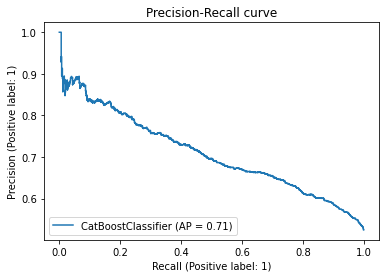

In [20]:
X_test = Test_Data_Final.loc[:,Output["Model_variables"]]
Y_test = np.array(Test_Data_Final.loc[:,["Label"]])[:,0]

disp = plot_precision_recall_curve(Output["Classifier"], X_test, Y_test)
disp.ax_.set_title('Precision-Recall curve')

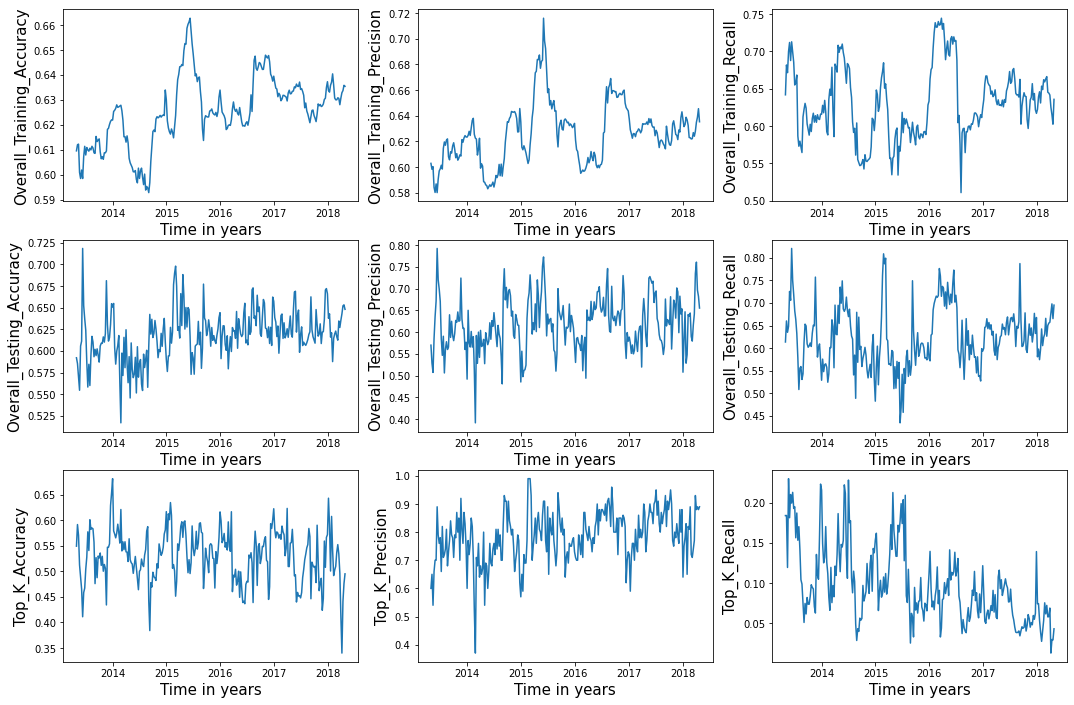

In [21]:
n_cols=3
n_rows=3
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*6,n_rows*4))

ax = axs[0][0]
sns.lineplot(data=Output, x="Time_points", y="Overall_Training_Accuracy",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Training_Accuracy",fontsize=15);

ax = axs[0][1]
sns.lineplot(data=Output, x="Time_points", y="Overall_Training_Precision",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Training_Precision",fontsize=15);

ax = axs[0][2]
sns.lineplot(data=Output, x="Time_points", y="Overall_Training_Recall",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Training_Recall",fontsize=15);

ax = axs[1][0]
sns.lineplot(data=Output, x="Time_points", y="Overall_Testing_Accuracy",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Testing_Accuracy",fontsize=15);

ax = axs[1][1]
sns.lineplot(data=Output, x="Time_points", y="Overall_Testing_Precision",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Testing_Precision",fontsize=15);

ax = axs[1][2]
sns.lineplot(data=Output, x="Time_points", y="Overall_Testing_Recall",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Overall_Testing_Recall",fontsize=15);

ax = axs[2][0]
sns.lineplot(data=Output, x="Time_points", y="Top_K_Accuracy",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Top_K_Accuracy",fontsize=15);

ax = axs[2][1]
sns.lineplot(data=Output, x="Time_points", y="Top_K_Precision",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Top_K_Precision",fontsize=15);

ax = axs[2][2]
sns.lineplot(data=Output, x="Time_points", y="Top_K_Recall",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Top_K_Recall",fontsize=15);

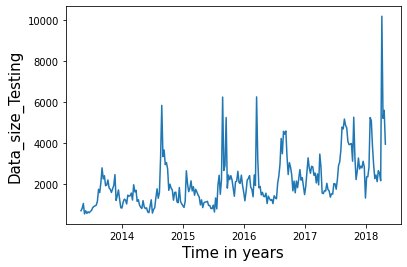

In [22]:
n_cols=1
n_rows=1
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*6,n_rows*4))
ax = axs
sns.lineplot(data=Output, x="Time_points", y="Data_size_Testing",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Data_size_Testing",fontsize=15);

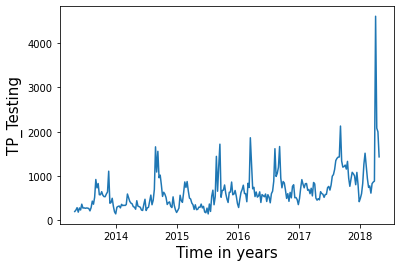

In [23]:
n_cols=1
n_rows=1
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*6,n_rows*4))
ax = axs
sns.lineplot(data=Output, x="Time_points", y="TP_Testing",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("TP_Testing",fontsize=15);

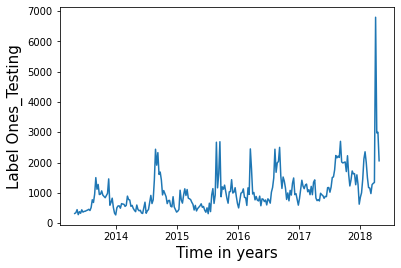

In [24]:
n_cols=1
n_rows=1
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*6,n_rows*4))
ax = axs
sns.lineplot(data=Output, x="Time_points", y="Ones_Testing",ax=ax)
ax.set_xlabel("Time in years",fontsize=15);
ax.set_ylabel("Label Ones_Testing",fontsize=15);

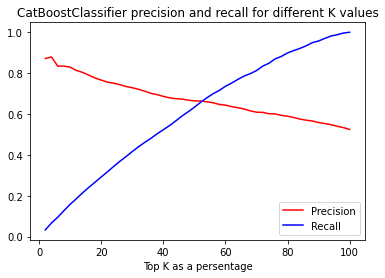

In [25]:
prT=[]
reT=[]
t=[]
k=2
Test_Data_Final=Test_Data_Final.sort_values(by=['Y_pred_prob'], ascending=False)
Test_Data_Final['Y_pred']=0
while (k<=100):
    Test_Data_Final.loc[Test_Data_Final.head(int(len(Test_Data_Final)*k/100)).index,'Y_pred'] = 1
    
    Y_test_k =  Test_Data_Final.loc[:,["Label"]] 
    Y_pred_k =  Test_Data_Final.loc[:,["Y_pred"]] 

    cm= confusion_matrix(Y_test_k,Y_pred_k)
    if len(cm.ravel())==4:TN, FP ,FN, TP =  cm.ravel()
    else: TN, FP ,FN, TP=0,0,0,100
    t+=[k]
#     print(len(Y_test_k[Y_test_k["Label"]==1])/len(Tk))
    preci=TP/(TP+FP)
    prT+=[preci]
    rec=TP/(TP+FN)
    reT+=[rec]
    k+=2
ax1=plt.plot(t,prT, 'r',label='Precision')
ax2=plt.plot(t,reT, 'b',label='Recall')
plt.xlabel("Top K as a persentage")

plt.title(Output["Classifier"].__class__.__name__+" precision and recall for different K values")
plt.legend()
plt.show()

In [26]:
X_test_pred_prob = Output["Classifier"].predict_proba(X_test)
X_test_tosend = X_test.copy()
X_test_pred_prob
X_test_tosend["pred_prob"] = X_test_pred_prob[:,1]
X_test_tosend.to_csv("X_test_tosend.csv")

In [27]:
import lime
import lime.lime_tabular

X_train = Train_Data_Final.loc[:,Output["Model_variables"]]

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                    feature_names=Output["Model_variables"], 
                    class_names=['Label'], 
                    # categorical_features=, n
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')

explainer

Intercept 0.4825842732405446
Prediction_local [-0.00623835]
Right: 0


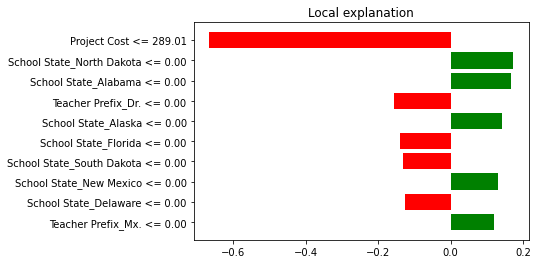

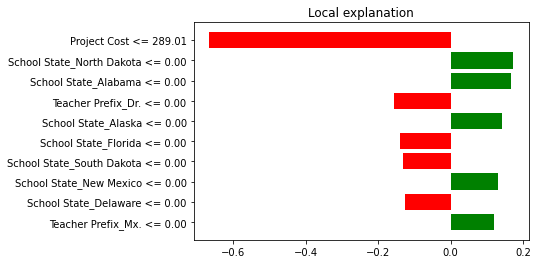

In [28]:
exp = explainer.explain_instance(X_test.iloc[-1], Output["Classifier"].predict)
exp.as_pyplot_figure()

In [29]:
exp.as_list()

[('Project Cost <= 289.01', -0.6666867809828932),
 ('School State_North Dakota <= 0.00', 0.17281657217097549),
 ('School State_Alabama <= 0.00', 0.1666352417392789),
 ('Teacher Prefix_Dr. <= 0.00', -0.15653574922233715),
 ('School State_Alaska <= 0.00', 0.14296520086613404),
 ('School State_Florida <= 0.00', -0.14025605928838095),
 ('School State_South Dakota <= 0.00', -0.13223201747576235),
 ('School State_New Mexico <= 0.00', 0.1294756897390089),
 ('School State_Delaware <= 0.00', -0.12449055998761696),
 ('Teacher Prefix_Mx. <= 0.00', 0.11948584402407188)]

In [30]:
exp.show_in_notebook(show_table=True, show_all=False)

Intercept 0.8142161462894404
Prediction_local [1.15149227]
Right: 1


Project Cost                              1987.820000
Number of dates since posted                 0.972917
School Percentage Free Lunch                95.000000
Project Short Description_polarity           0.425000
Project Short Description_subjectivity       0.506250
                                             ...     
Project Resource Category_Supplies           0.000000
Project Resource Category_Technology         0.000000
Project Resource Category_Trips              0.000000
Project Resource Category_Visitors           0.000000
Project Resource Category_nan                0.000000
Name: 0, Length: 91, dtype: float64

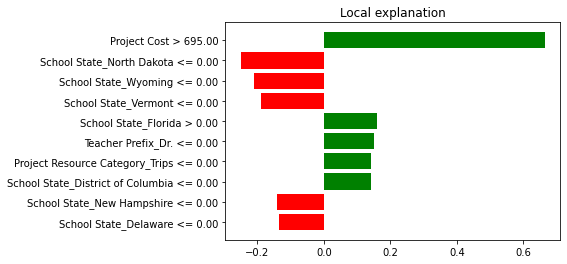

In [31]:
exp = explainer.explain_instance(X_test.iloc[0], Output["Classifier"].predict)
exp.as_pyplot_figure()
X_test.iloc[0]

In [32]:
p=exp.as_list()

In [33]:
exp.show_in_notebook(show_table=True, show_all=False)

In [34]:
import shap
explainer = shap.TreeExplainer(Output["Classifier"])
X_train = Train_Data_Final.loc[:,Output["Model_variables"]]
shap_values = explainer.shap_values(X_train)

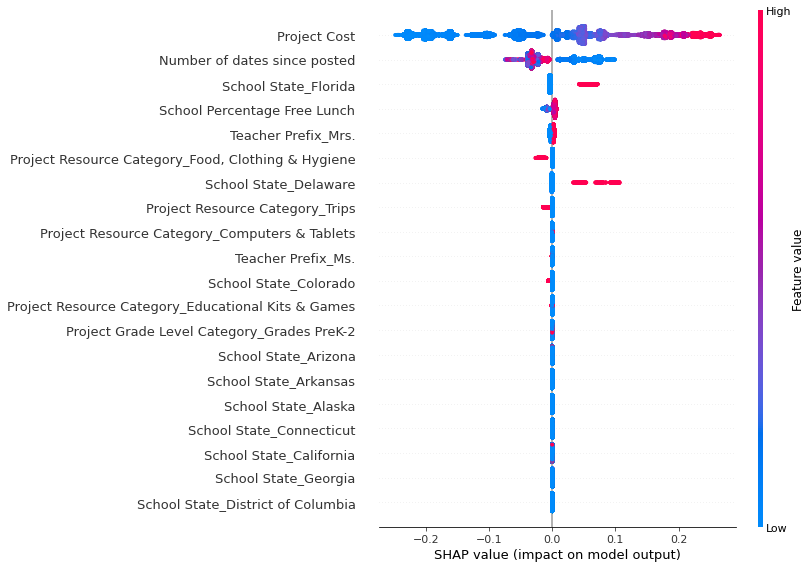

In [35]:
shap.summary_plot(shap_values, X_train)

In [36]:
import lime
import lime.lime_tabular

X_train = Train_Data_Final.loc[:,Output["Model_variables"]]

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                    feature_names=Output["Model_variables"], 
                    class_names=['Label'], 
                    # categorical_features=, n
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')

explainer

exp = explainer.explain_instance(X_test.iloc[0], Output["Classifier"].predict)
importance_list = exp.as_list()

Intercept 0.10990192994698494
Prediction_local [1.1569326]
Right: 1


In [37]:
Explainer_df_Top = pd.DataFrame(columns=Output["Model_variables"])

Start=0
end=100

for top_k_itr in range (Start,end):
    
    exp = explainer.explain_instance(X_test.iloc[top_k_itr], Output["Classifier"].predict)
    importance_list = exp.as_list()
    Explainer_df_Top.loc[top_k_itr] = 0
#     Explainer_df.xs(top_k_itr)["Top_K_Index"] = top_k_itr
    
    for top_feature in importance_list:
        for feature in Output["Model_variables"]:
            if feature in top_feature[0]:
                Explainer_df_Top.xs(top_k_itr)[feature] = top_feature[1]
                break

Intercept 0.3797662865449601
Prediction_local [1.16514471]
Right: 1
Intercept 1.0514344359825811
Prediction_local [1.29754236]
Right: 1
Intercept 0.4594906627096165
Prediction_local [1.2863851]
Right: 1
Intercept 0.6243249127276721
Prediction_local [1.15356779]
Right: 1
Intercept 0.5783971809743347
Prediction_local [1.30921299]
Right: 1
Intercept -0.6019153295939397
Prediction_local [1.14950108]
Right: 1
Intercept 0.39874369464836673
Prediction_local [1.19513084]
Right: 1
Intercept 0.092486046994178
Prediction_local [1.29099273]
Right: 1
Intercept 0.2954927980450793
Prediction_local [1.25492101]
Right: 1
Intercept 0.8382522219016506
Prediction_local [1.16190649]
Right: 1
Intercept 0.05037005133008998
Prediction_local [1.12509408]
Right: 1
Intercept -0.4814513618067677
Prediction_local [1.20812554]
Right: 1
Intercept -0.24756135416779113
Prediction_local [1.14200876]
Right: 1
Intercept 0.12089718786491821
Prediction_local [1.29728704]
Right: 1
Intercept 0.20451111380974502
Prediction_lo

In [38]:
Explainer_df_Top=Explainer_df_Top.apply(pd.to_numeric, errors='ignore')
k=Explainer_df_Top.describe() 
k.to_csv("CatBoostClassifier_19_3_2021_02_describe_Top.csv")
k

Project Cost  Number of dates since posted  \
count    100.000000                    100.000000   
mean       0.655205                      0.130712   
std        0.032362                      0.072679   
min        0.428087                      0.000000   
25%        0.652937                      0.147076   
50%        0.661031                      0.164943   
75%        0.664828                      0.175274   
max        0.676492                      0.203257   

       School Percentage Free Lunch  Project Short Description_polarity  \
count                    100.000000                               100.0   
mean                      -0.020935                                 0.0   
std                        0.046682                                 0.0   
min                       -0.147577                                 0.0   
25%                        0.000000                                 0.0   
50%                        0.000000                                 0.0   
75%                        0.000000                                 0.0   
max                        0.000000                                 0.0   

       Project Short Description_subjectivity  Project Essay_polarity  \
count                                   100.0                   100.0   
mean                                      0.0                     0.0   
std                                       0.0                     0.0   
min                                       0.0                     0.0   
25%                                       0.0                     0.0   
50%                                       0.0                     0.0   
75%                                       0.0                     0.0   
max                                       0.0                     0.0   

       Project Essay_subjectivity  Project Need Statement_polarity  \
count                       100.0                            100.0   
mean                          0.0                              0.0   
std                           0.0                              0.0   
min                           0.0                              0.0   
25%                           0.0                              0.0   
50%                           0.0                              0.0   
75%                           0.0                              0.0   
max                           0.0                              0.0   

       School Metro Type_rural  School Metro Type_town  ...  \
count                    100.0                   100.0  ...   
mean                       0.0                     0.0  ...   
std                        0.0                     0.0  ...   
min                        0.0                     0.0  ...   
25%                        0.0                     0.0  ...   
50%                        0.0                     0.0  ...   
75%                        0.0                     0.0  ...   
max                        0.0                     0.0  ...   

       Project Resource Category_Instructional Technology  \
count                                              100.0    
mean                                                 0.0    
std                                                  0.0    
min                                                  0.0    
25%                                                  0.0    
50%                                                  0.0    
75%                                                  0.0    
max                                                  0.0    

       Project Resource Category_Lab Equipment  \
count                                    100.0   
mean                                       0.0   
std                                        0.0   
min                                        0.0   
25%                                        0.0   
50%                                        0.0   
75%                                        0.0   
max                                        0.0

In [39]:
abs_Explainer_df_Top=abs(Explainer_df_Top)
abs_Explainer_df_Top.describe().to_csv("CatBoostClassifier_19_3_2021_02_abs_describe_Top.csv")
abs_Explainer_df_Top

Project Cost  Number of dates since posted  School Percentage Free Lunch  \
0       0.661912                      0.000000                      0.000000   
1       0.668298                      0.183867                      0.000000   
2       0.660966                      0.158308                      0.000000   
3       0.672587                      0.159740                      0.112673   
4       0.649459                      0.188340                      0.000000   
..           ...                           ...                           ...   
95      0.660351                      0.000000                      0.000000   
96      0.649034                      0.178405                      0.000000   
97      0.672275                      0.172030                      0.000000   
98      0.676492                      0.000000                      0.000000   
99      0.661369                      0.000000                      0.000000   

    Project Short Description_polarity  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   
..                                 ...   
95                                   0   
96                                   0   
97                                   0   
98                                   0   
99                                   0   

    Project Short Description_subjectivity  Project Essay_polarity  \
0                                        0                       0   
1                                        0                       0   
2                                        0                       0   
3                                        0                       0   
4                                        0                       0   
..                                     ...                     ...   
95                                       0                       0   
96                                       0                       0   
97                                       0                       0   
98                                       0                       0   
99                                       0                       0   

    Project Essay_subjectivity  Project Need Statement_polarity  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   
..                         ...                              ...   
95                           0                                0   
96                           0                                0   
97                           0                                0   
98                           0                                0   
99                           0                                0   

    School Metro Type_rural  School Metro Type_town  ...  \
0                         0                       0  ...   
1                         0                       0  ...   
2                         0                       0  ...   
3                         0                       0  ...   
4                         0                       0  ...   
..                      ...                     ...  ...   
95                        0                       0  ...   
96                        0                       0  ...   
97                        0                       0  ...   
98                        0                       0  ...   
99                        0                       0  ...   

    Project Resource Category_Instructional Technology  \
0                                                   0    
1                                                   0  

In [40]:
Explainer_df_Bottom = pd.DataFrame(columns=Output["Model_variables"])

Start=len(X_test)-100
end=len(X_test)

for top_k_itr in range (Start,end):
    
    exp = explainer.explain_instance(X_test.iloc[top_k_itr], Output["Classifier"].predict)
    importance_list = exp.as_list()
    Explainer_df_Bottom.loc[top_k_itr] = 0
#     Explainer_df.xs(top_k_itr)["Top_K_Index"] = top_k_itr
    
    for top_feature in importance_list:
        for feature in Output["Model_variables"]:
            if feature in top_feature[0]:
                Explainer_df_Bottom.xs(top_k_itr)[feature] = top_feature[1]
                break

Intercept 0.02754249409491999
Prediction_local [-0.00409414]
Right: 0
Intercept 0.8095449530071677
Prediction_local [-0.09078916]
Right: 0
Intercept 1.1484690575129062
Prediction_local [-0.01006895]
Right: 0
Intercept 0.9750596259736382
Prediction_local [-0.00697688]
Right: 0
Intercept 1.1147227263211374
Prediction_local [-0.00524817]
Right: 0
Intercept 0.5777959024489985
Prediction_local [-0.00606592]
Right: 0
Intercept 0.6688919465333332
Prediction_local [-0.00320657]
Right: 0
Intercept 0.21250216431350682
Prediction_local [-0.00138618]
Right: 0
Intercept 1.6438043595118221
Prediction_local [-0.0076737]
Right: 0
Intercept 0.5710183464290725
Prediction_local [-0.00705477]
Right: 0
Intercept 1.5229418179874012
Prediction_local [-0.00550502]
Right: 0
Intercept -0.22770898261602068
Prediction_local [-0.00093222]
Right: 0
Intercept 1.248523190967604
Prediction_local [-0.00830679]
Right: 0
Intercept 0.26127177831772475
Prediction_local [-0.00687726]
Right: 0
Intercept 0.3884190851488619
Pr

In [41]:
Explainer_df_Bottom=Explainer_df_Bottom.apply(pd.to_numeric, errors='ignore')
k=Explainer_df_Bottom.describe() 
k.to_csv("CatBoostClassifier_19_3_2021_02_describe_Bottom.csv")
k

Project Cost  Number of dates since posted  \
count    100.000000                    100.000000   
mean      -0.671257                     -0.006975   
std        0.008615                      0.040708   
min       -0.694226                     -0.117065   
25%       -0.677508                      0.000000   
50%       -0.670869                      0.000000   
75%       -0.665496                      0.000000   
max       -0.653334                      0.179527   

       School Percentage Free Lunch  Project Short Description_polarity  \
count                    100.000000                               100.0   
mean                      -0.005095                                 0.0   
std                        0.025241                                 0.0   
min                       -0.146216                                 0.0   
25%                        0.000000                                 0.0   
50%                        0.000000                                 0.0   
75%                        0.000000                                 0.0   
max                        0.000000                                 0.0   

       Project Short Description_subjectivity  Project Essay_polarity  \
count                                   100.0                   100.0   
mean                                      0.0                     0.0   
std                                       0.0                     0.0   
min                                       0.0                     0.0   
25%                                       0.0                     0.0   
50%                                       0.0                     0.0   
75%                                       0.0                     0.0   
max                                       0.0                     0.0   

       Project Essay_subjectivity  Project Need Statement_polarity  \
count                       100.0                            100.0   
mean                          0.0                              0.0   
std                           0.0                              0.0   
min                           0.0                              0.0   
25%                           0.0                              0.0   
50%                           0.0                              0.0   
75%                           0.0                              0.0   
max                           0.0                              0.0   

       School Metro Type_rural  School Metro Type_town  ...  \
count                    100.0                   100.0  ...   
mean                       0.0                     0.0  ...   
std                        0.0                     0.0  ...   
min                        0.0                     0.0  ...   
25%                        0.0                     0.0  ...   
50%                        0.0                     0.0  ...   
75%                        0.0                     0.0  ...   
max                        0.0                     0.0  ...   

       Project Resource Category_Instructional Technology  \
count                                              100.0    
mean                                                 0.0    
std                                                  0.0    
min                                                  0.0    
25%                                                  0.0    
50%                                                  0.0    
75%                                                  0.0    
max                                                  0.0    

       Project Resource Category_Lab Equipment  \
count                                    100.0   
mean                                       0.0   
std                                        0.0   
min                                        0.0   
25%                                        0.0   
50%                                        0.0   
75%                                        0.0   
max                                        0.0

In [42]:
abs_Explainer_df_Bottom=abs(Explainer_df_Bottom)
abs_Explainer_df_Bottom.describe().to_csv("CatBoostClassifier_13_2_2021_02_abs_describe_Bottom.csv")
abs_Explainer_df_Bottom

Project Cost  Number of dates since posted  \
3832      0.682212                       0.00000   
3833      0.669189                       0.10971   
3834      0.667006                       0.00000   
3835      0.669381                       0.00000   
3836      0.682531                       0.00000   
...            ...                           ...   
3927      0.680209                       0.00000   
3928      0.675127                       0.00000   
3929      0.694226                       0.00000   
3930      0.667576                       0.00000   
3931      0.663687                       0.00000   

      School Percentage Free Lunch  Project Short Description_polarity  \
3832                      0.000000                                   0   
3833                      0.000000                                   0   
3834                      0.000000                                   0   
3835                      0.000000                                   0   
3836                      0.000000                                   0   
...                            ...                                 ...   
3927                      0.000000                                   0   
3928                      0.000000                                   0   
3929                      0.000000                                   0   
3930                      0.000000                                   0   
3931                      0.146216                                   0   

      Project Short Description_subjectivity  Project Essay_polarity  \
3832                                       0                       0   
3833                                       0                       0   
3834                                       0                       0   
3835                                       0                       0   
3836                                       0                       0   
...                                      ...                     ...   
3927                                       0                       0   
3928                                       0                       0   
3929                                       0                       0   
3930                                       0                       0   
3931                                       0                       0   

      Project Essay_subjectivity  Project Need Statement_polarity  \
3832                           0                                0   
3833                           0                                0   
3834                           0                                0   
3835                           0                                0   
3836                           0                                0   
...                          ...                              ...   
3927                           0                                0   
3928                           0                                0   
3929                           0                                0   
3930                           0                                0   
3931                           0                                0   

      School Metro Type_rural  School Metro Type_town  ...  \
3832                        0                       0  ...   
3833                        0                       0  ...   
3834                        0                       0  ...   
3835                        0                       0  ...   
3836                        0                       0  ...   
...                       ...                     ...  ...   
3927                        0                       0  ...   
3928                        0                       0  ...   
3929                        0                       0  ...   
3930                        0                       0  ...   
3931                        0                       0  ...   

      Project Resource Category_Instructional Technol

In [43]:
Explainer_df_Mid= pd.DataFrame(columns=Output["Model_variables"])

Start=int(len(X_test)/2)
end=Start+100

for top_k_itr in range (Start,end):
    
    exp = explainer.explain_instance(X_test.iloc[top_k_itr], Output["Classifier"].predict)
    importance_list = exp.as_list()
    Explainer_df_Mid.loc[top_k_itr] = 0
#     Explainer_df.xs(top_k_itr)["Top_K_Index"] = top_k_itr
    
    for top_feature in importance_list:
        for feature in Output["Model_variables"]:
            if feature in top_feature[0]:
                Explainer_df_Mid.xs(top_k_itr)[feature] = top_feature[1]
                break

Intercept 0.17031477145144908
Prediction_local [0.73922396]
Right: 1
Intercept 0.5986586747798768
Prediction_local [0.83481198]
Right: 1
Intercept -0.10498340157755254
Prediction_local [0.79957035]
Right: 1
Intercept 0.3873311586668413
Prediction_local [0.84175766]
Right: 1
Intercept 0.3943048923640665
Prediction_local [0.83253005]
Right: 1
Intercept 0.03719652525382733
Prediction_local [0.71056836]
Right: 1
Intercept 0.7431311007006939
Prediction_local [0.82362593]
Right: 1
Intercept 0.3361658778575563
Prediction_local [0.83986775]
Right: 1
Intercept 1.1425431810824003
Prediction_local [0.83077257]
Right: 1
Intercept 0.15875557877598656
Prediction_local [0.81438569]
Right: 1
Intercept -0.30613647136252664
Prediction_local [0.99081041]
Right: 1
Intercept 0.529020300683203
Prediction_local [0.29030321]
Right: 1
Intercept 0.7024993788861974
Prediction_local [0.83393317]
Right: 1
Intercept -0.08824647585899192
Prediction_local [0.83099044]
Right: 1
Intercept 0.30492649914841374
Prediction

In [44]:
Explainer_df_Mid=Explainer_df_Mid.apply(pd.to_numeric, errors='ignore')
k=Explainer_df_Mid.describe() 
k.to_csv("CatBoostClassifier_19_3_2021_02_describe_Mid.csv")
k

Project Cost  Number of dates since posted  \
count    100.000000                    100.000000   
mean       0.305105                      0.016443   
std        0.377196                      0.063592   
min       -0.454043                     -0.121458   
25%        0.426474                      0.000000   
50%        0.442557                      0.000000   
75%        0.454012                      0.000000   
max        0.674393                      0.199687   

       School Percentage Free Lunch  Project Short Description_polarity  \
count                    100.000000                               100.0   
mean                      -0.014650                                 0.0   
std                        0.043269                                 0.0   
min                       -0.159850                                 0.0   
25%                        0.000000                                 0.0   
50%                        0.000000                                 0.0   
75%                        0.000000                                 0.0   
max                        0.078342                                 0.0   

       Project Short Description_subjectivity  Project Essay_polarity  \
count                                   100.0                   100.0   
mean                                      0.0                     0.0   
std                                       0.0                     0.0   
min                                       0.0                     0.0   
25%                                       0.0                     0.0   
50%                                       0.0                     0.0   
75%                                       0.0                     0.0   
max                                       0.0                     0.0   

       Project Essay_subjectivity  Project Need Statement_polarity  \
count                       100.0                            100.0   
mean                          0.0                              0.0   
std                           0.0                              0.0   
min                           0.0                              0.0   
25%                           0.0                              0.0   
50%                           0.0                              0.0   
75%                           0.0                              0.0   
max                           0.0                              0.0   

       School Metro Type_rural  School Metro Type_town  ...  \
count                    100.0                   100.0  ...   
mean                       0.0                     0.0  ...   
std                        0.0                     0.0  ...   
min                        0.0                     0.0  ...   
25%                        0.0                     0.0  ...   
50%                        0.0                     0.0  ...   
75%                        0.0                     0.0  ...   
max                        0.0                     0.0  ...   

       Project Resource Category_Instructional Technology  \
count                                              100.0    
mean                                                 0.0    
std                                                  0.0    
min                                                  0.0    
25%                                                  0.0    
50%                                                  0.0    
75%                                                  0.0    
max                                                  0.0    

       Project Resource Category_Lab Equipment  \
count                                    100.0   
mean                                       0.0   
std                                        0.0   
min                                        0.0   
25%                                        0.0   
50%                                        0.0   
75%                                        0.0   
max                                        0.0

In [45]:
abs_Explainer_df_Mid=abs(Explainer_df_Bottom)
abs_Explainer_df_Mid.describe().to_csv("CatBoostClassifier_19_3_2021_02_abs_describe_Mid.csv")
abs_Explainer_df_Mid

Project Cost  Number of dates since posted  \
3832      0.682212                       0.00000   
3833      0.669189                       0.10971   
3834      0.667006                       0.00000   
3835      0.669381                       0.00000   
3836      0.682531                       0.00000   
...            ...                           ...   
3927      0.680209                       0.00000   
3928      0.675127                       0.00000   
3929      0.694226                       0.00000   
3930      0.667576                       0.00000   
3931      0.663687                       0.00000   

      School Percentage Free Lunch  Project Short Description_polarity  \
3832                      0.000000                                   0   
3833                      0.000000                                   0   
3834                      0.000000                                   0   
3835                      0.000000                                   0   
3836                      0.000000                                   0   
...                            ...                                 ...   
3927                      0.000000                                   0   
3928                      0.000000                                   0   
3929                      0.000000                                   0   
3930                      0.000000                                   0   
3931                      0.146216                                   0   

      Project Short Description_subjectivity  Project Essay_polarity  \
3832                                       0                       0   
3833                                       0                       0   
3834                                       0                       0   
3835                                       0                       0   
3836                                       0                       0   
...                                      ...                     ...   
3927                                       0                       0   
3928                                       0                       0   
3929                                       0                       0   
3930                                       0                       0   
3931                                       0                       0   

      Project Essay_subjectivity  Project Need Statement_polarity  \
3832                           0                                0   
3833                           0                                0   
3834                           0                                0   
3835                           0                                0   
3836                           0                                0   
...                          ...                              ...   
3927                           0                                0   
3928                           0                                0   
3929                           0                                0   
3930                           0                                0   
3931                           0                                0   

      School Metro Type_rural  School Metro Type_town  ...  \
3832                        0                       0  ...   
3833                        0                       0  ...   
3834                        0                       0  ...   
3835                        0                       0  ...   
3836                        0                       0  ...   
...                       ...                     ...  ...   
3927                        0                       0  ...   
3928                        0                       0  ...   
3929                        0                       0  ...   
3930                        0                       0  ...   
3931                        0                       0  ...   

      Project Resource Category_Instructional Technol

In [55]:
import shap
explainer = shap.TreeExplainer(Output["Classifier"])
X_test = Test_Data_Final.loc[:,Output["Model_variables"]]
shap_values = explainer.shap_values(X_test)

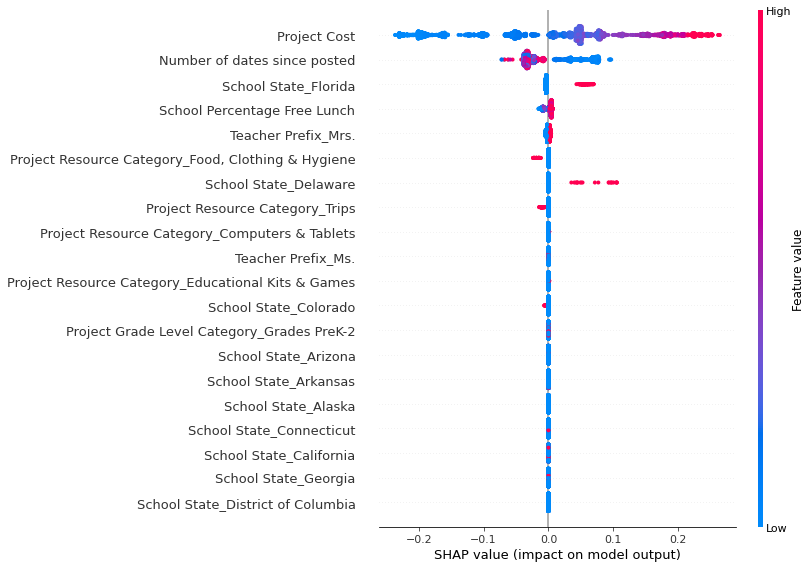

In [56]:
shap.summary_plot(shap_values, X_test)

In [66]:
shap_values[3445,:]

array([-1.59399559e-01, -2.32732471e-02, -4.12980151e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.21601442e-03,  1.58870486e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.54807951e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  7.30987868e-05,  0.00000000e+00, -2.85273507e-04,
        0.00000000e+00, -3.56067132e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [65]:
shap.force_plot(explainer.expected_value, shap_values[3445,:], X_test.iloc[3445,:])

In [64]:
shap.plots.text(shap_values, num_starting_labels=2, group_threshold=1)

AttributeError: 'numpy.ndarray' object has no attribute 'output_names'

In [53]:
shap.force_plot(explainer.expected_value, shap_values, X_test)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


KeyboardInterrupt: 